## Importação dos dados

In [1]:
import pandas as pd
import os

def load_diamond_data():
    csv_path = os.path.join("diamonds-dataset", "diamonds-train.csv")
    return pd.read_csv(csv_path)

def load_diamond_tests():
    csv_path = os.path.join("diamonds-dataset", "diamonds-test.csv")
    return pd.read_csv(csv_path)

## Feature Scaling e Normalização

In [2]:
import numpy as np

def normalize(train, test):
    train_mean = np.mean(train, axis=0)
    train = train - train_mean
    test = test - train_mean
    
    return train, test

def scale(X):
    max_array = np.max(X, axis=0)
    X = X / max_array[None, :]
    return X

    

## Dummy Coding

In [3]:
# dummy coding(cut,color,clarity)
from sklearn.preprocessing import LabelEncoder

def dummy(X):
    enumValues = {"cut": {"Fair":0, "Good":1, "Very Good":2, "Premium":3, "Ideal":4},
                  "color": {"J": 0, "I":1, "H":2, "G":3, "F":4, "E":5, "D":6},
                  "clarity": {"I1":0, "SI2":1, "SI1":2, "VS2":3, "VS1":4,"VVS2":5, "VVS1":6, "IF":7}}
    X.replace(enumValues, inplace=True)
    return X

## Geração de matrizes de Features e Target

## Setup inicial dos dados

In [4]:

import numpy as np

#Carrega os dados

diamond_data = load_diamond_data()
diamond_test = load_diamond_tests()
    
# Dummy Coding
diamond_data = dummy(diamond_data)
diamond_test = dummy(diamond_test)

# Separação em Features e Target
    
diamond_data_target = np.array(diamond_data["price"])
diamond_test_target = np.array(diamond_test["price"])
    
diamond_data = np.array(diamond_data)
diamond_test = np.array(diamond_test)

diamond_data_features = np.delete(diamond_data, -1, axis=1)

diamond_test_features = np.delete(diamond_test, -1, axis=1)

# Indices das colunas, considerando coluna de 1's adicionada
carat = 1
cut = 2
color = 3
clarity = 4
x = 5
y = 6
z = 7
depth = 8
table = 9
x2 = 10
y2 = 11
z2 = 12
carat2 = 13

# Inserindo novas features
diamond_data_features = np.hstack((diamond_data_features, np.square(diamond_data_features[:,[x]])))
diamond_data_features = np.hstack((diamond_data_features, np.square(diamond_data_features[:,[y]])))
diamond_data_features = np.hstack((diamond_data_features, np.square(diamond_data_features[:,[z]])))
diamond_data_features = np.hstack((diamond_data_features, np.square(diamond_data_features[:,[carat]])))

diamond_test_features = np.hstack((diamond_test_features, np.square(diamond_test_features[:,[x]])))
diamond_test_features = np.hstack((diamond_test_features, np.square(diamond_test_features[:,[y]])))
diamond_test_features = np.hstack((diamond_test_features, np.square(diamond_test_features[:,[z]])))
diamond_test_features = np.hstack((diamond_test_features, np.square(diamond_test_features[:,[carat]])))

# np.set_printoptions(threshold=np.nan)
# print(diamond_data_features[:5,[x]] )
# print(np.square(diamond_data_features[:5,[x]]))
# print(diamond_data_features[0,:])
# print(diamond_data_features[:,[11,12]])

# Normalização
normalized_diamond_data, normalized_diamond_test = normalize(diamond_data_features, diamond_test_features)

# Scaling
scaled_diamond_data = scale(normalized_diamond_data)
scaled_diamond_test = scale(normalized_diamond_test)

# # Scaling
# scaled_diamond_data = scale(diamond_data_features)
# scaled_diamond_test = scale(diamond_test_features)

# # Normalização
# normalized_diamond_data, normalized_diamond_test = normalize(scaled_diamond_data, scaled_diamond_test)

# Adicionando coluna de 1's

ready_diamond_data = np.c_[np.ones((len(scaled_diamond_data), 1)), scaled_diamond_data]
ready_diamond_test = np.c_[np.ones((len(scaled_diamond_test), 1)), scaled_diamond_test]

# ready_diamond_data = np.c_[np.ones((len(normalized_diamond_data), 1)), normalized_diamond_data]
# ready_diamond_test = np.c_[np.ones((len(normalized_diamond_test), 1)), normalized_diamond_test]

def getTrainSet():
    return ready_diamond_data, diamond_data_target

def getTestSet():
    return ready_diamond_test, diamond_test_target


## Equação Normal

In [5]:
# Normal Equation

def NormalEquation(X, y):

    transpose = X.T

    mult1 = transpose.dot(X)

    try:
        inverse = np.linalg.inv(mult1)

    except np.linalg.LinAlgError:
        print("Not invertible")
        return np.zeros(1,1)

    else:
        mult2 = (inverse.dot(transpose)).dot(y)
        return mult2


## Plots de Target em função de Features

In [6]:
# #grafico Carat X Price
# import matplotlib.pyplot as plt

# plt.scatter(ready_diamond_data[carat], diamond_data_target)
# plt.xlabel("$carat$", fontsize=18)
# plt.ylabel("$price(U$)$", fontsize=18)
# plt.show()

In [7]:
# #grafico Cut X Price
# import matplotlib.pyplot as plt
# plt.scatter(diamond_data["cut"], diamond_data["price"])
# plt.xlabel("$cut$", fontsize=18)
# plt.ylabel("$price$", fontsize=18)
# plt.show()

In [8]:
# #grafico  Color X Price
# import matplotlib.pyplot as plt
# plt.scatter(diamond_data["color"], diamond_data["price"])
# plt.xlabel("$color$", fontsize=18)
# plt.ylabel("$price$", fontsize=18)
# plt.show()

In [9]:
# #grafico Clarity X Price
# import matplotlib.pyplot as plt
# plt.scatter(diamond_data["clarity"], diamond_data["price"])
# plt.xlabel("$clarity$", fontsize=18)
# plt.ylabel("$price$", fontsize=18)
# plt.show()

In [10]:
# #grafico Depth X Price
# import matplotlib.pyplot as plt
# plt.scatter(diamond_data["depth"], diamond_data["price"])
# plt.xlabel("$depth$", fontsize=18)
# plt.ylabel("$price$", fontsize=18)
# plt.show()

In [11]:
# #grafico table X Price
# import matplotlib.pyplot as plt
# plt.scatter(diamond_data["table"], diamond_data["price"])
# plt.xlabel("$table$", fontsize=18)
# plt.ylabel("$price$", fontsize=18)
# plt.show()

In [12]:
# #grafico x X Price
# import matplotlib.pyplot as plt
# plt.scatter(diamond_data["x"], diamond_data["price"])
# plt.xlabel("$x$", fontsize=18)
# plt.ylabel("$price$", fontsize=18)
# plt.show()

In [13]:
# #grafico y X Price
# import matplotlib.pyplot as plt
# plt.scatter(diamond_data["y"], diamond_data["price"])
# plt.xlabel("$y$", fontsize=18)
# plt.ylabel("$price$", fontsize=18)
# plt.show()

In [14]:
# #grafico z X Price
# import matplotlib.pyplot as plt
# plt.scatter(diamond_data["z"], diamond_data["price"])
# plt.xlabel("$z$", fontsize=18)
# plt.ylabel("$price$", fontsize=18)
# plt.show()

## Gerador de conjuntos de Cross Validation

In [15]:
# Cross Validation Generation

# PRECISA CHAMAR ISSO ANTES DE CHAMAR A FUNCAO --- 
#                             TRAINING_DATA = prepareSet(diamond_data) 

from sklearn.model_selection import train_test_split, KFold

# Retorna um gerador de indices
def generate_sets(TRAINING_DATA,type='kfold'):

    # Cross validation using train_test_split
    if (type == 'split'):
       return train_test_split(TRAINING_DATA,test_size=0.2,random_state=0)

    # Cross validation using K-Fold
    # K = 5, Shuffle = true, Seed = 21
    elif (type == 'kfold'):
        kfold_seed = 21

        kfold = KFold(n_splits=5, shuffle=True, random_state=kfold_seed)
        return kfold.split(TRAINING_DATA)

## Explicação do uso do generate_sets

In [16]:

# import numpy as np
# from sklearn.model_selection import train_test_split, KFold

# X = np.array([[10, 20], [30, 40], [50, 60], [70, 80], [90, 100], [110, 120], [130, 140], [150, 160], [170, 180], [190, 200]])
# y = np.array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

# #esse b vai ser um gerador, não precisa passar y pois ele gera somente os indices
# b = generate_sets(X)

# #precisa percorrer ele com 2 indices, um representa o treino, outro o test, 
# # na proxima iteracao ele ja vai estar num agrupamento diferente
# for train_index, val_index in b:
#     x_train = X[train_index]
#     y_train = y[train_index]
#     x_val = X[val_index]
#     y_val = y[val_index]
#     print(x_train, y_train)
#     print(x_val, y_val)
#     print("-----")
    


## Regressão Linear: Mini-batch

In [17]:
#implementation Linear Regression using Mini-Batch Gradient Descent
def LinRegMiniGradientDescent(TRAIN_SET, TARGET_SET, N_ITERATION, LEARNING_RATE, SIZE_BATCH):
    np.random.seed(42)
    theta = np.random.randn(10,1) #random initialization
    for iteration in range(N_ITERATIONS):
        shuffle_indices = np.random.permutation(TRAIN_SET.shape[0])
        train_shuffled = TRAIN_SET[shuffled_indices]
        target_shuffled = TARGET_SET[shuffled_indices]
        for i in range(0,TARGET_SET.shape[0], SIZE_BATCH):
            xi = train_shuffled[i:i+SIZE_BATCH]
            yi = target_shuffled[i:i+SIZE_BATCH]
            gradients = 2/SIZE_BATCH * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - LEARNING_RATE * gradients
    return theta

## Regressão Linear: Batch

In [18]:
import numpy as np
import random


def LinRegBatchGradientDescent(x, y, numIterations, learningRate, verbose=0):
    xTrans = x.transpose()
#     theta = np.random.randn(x.shape[1],1) * 0.01 #random initialization
    theta = np.zeros((x.shape[1], 1)) * 0.01
    m = x.shape[0]
    y = y.reshape((y.shape[0],1))
    for i in range(numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        cost = (np.sum(loss ** 2)) / (2 * m)
        if verbose == 1:
            print ('cost on it', i, ':', cost)
        gradient = np.dot(xTrans, loss) / m
        theta = theta - learningRate * gradient
#         print('theta', theta, 'hip', hypothesis, 'loss', loss, 'cost', cost)
    return theta

## Regressão Linear: Batch + Custo por Iteração

In [19]:
import numpy as np
import random


def LinRegBatchGradientDescentCostPerIteraction(x, y, numIterations, learningRate, verbose=0):
    xTrans = x.transpose()
    theta = np.random.randn(x.shape[1],1) * 0.01 #random initialization
    m = x.shape[0]
    cost = np.zeros((numIterations,1))
    for i in range(numIterations):
        hypothesis = np.dot(x, theta)
        y = y.reshape(y.shape[0], 1)
        loss = hypothesis - y
        cost[i] = np.sum(loss ** 2) / (2 * m)
        if verbose==1:
            print('cost:', cost[i])
        gradient = np.dot(xTrans, loss) / m
        theta = theta - learningRate * gradient
    return theta, cost

# Demonstração de funcionamento da implementação de Regressão Linear em Batch (4 células seguintes)

In [20]:
# import numpy as np
# import numpy.random as rnd

# np.random.seed(42)
# X = 2 * rnd.rand(100,1)
# Y = 4 + 3 * X + rnd.randn(100,1)

In [21]:
# import numpy.linalg as LA

# X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
# theta_best = LA.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
# theta_best

In [22]:
# from sklearn.linear_model import SGDRegressor

# sgd_reg = SGDRegressor(max_iter=1000, 
#                        penalty=None, 
#                        eta0=0.1, 
#                        verbose=1, 
#                        learning_rate='constant',
#                        alpha=0,
#                        shuffle=False,
#                        warm_start=False,
#                        average=False)
# sgd_reg.fit(X, Y.ravel())
# # sgd_reg.intercept_, sgd_reg.coef_

In [23]:
# theta, error = LinRegBatchGradientDescent(X_b,y,1000,0.1, verbose=1)


 --------------------------------------------------------

### Plot de Função de Custo em função do número de iterações

In [24]:

# import matplotlib.pyplot as plt
# import numpy as pd
# %matplotlib inline
# theta, error = LinRegBatchGradientDescent(X_b,y,100,0.1)
# print(theta)
# plt.plot(np.arange(error.shape[0]) ,error)
# plt.ylabel('Cost Function')
# plt.xlabel('Iterations')
# plt.axis([0,20,0,100])



________________________________

# Modelos

### MODELO 1 : Modelo com todas as features, lineares, sem remoções

In [25]:
from sklearn.metrics import mean_squared_error

x1,y1 = getTrainSet()
x1 = x1[:, [0,carat,x,y,z,depth,table,color,cut,clarity]]
indices_generator = generate_sets(x1)
theta1 = np.zeros((5,x1.shape[1],1))
error1 = np.zeros((5,1))
error1_n = np.zeros((5,1)) 
i=0
for train_index, val_index in indices_generator:
    #dados de treino e de validacao
    x1_train = x1[train_index]
    y1_train = y1[train_index]
    x1_val = x1[val_index]
    y1_val = y1[val_index]
     
    theta1[i],cost = LinRegBatchGradientDescentCostPerIteraction(x1_train,y1_train,10000,0.001, verbose=0)
    thetaNormal = NormalEquation(x1_train,y1_train)
    
    #error from validation
    y1_predict = x1_val.dot(theta1[i])
    y1_n_predict = x1_val.dot(thetaNormal)
    error1[i] = mean_squared_error(y1_val, y1_predict)
    error1_n[i] = mean_squared_error(y1_val, y1_n_predict)/2
    i += 1




In [26]:
np.set_printoptions(precision=1)
for i in range(5):
    print("Iteracao ", i+1,)
    print("\tErro pelo Gradient Descent:", int(error1[i]) )
    print("\tErro pela Equacao Normal:   " , int(error1_n[i]) )

print("Media erros GD:", int(np.mean(error1)) )
print("Media erros EN: ", int(np.mean(error1_n)) )


Iteracao  1
	Erro pelo Gradient Descent: 5554914
	Erro pela Equacao Normal:    724963
Iteracao  2
	Erro pelo Gradient Descent: 5789421
	Erro pela Equacao Normal:    732478
Iteracao  3
	Erro pelo Gradient Descent: 6054030
	Erro pela Equacao Normal:    771709
Iteracao  4
	Erro pelo Gradient Descent: 5795365
	Erro pela Equacao Normal:    897075
Iteracao  5
	Erro pelo Gradient Descent: 5593381
	Erro pela Equacao Normal:    720242
Media erros GD: 5757422
Media erros EN:  769293


[0, 10000, 0, 10000000]

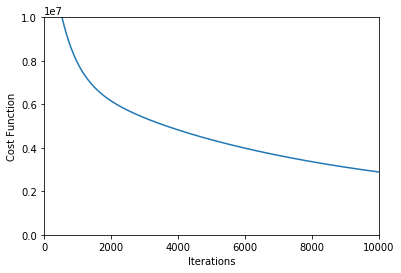

In [27]:
import matplotlib.pyplot as plt
import numpy as pd
%matplotlib inline

plt.plot(range(cost.shape[0]) ,cost)
plt.ylabel('Cost Function')
plt.xlabel('Iterations')
plt.axis([0,10000,0,10000000])



-------------------------------------------------------------------------------------------

### Modelo 2: Removidas as features que não aparentam influenciar o preço/target (table,depth,clarity,color,cut)

In [28]:
from sklearn.metrics import mean_squared_error

initial_x2,initial_y2 = getTrainSet()
initial_x2 = initial_x2[:, [0,x,y,z,carat]]
indices_generator = generate_sets(initial_x2)
theta2 = np.zeros((5,initial_x2.shape[1],1))
error2 = np.zeros((5,1))
error2_n = np.zeros((5,1)) 
i=0
for train_index, val_index in indices_generator:
    #dados de treino e de validacao
    x2_train = initial_x2[train_index]
    y2_train = initial_y2[train_index]
    x2_val = initial_x2[val_index]
    y2_val = initial_y2[val_index]
     
    theta2[i],cost = LinRegBatchGradientDescentCostPerIteraction(x2_train,y2_train,10000,0.001)
    thetaNormal = NormalEquation(x2_train,y2_train)
    
    #error from validation
    y2_predict = x2_val.dot(theta2[i])
    y2_n_predict = x2_val.dot(thetaNormal)
    error2[i] = mean_squared_error(y2_val, y2_predict)
    error2_n[i] = mean_squared_error(y2_val, y2_n_predict)/2
    i += 1

In [29]:
np.set_printoptions(precision=1)
for i in range(5):
    print("Iteracao ", i+1,)
    print("\tErro pelo Gradient Descent:", int(error2[i]) )
    print("\tErro pela Equacao Normal:  " , int(error2_n[i]) )

print("Media erros GD:", int(np.mean(error2)) )
print("Media erros EN:", int(np.mean(error2_n)) )

Iteracao  1
	Erro pelo Gradient Descent: 5338002
	Erro pela Equacao Normal:   1109230
Iteracao  2
	Erro pelo Gradient Descent: 5517294
	Erro pela Equacao Normal:   1155806
Iteracao  3
	Erro pelo Gradient Descent: 5798895
	Erro pela Equacao Normal:   1188962
Iteracao  4
	Erro pelo Gradient Descent: 5549725
	Erro pela Equacao Normal:   1886008
Iteracao  5
	Erro pelo Gradient Descent: 5325065
	Erro pela Equacao Normal:   1141531
Media erros GD: 5505796
Media erros EN: 1296307


[0, 10000, 0, 10000000]

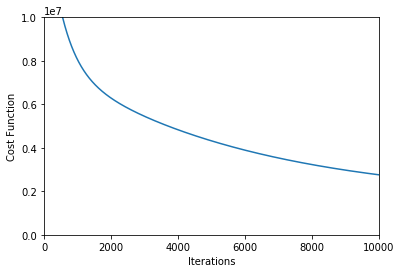

In [30]:
import matplotlib.pyplot as plt
import numpy as pd
%matplotlib inline

plt.plot(range(cost.shape[0]) ,cost)
plt.ylabel('Cost Function')
plt.xlabel('Iterations')
plt.axis([0,10000,0,10000000])


### Modelo 3 : Removidas as features que não aparentam influenciar no preço, com as restantes elevadas ao quadrado

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

initial_x3, initial_y3 = getTrainSet()
initial_x3 = initial_x3[:, [0, x2, y2, z2, carat2]]

indices_generator = generate_sets(initial_x3)
theta3 = np.zeros((5,initial_x3.shape[1],1))
error3 = np.zeros((5,1))
error3_n = np.zeros((5,1)) 
i=0
for train_index, val_index in indices_generator:
    #dados de treino e de validacao
    x3_train = initial_x3[train_index]
    y3_train = initial_y3[train_index]
    x3_val = initial_x3[val_index]
    y3_val = initial_y3[val_index]
#     print(x3_train.shape, y3_train.shape)
    
    theta3[i] = LinRegBatchGradientDescent(x3_train,y3_train,5000,0.00001)
    thetaNormal = NormalEquation(x3_train,y3_train)
    
    sgd_reg = SGDRegressor(max_iter=10000, penalty=None, eta0=0.001, verbose=0, learning_rate='constant')
    sgd_reg.fit(x3_train, y3_train)

    # error from validation
    y3_predict = x3_val.dot(theta3[i])
    y3_n_predict = x3_val.dot(thetaNormal)
    error3[i] = mean_squared_error(y3_val, y3_predict)
    error3_n[i] = mean_squared_error(y3_val, y3_n_predict)/2
    i += 1

(36679, 5) (36679,)
-- Epoch 1
Norm: 11054.82, NNZs: 5, Bias: 1962.618627, T: 36679, Avg. loss: 6204542.531065
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 18673.51, NNZs: 5, Bias: 1987.316645, T: 73358, Avg. loss: 3797263.122608
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 24087.90, NNZs: 5, Bias: 1946.649851, T: 110037, Avg. loss: 2620224.240755
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 27948.75, NNZs: 5, Bias: 2046.182500, T: 146716, Avg. loss: 2027161.217566
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 30684.75, NNZs: 5, Bias: 2002.225995, T: 183395, Avg. loss: 1727776.364533
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 32634.95, NNZs: 5, Bias: 1958.734165, T: 220074, Avg. loss: 1575220.348939
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 34014.91, NNZs: 5, Bias: 1908.063924, T: 256753, Avg. loss: 1497443.221598
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 35007.88, NNZs: 5, Bias: 2016.698265, T: 293432, Avg. loss: 1457849.322948
T

Norm: 37692.85, NNZs: 5, Bias: 1956.897083, T: 3961332, Avg. loss: 1410074.455227
Total training time: 0.40 seconds.
-- Epoch 109
Norm: 37692.70, NNZs: 5, Bias: 1986.476617, T: 3998011, Avg. loss: 1409238.159895
Total training time: 0.41 seconds.
-- Epoch 110
Norm: 37699.76, NNZs: 5, Bias: 1994.743559, T: 4034690, Avg. loss: 1409830.330179
Total training time: 0.41 seconds.
-- Epoch 111
Norm: 37690.44, NNZs: 5, Bias: 1971.033402, T: 4071369, Avg. loss: 1409483.486778
Total training time: 0.42 seconds.
-- Epoch 112
Norm: 37692.16, NNZs: 5, Bias: 1947.464028, T: 4108048, Avg. loss: 1409711.751490
Total training time: 0.42 seconds.
-- Epoch 113
Norm: 37696.04, NNZs: 5, Bias: 2008.661519, T: 4144727, Avg. loss: 1409015.857546
Total training time: 0.43 seconds.
-- Epoch 114
Norm: 37700.56, NNZs: 5, Bias: 1976.065145, T: 4181406, Avg. loss: 1409497.661117
Total training time: 0.43 seconds.
-- Epoch 115
Norm: 37706.93, NNZs: 5, Bias: 1983.214812, T: 4218085, Avg. loss: 1409422.184453
Total tr

Norm: 37905.85, NNZs: 5, Bias: 1950.027263, T: 7262442, Avg. loss: 1408755.013236
Total training time: 0.81 seconds.
-- Epoch 199
Norm: 37902.24, NNZs: 5, Bias: 1999.079950, T: 7299121, Avg. loss: 1408743.752630
Total training time: 0.82 seconds.
-- Epoch 200
Norm: 37902.45, NNZs: 5, Bias: 2003.432553, T: 7335800, Avg. loss: 1408002.877160
Total training time: 0.82 seconds.
-- Epoch 201
Norm: 37903.73, NNZs: 5, Bias: 1949.044067, T: 7372479, Avg. loss: 1408084.436687
Total training time: 0.82 seconds.
-- Epoch 202
Norm: 37905.17, NNZs: 5, Bias: 1952.362396, T: 7409158, Avg. loss: 1408327.757571
Total training time: 0.83 seconds.
-- Epoch 203
Norm: 37893.95, NNZs: 5, Bias: 1958.004028, T: 7445837, Avg. loss: 1408704.856352
Total training time: 0.83 seconds.
-- Epoch 204
Norm: 37892.57, NNZs: 5, Bias: 1932.707244, T: 7482516, Avg. loss: 1408401.989112
Total training time: 0.83 seconds.
-- Epoch 205
Norm: 37909.02, NNZs: 5, Bias: 1989.213719, T: 7519195, Avg. loss: 1408632.476175
Total tr

Norm: 38247.31, NNZs: 5, Bias: 2016.183848, T: 11480527, Avg. loss: 1407273.623164
Total training time: 1.22 seconds.
-- Epoch 314
Norm: 38249.30, NNZs: 5, Bias: 1983.761047, T: 11517206, Avg. loss: 1407156.659768
Total training time: 1.22 seconds.
-- Epoch 315
Norm: 38246.21, NNZs: 5, Bias: 1965.686907, T: 11553885, Avg. loss: 1406719.207047
Total training time: 1.23 seconds.
-- Epoch 316
Norm: 38252.71, NNZs: 5, Bias: 1987.906057, T: 11590564, Avg. loss: 1407525.666358
Total training time: 1.23 seconds.
-- Epoch 317
Norm: 38249.53, NNZs: 5, Bias: 1946.968255, T: 11627243, Avg. loss: 1407099.103806
Total training time: 1.24 seconds.
-- Epoch 318
Norm: 38257.50, NNZs: 5, Bias: 1957.313542, T: 11663922, Avg. loss: 1407190.910026
Total training time: 1.24 seconds.
-- Epoch 319
Norm: 38264.26, NNZs: 5, Bias: 1975.326372, T: 11700601, Avg. loss: 1407111.707404
Total training time: 1.24 seconds.
-- Epoch 320
Norm: 38272.35, NNZs: 5, Bias: 1976.555868, T: 11737280, Avg. loss: 1406972.751640


Norm: 38688.29, NNZs: 5, Bias: 1957.966427, T: 15845328, Avg. loss: 1406473.061075
Total training time: 1.63 seconds.
-- Epoch 433
Norm: 38698.88, NNZs: 5, Bias: 2001.437521, T: 15882007, Avg. loss: 1405880.719356
Total training time: 1.63 seconds.
-- Epoch 434
Norm: 38702.37, NNZs: 5, Bias: 1986.951563, T: 15918686, Avg. loss: 1405960.858747
Total training time: 1.63 seconds.
-- Epoch 435
Norm: 38707.35, NNZs: 5, Bias: 1968.666108, T: 15955365, Avg. loss: 1406056.152230
Total training time: 1.64 seconds.
-- Epoch 436
Norm: 38712.04, NNZs: 5, Bias: 1954.365869, T: 15992044, Avg. loss: 1406113.628648
Total training time: 1.64 seconds.
-- Epoch 437
Norm: 38716.39, NNZs: 5, Bias: 1963.162299, T: 16028723, Avg. loss: 1406273.599838
Total training time: 1.65 seconds.
-- Epoch 438
Norm: 38718.35, NNZs: 5, Bias: 1993.279235, T: 16065402, Avg. loss: 1405729.985560
Total training time: 1.65 seconds.
-- Epoch 439
Norm: 38717.71, NNZs: 5, Bias: 1982.863295, T: 16102081, Avg. loss: 1406014.957742


Norm: 39129.47, NNZs: 5, Bias: 1974.887752, T: 19623265, Avg. loss: 1405892.260349
Total training time: 2.04 seconds.
-- Epoch 536
Norm: 39141.45, NNZs: 5, Bias: 2016.373258, T: 19659944, Avg. loss: 1405286.976821
Total training time: 2.04 seconds.
-- Epoch 537
Norm: 39135.97, NNZs: 5, Bias: 1944.451140, T: 19696623, Avg. loss: 1405675.994502
Total training time: 2.04 seconds.
-- Epoch 538
Norm: 39142.71, NNZs: 5, Bias: 1982.313683, T: 19733302, Avg. loss: 1405463.081256
Total training time: 2.05 seconds.
-- Epoch 539
Norm: 39146.93, NNZs: 5, Bias: 1910.203050, T: 19769981, Avg. loss: 1404957.001699
Total training time: 2.05 seconds.
-- Epoch 540
Norm: 39154.76, NNZs: 5, Bias: 1959.067181, T: 19806660, Avg. loss: 1405256.994103
Total training time: 2.06 seconds.
-- Epoch 541
Norm: 39163.37, NNZs: 5, Bias: 1960.569013, T: 19843339, Avg. loss: 1405287.666290
Total training time: 2.06 seconds.
-- Epoch 542
Norm: 39160.33, NNZs: 5, Bias: 1971.087936, T: 19880018, Avg. loss: 1405072.303250


-- Epoch 641
Norm: 39596.27, NNZs: 5, Bias: 1951.657655, T: 23511239, Avg. loss: 1404682.224091
Total training time: 2.44 seconds.
-- Epoch 642
Norm: 39597.61, NNZs: 5, Bias: 1974.125533, T: 23547918, Avg. loss: 1404483.837603
Total training time: 2.45 seconds.
-- Epoch 643
Norm: 39604.30, NNZs: 5, Bias: 1949.497301, T: 23584597, Avg. loss: 1404803.873135
Total training time: 2.45 seconds.
-- Epoch 644
Norm: 39597.25, NNZs: 5, Bias: 1910.997309, T: 23621276, Avg. loss: 1404400.058534
Total training time: 2.46 seconds.
-- Epoch 645
Norm: 39606.19, NNZs: 5, Bias: 1936.182013, T: 23657955, Avg. loss: 1404883.007045
Total training time: 2.46 seconds.
-- Epoch 646
Norm: 39612.23, NNZs: 5, Bias: 1967.192812, T: 23694634, Avg. loss: 1404612.889536
Total training time: 2.47 seconds.
-- Epoch 647
Norm: 39615.65, NNZs: 5, Bias: 1960.205926, T: 23731313, Avg. loss: 1404737.699689
Total training time: 2.47 seconds.
-- Epoch 648
Norm: 39626.20, NNZs: 5, Bias: 1962.379049, T: 23767992, Avg. loss: 14

Norm: 40030.61, NNZs: 5, Bias: 2004.471163, T: 27069102, Avg. loss: 1404070.709241
Total training time: 2.86 seconds.
-- Epoch 739
Norm: 40038.82, NNZs: 5, Bias: 1995.459149, T: 27105781, Avg. loss: 1404156.763683
Total training time: 2.86 seconds.
-- Epoch 740
Norm: 40041.60, NNZs: 5, Bias: 1953.458068, T: 27142460, Avg. loss: 1404311.525522
Total training time: 2.87 seconds.
-- Epoch 741
Norm: 40048.85, NNZs: 5, Bias: 1967.617064, T: 27179139, Avg. loss: 1404452.523047
Total training time: 2.87 seconds.
-- Epoch 742
Norm: 40047.30, NNZs: 5, Bias: 1994.772915, T: 27215818, Avg. loss: 1404304.675292
Total training time: 2.88 seconds.
-- Epoch 743
Norm: 40062.23, NNZs: 5, Bias: 2046.986956, T: 27252497, Avg. loss: 1404104.259337
Total training time: 2.88 seconds.
-- Epoch 744
Norm: 40059.35, NNZs: 5, Bias: 1946.242706, T: 27289176, Avg. loss: 1404333.494242
Total training time: 2.89 seconds.
-- Epoch 745
Norm: 40061.62, NNZs: 5, Bias: 1971.735922, T: 27325855, Avg. loss: 1404114.571178


Norm: 40397.58, NNZs: 5, Bias: 1962.321698, T: 30186817, Avg. loss: 1403544.619308
Total training time: 3.27 seconds.
-- Epoch 824
Norm: 40401.05, NNZs: 5, Bias: 1981.492941, T: 30223496, Avg. loss: 1404209.380877
Total training time: 3.27 seconds.
-- Epoch 825
Norm: 40408.74, NNZs: 5, Bias: 1968.449881, T: 30260175, Avg. loss: 1403568.099074
Total training time: 3.28 seconds.
-- Epoch 826
Norm: 40413.58, NNZs: 5, Bias: 1915.918781, T: 30296854, Avg. loss: 1404190.775461
Total training time: 3.28 seconds.
-- Epoch 827
Norm: 40419.04, NNZs: 5, Bias: 1971.170239, T: 30333533, Avg. loss: 1403720.417737
Total training time: 3.29 seconds.
-- Epoch 828
Norm: 40419.86, NNZs: 5, Bias: 1948.677878, T: 30370212, Avg. loss: 1404041.529906
Total training time: 3.29 seconds.
-- Epoch 829
Norm: 40430.51, NNZs: 5, Bias: 1995.655443, T: 30406891, Avg. loss: 1403832.426050
Total training time: 3.30 seconds.
-- Epoch 830
Norm: 40432.54, NNZs: 5, Bias: 1976.447867, T: 30443570, Avg. loss: 1403634.665123


Norm: 40905.20, NNZs: 5, Bias: 1942.403912, T: 34368223, Avg. loss: 1403169.164078
Total training time: 3.67 seconds.
-- Epoch 938
Norm: 40916.58, NNZs: 5, Bias: 2027.599505, T: 34404902, Avg. loss: 1403264.887323
Total training time: 3.68 seconds.
-- Epoch 939
Norm: 40924.14, NNZs: 5, Bias: 1981.479589, T: 34441581, Avg. loss: 1403747.991422
Total training time: 3.68 seconds.
-- Epoch 940
Norm: 40931.41, NNZs: 5, Bias: 2011.381612, T: 34478260, Avg. loss: 1403231.176640
Total training time: 3.68 seconds.
-- Epoch 941
Norm: 40934.07, NNZs: 5, Bias: 2000.989520, T: 34514939, Avg. loss: 1403410.299534
Total training time: 3.69 seconds.
-- Epoch 942
Norm: 40930.52, NNZs: 5, Bias: 1969.157469, T: 34551618, Avg. loss: 1403739.135433
Total training time: 3.69 seconds.
-- Epoch 943
Norm: 40936.48, NNZs: 5, Bias: 1952.238955, T: 34588297, Avg. loss: 1403434.342102
Total training time: 3.70 seconds.
-- Epoch 944
Norm: 40936.65, NNZs: 5, Bias: 1965.885575, T: 34624976, Avg. loss: 1403697.662156


Norm: 41346.97, NNZs: 5, Bias: 1970.739616, T: 38329555, Avg. loss: 1403448.999884
Total training time: 4.08 seconds.
-- Epoch 1046
Norm: 41349.34, NNZs: 5, Bias: 1970.954593, T: 38366234, Avg. loss: 1403147.834964
Total training time: 4.08 seconds.
-- Epoch 1047
Norm: 41356.92, NNZs: 5, Bias: 1997.083563, T: 38402913, Avg. loss: 1403396.199159
Total training time: 4.09 seconds.
-- Epoch 1048
Norm: 41361.09, NNZs: 5, Bias: 1982.308826, T: 38439592, Avg. loss: 1403443.707513
Total training time: 4.09 seconds.
-- Epoch 1049
Norm: 41368.29, NNZs: 5, Bias: 1978.271296, T: 38476271, Avg. loss: 1403218.471872
Total training time: 4.10 seconds.
-- Epoch 1050
Norm: 41369.96, NNZs: 5, Bias: 1974.267039, T: 38512950, Avg. loss: 1403090.542942
Total training time: 4.10 seconds.
-- Epoch 1051
Norm: 41369.45, NNZs: 5, Bias: 1962.497561, T: 38549629, Avg. loss: 1403031.912348
Total training time: 4.10 seconds.
-- Epoch 1052
Norm: 41371.28, NNZs: 5, Bias: 1957.898210, T: 38586308, Avg. loss: 1402563.

Norm: 41787.00, NNZs: 5, Bias: 1944.724685, T: 42510961, Avg. loss: 1402876.622383
Total training time: 4.49 seconds.
-- Epoch 1160
Norm: 41797.93, NNZs: 5, Bias: 1971.809677, T: 42547640, Avg. loss: 1403030.027728
Total training time: 4.49 seconds.
-- Epoch 1161
Norm: 41804.71, NNZs: 5, Bias: 2022.007621, T: 42584319, Avg. loss: 1402697.644508
Total training time: 4.49 seconds.
-- Epoch 1162
Norm: 41815.06, NNZs: 5, Bias: 1941.533481, T: 42620998, Avg. loss: 1402916.706350
Total training time: 4.50 seconds.
-- Epoch 1163
Norm: 41818.62, NNZs: 5, Bias: 1999.522292, T: 42657677, Avg. loss: 1403310.760705
Total training time: 4.50 seconds.
-- Epoch 1164
Norm: 41818.62, NNZs: 5, Bias: 1946.117048, T: 42694356, Avg. loss: 1403155.222245
Total training time: 4.51 seconds.
-- Epoch 1165
Norm: 41820.42, NNZs: 5, Bias: 1941.036382, T: 42731035, Avg. loss: 1402740.888610
Total training time: 4.51 seconds.
-- Epoch 1166
Norm: 41824.65, NNZs: 5, Bias: 1988.556593, T: 42767714, Avg. loss: 1402478.

Norm: 42246.62, NNZs: 5, Bias: 1993.156492, T: 46875762, Avg. loss: 1402601.236843
Total training time: 4.89 seconds.
-- Epoch 1279
Norm: 42253.83, NNZs: 5, Bias: 1996.085033, T: 46912441, Avg. loss: 1402772.951889
Total training time: 4.90 seconds.
-- Epoch 1280
Norm: 42252.88, NNZs: 5, Bias: 1949.885569, T: 46949120, Avg. loss: 1402754.016081
Total training time: 4.90 seconds.
-- Epoch 1281
Norm: 42252.64, NNZs: 5, Bias: 1992.703790, T: 46985799, Avg. loss: 1402785.203607
Total training time: 4.90 seconds.
-- Epoch 1282
Norm: 42257.73, NNZs: 5, Bias: 1990.466611, T: 47022478, Avg. loss: 1402466.763792
Total training time: 4.91 seconds.
-- Epoch 1283
Norm: 42265.05, NNZs: 5, Bias: 1985.450896, T: 47059157, Avg. loss: 1402679.001198
Total training time: 4.91 seconds.
-- Epoch 1284
Norm: 42264.89, NNZs: 5, Bias: 1957.449892, T: 47095836, Avg. loss: 1402597.013601
Total training time: 4.91 seconds.
-- Epoch 1285
Norm: 42272.06, NNZs: 5, Bias: 1981.625871, T: 47132515, Avg. loss: 1402995.

-- Epoch 1394
Norm: 42645.69, NNZs: 5, Bias: 1948.318292, T: 51130526, Avg. loss: 1402585.029434
Total training time: 5.30 seconds.
-- Epoch 1395
Norm: 42639.21, NNZs: 5, Bias: 1922.004320, T: 51167205, Avg. loss: 1402593.244082
Total training time: 5.30 seconds.
-- Epoch 1396
Norm: 42641.94, NNZs: 5, Bias: 1948.773955, T: 51203884, Avg. loss: 1402675.302277
Total training time: 5.31 seconds.
-- Epoch 1397
Norm: 42654.42, NNZs: 5, Bias: 2044.310640, T: 51240563, Avg. loss: 1402080.883670
Total training time: 5.31 seconds.
-- Epoch 1398
Norm: 42651.04, NNZs: 5, Bias: 1931.274577, T: 51277242, Avg. loss: 1401988.011540
Total training time: 5.31 seconds.
-- Epoch 1399
Norm: 42659.12, NNZs: 5, Bias: 1943.841190, T: 51313921, Avg. loss: 1402758.098601
Total training time: 5.32 seconds.
-- Epoch 1400
Norm: 42664.28, NNZs: 5, Bias: 1972.180015, T: 51350600, Avg. loss: 1402067.035275
Total training time: 5.32 seconds.
-- Epoch 1401
Norm: 42670.06, NNZs: 5, Bias: 1967.059103, T: 51387279, Avg. 

Norm: 43023.89, NNZs: 5, Bias: 1987.096656, T: 55385290, Avg. loss: 1402649.298109
Total training time: 5.70 seconds.
-- Epoch 1511
Norm: 43025.12, NNZs: 5, Bias: 1976.484524, T: 55421969, Avg. loss: 1402389.390542
Total training time: 5.71 seconds.
-- Epoch 1512
Norm: 43029.15, NNZs: 5, Bias: 2036.884743, T: 55458648, Avg. loss: 1402498.046192
Total training time: 5.71 seconds.
-- Epoch 1513
Norm: 43023.17, NNZs: 5, Bias: 1956.915022, T: 55495327, Avg. loss: 1402079.730001
Total training time: 5.72 seconds.
-- Epoch 1514
Norm: 43026.18, NNZs: 5, Bias: 1934.287255, T: 55532006, Avg. loss: 1402296.328132
Total training time: 5.72 seconds.
-- Epoch 1515
Norm: 43027.36, NNZs: 5, Bias: 1973.796294, T: 55568685, Avg. loss: 1401988.542032
Total training time: 5.72 seconds.
-- Epoch 1516
Norm: 43032.90, NNZs: 5, Bias: 2010.421513, T: 55605364, Avg. loss: 1402663.642827
Total training time: 5.73 seconds.
-- Epoch 1517
Norm: 43036.87, NNZs: 5, Bias: 2006.930840, T: 55642043, Avg. loss: 1402512.

-- Epoch 1630
Norm: 43368.60, NNZs: 5, Bias: 1991.325653, T: 59786770, Avg. loss: 1401960.609403
Total training time: 6.11 seconds.
-- Epoch 1631
Norm: 43372.32, NNZs: 5, Bias: 1956.979181, T: 59823449, Avg. loss: 1402233.613693
Total training time: 6.12 seconds.
-- Epoch 1632
Norm: 43371.50, NNZs: 5, Bias: 1954.820206, T: 59860128, Avg. loss: 1402331.390557
Total training time: 6.12 seconds.
-- Epoch 1633
Norm: 43384.23, NNZs: 5, Bias: 2010.880571, T: 59896807, Avg. loss: 1402017.832344
Total training time: 6.12 seconds.
-- Epoch 1634
Norm: 43388.29, NNZs: 5, Bias: 1971.192023, T: 59933486, Avg. loss: 1401796.159111
Total training time: 6.13 seconds.
-- Epoch 1635
Norm: 43395.02, NNZs: 5, Bias: 1989.273166, T: 59970165, Avg. loss: 1402046.074218
Total training time: 6.13 seconds.
-- Epoch 1636
Norm: 43393.61, NNZs: 5, Bias: 1966.897686, T: 60006844, Avg. loss: 1402768.871766
Total training time: 6.14 seconds.
-- Epoch 1637
Norm: 43389.60, NNZs: 5, Bias: 1914.602167, T: 60043523, Avg. 

Norm: 43692.99, NNZs: 5, Bias: 1995.223321, T: 64188250, Avg. loss: 1402867.910236
Total training time: 6.52 seconds.
-- Epoch 1751
Norm: 43694.65, NNZs: 5, Bias: 1935.254529, T: 64224929, Avg. loss: 1402044.477956
Total training time: 6.52 seconds.
-- Epoch 1752
Norm: 43703.33, NNZs: 5, Bias: 1980.394863, T: 64261608, Avg. loss: 1402077.523339
Total training time: 6.52 seconds.
-- Epoch 1753
Norm: 43702.93, NNZs: 5, Bias: 1929.835515, T: 64298287, Avg. loss: 1402081.147502
Total training time: 6.53 seconds.
-- Epoch 1754
Norm: 43708.29, NNZs: 5, Bias: 1912.074961, T: 64334966, Avg. loss: 1402231.779946
Total training time: 6.53 seconds.
-- Epoch 1755
Norm: 43716.51, NNZs: 5, Bias: 2011.461313, T: 64371645, Avg. loss: 1401807.575193
Total training time: 6.54 seconds.
-- Epoch 1756
Norm: 43714.24, NNZs: 5, Bias: 1978.288392, T: 64408324, Avg. loss: 1401771.049034
Total training time: 6.54 seconds.
-- Epoch 1757
Norm: 43715.37, NNZs: 5, Bias: 1948.276849, T: 64445003, Avg. loss: 1402399.

Norm: 43996.78, NNZs: 5, Bias: 1939.465354, T: 68626409, Avg. loss: 1402485.073045
Total training time: 6.92 seconds.
-- Epoch 1872
Norm: 43999.75, NNZs: 5, Bias: 1956.739430, T: 68663088, Avg. loss: 1401914.060311
Total training time: 6.93 seconds.
-- Epoch 1873
Norm: 44007.74, NNZs: 5, Bias: 1969.309608, T: 68699767, Avg. loss: 1401859.393755
Total training time: 6.93 seconds.
-- Epoch 1874
Norm: 44005.22, NNZs: 5, Bias: 1956.963756, T: 68736446, Avg. loss: 1401818.740284
Total training time: 6.93 seconds.
-- Epoch 1875
Norm: 44005.25, NNZs: 5, Bias: 1908.927833, T: 68773125, Avg. loss: 1401843.771259
Total training time: 6.94 seconds.
-- Epoch 1876
Norm: 44009.62, NNZs: 5, Bias: 1957.773547, T: 68809804, Avg. loss: 1402123.139067
Total training time: 6.94 seconds.
-- Epoch 1877
Norm: 44007.62, NNZs: 5, Bias: 1999.926479, T: 68846483, Avg. loss: 1402353.762201
Total training time: 6.95 seconds.
-- Epoch 1878
Norm: 44014.20, NNZs: 5, Bias: 1992.168485, T: 68883162, Avg. loss: 1401717.

Norm: 44258.39, NNZs: 5, Bias: 1946.570574, T: 72954531, Avg. loss: 1401913.907919
Total training time: 7.33 seconds.
-- Epoch 1990
Norm: 44266.62, NNZs: 5, Bias: 1981.205922, T: 72991210, Avg. loss: 1402235.867840
Total training time: 7.33 seconds.
-- Epoch 1991
Norm: 44264.98, NNZs: 5, Bias: 1929.808938, T: 73027889, Avg. loss: 1402112.249288
Total training time: 7.33 seconds.
-- Epoch 1992
Norm: 44273.41, NNZs: 5, Bias: 2000.949320, T: 73064568, Avg. loss: 1402357.963194
Total training time: 7.34 seconds.
-- Epoch 1993
Norm: 44274.11, NNZs: 5, Bias: 1972.428074, T: 73101247, Avg. loss: 1402078.661456
Total training time: 7.34 seconds.
-- Epoch 1994
Norm: 44279.66, NNZs: 5, Bias: 1994.359889, T: 73137926, Avg. loss: 1401793.936303
Total training time: 7.34 seconds.
-- Epoch 1995
Norm: 44284.53, NNZs: 5, Bias: 2003.510894, T: 73174605, Avg. loss: 1401727.134503
Total training time: 7.35 seconds.
-- Epoch 1996
Norm: 44284.15, NNZs: 5, Bias: 2032.871684, T: 73211284, Avg. loss: 1402086.

Norm: 44508.42, NNZs: 5, Bias: 1992.501802, T: 77282653, Avg. loss: 1401987.342776
Total training time: 7.73 seconds.
-- Epoch 2108
Norm: 44510.98, NNZs: 5, Bias: 1974.339051, T: 77319332, Avg. loss: 1401602.521914
Total training time: 7.73 seconds.
-- Epoch 2109
Norm: 44512.94, NNZs: 5, Bias: 1961.052812, T: 77356011, Avg. loss: 1401666.374378
Total training time: 7.74 seconds.
-- Epoch 2110
Norm: 44508.09, NNZs: 5, Bias: 1941.998318, T: 77392690, Avg. loss: 1402130.513167
Total training time: 7.74 seconds.
-- Epoch 2111
Norm: 44515.34, NNZs: 5, Bias: 2024.784954, T: 77429369, Avg. loss: 1401432.851016
Total training time: 7.74 seconds.
-- Epoch 2112
Norm: 44517.89, NNZs: 5, Bias: 1966.805642, T: 77466048, Avg. loss: 1401956.754709
Total training time: 7.75 seconds.
-- Epoch 2113
Norm: 44520.22, NNZs: 5, Bias: 1945.634991, T: 77502727, Avg. loss: 1401478.831167
Total training time: 7.75 seconds.
-- Epoch 2114
Norm: 44524.06, NNZs: 5, Bias: 1945.618245, T: 77539406, Avg. loss: 1402236.

Total training time: 8.13 seconds.
-- Epoch 2227
Norm: 44728.73, NNZs: 5, Bias: 1969.507386, T: 81684133, Avg. loss: 1401592.788492
Total training time: 8.14 seconds.
-- Epoch 2228
Norm: 44729.56, NNZs: 5, Bias: 1971.737626, T: 81720812, Avg. loss: 1402192.627680
Total training time: 8.14 seconds.
-- Epoch 2229
Norm: 44730.08, NNZs: 5, Bias: 1954.485473, T: 81757491, Avg. loss: 1401378.229110
Total training time: 8.15 seconds.
-- Epoch 2230
Norm: 44731.25, NNZs: 5, Bias: 1914.780535, T: 81794170, Avg. loss: 1401834.452864
Total training time: 8.15 seconds.
-- Epoch 2231
Norm: 44743.17, NNZs: 5, Bias: 1984.731090, T: 81830849, Avg. loss: 1402151.702711
Total training time: 8.16 seconds.
-- Epoch 2232
Norm: 44743.87, NNZs: 5, Bias: 1940.203122, T: 81867528, Avg. loss: 1402074.782092
Total training time: 8.16 seconds.
-- Epoch 2233
Norm: 44740.20, NNZs: 5, Bias: 1936.093328, T: 81904207, Avg. loss: 1401438.620769
Total training time: 8.17 seconds.
-- Epoch 2234
Norm: 44740.74, NNZs: 5, Bi

-- Epoch 2340
Norm: 44919.40, NNZs: 5, Bias: 1956.494384, T: 85828860, Avg. loss: 1401692.488535
Total training time: 8.54 seconds.
-- Epoch 2341
Norm: 44924.07, NNZs: 5, Bias: 1967.469492, T: 85865539, Avg. loss: 1402019.229764
Total training time: 8.55 seconds.
-- Epoch 2342
Norm: 44922.58, NNZs: 5, Bias: 1937.724870, T: 85902218, Avg. loss: 1402072.995080
Total training time: 8.55 seconds.
-- Epoch 2343
Norm: 44931.11, NNZs: 5, Bias: 1994.910772, T: 85938897, Avg. loss: 1401763.341100
Total training time: 8.56 seconds.
-- Epoch 2344
Norm: 44937.06, NNZs: 5, Bias: 1998.324129, T: 85975576, Avg. loss: 1402479.969897
Total training time: 8.56 seconds.
-- Epoch 2345
Norm: 44936.87, NNZs: 5, Bias: 1949.575188, T: 86012255, Avg. loss: 1401703.095501
Total training time: 8.56 seconds.
-- Epoch 2346
Norm: 44939.79, NNZs: 5, Bias: 1968.981022, T: 86048934, Avg. loss: 1401897.181633
Total training time: 8.57 seconds.
-- Epoch 2347
Norm: 44939.15, NNZs: 5, Bias: 1915.712237, T: 86085613, Avg. 

-- Epoch 2459
Norm: 45107.55, NNZs: 5, Bias: 1994.336894, T: 90193661, Avg. loss: 1401757.613448
Total training time: 8.95 seconds.
-- Epoch 2460
Norm: 45113.93, NNZs: 5, Bias: 1976.285903, T: 90230340, Avg. loss: 1402038.974213
Total training time: 8.96 seconds.
-- Epoch 2461
Norm: 45107.39, NNZs: 5, Bias: 1958.182364, T: 90267019, Avg. loss: 1401953.507860
Total training time: 8.96 seconds.
-- Epoch 2462
Norm: 45110.37, NNZs: 5, Bias: 1976.180155, T: 90303698, Avg. loss: 1401716.788575
Total training time: 8.97 seconds.
-- Epoch 2463
Norm: 45117.41, NNZs: 5, Bias: 1999.926178, T: 90340377, Avg. loss: 1401415.387127
Total training time: 8.97 seconds.
-- Epoch 2464
Norm: 45124.95, NNZs: 5, Bias: 1977.505659, T: 90377056, Avg. loss: 1401975.956139
Total training time: 8.97 seconds.
-- Epoch 2465
Norm: 45124.53, NNZs: 5, Bias: 1979.006598, T: 90413735, Avg. loss: 1401856.435171
Total training time: 8.98 seconds.
-- Epoch 2466
Norm: 45124.80, NNZs: 5, Bias: 1962.924653, T: 90450414, Avg. 

Norm: 45285.07, NNZs: 5, Bias: 1970.337486, T: 94521783, Avg. loss: 1401955.373324
Total training time: 9.36 seconds.
-- Epoch 2578
Norm: 45284.48, NNZs: 5, Bias: 1942.229356, T: 94558462, Avg. loss: 1401647.374667
Total training time: 9.36 seconds.
-- Epoch 2579
Norm: 45282.50, NNZs: 5, Bias: 1986.934636, T: 94595141, Avg. loss: 1401885.595804
Total training time: 9.36 seconds.
-- Epoch 2580
Norm: 45281.89, NNZs: 5, Bias: 1959.273063, T: 94631820, Avg. loss: 1401194.460415
Total training time: 9.37 seconds.
-- Epoch 2581
Norm: 45288.59, NNZs: 5, Bias: 1985.100422, T: 94668499, Avg. loss: 1401859.269800
Total training time: 9.37 seconds.
-- Epoch 2582
Norm: 45290.11, NNZs: 5, Bias: 2012.950557, T: 94705178, Avg. loss: 1401739.055896
Total training time: 9.37 seconds.
-- Epoch 2583
Norm: 45291.40, NNZs: 5, Bias: 1980.203243, T: 94741857, Avg. loss: 1402387.290302
Total training time: 9.38 seconds.
-- Epoch 2584
Norm: 45283.13, NNZs: 5, Bias: 1920.472911, T: 94778536, Avg. loss: 1401624.

Norm: 45423.19, NNZs: 5, Bias: 1971.801237, T: 98813226, Avg. loss: 1401537.423827
Total training time: 9.76 seconds.
-- Epoch 2695
Norm: 45426.17, NNZs: 5, Bias: 1977.258867, T: 98849905, Avg. loss: 1401441.432845
Total training time: 9.76 seconds.
-- Epoch 2696
Norm: 45425.92, NNZs: 5, Bias: 1962.441073, T: 98886584, Avg. loss: 1401850.002524
Total training time: 9.77 seconds.
-- Epoch 2697
Norm: 45428.98, NNZs: 5, Bias: 2012.730196, T: 98923263, Avg. loss: 1401999.710064
Total training time: 9.77 seconds.
-- Epoch 2698
Norm: 45420.61, NNZs: 5, Bias: 1934.341468, T: 98959942, Avg. loss: 1401819.540096
Total training time: 9.77 seconds.
-- Epoch 2699
Norm: 45423.68, NNZs: 5, Bias: 1913.411139, T: 98996621, Avg. loss: 1401227.656267
Total training time: 9.78 seconds.
-- Epoch 2700
Norm: 45431.06, NNZs: 5, Bias: 2037.188076, T: 99033300, Avg. loss: 1401632.996034
Total training time: 9.78 seconds.
-- Epoch 2701
Norm: 45438.04, NNZs: 5, Bias: 2000.732015, T: 99069979, Avg. loss: 1401641.

Norm: 45547.09, NNZs: 5, Bias: 1945.773980, T: 102554484, Avg. loss: 1401725.372881
Total training time: 10.17 seconds.
-- Epoch 2797
Norm: 45546.31, NNZs: 5, Bias: 1954.895375, T: 102591163, Avg. loss: 1401788.961938
Total training time: 10.17 seconds.
-- Epoch 2798
Norm: 45553.21, NNZs: 5, Bias: 1992.638232, T: 102627842, Avg. loss: 1401915.937618
Total training time: 10.18 seconds.
-- Epoch 2799
Norm: 45555.63, NNZs: 5, Bias: 1994.540667, T: 102664521, Avg. loss: 1402274.964485
Total training time: 10.18 seconds.
-- Epoch 2800
Norm: 45555.63, NNZs: 5, Bias: 1974.533011, T: 102701200, Avg. loss: 1401599.013453
Total training time: 10.19 seconds.
-- Epoch 2801
Norm: 45550.78, NNZs: 5, Bias: 1939.757131, T: 102737879, Avg. loss: 1401458.173172
Total training time: 10.20 seconds.
-- Epoch 2802
Norm: 45546.01, NNZs: 5, Bias: 1986.033645, T: 102774558, Avg. loss: 1401352.561284
Total training time: 10.20 seconds.
-- Epoch 2803
Norm: 45545.19, NNZs: 5, Bias: 1976.306376, T: 102811237, Avg.

Norm: 45656.49, NNZs: 5, Bias: 1926.724012, T: 106405779, Avg. loss: 1401672.154785
Total training time: 10.57 seconds.
-- Epoch 2902
Norm: 45648.86, NNZs: 5, Bias: 1950.710938, T: 106442458, Avg. loss: 1401959.546706
Total training time: 10.58 seconds.
-- Epoch 2903
Norm: 45642.94, NNZs: 5, Bias: 1938.600592, T: 106479137, Avg. loss: 1401760.350912
Total training time: 10.58 seconds.
-- Epoch 2904
Norm: 45646.37, NNZs: 5, Bias: 1979.012602, T: 106515816, Avg. loss: 1401426.916284
Total training time: 10.58 seconds.
-- Epoch 2905
Norm: 45649.35, NNZs: 5, Bias: 1949.265718, T: 106552495, Avg. loss: 1401709.544493
Total training time: 10.59 seconds.
-- Epoch 2906
Norm: 45653.79, NNZs: 5, Bias: 1977.698162, T: 106589174, Avg. loss: 1401166.683447
Total training time: 10.59 seconds.
-- Epoch 2907
Norm: 45656.29, NNZs: 5, Bias: 1999.276646, T: 106625853, Avg. loss: 1401738.713319
Total training time: 10.59 seconds.
-- Epoch 2908
Norm: 45654.74, NNZs: 5, Bias: 1963.516185, T: 106662532, Avg.

Norm: 45762.08, NNZs: 5, Bias: 1970.692285, T: 110733901, Avg. loss: 1401681.321029
Total training time: 10.98 seconds.
-- Epoch 3020
Norm: 45758.14, NNZs: 5, Bias: 1948.479343, T: 110770580, Avg. loss: 1401374.492721
Total training time: 10.98 seconds.
-- Epoch 3021
Norm: 45762.65, NNZs: 5, Bias: 1960.106707, T: 110807259, Avg. loss: 1401865.129340
Total training time: 10.98 seconds.
-- Epoch 3022
Norm: 45769.46, NNZs: 5, Bias: 1947.237744, T: 110843938, Avg. loss: 1401584.270214
Total training time: 10.99 seconds.
-- Epoch 3023
Norm: 45771.33, NNZs: 5, Bias: 1970.807257, T: 110880617, Avg. loss: 1402008.705393
Total training time: 10.99 seconds.
-- Epoch 3024
Norm: 45767.43, NNZs: 5, Bias: 1981.656944, T: 110917296, Avg. loss: 1401982.896576
Total training time: 11.00 seconds.
-- Epoch 3025
Norm: 45770.91, NNZs: 5, Bias: 1987.288332, T: 110953975, Avg. loss: 1401831.459099
Total training time: 11.00 seconds.
-- Epoch 3026
Norm: 45774.83, NNZs: 5, Bias: 1948.694761, T: 110990654, Avg.

Norm: 45860.08, NNZs: 5, Bias: 1946.676640, T: 114988665, Avg. loss: 1402126.849870
Total training time: 11.38 seconds.
-- Epoch 3136
Norm: 45863.24, NNZs: 5, Bias: 1961.901944, T: 115025344, Avg. loss: 1402069.362303
Total training time: 11.39 seconds.
-- Epoch 3137
Norm: 45862.48, NNZs: 5, Bias: 1956.244589, T: 115062023, Avg. loss: 1401690.559360
Total training time: 11.39 seconds.
-- Epoch 3138
Norm: 45862.48, NNZs: 5, Bias: 1972.373369, T: 115098702, Avg. loss: 1401648.574801
Total training time: 11.39 seconds.
-- Epoch 3139
Norm: 45867.35, NNZs: 5, Bias: 1936.012561, T: 115135381, Avg. loss: 1401185.663567
Total training time: 11.40 seconds.
-- Epoch 3140
Norm: 45868.57, NNZs: 5, Bias: 1971.347476, T: 115172060, Avg. loss: 1401534.947062
Total training time: 11.40 seconds.
-- Epoch 3141
Norm: 45866.32, NNZs: 5, Bias: 1974.436988, T: 115208739, Avg. loss: 1401879.139834
Total training time: 11.41 seconds.
-- Epoch 3142
Norm: 45867.82, NNZs: 5, Bias: 2001.109582, T: 115245418, Avg.

Norm: 45949.01, NNZs: 5, Bias: 1953.193011, T: 119390145, Avg. loss: 1401646.199173
Total training time: 11.79 seconds.
-- Epoch 3256
Norm: 45953.55, NNZs: 5, Bias: 1996.618322, T: 119426824, Avg. loss: 1401850.810624
Total training time: 11.79 seconds.
-- Epoch 3257
Norm: 45953.28, NNZs: 5, Bias: 1980.199211, T: 119463503, Avg. loss: 1401332.618748
Total training time: 11.80 seconds.
-- Epoch 3258
Norm: 45949.66, NNZs: 5, Bias: 1980.657520, T: 119500182, Avg. loss: 1401435.262750
Total training time: 11.80 seconds.
-- Epoch 3259
Norm: 45952.67, NNZs: 5, Bias: 1983.419189, T: 119536861, Avg. loss: 1401493.105449
Total training time: 11.81 seconds.
-- Epoch 3260
Norm: 45953.35, NNZs: 5, Bias: 1965.631562, T: 119573540, Avg. loss: 1401965.282946
Total training time: 11.81 seconds.
-- Epoch 3261
Norm: 45952.89, NNZs: 5, Bias: 1978.417895, T: 119610219, Avg. loss: 1401334.713869
Total training time: 11.81 seconds.
-- Epoch 3262
Norm: 45953.70, NNZs: 5, Bias: 1975.238928, T: 119646898, Avg.

Norm: 46038.67, NNZs: 5, Bias: 1965.148047, T: 123644909, Avg. loss: 1402025.428509
Total training time: 12.19 seconds.
-- Epoch 3372
Norm: 46044.73, NNZs: 5, Bias: 2021.142154, T: 123681588, Avg. loss: 1401783.538003
Total training time: 12.20 seconds.
-- Epoch 3373
Norm: 46039.63, NNZs: 5, Bias: 1940.819240, T: 123718267, Avg. loss: 1402026.803614
Total training time: 12.20 seconds.
-- Epoch 3374
Norm: 46041.41, NNZs: 5, Bias: 1991.143433, T: 123754946, Avg. loss: 1402003.325778
Total training time: 12.21 seconds.
-- Epoch 3375
Norm: 46043.78, NNZs: 5, Bias: 1979.538912, T: 123791625, Avg. loss: 1402031.227720
Total training time: 12.21 seconds.
-- Epoch 3376
Norm: 46041.30, NNZs: 5, Bias: 1942.366703, T: 123828304, Avg. loss: 1401642.203560
Total training time: 12.21 seconds.
-- Epoch 3377
Norm: 46043.45, NNZs: 5, Bias: 1931.471763, T: 123864983, Avg. loss: 1401843.255962
Total training time: 12.22 seconds.
-- Epoch 3378
Norm: 46041.12, NNZs: 5, Bias: 1968.425809, T: 123901662, Avg.

-- Epoch 3489
Norm: 46109.23, NNZs: 5, Bias: 1923.730367, T: 127973031, Avg. loss: 1401479.589325
Total training time: 12.60 seconds.
-- Epoch 3490
Norm: 46108.44, NNZs: 5, Bias: 1972.948020, T: 128009710, Avg. loss: 1401932.847344
Total training time: 12.61 seconds.
-- Epoch 3491
Norm: 46110.75, NNZs: 5, Bias: 1941.204495, T: 128046389, Avg. loss: 1401898.960641
Total training time: 12.61 seconds.
-- Epoch 3492
Norm: 46110.67, NNZs: 5, Bias: 1974.217382, T: 128083068, Avg. loss: 1401287.299111
Total training time: 12.61 seconds.
-- Epoch 3493
Norm: 46117.04, NNZs: 5, Bias: 1990.147260, T: 128119747, Avg. loss: 1401688.763084
Total training time: 12.62 seconds.
-- Epoch 3494
Norm: 46114.69, NNZs: 5, Bias: 1911.199071, T: 128156426, Avg. loss: 1401657.508247
Total training time: 12.62 seconds.
-- Epoch 3495
Norm: 46116.72, NNZs: 5, Bias: 1939.725745, T: 128193105, Avg. loss: 1401403.329219
Total training time: 12.63 seconds.
-- Epoch 3496
Norm: 46116.08, NNZs: 5, Bias: 1973.073507, T: 1

Norm: 46178.73, NNZs: 5, Bias: 1964.729597, T: 132301153, Avg. loss: 1401511.646448
Total training time: 13.00 seconds.
-- Epoch 3608
Norm: 46181.73, NNZs: 5, Bias: 1969.179310, T: 132337832, Avg. loss: 1401638.908107
Total training time: 13.01 seconds.
-- Epoch 3609
Norm: 46183.21, NNZs: 5, Bias: 1989.169142, T: 132374511, Avg. loss: 1401831.249885
Total training time: 13.01 seconds.
-- Epoch 3610
Norm: 46177.65, NNZs: 5, Bias: 1974.798102, T: 132411190, Avg. loss: 1401980.856799
Total training time: 13.02 seconds.
-- Epoch 3611
Norm: 46181.91, NNZs: 5, Bias: 1953.295429, T: 132447869, Avg. loss: 1401566.687394
Total training time: 13.02 seconds.
-- Epoch 3612
Norm: 46181.68, NNZs: 5, Bias: 1969.922939, T: 132484548, Avg. loss: 1401593.249628
Total training time: 13.02 seconds.
-- Epoch 3613
Norm: 46180.52, NNZs: 5, Bias: 2025.621659, T: 132521227, Avg. loss: 1401274.845224
Total training time: 13.03 seconds.
-- Epoch 3614
Norm: 46182.23, NNZs: 5, Bias: 1982.902638, T: 132557906, Avg.

-- Epoch 3669
Norm: 46206.54, NNZs: 5, Bias: 1961.999557, T: 134575251, Avg. loss: 1401151.983154
Total training time: 13.21 seconds.
-- Epoch 3670
Norm: 46212.17, NNZs: 5, Bias: 1988.916497, T: 134611930, Avg. loss: 1402004.148789
Total training time: 13.21 seconds.
-- Epoch 3671
Norm: 46208.94, NNZs: 5, Bias: 1951.669058, T: 134648609, Avg. loss: 1401798.148436
Total training time: 13.22 seconds.
-- Epoch 3672
Norm: 46206.84, NNZs: 5, Bias: 1932.908542, T: 134685288, Avg. loss: 1402167.782090
Total training time: 13.22 seconds.
-- Epoch 3673
Norm: 46205.82, NNZs: 5, Bias: 1960.333208, T: 134721967, Avg. loss: 1401706.240721
Total training time: 13.22 seconds.
-- Epoch 3674
Norm: 46202.01, NNZs: 5, Bias: 1912.820527, T: 134758646, Avg. loss: 1401554.066818
Total training time: 13.23 seconds.
-- Epoch 3675
Norm: 46210.34, NNZs: 5, Bias: 1980.173028, T: 134795325, Avg. loss: 1401953.742506
Total training time: 13.23 seconds.
-- Epoch 3676
Norm: 46206.25, NNZs: 5, Bias: 1973.163427, T: 1

Norm: 46268.92, NNZs: 5, Bias: 1984.484566, T: 138756657, Avg. loss: 1401813.129154
Total training time: 13.61 seconds.
-- Epoch 3784
Norm: 46273.93, NNZs: 5, Bias: 1986.004752, T: 138793336, Avg. loss: 1401772.028621
Total training time: 13.62 seconds.
-- Epoch 3785
Norm: 46274.50, NNZs: 5, Bias: 1961.024040, T: 138830015, Avg. loss: 1401691.169578
Total training time: 13.62 seconds.
-- Epoch 3786
Norm: 46267.59, NNZs: 5, Bias: 2011.757081, T: 138866694, Avg. loss: 1401768.284880
Total training time: 13.63 seconds.
-- Epoch 3787
Norm: 46264.82, NNZs: 5, Bias: 1922.218395, T: 138903373, Avg. loss: 1401936.455214
Total training time: 13.63 seconds.
-- Epoch 3788
Norm: 46264.43, NNZs: 5, Bias: 1979.074705, T: 138940052, Avg. loss: 1401600.218675
Total training time: 13.64 seconds.
-- Epoch 3789
Norm: 46265.13, NNZs: 5, Bias: 1966.861301, T: 138976731, Avg. loss: 1401819.998564
Total training time: 13.64 seconds.
-- Epoch 3790
Norm: 46266.88, NNZs: 5, Bias: 1971.060254, T: 139013410, Avg.

Norm: 46305.04, NNZs: 5, Bias: 1985.663845, T: 142057767, Avg. loss: 1401709.965205
Total training time: 14.02 seconds.
-- Epoch 3874
Norm: 46298.48, NNZs: 5, Bias: 1918.325260, T: 142094446, Avg. loss: 1401239.466373
Total training time: 14.03 seconds.
-- Epoch 3875
Norm: 46306.12, NNZs: 5, Bias: 1993.172083, T: 142131125, Avg. loss: 1401981.602796
Total training time: 14.03 seconds.
-- Epoch 3876
Norm: 46303.47, NNZs: 5, Bias: 1946.772587, T: 142167804, Avg. loss: 1401293.072943
Total training time: 14.04 seconds.
-- Epoch 3877
Norm: 46304.15, NNZs: 5, Bias: 1983.475157, T: 142204483, Avg. loss: 1401647.775398
Total training time: 14.04 seconds.
-- Epoch 3878
Norm: 46310.96, NNZs: 5, Bias: 2010.628053, T: 142241162, Avg. loss: 1401620.682523
Total training time: 14.04 seconds.
-- Epoch 3879
Norm: 46298.44, NNZs: 5, Bias: 1907.203176, T: 142277841, Avg. loss: 1401163.346958
Total training time: 14.05 seconds.
-- Epoch 3880
Norm: 46302.69, NNZs: 5, Bias: 1960.004658, T: 142314520, Avg.

Norm: 46341.90, NNZs: 5, Bias: 1936.280584, T: 145725667, Avg. loss: 1401631.141916
Total training time: 14.43 seconds.
-- Epoch 3974
Norm: 46345.79, NNZs: 5, Bias: 1966.399433, T: 145762346, Avg. loss: 1401636.015354
Total training time: 14.43 seconds.
-- Epoch 3975
Norm: 46350.26, NNZs: 5, Bias: 1982.542766, T: 145799025, Avg. loss: 1401546.423372
Total training time: 14.44 seconds.
-- Epoch 3976
Norm: 46351.73, NNZs: 5, Bias: 1998.758718, T: 145835704, Avg. loss: 1401674.156824
Total training time: 14.44 seconds.
-- Epoch 3977
Norm: 46348.82, NNZs: 5, Bias: 1944.139324, T: 145872383, Avg. loss: 1401745.022611
Total training time: 14.45 seconds.
-- Epoch 3978
Norm: 46350.68, NNZs: 5, Bias: 1977.168496, T: 145909062, Avg. loss: 1401732.411793
Total training time: 14.45 seconds.
-- Epoch 3979
Norm: 46345.56, NNZs: 5, Bias: 1941.562544, T: 145945741, Avg. loss: 1401644.654991
Total training time: 14.46 seconds.
-- Epoch 3980
Norm: 46350.96, NNZs: 5, Bias: 1972.571056, T: 145982420, Avg.

Norm: 46394.93, NNZs: 5, Bias: 2035.746581, T: 149870394, Avg. loss: 1401401.792138
Total training time: 14.84 seconds.
-- Epoch 4087
Norm: 46391.28, NNZs: 5, Bias: 2022.043248, T: 149907073, Avg. loss: 1401646.965225
Total training time: 14.84 seconds.
-- Epoch 4088
Norm: 46386.62, NNZs: 5, Bias: 1999.789109, T: 149943752, Avg. loss: 1401974.607000
Total training time: 14.85 seconds.
-- Epoch 4089
Norm: 46388.51, NNZs: 5, Bias: 1970.129962, T: 149980431, Avg. loss: 1402120.693465
Total training time: 14.85 seconds.
-- Epoch 4090
Norm: 46389.40, NNZs: 5, Bias: 2032.723595, T: 150017110, Avg. loss: 1401816.565432
Total training time: 14.85 seconds.
-- Epoch 4091
Norm: 46383.12, NNZs: 5, Bias: 1920.083181, T: 150053789, Avg. loss: 1401926.626625
Total training time: 14.86 seconds.
-- Epoch 4092
Norm: 46387.53, NNZs: 5, Bias: 1977.346431, T: 150090468, Avg. loss: 1401677.467812
Total training time: 14.86 seconds.
-- Epoch 4093
Norm: 46393.06, NNZs: 5, Bias: 1989.670932, T: 150127147, Avg.

Norm: 46417.91, NNZs: 5, Bias: 2008.392370, T: 153685010, Avg. loss: 1401783.233089
Total training time: 15.24 seconds.
-- Epoch 4191
Norm: 46415.13, NNZs: 5, Bias: 2017.055468, T: 153721689, Avg. loss: 1401223.642279
Total training time: 15.25 seconds.
-- Epoch 4192
Norm: 46408.92, NNZs: 5, Bias: 1960.289245, T: 153758368, Avg. loss: 1401470.178966
Total training time: 15.25 seconds.
-- Epoch 4193
Norm: 46415.89, NNZs: 5, Bias: 1976.919599, T: 153795047, Avg. loss: 1401952.226475
Total training time: 15.25 seconds.
-- Epoch 4194
Norm: 46413.41, NNZs: 5, Bias: 1958.616653, T: 153831726, Avg. loss: 1401623.290321
Total training time: 15.26 seconds.
-- Epoch 4195
Norm: 46411.66, NNZs: 5, Bias: 1942.185698, T: 153868405, Avg. loss: 1402138.640847
Total training time: 15.26 seconds.
-- Epoch 4196
Norm: 46415.73, NNZs: 5, Bias: 1973.041305, T: 153905084, Avg. loss: 1401780.796125
Total training time: 15.26 seconds.
-- Epoch 4197
Norm: 46411.85, NNZs: 5, Bias: 1917.002296, T: 153941763, Avg.

Norm: 46455.42, NNZs: 5, Bias: 1976.011338, T: 157389589, Avg. loss: 1401981.581138
Total training time: 15.65 seconds.
-- Epoch 4292
Norm: 46450.12, NNZs: 5, Bias: 1993.837210, T: 157426268, Avg. loss: 1401409.293099
Total training time: 15.65 seconds.
-- Epoch 4293
Norm: 46455.82, NNZs: 5, Bias: 2001.265872, T: 157462947, Avg. loss: 1401752.821836
Total training time: 15.66 seconds.
-- Epoch 4294
Norm: 46447.33, NNZs: 5, Bias: 1999.532776, T: 157499626, Avg. loss: 1401664.970408
Total training time: 15.66 seconds.
-- Epoch 4295
Norm: 46448.66, NNZs: 5, Bias: 2028.129572, T: 157536305, Avg. loss: 1402002.715352
Total training time: 15.67 seconds.
-- Epoch 4296
Norm: 46442.95, NNZs: 5, Bias: 1951.858062, T: 157572984, Avg. loss: 1401670.857616
Total training time: 15.67 seconds.
-- Epoch 4297
Norm: 46444.53, NNZs: 5, Bias: 1971.049450, T: 157609663, Avg. loss: 1402155.001022
Total training time: 15.68 seconds.
-- Epoch 4298
Norm: 46447.21, NNZs: 5, Bias: 1961.252289, T: 157646342, Avg.

Norm: 46469.94, NNZs: 5, Bias: 1925.671793, T: 161497637, Avg. loss: 1401720.908644
Total training time: 16.05 seconds.
-- Epoch 4404
Norm: 46465.82, NNZs: 5, Bias: 1940.043422, T: 161534316, Avg. loss: 1400572.908778
Total training time: 16.06 seconds.
-- Epoch 4405
Norm: 46468.54, NNZs: 5, Bias: 1986.579278, T: 161570995, Avg. loss: 1401794.283044
Total training time: 16.06 seconds.
-- Epoch 4406
Norm: 46473.32, NNZs: 5, Bias: 1941.965902, T: 161607674, Avg. loss: 1401674.366959
Total training time: 16.07 seconds.
-- Epoch 4407
Norm: 46477.62, NNZs: 5, Bias: 1944.141859, T: 161644353, Avg. loss: 1401651.760564
Total training time: 16.07 seconds.
-- Epoch 4408
Norm: 46480.51, NNZs: 5, Bias: 1973.085007, T: 161681032, Avg. loss: 1401694.732454
Total training time: 16.07 seconds.
-- Epoch 4409
Norm: 46477.98, NNZs: 5, Bias: 1924.176084, T: 161717711, Avg. loss: 1401996.852943
Total training time: 16.08 seconds.
-- Epoch 4410
Norm: 46484.28, NNZs: 5, Bias: 1990.957139, T: 161754390, Avg.

Norm: 46510.34, NNZs: 5, Bias: 1959.886017, T: 165458969, Avg. loss: 1402163.011193
Total training time: 16.46 seconds.
-- Epoch 4512
Norm: 46509.07, NNZs: 5, Bias: 2002.727719, T: 165495648, Avg. loss: 1401397.304654
Total training time: 16.47 seconds.
-- Epoch 4513
Norm: 46501.26, NNZs: 5, Bias: 1965.083752, T: 165532327, Avg. loss: 1401947.266877
Total training time: 16.47 seconds.
-- Epoch 4514
Norm: 46501.42, NNZs: 5, Bias: 1931.135654, T: 165569006, Avg. loss: 1401777.422481
Total training time: 16.47 seconds.
-- Epoch 4515
Norm: 46500.71, NNZs: 5, Bias: 1971.836590, T: 165605685, Avg. loss: 1401711.488137
Total training time: 16.48 seconds.
-- Epoch 4516
Norm: 46502.54, NNZs: 5, Bias: 1983.395174, T: 165642364, Avg. loss: 1401801.084743
Total training time: 16.49 seconds.
-- Epoch 4517
Norm: 46507.18, NNZs: 5, Bias: 1959.331532, T: 165679043, Avg. loss: 1401012.339631
Total training time: 16.49 seconds.
-- Epoch 4518
Norm: 46510.43, NNZs: 5, Bias: 1959.248431, T: 165715722, Avg.

Norm: 46527.57, NNZs: 5, Bias: 1953.599640, T: 168906795, Avg. loss: 1401130.802323
Total training time: 16.87 seconds.
-- Epoch 4606
Norm: 46528.79, NNZs: 5, Bias: 1915.363275, T: 168943474, Avg. loss: 1401554.562524
Total training time: 16.87 seconds.
-- Epoch 4607
Norm: 46532.60, NNZs: 5, Bias: 1980.736998, T: 168980153, Avg. loss: 1401597.099778
Total training time: 16.88 seconds.
-- Epoch 4608
Norm: 46524.28, NNZs: 5, Bias: 1949.513177, T: 169016832, Avg. loss: 1401262.516519
Total training time: 16.88 seconds.
-- Epoch 4609
Norm: 46521.62, NNZs: 5, Bias: 1919.436472, T: 169053511, Avg. loss: 1401348.706794
Total training time: 16.89 seconds.
-- Epoch 4610
Norm: 46523.66, NNZs: 5, Bias: 1967.051160, T: 169090190, Avg. loss: 1401899.120575
Total training time: 16.89 seconds.
-- Epoch 4611
Norm: 46518.79, NNZs: 5, Bias: 1938.619578, T: 169126869, Avg. loss: 1401323.754460
Total training time: 16.90 seconds.
-- Epoch 4612
Norm: 46518.45, NNZs: 5, Bias: 1959.901353, T: 169163548, Avg.

Norm: 46559.87, NNZs: 5, Bias: 1986.670625, T: 172427979, Avg. loss: 1401734.295590
Total training time: 17.27 seconds.
-- Epoch 4702
Norm: 46558.90, NNZs: 5, Bias: 2006.440422, T: 172464658, Avg. loss: 1401352.160776
Total training time: 17.28 seconds.
-- Epoch 4703
Norm: 46552.79, NNZs: 5, Bias: 1980.296052, T: 172501337, Avg. loss: 1401808.127500
Total training time: 17.28 seconds.
-- Epoch 4704
Norm: 46547.81, NNZs: 5, Bias: 1975.072800, T: 172538016, Avg. loss: 1401466.091851
Total training time: 17.28 seconds.
-- Epoch 4705
Norm: 46540.86, NNZs: 5, Bias: 1960.672986, T: 172574695, Avg. loss: 1401515.850713
Total training time: 17.29 seconds.
-- Epoch 4706
Norm: 46545.45, NNZs: 5, Bias: 1998.736886, T: 172611374, Avg. loss: 1401663.084834
Total training time: 17.29 seconds.
-- Epoch 4707
Norm: 46549.64, NNZs: 5, Bias: 1953.302608, T: 172648053, Avg. loss: 1401091.359660
Total training time: 17.29 seconds.
-- Epoch 4708
Norm: 46552.24, NNZs: 5, Bias: 1978.075572, T: 172684732, Avg.

Norm: 46568.61, NNZs: 5, Bias: 1954.006074, T: 176132558, Avg. loss: 1401670.549646
Total training time: 17.68 seconds.
-- Epoch 4803
Norm: 46568.57, NNZs: 5, Bias: 1955.462822, T: 176169237, Avg. loss: 1401798.348558
Total training time: 17.69 seconds.
-- Epoch 4804
Norm: 46564.78, NNZs: 5, Bias: 1940.311295, T: 176205916, Avg. loss: 1401666.156064
Total training time: 17.69 seconds.
-- Epoch 4805
Norm: 46574.21, NNZs: 5, Bias: 1976.581478, T: 176242595, Avg. loss: 1401582.506364
Total training time: 17.70 seconds.
-- Epoch 4806
Norm: 46573.44, NNZs: 5, Bias: 2010.223257, T: 176279274, Avg. loss: 1401495.947268
Total training time: 17.71 seconds.
-- Epoch 4807
Norm: 46574.03, NNZs: 5, Bias: 1988.924294, T: 176315953, Avg. loss: 1401907.374824
Total training time: 17.72 seconds.
-- Epoch 4808
Norm: 46569.30, NNZs: 5, Bias: 1940.841053, T: 176352632, Avg. loss: 1401476.551273
Total training time: 17.72 seconds.
-- Epoch 4809
Norm: 46569.00, NNZs: 5, Bias: 1959.350462, T: 176389311, Avg.

Norm: 46593.36, NNZs: 5, Bias: 1966.409940, T: 179617063, Avg. loss: 1401603.738806
Total training time: 18.09 seconds.
-- Epoch 4898
Norm: 46589.68, NNZs: 5, Bias: 1975.629513, T: 179653742, Avg. loss: 1402119.692305
Total training time: 18.09 seconds.
-- Epoch 4899
Norm: 46588.18, NNZs: 5, Bias: 1973.023972, T: 179690421, Avg. loss: 1401684.904810
Total training time: 18.10 seconds.
-- Epoch 4900
Norm: 46585.26, NNZs: 5, Bias: 1994.103922, T: 179727100, Avg. loss: 1402217.569006
Total training time: 18.11 seconds.
-- Epoch 4901
Norm: 46586.99, NNZs: 5, Bias: 1972.515978, T: 179763779, Avg. loss: 1401284.620565
Total training time: 18.11 seconds.
-- Epoch 4902
Norm: 46587.63, NNZs: 5, Bias: 1966.076809, T: 179800458, Avg. loss: 1401954.677198
Total training time: 18.12 seconds.
-- Epoch 4903
Norm: 46584.37, NNZs: 5, Bias: 1958.889079, T: 179837137, Avg. loss: 1401721.943714
Total training time: 18.12 seconds.
-- Epoch 4904
Norm: 46587.87, NNZs: 5, Bias: 1999.782966, T: 179873816, Avg.

Norm: 46599.61, NNZs: 5, Bias: 1949.142233, T: 183284963, Avg. loss: 1401525.112994
Total training time: 18.49 seconds.
-- Epoch 4998
Norm: 46602.98, NNZs: 5, Bias: 1947.467719, T: 183321642, Avg. loss: 1401780.402895
Total training time: 18.50 seconds.
-- Epoch 4999
Norm: 46600.35, NNZs: 5, Bias: 1969.933597, T: 183358321, Avg. loss: 1401715.405064
Total training time: 18.50 seconds.
-- Epoch 5000
Norm: 46592.37, NNZs: 5, Bias: 1963.548069, T: 183395000, Avg. loss: 1401960.775763
Total training time: 18.51 seconds.
-- Epoch 5001
Norm: 46596.14, NNZs: 5, Bias: 1971.206839, T: 183431679, Avg. loss: 1401945.153508
Total training time: 18.51 seconds.
-- Epoch 5002
Norm: 46591.22, NNZs: 5, Bias: 1949.993147, T: 183468358, Avg. loss: 1401711.151448
Total training time: 18.51 seconds.
-- Epoch 5003
Norm: 46598.85, NNZs: 5, Bias: 1977.628021, T: 183505037, Avg. loss: 1401456.920591
Total training time: 18.52 seconds.
-- Epoch 5004
Norm: 46600.45, NNZs: 5, Bias: 1957.667800, T: 183541716, Avg.

Norm: 46611.10, NNZs: 5, Bias: 1946.284110, T: 187393011, Avg. loss: 1401509.089438
Total training time: 18.90 seconds.
-- Epoch 5110
Norm: 46611.16, NNZs: 5, Bias: 1969.404916, T: 187429690, Avg. loss: 1401863.924180
Total training time: 18.91 seconds.
-- Epoch 5111
Norm: 46613.28, NNZs: 5, Bias: 1963.146839, T: 187466369, Avg. loss: 1401921.736570
Total training time: 18.91 seconds.
-- Epoch 5112
Norm: 46615.09, NNZs: 5, Bias: 1972.537312, T: 187503048, Avg. loss: 1401661.096461
Total training time: 18.91 seconds.
-- Epoch 5113
Norm: 46609.19, NNZs: 5, Bias: 1960.952013, T: 187539727, Avg. loss: 1401677.155028
Total training time: 18.92 seconds.
-- Epoch 5114
Norm: 46610.63, NNZs: 5, Bias: 1963.970828, T: 187576406, Avg. loss: 1401843.768737
Total training time: 18.92 seconds.
-- Epoch 5115
Norm: 46608.11, NNZs: 5, Bias: 1919.291802, T: 187613085, Avg. loss: 1401776.375342
Total training time: 18.92 seconds.
-- Epoch 5116
Norm: 46612.70, NNZs: 5, Bias: 1945.247406, T: 187649764, Avg.

Norm: 46640.20, NNZs: 5, Bias: 1978.762668, T: 191170948, Avg. loss: 1401751.567822
Total training time: 19.31 seconds.
-- Epoch 5213
Norm: 46642.71, NNZs: 5, Bias: 2015.364688, T: 191207627, Avg. loss: 1401710.461470
Total training time: 19.31 seconds.
-- Epoch 5214
Norm: 46636.50, NNZs: 5, Bias: 1944.785422, T: 191244306, Avg. loss: 1401830.560952
Total training time: 19.32 seconds.
-- Epoch 5215
Norm: 46623.76, NNZs: 5, Bias: 1880.307074, T: 191280985, Avg. loss: 1401592.554090
Total training time: 19.32 seconds.
-- Epoch 5216
Norm: 46628.50, NNZs: 5, Bias: 1997.047880, T: 191317664, Avg. loss: 1401854.778288
Total training time: 19.32 seconds.
-- Epoch 5217
Norm: 46629.62, NNZs: 5, Bias: 1967.821228, T: 191354343, Avg. loss: 1401630.655658
Total training time: 19.33 seconds.
-- Epoch 5218
Norm: 46626.16, NNZs: 5, Bias: 1931.487026, T: 191391022, Avg. loss: 1401667.563641
Total training time: 19.33 seconds.
-- Epoch 5219
Norm: 46623.89, NNZs: 5, Bias: 1935.619800, T: 191427701, Avg.

Norm: 46639.23, NNZs: 5, Bias: 1928.667395, T: 195242317, Avg. loss: 1401322.409120
Total training time: 19.71 seconds.
-- Epoch 5324
Norm: 46643.13, NNZs: 5, Bias: 1977.406457, T: 195278996, Avg. loss: 1401588.541279
Total training time: 19.72 seconds.
-- Epoch 5325
Norm: 46650.57, NNZs: 5, Bias: 1975.530971, T: 195315675, Avg. loss: 1401728.073675
Total training time: 19.72 seconds.
-- Epoch 5326
Norm: 46644.54, NNZs: 5, Bias: 1966.496403, T: 195352354, Avg. loss: 1401656.760806
Total training time: 19.72 seconds.
-- Epoch 5327
Norm: 46643.42, NNZs: 5, Bias: 1922.050915, T: 195389033, Avg. loss: 1401760.851549
Total training time: 19.73 seconds.
-- Epoch 5328
Norm: 46645.16, NNZs: 5, Bias: 2007.372488, T: 195425712, Avg. loss: 1401143.096009
Total training time: 19.73 seconds.
-- Epoch 5329
Norm: 46643.60, NNZs: 5, Bias: 1981.399624, T: 195462391, Avg. loss: 1402097.559461
Total training time: 19.74 seconds.
-- Epoch 5330
Norm: 46640.12, NNZs: 5, Bias: 1969.462083, T: 195499070, Avg.

Norm: 46658.59, NNZs: 5, Bias: 1948.747030, T: 198800180, Avg. loss: 1401007.887729
Total training time: 20.12 seconds.
-- Epoch 5421
Norm: 46651.95, NNZs: 5, Bias: 1962.558100, T: 198836859, Avg. loss: 1401932.741945
Total training time: 20.12 seconds.
-- Epoch 5422
Norm: 46656.22, NNZs: 5, Bias: 1970.239601, T: 198873538, Avg. loss: 1401872.434931
Total training time: 20.12 seconds.
-- Epoch 5423
Norm: 46656.97, NNZs: 5, Bias: 1951.847697, T: 198910217, Avg. loss: 1401624.099502
Total training time: 20.13 seconds.
-- Epoch 5424
Norm: 46657.34, NNZs: 5, Bias: 1995.698106, T: 198946896, Avg. loss: 1401889.017654
Total training time: 20.13 seconds.
-- Epoch 5425
Norm: 46650.57, NNZs: 5, Bias: 1933.321006, T: 198983575, Avg. loss: 1401897.054763
Total training time: 20.14 seconds.
-- Epoch 5426
Norm: 46649.05, NNZs: 5, Bias: 1937.942532, T: 199020254, Avg. loss: 1401961.139843
Total training time: 20.14 seconds.
-- Epoch 5427
Norm: 46651.00, NNZs: 5, Bias: 1911.934835, T: 199056933, Avg.

Norm: 46668.90, NNZs: 5, Bias: 1969.953572, T: 203311697, Avg. loss: 1401566.679402
Total training time: 20.52 seconds.
-- Epoch 5544
Norm: 46662.48, NNZs: 5, Bias: 1939.552385, T: 203348376, Avg. loss: 1401312.588777
Total training time: 20.52 seconds.
-- Epoch 5545
Norm: 46663.60, NNZs: 5, Bias: 1962.792792, T: 203385055, Avg. loss: 1401593.644200
Total training time: 20.53 seconds.
-- Epoch 5546
Norm: 46667.78, NNZs: 5, Bias: 1957.775386, T: 203421734, Avg. loss: 1401974.371875
Total training time: 20.53 seconds.
-- Epoch 5547
Norm: 46670.68, NNZs: 5, Bias: 1986.465880, T: 203458413, Avg. loss: 1402196.167717
Total training time: 20.54 seconds.
-- Epoch 5548
Norm: 46673.97, NNZs: 5, Bias: 1948.922506, T: 203495092, Avg. loss: 1401876.107071
Total training time: 20.54 seconds.
-- Epoch 5549
Norm: 46670.18, NNZs: 5, Bias: 1979.491369, T: 203531771, Avg. loss: 1401579.024402
Total training time: 20.55 seconds.
-- Epoch 5550
Norm: 46665.29, NNZs: 5, Bias: 1956.272227, T: 203568450, Avg.

Norm: 46672.28, NNZs: 5, Bias: 1983.926894, T: 207603140, Avg. loss: 1401776.481676
Total training time: 20.93 seconds.
-- Epoch 5661
Norm: 46669.92, NNZs: 5, Bias: 1936.886788, T: 207639819, Avg. loss: 1401808.151763
Total training time: 20.93 seconds.
-- Epoch 5662
Norm: 46667.67, NNZs: 5, Bias: 1928.757614, T: 207676498, Avg. loss: 1401460.880310
Total training time: 20.94 seconds.
-- Epoch 5663
Norm: 46676.10, NNZs: 5, Bias: 2034.056961, T: 207713177, Avg. loss: 1401438.350927
Total training time: 20.94 seconds.
-- Epoch 5664
Norm: 46664.16, NNZs: 5, Bias: 1937.053708, T: 207749856, Avg. loss: 1401701.257539
Total training time: 20.94 seconds.
-- Epoch 5665
Norm: 46669.09, NNZs: 5, Bias: 1981.437925, T: 207786535, Avg. loss: 1401600.899700
Total training time: 20.95 seconds.
-- Epoch 5666
Norm: 46668.44, NNZs: 5, Bias: 1995.971520, T: 207823214, Avg. loss: 1401670.053907
Total training time: 20.96 seconds.
-- Epoch 5667
Norm: 46674.22, NNZs: 5, Bias: 1964.374025, T: 207859893, Avg.

Norm: 46682.65, NNZs: 5, Bias: 1984.678329, T: 211784546, Avg. loss: 1401879.877105
Total training time: 21.33 seconds.
-- Epoch 5775
Norm: 46685.06, NNZs: 5, Bias: 1970.402222, T: 211821225, Avg. loss: 1401259.474201
Total training time: 21.34 seconds.
-- Epoch 5776
Norm: 46677.87, NNZs: 5, Bias: 1929.646936, T: 211857904, Avg. loss: 1401611.166594
Total training time: 21.34 seconds.
-- Epoch 5777
Norm: 46679.59, NNZs: 5, Bias: 1974.651861, T: 211894583, Avg. loss: 1402071.341204
Total training time: 21.35 seconds.
-- Epoch 5778
Norm: 46679.10, NNZs: 5, Bias: 1974.698054, T: 211931262, Avg. loss: 1401561.724881
Total training time: 21.35 seconds.
-- Epoch 5779
Norm: 46684.30, NNZs: 5, Bias: 2012.518521, T: 211967941, Avg. loss: 1401864.392737
Total training time: 21.35 seconds.
-- Epoch 5780
Norm: 46683.54, NNZs: 5, Bias: 1940.926965, T: 212004620, Avg. loss: 1401585.053038
Total training time: 21.36 seconds.
-- Epoch 5781
Norm: 46684.05, NNZs: 5, Bias: 1979.532799, T: 212041299, Avg.

-- Epoch 5896
Norm: 46690.44, NNZs: 5, Bias: 1945.902205, T: 216259384, Avg. loss: 1401948.036285
Total training time: 21.74 seconds.
-- Epoch 5897
Norm: 46693.22, NNZs: 5, Bias: 2001.641717, T: 216296063, Avg. loss: 1402054.466324
Total training time: 21.75 seconds.
-- Epoch 5898
Norm: 46695.13, NNZs: 5, Bias: 1937.672276, T: 216332742, Avg. loss: 1401473.263843
Total training time: 21.75 seconds.
-- Epoch 5899
Norm: 46700.33, NNZs: 5, Bias: 1963.427705, T: 216369421, Avg. loss: 1401972.066929
Total training time: 21.75 seconds.
-- Epoch 5900
Norm: 46703.43, NNZs: 5, Bias: 1990.538523, T: 216406100, Avg. loss: 1401563.987995
Total training time: 21.76 seconds.
-- Epoch 5901
Norm: 46693.71, NNZs: 5, Bias: 1966.678355, T: 216442779, Avg. loss: 1401979.974608
Total training time: 21.76 seconds.
-- Epoch 5902
Norm: 46692.11, NNZs: 5, Bias: 1965.809200, T: 216479458, Avg. loss: 1401763.539386
Total training time: 21.76 seconds.
-- Epoch 5903
Norm: 46685.89, NNZs: 5, Bias: 1938.703274, T: 2

Norm: 46698.81, NNZs: 5, Bias: 1960.325295, T: 220624185, Avg. loss: 1401644.130795
Total training time: 22.15 seconds.
-- Epoch 6016
Norm: 46698.35, NNZs: 5, Bias: 1964.429953, T: 220660864, Avg. loss: 1401634.786143
Total training time: 22.15 seconds.
-- Epoch 6017
Norm: 46693.22, NNZs: 5, Bias: 1920.128983, T: 220697543, Avg. loss: 1401272.527000
Total training time: 22.16 seconds.
-- Epoch 6018
Norm: 46688.78, NNZs: 5, Bias: 1934.926325, T: 220734222, Avg. loss: 1401570.766956
Total training time: 22.16 seconds.
-- Epoch 6019
Norm: 46688.63, NNZs: 5, Bias: 1946.356989, T: 220770901, Avg. loss: 1401795.570475
Total training time: 22.17 seconds.
-- Epoch 6020
Norm: 46691.75, NNZs: 5, Bias: 1962.524654, T: 220807580, Avg. loss: 1402093.065144
Total training time: 22.17 seconds.
-- Epoch 6021
Norm: 46696.09, NNZs: 5, Bias: 1950.780001, T: 220844259, Avg. loss: 1401509.488521
Total training time: 22.17 seconds.
-- Epoch 6022
Norm: 46692.58, NNZs: 5, Bias: 1933.392497, T: 220880938, Avg.

Norm: 46709.95, NNZs: 5, Bias: 2011.599687, T: 225135702, Avg. loss: 1401565.572303
Total training time: 22.56 seconds.
-- Epoch 6139
Norm: 46701.93, NNZs: 5, Bias: 1998.527215, T: 225172381, Avg. loss: 1401878.028729
Total training time: 22.56 seconds.
-- Epoch 6140
Norm: 46691.57, NNZs: 5, Bias: 1952.851363, T: 225209060, Avg. loss: 1401660.265632
Total training time: 22.57 seconds.
-- Epoch 6141
Norm: 46701.00, NNZs: 5, Bias: 1955.637903, T: 225245739, Avg. loss: 1401782.156422
Total training time: 22.57 seconds.
-- Epoch 6142
Norm: 46705.06, NNZs: 5, Bias: 2029.563206, T: 225282418, Avg. loss: 1401276.295870
Total training time: 22.57 seconds.
-- Epoch 6143
Norm: 46703.99, NNZs: 5, Bias: 1973.583683, T: 225319097, Avg. loss: 1402361.117949
Total training time: 22.58 seconds.
-- Epoch 6144
Norm: 46703.03, NNZs: 5, Bias: 1952.258784, T: 225355776, Avg. loss: 1401956.274651
Total training time: 22.58 seconds.
-- Epoch 6145
Norm: 46703.47, NNZs: 5, Bias: 1975.729398, T: 225392455, Avg.

Norm: 46719.50, NNZs: 5, Bias: 2002.707017, T: 229500503, Avg. loss: 1401922.194388
Total training time: 22.96 seconds.
-- Epoch 6258
Norm: 46718.14, NNZs: 5, Bias: 1934.728140, T: 229537182, Avg. loss: 1401941.710943
Total training time: 22.97 seconds.
-- Epoch 6259
Norm: 46720.13, NNZs: 5, Bias: 1979.274252, T: 229573861, Avg. loss: 1401513.063979
Total training time: 22.97 seconds.
-- Epoch 6260
Norm: 46727.91, NNZs: 5, Bias: 2001.974136, T: 229610540, Avg. loss: 1401102.836012
Total training time: 22.98 seconds.
-- Epoch 6261
Norm: 46724.72, NNZs: 5, Bias: 1967.064340, T: 229647219, Avg. loss: 1402194.618438
Total training time: 22.98 seconds.
-- Epoch 6262
Norm: 46725.05, NNZs: 5, Bias: 1974.459859, T: 229683898, Avg. loss: 1401367.702234
Total training time: 22.98 seconds.
-- Epoch 6263
Norm: 46723.07, NNZs: 5, Bias: 1961.113907, T: 229720577, Avg. loss: 1401020.646342
Total training time: 22.99 seconds.
-- Epoch 6264
Norm: 46723.46, NNZs: 5, Bias: 1989.429994, T: 229757256, Avg.

Norm: 46711.28, NNZs: 5, Bias: 1933.338507, T: 233681909, Avg. loss: 1401964.847720
Total training time: 23.37 seconds.
-- Epoch 6372
Norm: 46716.69, NNZs: 5, Bias: 1973.973496, T: 233718588, Avg. loss: 1401874.490267
Total training time: 23.38 seconds.
-- Epoch 6373
Norm: 46715.37, NNZs: 5, Bias: 1979.191604, T: 233755267, Avg. loss: 1402039.763589
Total training time: 23.38 seconds.
-- Epoch 6374
Norm: 46709.86, NNZs: 5, Bias: 1964.794522, T: 233791946, Avg. loss: 1401940.092444
Total training time: 23.39 seconds.
-- Epoch 6375
Norm: 46716.86, NNZs: 5, Bias: 2000.583824, T: 233828625, Avg. loss: 1402081.271925
Total training time: 23.39 seconds.
-- Epoch 6376
Norm: 46718.91, NNZs: 5, Bias: 1955.701831, T: 233865304, Avg. loss: 1401853.245355
Total training time: 23.40 seconds.
-- Epoch 6377
Norm: 46719.65, NNZs: 5, Bias: 1930.889036, T: 233901983, Avg. loss: 1401703.646000
Total training time: 23.40 seconds.
-- Epoch 6378
Norm: 46714.85, NNZs: 5, Bias: 1924.606279, T: 233938662, Avg.

Norm: 46722.91, NNZs: 5, Bias: 1969.491806, T: 237643241, Avg. loss: 1401406.257561
Total training time: 23.77 seconds.
-- Epoch 6480
Norm: 46724.28, NNZs: 5, Bias: 1972.949910, T: 237679920, Avg. loss: 1401452.826276
Total training time: 23.78 seconds.
-- Epoch 6481
Norm: 46722.10, NNZs: 5, Bias: 1977.108738, T: 237716599, Avg. loss: 1401611.650726
Total training time: 23.78 seconds.
-- Epoch 6482
Norm: 46719.92, NNZs: 5, Bias: 1921.578462, T: 237753278, Avg. loss: 1401746.891926
Total training time: 23.79 seconds.
-- Epoch 6483
Norm: 46721.64, NNZs: 5, Bias: 1962.864013, T: 237789957, Avg. loss: 1401809.730458
Total training time: 23.79 seconds.
-- Epoch 6484
Norm: 46719.97, NNZs: 5, Bias: 1942.678593, T: 237826636, Avg. loss: 1401319.918985
Total training time: 23.79 seconds.
-- Epoch 6485
Norm: 46734.57, NNZs: 5, Bias: 2042.382111, T: 237863315, Avg. loss: 1401757.517768
Total training time: 23.80 seconds.
-- Epoch 6486
Norm: 46730.33, NNZs: 5, Bias: 1934.046595, T: 237899994, Avg.

Norm: 46723.93, NNZs: 5, Bias: 1984.892265, T: 242044721, Avg. loss: 1401687.392878
Total training time: 24.18 seconds.
-- Epoch 6600
Norm: 46725.29, NNZs: 5, Bias: 1964.593794, T: 242081400, Avg. loss: 1401761.295647
Total training time: 24.18 seconds.
-- Epoch 6601
Norm: 46721.31, NNZs: 5, Bias: 1957.133384, T: 242118079, Avg. loss: 1401801.000978
Total training time: 24.19 seconds.
-- Epoch 6602
Norm: 46724.14, NNZs: 5, Bias: 1970.876280, T: 242154758, Avg. loss: 1402082.932444
Total training time: 24.19 seconds.
-- Epoch 6603
Norm: 46723.10, NNZs: 5, Bias: 1927.499283, T: 242191437, Avg. loss: 1401207.873886
Total training time: 24.20 seconds.
-- Epoch 6604
Norm: 46726.15, NNZs: 5, Bias: 1952.619513, T: 242228116, Avg. loss: 1401786.008833
Total training time: 24.20 seconds.
-- Epoch 6605
Norm: 46726.06, NNZs: 5, Bias: 1972.188349, T: 242264795, Avg. loss: 1401555.035644
Total training time: 24.21 seconds.
-- Epoch 6606
Norm: 46724.72, NNZs: 5, Bias: 1915.952637, T: 242301474, Avg.

Norm: 46731.42, NNZs: 5, Bias: 1961.086997, T: 246336164, Avg. loss: 1401879.681743
Total training time: 24.59 seconds.
-- Epoch 6717
Norm: 46731.67, NNZs: 5, Bias: 2006.210628, T: 246372843, Avg. loss: 1401621.837582
Total training time: 24.59 seconds.
-- Epoch 6718
Norm: 46734.53, NNZs: 5, Bias: 1966.896100, T: 246409522, Avg. loss: 1401537.740855
Total training time: 24.59 seconds.
-- Epoch 6719
Norm: 46732.22, NNZs: 5, Bias: 1991.245789, T: 246446201, Avg. loss: 1402130.490559
Total training time: 24.60 seconds.
-- Epoch 6720
Norm: 46732.61, NNZs: 5, Bias: 1964.135123, T: 246482880, Avg. loss: 1401998.800269
Total training time: 24.60 seconds.
-- Epoch 6721
Norm: 46737.85, NNZs: 5, Bias: 1990.116101, T: 246519559, Avg. loss: 1401618.611451
Total training time: 24.61 seconds.
-- Epoch 6722
Norm: 46734.56, NNZs: 5, Bias: 1970.764636, T: 246556238, Avg. loss: 1401668.700327
Total training time: 24.61 seconds.
-- Epoch 6723
Norm: 46739.37, NNZs: 5, Bias: 1995.718322, T: 246592917, Avg.

Norm: 46729.73, NNZs: 5, Bias: 1969.098538, T: 250847681, Avg. loss: 1401927.310874
Total training time: 24.99 seconds.
-- Epoch 6840
Norm: 46729.59, NNZs: 5, Bias: 1964.061211, T: 250884360, Avg. loss: 1401427.786293
Total training time: 25.00 seconds.
-- Epoch 6841
Norm: 46727.32, NNZs: 5, Bias: 1958.813430, T: 250921039, Avg. loss: 1401882.258914
Total training time: 25.00 seconds.
-- Epoch 6842
Norm: 46728.71, NNZs: 5, Bias: 1953.734117, T: 250957718, Avg. loss: 1401332.195613
Total training time: 25.00 seconds.
-- Epoch 6843
Norm: 46730.45, NNZs: 5, Bias: 2033.966532, T: 250994397, Avg. loss: 1401974.499876
Total training time: 25.01 seconds.
-- Epoch 6844
Norm: 46727.17, NNZs: 5, Bias: 1971.015736, T: 251031076, Avg. loss: 1401995.439655
Total training time: 25.01 seconds.
-- Epoch 6845
Norm: 46729.06, NNZs: 5, Bias: 1936.796152, T: 251067755, Avg. loss: 1402062.515703
Total training time: 25.01 seconds.
-- Epoch 6846
Norm: 46733.31, NNZs: 5, Bias: 1949.532747, T: 251104434, Avg.

Norm: 46736.08, NNZs: 5, Bias: 1987.720102, T: 255212482, Avg. loss: 1401704.816940
Total training time: 25.40 seconds.
-- Epoch 6959
Norm: 46743.14, NNZs: 5, Bias: 2003.054728, T: 255249161, Avg. loss: 1401919.115645
Total training time: 25.40 seconds.
-- Epoch 6960
Norm: 46736.80, NNZs: 5, Bias: 1951.534268, T: 255285840, Avg. loss: 1401170.665670
Total training time: 25.41 seconds.
-- Epoch 6961
Norm: 46738.19, NNZs: 5, Bias: 1980.249818, T: 255322519, Avg. loss: 1401993.805303
Total training time: 25.41 seconds.
-- Epoch 6962
Norm: 46739.55, NNZs: 5, Bias: 1948.231210, T: 255359198, Avg. loss: 1401885.051218
Total training time: 25.42 seconds.
-- Epoch 6963
Norm: 46749.44, NNZs: 5, Bias: 2015.745526, T: 255395877, Avg. loss: 1401507.269696
Total training time: 25.42 seconds.
-- Epoch 6964
Norm: 46742.90, NNZs: 5, Bias: 1936.176482, T: 255432556, Avg. loss: 1401932.374260
Total training time: 25.42 seconds.
-- Epoch 6965
Norm: 46743.70, NNZs: 5, Bias: 1962.936622, T: 255469235, Avg.

Norm: 46734.74, NNZs: 5, Bias: 1946.135771, T: 257486580, Avg. loss: 1401877.827544
Total training time: 25.60 seconds.
-- Epoch 7021
Norm: 46737.86, NNZs: 5, Bias: 1948.852727, T: 257523259, Avg. loss: 1401890.266628
Total training time: 25.61 seconds.
-- Epoch 7022
Norm: 46739.78, NNZs: 5, Bias: 1974.313603, T: 257559938, Avg. loss: 1401815.285537
Total training time: 25.61 seconds.
-- Epoch 7023
Norm: 46740.42, NNZs: 5, Bias: 2000.095693, T: 257596617, Avg. loss: 1401499.805111
Total training time: 25.61 seconds.
-- Epoch 7024
Norm: 46735.60, NNZs: 5, Bias: 1978.453679, T: 257633296, Avg. loss: 1401681.077742
Total training time: 25.62 seconds.
-- Epoch 7025
Norm: 46741.27, NNZs: 5, Bias: 2025.769829, T: 257669975, Avg. loss: 1401641.181329
Total training time: 25.62 seconds.
-- Epoch 7026
Norm: 46740.33, NNZs: 5, Bias: 1963.937283, T: 257706654, Avg. loss: 1401670.520197
Total training time: 25.63 seconds.
-- Epoch 7027
Norm: 46735.07, NNZs: 5, Bias: 1955.653228, T: 257743333, Avg.

Norm: 46739.37, NNZs: 5, Bias: 1933.878677, T: 259797357, Avg. loss: 1401195.342053
Total training time: 25.81 seconds.
-- Epoch 7084
Norm: 46746.77, NNZs: 5, Bias: 2034.008567, T: 259834036, Avg. loss: 1401413.066201
Total training time: 25.81 seconds.
-- Epoch 7085
Norm: 46735.21, NNZs: 5, Bias: 1933.454852, T: 259870715, Avg. loss: 1401940.851851
Total training time: 25.81 seconds.
-- Epoch 7086
Norm: 46739.84, NNZs: 5, Bias: 2014.207350, T: 259907394, Avg. loss: 1401733.702974
Total training time: 25.82 seconds.
-- Epoch 7087
Norm: 46729.12, NNZs: 5, Bias: 1901.268098, T: 259944073, Avg. loss: 1401098.283435
Total training time: 25.82 seconds.
-- Epoch 7088
Norm: 46739.07, NNZs: 5, Bias: 1974.513827, T: 259980752, Avg. loss: 1401970.010751
Total training time: 25.82 seconds.
-- Epoch 7089
Norm: 46737.02, NNZs: 5, Bias: 1944.664870, T: 260017431, Avg. loss: 1401667.748183
Total training time: 25.83 seconds.
-- Epoch 7090
Norm: 46734.15, NNZs: 5, Bias: 1941.692029, T: 260054110, Avg.

Norm: 46746.14, NNZs: 5, Bias: 1997.387294, T: 264272195, Avg. loss: 1401956.786854
Total training time: 26.21 seconds.
-- Epoch 7206
Norm: 46740.53, NNZs: 5, Bias: 1949.476220, T: 264308874, Avg. loss: 1401233.769459
Total training time: 26.22 seconds.
-- Epoch 7207
Norm: 46741.38, NNZs: 5, Bias: 1924.107205, T: 264345553, Avg. loss: 1401430.608194
Total training time: 26.22 seconds.
-- Epoch 7208
Norm: 46744.35, NNZs: 5, Bias: 1970.627691, T: 264382232, Avg. loss: 1401919.066182
Total training time: 26.22 seconds.
-- Epoch 7209
Norm: 46748.98, NNZs: 5, Bias: 1964.316478, T: 264418911, Avg. loss: 1401633.517107
Total training time: 26.23 seconds.
-- Epoch 7210
Norm: 46750.06, NNZs: 5, Bias: 1965.247587, T: 264455590, Avg. loss: 1401951.732981
Total training time: 26.23 seconds.
-- Epoch 7211
Norm: 46751.16, NNZs: 5, Bias: 1984.558782, T: 264492269, Avg. loss: 1400699.838599
Total training time: 26.23 seconds.
-- Epoch 7212
Norm: 46753.84, NNZs: 5, Bias: 1995.542737, T: 264528948, Avg.

Norm: 46750.40, NNZs: 5, Bias: 1986.017658, T: 268600317, Avg. loss: 1401776.098268
Total training time: 26.62 seconds.
-- Epoch 7324
Norm: 46746.61, NNZs: 5, Bias: 1975.223393, T: 268636996, Avg. loss: 1401800.880565
Total training time: 26.62 seconds.
-- Epoch 7325
Norm: 46748.08, NNZs: 5, Bias: 1967.242995, T: 268673675, Avg. loss: 1401568.833648
Total training time: 26.63 seconds.
-- Epoch 7326
Norm: 46743.98, NNZs: 5, Bias: 1978.247997, T: 268710354, Avg. loss: 1401585.306218
Total training time: 26.63 seconds.
-- Epoch 7327
Norm: 46743.97, NNZs: 5, Bias: 1965.076230, T: 268747033, Avg. loss: 1401643.281394
Total training time: 26.63 seconds.
-- Epoch 7328
Norm: 46747.50, NNZs: 5, Bias: 1949.752655, T: 268783712, Avg. loss: 1402193.215117
Total training time: 26.64 seconds.
-- Epoch 7329
Norm: 46750.11, NNZs: 5, Bias: 1995.830001, T: 268820391, Avg. loss: 1401839.152922
Total training time: 26.64 seconds.
-- Epoch 7330
Norm: 46749.22, NNZs: 5, Bias: 1956.066288, T: 268857070, Avg.

Norm: 46751.35, NNZs: 5, Bias: 1959.053518, T: 270874415, Avg. loss: 1401430.647823
Total training time: 26.82 seconds.
-- Epoch 7386
Norm: 46752.57, NNZs: 5, Bias: 1981.035313, T: 270911094, Avg. loss: 1401672.926219
Total training time: 26.83 seconds.
-- Epoch 7387
Norm: 46751.16, NNZs: 5, Bias: 1955.781163, T: 270947773, Avg. loss: 1401466.132508
Total training time: 26.83 seconds.
-- Epoch 7388
Norm: 46748.15, NNZs: 5, Bias: 1959.488043, T: 270984452, Avg. loss: 1402133.496059
Total training time: 26.84 seconds.
-- Epoch 7389
Norm: 46743.98, NNZs: 5, Bias: 1965.795342, T: 271021131, Avg. loss: 1401795.254301
Total training time: 26.84 seconds.
-- Epoch 7390
Norm: 46740.70, NNZs: 5, Bias: 1974.484940, T: 271057810, Avg. loss: 1401951.788356
Total training time: 26.84 seconds.
-- Epoch 7391
Norm: 46741.01, NNZs: 5, Bias: 1940.121749, T: 271094489, Avg. loss: 1400932.102599
Total training time: 26.85 seconds.
-- Epoch 7392
Norm: 46739.53, NNZs: 5, Bias: 1951.513671, T: 271131168, Avg.

Norm: 46747.87, NNZs: 5, Bias: 1955.320363, T: 275165858, Avg. loss: 1402078.167066
Total training time: 27.22 seconds.
-- Epoch 7503
Norm: 46744.24, NNZs: 5, Bias: 1912.046282, T: 275202537, Avg. loss: 1401188.099446
Total training time: 27.23 seconds.
-- Epoch 7504
Norm: 46746.44, NNZs: 5, Bias: 1957.664999, T: 275239216, Avg. loss: 1401274.522150
Total training time: 27.23 seconds.
-- Epoch 7505
Norm: 46747.88, NNZs: 5, Bias: 1948.832526, T: 275275895, Avg. loss: 1401564.837218
Total training time: 27.24 seconds.
-- Epoch 7506
Norm: 46748.89, NNZs: 5, Bias: 1966.680070, T: 275312574, Avg. loss: 1401306.211293
Total training time: 27.24 seconds.
-- Epoch 7507
Norm: 46748.46, NNZs: 5, Bias: 1944.550138, T: 275349253, Avg. loss: 1401932.132950
Total training time: 27.24 seconds.
-- Epoch 7508
Norm: 46754.02, NNZs: 5, Bias: 1977.051824, T: 275385932, Avg. loss: 1401685.538421
Total training time: 27.25 seconds.
-- Epoch 7509
Norm: 46753.37, NNZs: 5, Bias: 1983.764058, T: 275422611, Avg.

Norm: 46749.72, NNZs: 5, Bias: 1972.823667, T: 279604017, Avg. loss: 1401878.133812
Total training time: 27.63 seconds.
-- Epoch 7624
Norm: 46753.98, NNZs: 5, Bias: 1983.181049, T: 279640696, Avg. loss: 1401832.973708
Total training time: 27.63 seconds.
-- Epoch 7625
Norm: 46756.52, NNZs: 5, Bias: 1968.732775, T: 279677375, Avg. loss: 1401604.118691
Total training time: 27.63 seconds.
-- Epoch 7626
Norm: 46754.76, NNZs: 5, Bias: 1975.890010, T: 279714054, Avg. loss: 1401983.213860
Total training time: 27.64 seconds.
-- Epoch 7627
Norm: 46755.35, NNZs: 5, Bias: 1987.401550, T: 279750733, Avg. loss: 1401616.156616
Total training time: 27.64 seconds.
-- Epoch 7628
Norm: 46758.59, NNZs: 5, Bias: 1970.296866, T: 279787412, Avg. loss: 1401648.608860
Total training time: 27.64 seconds.
-- Epoch 7629
Norm: 46754.22, NNZs: 5, Bias: 1922.900186, T: 279824091, Avg. loss: 1401742.476345
Total training time: 27.65 seconds.
-- Epoch 7630
Norm: 46753.85, NNZs: 5, Bias: 1969.098030, T: 279860770, Avg.

Norm: 46748.50, NNZs: 5, Bias: 1972.507455, T: 281878115, Avg. loss: 1401245.281721
Total training time: 27.83 seconds.
-- Epoch 7686
Norm: 46744.18, NNZs: 5, Bias: 1946.119408, T: 281914794, Avg. loss: 1402095.493810
Total training time: 27.83 seconds.
-- Epoch 7687
Norm: 46743.54, NNZs: 5, Bias: 1956.499550, T: 281951473, Avg. loss: 1401698.252234
Total training time: 27.84 seconds.
-- Epoch 7688
Norm: 46740.63, NNZs: 5, Bias: 1918.788012, T: 281988152, Avg. loss: 1401555.175976
Total training time: 27.84 seconds.
-- Epoch 7689
Norm: 46743.39, NNZs: 5, Bias: 1962.847822, T: 282024831, Avg. loss: 1401454.006289
Total training time: 27.84 seconds.
-- Epoch 7690
Norm: 46741.96, NNZs: 5, Bias: 1972.570210, T: 282061510, Avg. loss: 1401660.387671
Total training time: 27.85 seconds.
-- Epoch 7691
Norm: 46743.30, NNZs: 5, Bias: 1960.006029, T: 282098189, Avg. loss: 1401487.245912
Total training time: 27.85 seconds.
-- Epoch 7692
Norm: 46744.02, NNZs: 5, Bias: 1983.227963, T: 282134868, Avg.

Norm: 46742.87, NNZs: 5, Bias: 1949.664615, T: 286132879, Avg. loss: 1401282.378715
Total training time: 28.23 seconds.
-- Epoch 7802
Norm: 46748.01, NNZs: 5, Bias: 1946.323823, T: 286169558, Avg. loss: 1401904.521478
Total training time: 28.24 seconds.
-- Epoch 7803
Norm: 46747.72, NNZs: 5, Bias: 1950.759617, T: 286206237, Avg. loss: 1401450.000143
Total training time: 28.24 seconds.
-- Epoch 7804
Norm: 46746.02, NNZs: 5, Bias: 1936.521445, T: 286242916, Avg. loss: 1401875.225881
Total training time: 28.24 seconds.
-- Epoch 7805
Norm: 46752.50, NNZs: 5, Bias: 1959.323143, T: 286279595, Avg. loss: 1401462.971112
Total training time: 28.25 seconds.
-- Epoch 7806
Norm: 46746.58, NNZs: 5, Bias: 1960.169168, T: 286316274, Avg. loss: 1401539.180807
Total training time: 28.25 seconds.
-- Epoch 7807
Norm: 46746.53, NNZs: 5, Bias: 1960.386062, T: 286352953, Avg. loss: 1401693.824685
Total training time: 28.25 seconds.
-- Epoch 7808
Norm: 46745.26, NNZs: 5, Bias: 1953.161576, T: 286389632, Avg.

Norm: 46754.74, NNZs: 5, Bias: 1945.870344, T: 290571038, Avg. loss: 1401423.612371
Total training time: 28.63 seconds.
-- Epoch 7923
Norm: 46756.31, NNZs: 5, Bias: 1938.456376, T: 290607717, Avg. loss: 1401582.951484
Total training time: 28.64 seconds.
-- Epoch 7924
Norm: 46753.02, NNZs: 5, Bias: 1993.842386, T: 290644396, Avg. loss: 1401771.963438
Total training time: 28.64 seconds.
-- Epoch 7925
Norm: 46749.82, NNZs: 5, Bias: 1926.121638, T: 290681075, Avg. loss: 1401683.361618
Total training time: 28.65 seconds.
-- Epoch 7926
Norm: 46749.15, NNZs: 5, Bias: 1958.678468, T: 290717754, Avg. loss: 1401736.592488
Total training time: 28.65 seconds.
-- Epoch 7927
Norm: 46749.08, NNZs: 5, Bias: 1966.361121, T: 290754433, Avg. loss: 1401596.803021
Total training time: 28.66 seconds.
-- Epoch 7928
Norm: 46751.46, NNZs: 5, Bias: 1976.152660, T: 290791112, Avg. loss: 1401729.319653
Total training time: 28.66 seconds.
-- Epoch 7929
Norm: 46755.17, NNZs: 5, Bias: 1999.633362, T: 290827791, Avg.

Norm: 46752.36, NNZs: 5, Bias: 1916.093610, T: 292845136, Avg. loss: 1401917.727515
Total training time: 28.84 seconds.
-- Epoch 7985
Norm: 46755.79, NNZs: 5, Bias: 2004.542455, T: 292881815, Avg. loss: 1401771.100027
Total training time: 28.84 seconds.
-- Epoch 7986
Norm: 46752.44, NNZs: 5, Bias: 1978.151405, T: 292918494, Avg. loss: 1401817.597005
Total training time: 28.85 seconds.
-- Epoch 7987
Norm: 46742.99, NNZs: 5, Bias: 1899.022563, T: 292955173, Avg. loss: 1401240.445292
Total training time: 28.85 seconds.
-- Epoch 7988
Norm: 46744.98, NNZs: 5, Bias: 1944.074622, T: 292991852, Avg. loss: 1401808.175921
Total training time: 28.85 seconds.
-- Epoch 7989
Norm: 46746.69, NNZs: 5, Bias: 1952.253780, T: 293028531, Avg. loss: 1401707.106021
Total training time: 28.85 seconds.
-- Epoch 7990
Norm: 46748.82, NNZs: 5, Bias: 1969.506817, T: 293065210, Avg. loss: 1402050.165010
Total training time: 28.86 seconds.
-- Epoch 7991
Norm: 46746.64, NNZs: 5, Bias: 1927.339446, T: 293101889, Avg.

Norm: 46748.49, NNZs: 5, Bias: 1984.723690, T: 297319974, Avg. loss: 1401558.846827
Total training time: 29.24 seconds.
-- Epoch 8107
Norm: 46753.45, NNZs: 5, Bias: 1951.256502, T: 297356653, Avg. loss: 1401761.715350
Total training time: 29.25 seconds.
-- Epoch 8108
Norm: 46763.08, NNZs: 5, Bias: 2005.762241, T: 297393332, Avg. loss: 1401452.666102
Total training time: 29.25 seconds.
-- Epoch 8109
Norm: 46755.33, NNZs: 5, Bias: 1947.775984, T: 297430011, Avg. loss: 1401541.132479
Total training time: 29.26 seconds.
-- Epoch 8110
Norm: 46758.31, NNZs: 5, Bias: 1991.856496, T: 297466690, Avg. loss: 1401595.832774
Total training time: 29.26 seconds.
-- Epoch 8111
Norm: 46757.47, NNZs: 5, Bias: 1998.942205, T: 297503369, Avg. loss: 1402093.677506
Total training time: 29.27 seconds.
-- Epoch 8112
Norm: 46753.45, NNZs: 5, Bias: 1962.769591, T: 297540048, Avg. loss: 1401842.110164
Total training time: 29.27 seconds.
-- Epoch 8113
Norm: 46755.13, NNZs: 5, Bias: 1954.609960, T: 297576727, Avg.

Norm: 46764.91, NNZs: 5, Bias: 2001.710761, T: 301758133, Avg. loss: 1401751.083408
Total training time: 29.65 seconds.
-- Epoch 8228
Norm: 46755.59, NNZs: 5, Bias: 1943.109027, T: 301794812, Avg. loss: 1401686.794316
Total training time: 29.65 seconds.
-- Epoch 8229
Norm: 46754.45, NNZs: 5, Bias: 1925.572688, T: 301831491, Avg. loss: 1401442.866822
Total training time: 29.66 seconds.
-- Epoch 8230
Norm: 46756.83, NNZs: 5, Bias: 1966.626982, T: 301868170, Avg. loss: 1401733.749988
Total training time: 29.66 seconds.
-- Epoch 8231
Norm: 46760.46, NNZs: 5, Bias: 1965.306456, T: 301904849, Avg. loss: 1401403.908302
Total training time: 29.66 seconds.
-- Epoch 8232
Norm: 46759.85, NNZs: 5, Bias: 2014.408456, T: 301941528, Avg. loss: 1402064.235765
Total training time: 29.67 seconds.
-- Epoch 8233
Norm: 46759.55, NNZs: 5, Bias: 1948.762052, T: 301978207, Avg. loss: 1401411.594743
Total training time: 29.67 seconds.
-- Epoch 8234
Norm: 46757.94, NNZs: 5, Bias: 1976.587489, T: 302014886, Avg.

Norm: 46760.86, NNZs: 5, Bias: 1921.759003, T: 304068910, Avg. loss: 1401492.654624
Total training time: 29.85 seconds.
-- Epoch 8291
Norm: 46762.36, NNZs: 5, Bias: 1960.030713, T: 304105589, Avg. loss: 1401723.842172
Total training time: 29.86 seconds.
-- Epoch 8292
Norm: 46753.73, NNZs: 5, Bias: 1965.345479, T: 304142268, Avg. loss: 1401759.272670
Total training time: 29.86 seconds.
-- Epoch 8293
Norm: 46750.27, NNZs: 5, Bias: 1937.350483, T: 304178947, Avg. loss: 1401597.904424
Total training time: 29.87 seconds.
-- Epoch 8294
Norm: 46754.54, NNZs: 5, Bias: 1984.736676, T: 304215626, Avg. loss: 1401417.103531
Total training time: 29.87 seconds.
-- Epoch 8295
Norm: 46752.25, NNZs: 5, Bias: 1958.169697, T: 304252305, Avg. loss: 1401883.022682
Total training time: 29.87 seconds.
-- Epoch 8296
Norm: 46761.96, NNZs: 5, Bias: 1968.474991, T: 304288984, Avg. loss: 1401661.338953
Total training time: 29.88 seconds.
-- Epoch 8297
Norm: 46761.19, NNZs: 5, Bias: 1966.744131, T: 304325663, Avg.

Norm: 46760.26, NNZs: 5, Bias: 1953.606797, T: 308543748, Avg. loss: 1401879.541618
Total training time: 30.26 seconds.
-- Epoch 8413
Norm: 46752.54, NNZs: 5, Bias: 1955.823799, T: 308580427, Avg. loss: 1401420.982354
Total training time: 30.26 seconds.
-- Epoch 8414
Norm: 46755.62, NNZs: 5, Bias: 2010.140552, T: 308617106, Avg. loss: 1401973.203033
Total training time: 30.27 seconds.
-- Epoch 8415
Norm: 46751.17, NNZs: 5, Bias: 1917.225391, T: 308653785, Avg. loss: 1401287.253689
Total training time: 30.27 seconds.
-- Epoch 8416
Norm: 46749.32, NNZs: 5, Bias: 1954.745592, T: 308690464, Avg. loss: 1401879.747136
Total training time: 30.27 seconds.
-- Epoch 8417
Norm: 46754.35, NNZs: 5, Bias: 1956.154776, T: 308727143, Avg. loss: 1401897.937913
Total training time: 30.28 seconds.
-- Epoch 8418
Norm: 46757.79, NNZs: 5, Bias: 1963.705003, T: 308763822, Avg. loss: 1401634.517479
Total training time: 30.28 seconds.
-- Epoch 8419
Norm: 46761.49, NNZs: 5, Bias: 1998.283040, T: 308800501, Avg.

Norm: 46761.89, NNZs: 5, Bias: 1999.987255, T: 312945228, Avg. loss: 1401727.723634
Total training time: 30.66 seconds.
-- Epoch 8533
Norm: 46764.15, NNZs: 5, Bias: 2004.868346, T: 312981907, Avg. loss: 1401417.439383
Total training time: 30.67 seconds.
-- Epoch 8534
Norm: 46766.61, NNZs: 5, Bias: 2012.209076, T: 313018586, Avg. loss: 1401590.479508
Total training time: 30.67 seconds.
-- Epoch 8535
Norm: 46756.29, NNZs: 5, Bias: 1916.797085, T: 313055265, Avg. loss: 1402062.263887
Total training time: 30.68 seconds.
-- Epoch 8536
Norm: 46758.71, NNZs: 5, Bias: 1972.468235, T: 313091944, Avg. loss: 1401725.690954
Total training time: 30.68 seconds.
-- Epoch 8537
Norm: 46761.92, NNZs: 5, Bias: 1961.878542, T: 313128623, Avg. loss: 1401960.951431
Total training time: 30.68 seconds.
-- Epoch 8538
Norm: 46762.07, NNZs: 5, Bias: 1966.051334, T: 313165302, Avg. loss: 1401920.065449
Total training time: 30.69 seconds.
-- Epoch 8539
Norm: 46760.03, NNZs: 5, Bias: 1967.667703, T: 313201981, Avg.

Norm: 46755.58, NNZs: 5, Bias: 1950.247560, T: 315219326, Avg. loss: 1401412.656373
Total training time: 30.87 seconds.
-- Epoch 8595
Norm: 46756.23, NNZs: 5, Bias: 1971.094478, T: 315256005, Avg. loss: 1401715.946119
Total training time: 30.87 seconds.
-- Epoch 8596
Norm: 46754.77, NNZs: 5, Bias: 1984.568449, T: 315292684, Avg. loss: 1401756.975684
Total training time: 30.88 seconds.
-- Epoch 8597
Norm: 46756.15, NNZs: 5, Bias: 1956.599481, T: 315329363, Avg. loss: 1401524.448974
Total training time: 30.88 seconds.
-- Epoch 8598
Norm: 46759.44, NNZs: 5, Bias: 1983.490727, T: 315366042, Avg. loss: 1402008.061465
Total training time: 30.88 seconds.
-- Epoch 8599
Norm: 46756.98, NNZs: 5, Bias: 1968.513882, T: 315402721, Avg. loss: 1401691.610372
Total training time: 30.89 seconds.
-- Epoch 8600
Norm: 46759.48, NNZs: 5, Bias: 1984.417429, T: 315439400, Avg. loss: 1400945.749206
Total training time: 30.89 seconds.
-- Epoch 8601
Norm: 46755.83, NNZs: 5, Bias: 1950.789065, T: 315476079, Avg.

Norm: 46757.24, NNZs: 5, Bias: 1960.961346, T: 317493424, Avg. loss: 1401888.660241
Total training time: 31.07 seconds.
-- Epoch 8657
Norm: 46751.64, NNZs: 5, Bias: 1973.857701, T: 317530103, Avg. loss: 1401850.945190
Total training time: 31.08 seconds.
-- Epoch 8658
Norm: 46756.95, NNZs: 5, Bias: 1970.050984, T: 317566782, Avg. loss: 1401993.637090
Total training time: 31.08 seconds.
-- Epoch 8659
Norm: 46758.70, NNZs: 5, Bias: 1966.395341, T: 317603461, Avg. loss: 1401384.733233
Total training time: 31.08 seconds.
-- Epoch 8660
Norm: 46757.33, NNZs: 5, Bias: 1999.801572, T: 317640140, Avg. loss: 1401488.450390
Total training time: 31.09 seconds.
-- Epoch 8661
Norm: 46755.66, NNZs: 5, Bias: 1971.558450, T: 317676819, Avg. loss: 1401697.356210
Total training time: 31.09 seconds.
-- Epoch 8662
Norm: 46761.08, NNZs: 5, Bias: 1988.707346, T: 317713498, Avg. loss: 1401871.523624
Total training time: 31.10 seconds.
-- Epoch 8663
Norm: 46757.07, NNZs: 5, Bias: 1948.497240, T: 317750177, Avg.

Norm: 46763.29, NNZs: 5, Bias: 1978.472640, T: 321821546, Avg. loss: 1401810.607996
Total training time: 31.47 seconds.
-- Epoch 8775
Norm: 46756.13, NNZs: 5, Bias: 2020.197497, T: 321858225, Avg. loss: 1401303.243600
Total training time: 31.48 seconds.
-- Epoch 8776
Norm: 46759.20, NNZs: 5, Bias: 1993.684047, T: 321894904, Avg. loss: 1402039.124073
Total training time: 31.48 seconds.
-- Epoch 8777
Norm: 46756.97, NNZs: 5, Bias: 1954.690484, T: 321931583, Avg. loss: 1401749.657552
Total training time: 31.49 seconds.
-- Epoch 8778
Norm: 46763.61, NNZs: 5, Bias: 2011.974728, T: 321968262, Avg. loss: 1401204.072061
Total training time: 31.49 seconds.
-- Epoch 8779
Norm: 46766.68, NNZs: 5, Bias: 1967.997866, T: 322004941, Avg. loss: 1401905.511807
Total training time: 31.50 seconds.
-- Epoch 8780
Norm: 46761.73, NNZs: 5, Bias: 1966.639464, T: 322041620, Avg. loss: 1401538.078480
Total training time: 31.50 seconds.
-- Epoch 8781
Norm: 46762.65, NNZs: 5, Bias: 1979.341755, T: 322078299, Avg.

Norm: 46760.97, NNZs: 5, Bias: 1954.758468, T: 326259705, Avg. loss: 1401858.250070
Total training time: 31.88 seconds.
-- Epoch 8896
Norm: 46758.05, NNZs: 5, Bias: 1938.767036, T: 326296384, Avg. loss: 1401501.707783
Total training time: 31.89 seconds.
-- Epoch 8897
Norm: 46756.65, NNZs: 5, Bias: 1946.205571, T: 326333063, Avg. loss: 1401819.599415
Total training time: 31.89 seconds.
-- Epoch 8898
Norm: 46757.81, NNZs: 5, Bias: 1950.709734, T: 326369742, Avg. loss: 1401962.483806
Total training time: 31.90 seconds.
-- Epoch 8899
Norm: 46756.96, NNZs: 5, Bias: 1964.505795, T: 326406421, Avg. loss: 1401667.492385
Total training time: 31.90 seconds.
-- Epoch 8900
Norm: 46754.56, NNZs: 5, Bias: 1935.449911, T: 326443100, Avg. loss: 1401796.268315
Total training time: 31.91 seconds.
-- Epoch 8901
Norm: 46752.94, NNZs: 5, Bias: 1972.620752, T: 326479779, Avg. loss: 1401938.310363
Total training time: 31.91 seconds.
-- Epoch 8902
Norm: 46762.31, NNZs: 5, Bias: 1971.345523, T: 326516458, Avg.

Norm: 46757.29, NNZs: 5, Bias: 1995.588488, T: 330697864, Avg. loss: 1401238.551168
Total training time: 32.29 seconds.
-- Epoch 9017
Norm: 46753.28, NNZs: 5, Bias: 1953.994711, T: 330734543, Avg. loss: 1401696.360020
Total training time: 32.29 seconds.
-- Epoch 9018
Norm: 46753.35, NNZs: 5, Bias: 1968.826603, T: 330771222, Avg. loss: 1402099.949039
Total training time: 32.30 seconds.
-- Epoch 9019
Norm: 46753.94, NNZs: 5, Bias: 1946.381392, T: 330807901, Avg. loss: 1401740.643446
Total training time: 32.30 seconds.
-- Epoch 9020
Norm: 46759.85, NNZs: 5, Bias: 1996.942696, T: 330844580, Avg. loss: 1401959.319562
Total training time: 32.30 seconds.
-- Epoch 9021
Norm: 46756.46, NNZs: 5, Bias: 1950.623816, T: 330881259, Avg. loss: 1401727.512416
Total training time: 32.31 seconds.
-- Epoch 9022
Norm: 46769.57, NNZs: 5, Bias: 2017.377931, T: 330917938, Avg. loss: 1401444.096376
Total training time: 32.31 seconds.
-- Epoch 9023
Norm: 46762.61, NNZs: 5, Bias: 1980.934183, T: 330954617, Avg.

Norm: 46756.17, NNZs: 5, Bias: 1939.715229, T: 335209381, Avg. loss: 1401285.189681
Total training time: 32.69 seconds.
-- Epoch 9140
Norm: 46762.83, NNZs: 5, Bias: 1995.996846, T: 335246060, Avg. loss: 1401696.403773
Total training time: 32.70 seconds.
-- Epoch 9141
Norm: 46759.45, NNZs: 5, Bias: 1955.239835, T: 335282739, Avg. loss: 1401951.314461
Total training time: 32.70 seconds.
-- Epoch 9142
Norm: 46758.84, NNZs: 5, Bias: 1964.382626, T: 335319418, Avg. loss: 1401586.424660
Total training time: 32.71 seconds.
-- Epoch 9143
Norm: 46757.17, NNZs: 5, Bias: 1944.914818, T: 335356097, Avg. loss: 1401764.006802
Total training time: 32.71 seconds.
-- Epoch 9144
Norm: 46762.33, NNZs: 5, Bias: 2014.735917, T: 335392776, Avg. loss: 1401967.664586
Total training time: 32.71 seconds.
-- Epoch 9145
Norm: 46760.41, NNZs: 5, Bias: 1965.673632, T: 335429455, Avg. loss: 1401839.807480
Total training time: 32.72 seconds.
-- Epoch 9146
Norm: 46756.08, NNZs: 5, Bias: 1899.342789, T: 335466134, Avg.

Norm: 46754.98, NNZs: 5, Bias: 1869.966616, T: 337483479, Avg. loss: 1400840.189940
Total training time: 32.89 seconds.
-- Epoch 9202
Norm: 46759.41, NNZs: 5, Bias: 1972.482571, T: 337520158, Avg. loss: 1401771.855155
Total training time: 32.90 seconds.
-- Epoch 9203
Norm: 46757.41, NNZs: 5, Bias: 1976.793954, T: 337556837, Avg. loss: 1401506.671091
Total training time: 32.90 seconds.
-- Epoch 9204
Norm: 46766.41, NNZs: 5, Bias: 2001.821411, T: 337593516, Avg. loss: 1401705.092376
Total training time: 32.91 seconds.
-- Epoch 9205
Norm: 46758.52, NNZs: 5, Bias: 1963.126121, T: 337630195, Avg. loss: 1401741.157712
Total training time: 32.91 seconds.
-- Epoch 9206
Norm: 46755.54, NNZs: 5, Bias: 2006.616079, T: 337666874, Avg. loss: 1401318.713663
Total training time: 32.91 seconds.
-- Epoch 9207
Norm: 46750.77, NNZs: 5, Bias: 1991.793379, T: 337703553, Avg. loss: 1401743.455591
Total training time: 32.92 seconds.
-- Epoch 9208
Norm: 46760.39, NNZs: 5, Bias: 1999.085366, T: 337740232, Avg.

Norm: 46764.93, NNZs: 5, Bias: 1979.119208, T: 341848280, Avg. loss: 1401954.301612
Total training time: 33.30 seconds.
-- Epoch 9321
Norm: 46759.19, NNZs: 5, Bias: 1913.706318, T: 341884959, Avg. loss: 1401713.151995
Total training time: 33.30 seconds.
-- Epoch 9322
Norm: 46760.05, NNZs: 5, Bias: 1937.258970, T: 341921638, Avg. loss: 1401716.005838
Total training time: 33.31 seconds.
-- Epoch 9323
Norm: 46766.93, NNZs: 5, Bias: 1998.301016, T: 341958317, Avg. loss: 1401826.829414
Total training time: 33.31 seconds.
-- Epoch 9324
Norm: 46762.65, NNZs: 5, Bias: 1975.310002, T: 341994996, Avg. loss: 1401937.660683
Total training time: 33.32 seconds.
-- Epoch 9325
Norm: 46761.38, NNZs: 5, Bias: 1982.611340, T: 342031675, Avg. loss: 1401861.111244
Total training time: 33.32 seconds.
-- Epoch 9326
Norm: 46763.34, NNZs: 5, Bias: 1906.778031, T: 342068354, Avg. loss: 1401333.680008
Total training time: 33.32 seconds.
-- Epoch 9327
Norm: 46759.15, NNZs: 5, Bias: 1945.676790, T: 342105033, Avg.

Norm: 46754.47, NNZs: 5, Bias: 1958.982607, T: 346103044, Avg. loss: 1401954.466088
Total training time: 33.71 seconds.
-- Epoch 9437
Norm: 46758.06, NNZs: 5, Bias: 2029.939447, T: 346139723, Avg. loss: 1401790.149643
Total training time: 33.71 seconds.
-- Epoch 9438
Norm: 46750.65, NNZs: 5, Bias: 1983.133735, T: 346176402, Avg. loss: 1401136.208916
Total training time: 33.72 seconds.
-- Epoch 9439
Norm: 46750.10, NNZs: 5, Bias: 1954.701641, T: 346213081, Avg. loss: 1401861.848077
Total training time: 33.72 seconds.
-- Epoch 9440
Norm: 46755.98, NNZs: 5, Bias: 1989.970809, T: 346249760, Avg. loss: 1401407.388928
Total training time: 33.73 seconds.
-- Epoch 9441
Norm: 46753.39, NNZs: 5, Bias: 1972.510789, T: 346286439, Avg. loss: 1401540.876006
Total training time: 33.73 seconds.
-- Epoch 9442
Norm: 46757.79, NNZs: 5, Bias: 1998.560834, T: 346323118, Avg. loss: 1401564.426403
Total training time: 33.73 seconds.
-- Epoch 9443
Norm: 46751.69, NNZs: 5, Bias: 1963.093784, T: 346359797, Avg.

Norm: 46757.22, NNZs: 5, Bias: 1951.399335, T: 350614561, Avg. loss: 1401774.290670
Total training time: 34.11 seconds.
-- Epoch 9560
Norm: 46761.52, NNZs: 5, Bias: 2003.243216, T: 350651240, Avg. loss: 1401993.132608
Total training time: 34.12 seconds.
-- Epoch 9561
Norm: 46758.64, NNZs: 5, Bias: 1976.253012, T: 350687919, Avg. loss: 1401619.045797
Total training time: 34.12 seconds.
-- Epoch 9562
Norm: 46754.22, NNZs: 5, Bias: 1940.735058, T: 350724598, Avg. loss: 1401368.589879
Total training time: 34.13 seconds.
-- Epoch 9563
Norm: 46760.01, NNZs: 5, Bias: 1969.839254, T: 350761277, Avg. loss: 1402041.631874
Total training time: 34.13 seconds.
-- Epoch 9564
Norm: 46758.36, NNZs: 5, Bias: 1969.660165, T: 350797956, Avg. loss: 1401579.466094
Total training time: 34.13 seconds.
-- Epoch 9565
Norm: 46758.84, NNZs: 5, Bias: 1965.170617, T: 350834635, Avg. loss: 1401239.895902
Total training time: 34.14 seconds.
-- Epoch 9566
Norm: 46754.05, NNZs: 5, Bias: 1975.607430, T: 350871314, Avg.

Norm: 46763.06, NNZs: 5, Bias: 1999.253840, T: 354979362, Avg. loss: 1401673.754659
Total training time: 34.52 seconds.
-- Epoch 9679
Norm: 46760.90, NNZs: 5, Bias: 1918.150829, T: 355016041, Avg. loss: 1401838.372862
Total training time: 34.52 seconds.
-- Epoch 9680
Norm: 46767.88, NNZs: 5, Bias: 1979.149799, T: 355052720, Avg. loss: 1401565.150468
Total training time: 34.53 seconds.
-- Epoch 9681
Norm: 46774.18, NNZs: 5, Bias: 1989.472492, T: 355089399, Avg. loss: 1401899.544051
Total training time: 34.53 seconds.
-- Epoch 9682
Norm: 46772.59, NNZs: 5, Bias: 1964.077338, T: 355126078, Avg. loss: 1401878.538509
Total training time: 34.54 seconds.
-- Epoch 9683
Norm: 46769.01, NNZs: 5, Bias: 1964.322616, T: 355162757, Avg. loss: 1401417.213427
Total training time: 34.54 seconds.
-- Epoch 9684
Norm: 46770.70, NNZs: 5, Bias: 1953.661223, T: 355199436, Avg. loss: 1401445.174197
Total training time: 34.55 seconds.
-- Epoch 9685
Norm: 46773.60, NNZs: 5, Bias: 1949.590555, T: 355236115, Avg.

Norm: 46761.69, NNZs: 5, Bias: 1972.050782, T: 359197447, Avg. loss: 1401904.009663
Total training time: 34.93 seconds.
-- Epoch 9794
Norm: 46760.79, NNZs: 5, Bias: 1987.140151, T: 359234126, Avg. loss: 1402027.509254
Total training time: 34.93 seconds.
-- Epoch 9795
Norm: 46757.39, NNZs: 5, Bias: 1963.764228, T: 359270805, Avg. loss: 1401850.765337
Total training time: 34.93 seconds.
-- Epoch 9796
Norm: 46758.03, NNZs: 5, Bias: 1973.248062, T: 359307484, Avg. loss: 1401777.005425
Total training time: 34.94 seconds.
-- Epoch 9797
Norm: 46758.10, NNZs: 5, Bias: 1956.142545, T: 359344163, Avg. loss: 1401282.948956
Total training time: 34.94 seconds.
-- Epoch 9798
Norm: 46759.96, NNZs: 5, Bias: 2016.736918, T: 359380842, Avg. loss: 1401957.455193
Total training time: 34.95 seconds.
-- Epoch 9799
Norm: 46759.25, NNZs: 5, Bias: 1963.037799, T: 359417521, Avg. loss: 1401995.464445
Total training time: 34.95 seconds.
-- Epoch 9800
Norm: 46756.40, NNZs: 5, Bias: 1966.983371, T: 359454200, Avg.

Norm: 46760.87, NNZs: 5, Bias: 1938.675653, T: 363598927, Avg. loss: 1401415.566112
Total training time: 35.33 seconds.
-- Epoch 9914
Norm: 46762.66, NNZs: 5, Bias: 1958.178718, T: 363635606, Avg. loss: 1401889.873788
Total training time: 35.34 seconds.
-- Epoch 9915
Norm: 46766.67, NNZs: 5, Bias: 2015.583601, T: 363672285, Avg. loss: 1401712.484291
Total training time: 35.34 seconds.
-- Epoch 9916
Norm: 46762.41, NNZs: 5, Bias: 1972.936754, T: 363708964, Avg. loss: 1401630.715190
Total training time: 35.35 seconds.
-- Epoch 9917
Norm: 46762.38, NNZs: 5, Bias: 1968.509707, T: 363745643, Avg. loss: 1401791.257966
Total training time: 35.35 seconds.
-- Epoch 9918
Norm: 46764.07, NNZs: 5, Bias: 1947.615811, T: 363782322, Avg. loss: 1401514.774060
Total training time: 35.35 seconds.
-- Epoch 9919
Norm: 46764.92, NNZs: 5, Bias: 1984.495808, T: 363819001, Avg. loss: 1401641.429207
Total training time: 35.36 seconds.
-- Epoch 9920
Norm: 46756.07, NNZs: 5, Bias: 1959.181118, T: 363855680, Avg.

Norm: 46764.27, NNZs: 5, Bias: 1908.881332, T: 365873025, Avg. loss: 1401547.515240
Total training time: 35.54 seconds.
-- Epoch 9976
Norm: 46767.92, NNZs: 5, Bias: 1952.745172, T: 365909704, Avg. loss: 1401743.070302
Total training time: 35.54 seconds.
-- Epoch 9977
Norm: 46770.64, NNZs: 5, Bias: 1987.595525, T: 365946383, Avg. loss: 1401998.344175
Total training time: 35.55 seconds.
-- Epoch 9978
Norm: 46770.54, NNZs: 5, Bias: 1968.509387, T: 365983062, Avg. loss: 1401792.919576
Total training time: 35.55 seconds.
-- Epoch 9979
Norm: 46764.72, NNZs: 5, Bias: 1979.989420, T: 366019741, Avg. loss: 1401692.363735
Total training time: 35.55 seconds.
-- Epoch 9980
Norm: 46764.26, NNZs: 5, Bias: 1932.704316, T: 366056420, Avg. loss: 1401864.622116
Total training time: 35.56 seconds.
-- Epoch 9981
Norm: 46767.02, NNZs: 5, Bias: 1978.775432, T: 366093099, Avg. loss: 1401831.016578
Total training time: 35.56 seconds.
-- Epoch 9982
Norm: 46766.46, NNZs: 5, Bias: 1957.567968, T: 366129778, Avg.

-- Epoch 96
Norm: 37513.22, NNZs: 5, Bias: 2002.780467, T: 3521184, Avg. loss: 1412797.724174
Total training time: 0.32 seconds.
-- Epoch 97
Norm: 37517.19, NNZs: 5, Bias: 1946.042020, T: 3557863, Avg. loss: 1412884.103787
Total training time: 0.32 seconds.
-- Epoch 98
Norm: 37524.36, NNZs: 5, Bias: 1980.294802, T: 3594542, Avg. loss: 1412323.225481
Total training time: 0.33 seconds.
-- Epoch 99
Norm: 37528.79, NNZs: 5, Bias: 1992.468097, T: 3631221, Avg. loss: 1412310.107062
Total training time: 0.33 seconds.
-- Epoch 100
Norm: 37524.20, NNZs: 5, Bias: 1934.985312, T: 3667900, Avg. loss: 1412719.333603
Total training time: 0.33 seconds.
-- Epoch 101
Norm: 37523.11, NNZs: 5, Bias: 1962.222427, T: 3704579, Avg. loss: 1412847.737577
Total training time: 0.34 seconds.
-- Epoch 102
Norm: 37514.67, NNZs: 5, Bias: 1947.968022, T: 3741258, Avg. loss: 1412551.116889
Total training time: 0.34 seconds.
-- Epoch 103
Norm: 37517.70, NNZs: 5, Bias: 2007.086777, T: 3777937, Avg. loss: 1412078.445172

Norm: 37763.84, NNZs: 5, Bias: 1945.427943, T: 8032701, Avg. loss: 1410968.505226
Total training time: 0.73 seconds.
-- Epoch 220
Norm: 37778.18, NNZs: 5, Bias: 1993.322088, T: 8069380, Avg. loss: 1411376.465473
Total training time: 0.73 seconds.
-- Epoch 221
Norm: 37781.55, NNZs: 5, Bias: 1965.214637, T: 8106059, Avg. loss: 1411539.763534
Total training time: 0.74 seconds.
-- Epoch 222
Norm: 37777.41, NNZs: 5, Bias: 1956.948693, T: 8142738, Avg. loss: 1411118.444295
Total training time: 0.74 seconds.
-- Epoch 223
Norm: 37774.90, NNZs: 5, Bias: 1951.401606, T: 8179417, Avg. loss: 1411061.640041
Total training time: 0.75 seconds.
-- Epoch 224
Norm: 37772.82, NNZs: 5, Bias: 1923.996308, T: 8216096, Avg. loss: 1411197.008341
Total training time: 0.75 seconds.
-- Epoch 225
Norm: 37774.95, NNZs: 5, Bias: 1880.211551, T: 8252775, Avg. loss: 1411002.084300
Total training time: 0.76 seconds.
-- Epoch 226
Norm: 37784.41, NNZs: 5, Bias: 1969.529042, T: 8289454, Avg. loss: 1411404.423913
Total tr

Norm: 38123.03, NNZs: 5, Bias: 2002.732826, T: 12434181, Avg. loss: 1409929.691183
Total training time: 1.14 seconds.
-- Epoch 340
Norm: 38121.10, NNZs: 5, Bias: 1949.765433, T: 12470860, Avg. loss: 1410408.495049
Total training time: 1.14 seconds.
-- Epoch 341
Norm: 38120.99, NNZs: 5, Bias: 1939.822988, T: 12507539, Avg. loss: 1409886.455205
Total training time: 1.15 seconds.
-- Epoch 342
Norm: 38130.99, NNZs: 5, Bias: 1962.880709, T: 12544218, Avg. loss: 1410652.333404
Total training time: 1.15 seconds.
-- Epoch 343
Norm: 38128.82, NNZs: 5, Bias: 1935.205524, T: 12580897, Avg. loss: 1410228.596882
Total training time: 1.15 seconds.
-- Epoch 344
Norm: 38134.61, NNZs: 5, Bias: 1989.957386, T: 12617576, Avg. loss: 1409885.475047
Total training time: 1.16 seconds.
-- Epoch 345
Norm: 38129.98, NNZs: 5, Bias: 1942.172635, T: 12654255, Avg. loss: 1410218.579961
Total training time: 1.16 seconds.
-- Epoch 346
Norm: 38132.04, NNZs: 5, Bias: 1914.012776, T: 12690934, Avg. loss: 1409947.857464


Norm: 38524.01, NNZs: 5, Bias: 1936.426716, T: 16615587, Avg. loss: 1409408.194636
Total training time: 1.54 seconds.
-- Epoch 454
Norm: 38526.20, NNZs: 5, Bias: 1957.921707, T: 16652266, Avg. loss: 1409145.098556
Total training time: 1.54 seconds.
-- Epoch 455
Norm: 38532.57, NNZs: 5, Bias: 1981.525547, T: 16688945, Avg. loss: 1409502.536383
Total training time: 1.55 seconds.
-- Epoch 456
Norm: 38538.92, NNZs: 5, Bias: 1923.831232, T: 16725624, Avg. loss: 1408828.127584
Total training time: 1.55 seconds.
-- Epoch 457
Norm: 38545.41, NNZs: 5, Bias: 1992.255025, T: 16762303, Avg. loss: 1409731.065511
Total training time: 1.56 seconds.
-- Epoch 458
Norm: 38550.29, NNZs: 5, Bias: 1965.912894, T: 16798982, Avg. loss: 1409608.464598
Total training time: 1.56 seconds.
-- Epoch 459
Norm: 38552.40, NNZs: 5, Bias: 1979.087062, T: 16835661, Avg. loss: 1409583.299320
Total training time: 1.57 seconds.
-- Epoch 460
Norm: 38560.16, NNZs: 5, Bias: 2013.073539, T: 16872340, Avg. loss: 1409103.048732


Norm: 38974.98, NNZs: 5, Bias: 1990.862571, T: 20870351, Avg. loss: 1408056.337233
Total training time: 1.94 seconds.
-- Epoch 570
Norm: 38984.08, NNZs: 5, Bias: 1945.657561, T: 20907030, Avg. loss: 1408461.446967
Total training time: 1.95 seconds.
-- Epoch 571
Norm: 38990.97, NNZs: 5, Bias: 1984.879936, T: 20943709, Avg. loss: 1408261.067413
Total training time: 1.95 seconds.
-- Epoch 572
Norm: 38994.68, NNZs: 5, Bias: 1968.475015, T: 20980388, Avg. loss: 1407999.986983
Total training time: 1.95 seconds.
-- Epoch 573
Norm: 39004.11, NNZs: 5, Bias: 2006.017738, T: 21017067, Avg. loss: 1408292.214514
Total training time: 1.96 seconds.
-- Epoch 574
Norm: 39000.81, NNZs: 5, Bias: 1948.644247, T: 21053746, Avg. loss: 1408627.074217
Total training time: 1.96 seconds.
-- Epoch 575
Norm: 39007.76, NNZs: 5, Bias: 1968.599891, T: 21090425, Avg. loss: 1408622.961110
Total training time: 1.97 seconds.
-- Epoch 576
Norm: 38998.60, NNZs: 5, Bias: 1916.057550, T: 21127104, Avg. loss: 1408093.745295


-- Epoch 687
Norm: 39451.97, NNZs: 5, Bias: 2007.682830, T: 25198473, Avg. loss: 1408029.826117
Total training time: 2.35 seconds.
-- Epoch 688
Norm: 39459.44, NNZs: 5, Bias: 1955.577335, T: 25235152, Avg. loss: 1407819.015615
Total training time: 2.36 seconds.
-- Epoch 689
Norm: 39464.10, NNZs: 5, Bias: 1977.832083, T: 25271831, Avg. loss: 1407992.760194
Total training time: 2.36 seconds.
-- Epoch 690
Norm: 39472.73, NNZs: 5, Bias: 1981.124023, T: 25308510, Avg. loss: 1408043.404669
Total training time: 2.36 seconds.
-- Epoch 691
Norm: 39467.15, NNZs: 5, Bias: 1956.532220, T: 25345189, Avg. loss: 1407270.783235
Total training time: 2.37 seconds.
-- Epoch 692
Norm: 39474.04, NNZs: 5, Bias: 1979.307623, T: 25381868, Avg. loss: 1407803.428031
Total training time: 2.37 seconds.
-- Epoch 693
Norm: 39476.17, NNZs: 5, Bias: 1936.139235, T: 25418547, Avg. loss: 1407816.517119
Total training time: 2.38 seconds.
-- Epoch 694
Norm: 39469.21, NNZs: 5, Bias: 1913.455624, T: 25455226, Avg. loss: 14

Norm: 39943.16, NNZs: 5, Bias: 1957.034982, T: 29526595, Avg. loss: 1407446.460848
Total training time: 2.76 seconds.
-- Epoch 806
Norm: 39949.50, NNZs: 5, Bias: 1985.635672, T: 29563274, Avg. loss: 1407002.641786
Total training time: 2.76 seconds.
-- Epoch 807
Norm: 39952.77, NNZs: 5, Bias: 1967.245719, T: 29599953, Avg. loss: 1407412.398824
Total training time: 2.77 seconds.
-- Epoch 808
Norm: 39967.67, NNZs: 5, Bias: 1985.701664, T: 29636632, Avg. loss: 1407126.104159
Total training time: 2.77 seconds.
-- Epoch 809
Norm: 39965.94, NNZs: 5, Bias: 1968.424660, T: 29673311, Avg. loss: 1407573.896545
Total training time: 2.77 seconds.
-- Epoch 810
Norm: 39964.16, NNZs: 5, Bias: 1975.744754, T: 29709990, Avg. loss: 1406852.127717
Total training time: 2.78 seconds.
-- Epoch 811
Norm: 39968.28, NNZs: 5, Bias: 1962.927693, T: 29746669, Avg. loss: 1407202.771030
Total training time: 2.78 seconds.
-- Epoch 812
Norm: 39981.60, NNZs: 5, Bias: 2007.460737, T: 29783348, Avg. loss: 1407483.151903


Norm: 40424.77, NNZs: 5, Bias: 1978.226818, T: 33928075, Avg. loss: 1406698.601846
Total training time: 3.16 seconds.
-- Epoch 926
Norm: 40418.44, NNZs: 5, Bias: 1936.143672, T: 33964754, Avg. loss: 1407208.418037
Total training time: 3.17 seconds.
-- Epoch 927
Norm: 40424.35, NNZs: 5, Bias: 1957.679845, T: 34001433, Avg. loss: 1406493.043205
Total training time: 3.17 seconds.
-- Epoch 928
Norm: 40430.81, NNZs: 5, Bias: 1987.497220, T: 34038112, Avg. loss: 1407054.891603
Total training time: 3.17 seconds.
-- Epoch 929
Norm: 40428.19, NNZs: 5, Bias: 1983.418533, T: 34074791, Avg. loss: 1406717.616590
Total training time: 3.18 seconds.
-- Epoch 930
Norm: 40429.87, NNZs: 5, Bias: 1942.914485, T: 34111470, Avg. loss: 1406715.869675
Total training time: 3.18 seconds.
-- Epoch 931
Norm: 40437.85, NNZs: 5, Bias: 2051.019721, T: 34148149, Avg. loss: 1406735.709222
Total training time: 3.18 seconds.
-- Epoch 932
Norm: 40440.87, NNZs: 5, Bias: 1954.415484, T: 34184828, Avg. loss: 1407341.952376


-- Epoch 1045
Norm: 40886.13, NNZs: 5, Bias: 1988.014922, T: 38329555, Avg. loss: 1406699.611476
Total training time: 3.57 seconds.
-- Epoch 1046
Norm: 40890.08, NNZs: 5, Bias: 1996.854473, T: 38366234, Avg. loss: 1406977.819441
Total training time: 3.58 seconds.
-- Epoch 1047
Norm: 40893.07, NNZs: 5, Bias: 1970.848319, T: 38402913, Avg. loss: 1406442.640984
Total training time: 3.58 seconds.
-- Epoch 1048
Norm: 40894.71, NNZs: 5, Bias: 1934.503852, T: 38439592, Avg. loss: 1406390.641039
Total training time: 3.58 seconds.
-- Epoch 1049
Norm: 40895.89, NNZs: 5, Bias: 1962.071369, T: 38476271, Avg. loss: 1406869.948051
Total training time: 3.59 seconds.
-- Epoch 1050
Norm: 40900.02, NNZs: 5, Bias: 1982.769686, T: 38512950, Avg. loss: 1406552.956120
Total training time: 3.59 seconds.
-- Epoch 1051
Norm: 40901.84, NNZs: 5, Bias: 1962.988581, T: 38549629, Avg. loss: 1406948.334717
Total training time: 3.59 seconds.
-- Epoch 1052
Norm: 40906.65, NNZs: 5, Bias: 1980.508555, T: 38586308, Avg. 

Norm: 41315.85, NNZs: 5, Bias: 1956.866555, T: 42731035, Avg. loss: 1406267.018493
Total training time: 3.98 seconds.
-- Epoch 1166
Norm: 41318.57, NNZs: 5, Bias: 1972.909707, T: 42767714, Avg. loss: 1406286.053968
Total training time: 3.98 seconds.
-- Epoch 1167
Norm: 41321.18, NNZs: 5, Bias: 1974.700131, T: 42804393, Avg. loss: 1406463.043971
Total training time: 3.99 seconds.
-- Epoch 1168
Norm: 41313.53, NNZs: 5, Bias: 1906.883478, T: 42841072, Avg. loss: 1406457.935236
Total training time: 3.99 seconds.
-- Epoch 1169
Norm: 41315.74, NNZs: 5, Bias: 1942.061162, T: 42877751, Avg. loss: 1406196.533309
Total training time: 3.99 seconds.
-- Epoch 1170
Norm: 41321.19, NNZs: 5, Bias: 1969.985358, T: 42914430, Avg. loss: 1406789.115243
Total training time: 4.00 seconds.
-- Epoch 1171
Norm: 41324.45, NNZs: 5, Bias: 1970.374926, T: 42951109, Avg. loss: 1406771.910385
Total training time: 4.00 seconds.
-- Epoch 1172
Norm: 41330.49, NNZs: 5, Bias: 1996.984893, T: 42987788, Avg. loss: 1406428.

Norm: 41706.92, NNZs: 5, Bias: 1987.497029, T: 46949120, Avg. loss: 1406359.511576
Total training time: 4.39 seconds.
-- Epoch 1281
Norm: 41702.53, NNZs: 5, Bias: 1937.984129, T: 46985799, Avg. loss: 1405863.997670
Total training time: 4.39 seconds.
-- Epoch 1282
Norm: 41712.10, NNZs: 5, Bias: 1992.507654, T: 47022478, Avg. loss: 1406311.634255
Total training time: 4.40 seconds.
-- Epoch 1283
Norm: 41716.02, NNZs: 5, Bias: 1969.144904, T: 47059157, Avg. loss: 1406193.533215
Total training time: 4.40 seconds.
-- Epoch 1284
Norm: 41716.11, NNZs: 5, Bias: 1986.523235, T: 47095836, Avg. loss: 1406264.447314
Total training time: 4.41 seconds.
-- Epoch 1285
Norm: 41714.03, NNZs: 5, Bias: 1913.360327, T: 47132515, Avg. loss: 1406309.605335
Total training time: 4.41 seconds.
-- Epoch 1286
Norm: 41723.04, NNZs: 5, Bias: 1917.430958, T: 47169194, Avg. loss: 1406391.304024
Total training time: 4.42 seconds.
-- Epoch 1287
Norm: 41729.80, NNZs: 5, Bias: 1948.037181, T: 47205873, Avg. loss: 1405757.

Norm: 42080.21, NNZs: 5, Bias: 1970.211587, T: 51313921, Avg. loss: 1406171.125458
Total training time: 4.79 seconds.
-- Epoch 1400
Norm: 42081.84, NNZs: 5, Bias: 1947.198647, T: 51350600, Avg. loss: 1405846.431437
Total training time: 4.80 seconds.
-- Epoch 1401
Norm: 42081.70, NNZs: 5, Bias: 1925.788467, T: 51387279, Avg. loss: 1406016.730274
Total training time: 4.80 seconds.
-- Epoch 1402
Norm: 42088.37, NNZs: 5, Bias: 1965.047637, T: 51423958, Avg. loss: 1406481.968130
Total training time: 4.80 seconds.
-- Epoch 1403
Norm: 42095.08, NNZs: 5, Bias: 2021.778849, T: 51460637, Avg. loss: 1405936.611200
Total training time: 4.81 seconds.
-- Epoch 1404
Norm: 42100.77, NNZs: 5, Bias: 1939.068371, T: 51497316, Avg. loss: 1406183.268813
Total training time: 4.81 seconds.
-- Epoch 1405
Norm: 42104.65, NNZs: 5, Bias: 1968.655442, T: 51533995, Avg. loss: 1406096.426195
Total training time: 4.81 seconds.
-- Epoch 1406
Norm: 42103.23, NNZs: 5, Bias: 1963.960906, T: 51570674, Avg. loss: 1406016.

Norm: 42427.09, NNZs: 5, Bias: 1955.614465, T: 55752080, Avg. loss: 1405902.601630
Total training time: 5.20 seconds.
-- Epoch 1521
Norm: 42430.23, NNZs: 5, Bias: 1963.832766, T: 55788759, Avg. loss: 1405494.642498
Total training time: 5.20 seconds.
-- Epoch 1522
Norm: 42431.95, NNZs: 5, Bias: 1927.910975, T: 55825438, Avg. loss: 1405693.654317
Total training time: 5.21 seconds.
-- Epoch 1523
Norm: 42434.85, NNZs: 5, Bias: 1945.833227, T: 55862117, Avg. loss: 1405661.227105
Total training time: 5.21 seconds.
-- Epoch 1524
Norm: 42438.87, NNZs: 5, Bias: 1984.122474, T: 55898796, Avg. loss: 1405539.923076
Total training time: 5.21 seconds.
-- Epoch 1525
Norm: 42447.31, NNZs: 5, Bias: 1995.632906, T: 55935475, Avg. loss: 1406158.271610
Total training time: 5.22 seconds.
-- Epoch 1526
Norm: 42452.19, NNZs: 5, Bias: 1998.293886, T: 55972154, Avg. loss: 1405852.622986
Total training time: 5.22 seconds.
-- Epoch 1527
Norm: 42453.66, NNZs: 5, Bias: 1964.557114, T: 56008833, Avg. loss: 1406227.

Norm: 42750.71, NNZs: 5, Bias: 1996.938189, T: 60043523, Avg. loss: 1405936.496036
Total training time: 5.60 seconds.
-- Epoch 1638
Norm: 42756.15, NNZs: 5, Bias: 1993.826925, T: 60080202, Avg. loss: 1406153.405796
Total training time: 5.61 seconds.
-- Epoch 1639
Norm: 42754.82, NNZs: 5, Bias: 1944.776792, T: 60116881, Avg. loss: 1405614.015400
Total training time: 5.61 seconds.
-- Epoch 1640
Norm: 42757.55, NNZs: 5, Bias: 1956.551263, T: 60153560, Avg. loss: 1406215.559416
Total training time: 5.62 seconds.
-- Epoch 1641
Norm: 42766.66, NNZs: 5, Bias: 1954.999822, T: 60190239, Avg. loss: 1405944.763814
Total training time: 5.62 seconds.
-- Epoch 1642
Norm: 42771.51, NNZs: 5, Bias: 1954.655266, T: 60226918, Avg. loss: 1406176.233680
Total training time: 5.62 seconds.
-- Epoch 1643
Norm: 42773.95, NNZs: 5, Bias: 1964.773113, T: 60263597, Avg. loss: 1405766.577088
Total training time: 5.63 seconds.
-- Epoch 1644
Norm: 42772.80, NNZs: 5, Bias: 1979.616718, T: 60300276, Avg. loss: 1405766.

Norm: 43052.18, NNZs: 5, Bias: 1926.546870, T: 64445003, Avg. loss: 1405729.151713
Total training time: 6.01 seconds.
-- Epoch 1758
Norm: 43064.10, NNZs: 5, Bias: 1977.892598, T: 64481682, Avg. loss: 1405854.112962
Total training time: 6.01 seconds.
-- Epoch 1759
Norm: 43064.35, NNZs: 5, Bias: 2007.350685, T: 64518361, Avg. loss: 1405710.302949
Total training time: 6.02 seconds.
-- Epoch 1760
Norm: 43061.55, NNZs: 5, Bias: 1977.695365, T: 64555040, Avg. loss: 1405774.415128
Total training time: 6.03 seconds.
-- Epoch 1761
Norm: 43063.54, NNZs: 5, Bias: 1969.144679, T: 64591719, Avg. loss: 1405587.466752
Total training time: 6.03 seconds.
-- Epoch 1762
Norm: 43067.57, NNZs: 5, Bias: 1986.129085, T: 64628398, Avg. loss: 1405612.205437
Total training time: 6.04 seconds.
-- Epoch 1763
Norm: 43058.53, NNZs: 5, Bias: 1984.091932, T: 64665077, Avg. loss: 1405040.904161
Total training time: 6.04 seconds.
-- Epoch 1764
Norm: 43063.35, NNZs: 5, Bias: 1954.746472, T: 64701756, Avg. loss: 1405949.

Norm: 43325.93, NNZs: 5, Bias: 1966.374400, T: 68883162, Avg. loss: 1405842.248382
Total training time: 6.42 seconds.
-- Epoch 1879
Norm: 43331.89, NNZs: 5, Bias: 1956.550140, T: 68919841, Avg. loss: 1405300.413187
Total training time: 6.42 seconds.
-- Epoch 1880
Norm: 43326.05, NNZs: 5, Bias: 1984.788007, T: 68956520, Avg. loss: 1405679.377256
Total training time: 6.43 seconds.
-- Epoch 1881
Norm: 43331.78, NNZs: 5, Bias: 1937.739190, T: 68993199, Avg. loss: 1405422.582852
Total training time: 6.43 seconds.
-- Epoch 1882
Norm: 43337.85, NNZs: 5, Bias: 1951.919559, T: 69029878, Avg. loss: 1405800.573025
Total training time: 6.43 seconds.
-- Epoch 1883
Norm: 43345.37, NNZs: 5, Bias: 1967.680039, T: 69066557, Avg. loss: 1405259.061926
Total training time: 6.44 seconds.
-- Epoch 1884
Norm: 43345.24, NNZs: 5, Bias: 1962.556059, T: 69103236, Avg. loss: 1405900.098319
Total training time: 6.44 seconds.
-- Epoch 1885
Norm: 43340.48, NNZs: 5, Bias: 1976.925723, T: 69139915, Avg. loss: 1405498.

Norm: 43574.73, NNZs: 5, Bias: 1973.622893, T: 73137926, Avg. loss: 1405820.595071
Total training time: 6.82 seconds.
-- Epoch 1995
Norm: 43575.53, NNZs: 5, Bias: 1971.067060, T: 73174605, Avg. loss: 1405726.008485
Total training time: 6.83 seconds.
-- Epoch 1996
Norm: 43575.24, NNZs: 5, Bias: 1960.390419, T: 73211284, Avg. loss: 1405226.912870
Total training time: 6.83 seconds.
-- Epoch 1997
Norm: 43576.57, NNZs: 5, Bias: 1951.445787, T: 73247963, Avg. loss: 1405522.562429
Total training time: 6.84 seconds.
-- Epoch 1998
Norm: 43584.39, NNZs: 5, Bias: 2016.477657, T: 73284642, Avg. loss: 1405372.806620
Total training time: 6.84 seconds.
-- Epoch 1999
Norm: 43585.09, NNZs: 5, Bias: 1934.656073, T: 73321321, Avg. loss: 1405860.120637
Total training time: 6.85 seconds.
-- Epoch 2000
Norm: 43586.48, NNZs: 5, Bias: 2018.135951, T: 73358000, Avg. loss: 1405489.738250
Total training time: 6.85 seconds.
-- Epoch 2001
Norm: 43580.33, NNZs: 5, Bias: 1967.855170, T: 73394679, Avg. loss: 1405460.

Norm: 43783.62, NNZs: 5, Bias: 1988.042728, T: 77429369, Avg. loss: 1405774.785899
Total training time: 7.23 seconds.
-- Epoch 2112
Norm: 43780.72, NNZs: 5, Bias: 1936.278330, T: 77466048, Avg. loss: 1405225.716011
Total training time: 7.23 seconds.
-- Epoch 2113
Norm: 43782.03, NNZs: 5, Bias: 1949.393155, T: 77502727, Avg. loss: 1405420.983139
Total training time: 7.24 seconds.
-- Epoch 2114
Norm: 43786.65, NNZs: 5, Bias: 1986.294754, T: 77539406, Avg. loss: 1405743.910940
Total training time: 7.24 seconds.
-- Epoch 2115
Norm: 43786.33, NNZs: 5, Bias: 1931.871823, T: 77576085, Avg. loss: 1405338.547803
Total training time: 7.25 seconds.
-- Epoch 2116
Norm: 43795.33, NNZs: 5, Bias: 1952.942328, T: 77612764, Avg. loss: 1405133.303134
Total training time: 7.25 seconds.
-- Epoch 2117
Norm: 43796.43, NNZs: 5, Bias: 1963.840393, T: 77649443, Avg. loss: 1405333.395323
Total training time: 7.25 seconds.
-- Epoch 2118
Norm: 43796.05, NNZs: 5, Bias: 1978.351094, T: 77686122, Avg. loss: 1405543.

Norm: 43994.83, NNZs: 5, Bias: 1962.712255, T: 81867528, Avg. loss: 1405452.819693
Total training time: 7.64 seconds.
-- Epoch 2233
Norm: 43995.81, NNZs: 5, Bias: 1973.337278, T: 81904207, Avg. loss: 1405909.675603
Total training time: 7.64 seconds.
-- Epoch 2234
Norm: 43994.94, NNZs: 5, Bias: 1980.695547, T: 81940886, Avg. loss: 1405230.048635
Total training time: 7.64 seconds.
-- Epoch 2235
Norm: 44003.31, NNZs: 5, Bias: 2012.124511, T: 81977565, Avg. loss: 1405297.128772
Total training time: 7.65 seconds.
-- Epoch 2236
Norm: 44002.45, NNZs: 5, Bias: 1982.528989, T: 82014244, Avg. loss: 1405269.005447
Total training time: 7.65 seconds.
-- Epoch 2237
Norm: 44005.90, NNZs: 5, Bias: 1944.330167, T: 82050923, Avg. loss: 1405795.565660
Total training time: 7.66 seconds.
-- Epoch 2238
Norm: 44008.13, NNZs: 5, Bias: 1977.153156, T: 82087602, Avg. loss: 1405574.509398
Total training time: 7.66 seconds.
-- Epoch 2239
Norm: 44015.76, NNZs: 5, Bias: 1968.355298, T: 82124281, Avg. loss: 1405175.

Norm: 44180.38, NNZs: 5, Bias: 1940.528057, T: 86305687, Avg. loss: 1405487.528337
Total training time: 8.04 seconds.
-- Epoch 2354
Norm: 44179.70, NNZs: 5, Bias: 1955.598851, T: 86342366, Avg. loss: 1404974.768797
Total training time: 8.05 seconds.
-- Epoch 2355
Norm: 44182.37, NNZs: 5, Bias: 1937.377283, T: 86379045, Avg. loss: 1405379.703083
Total training time: 8.05 seconds.
-- Epoch 2356
Norm: 44176.70, NNZs: 5, Bias: 1951.180168, T: 86415724, Avg. loss: 1405258.394131
Total training time: 8.05 seconds.
-- Epoch 2357
Norm: 44184.94, NNZs: 5, Bias: 1973.839708, T: 86452403, Avg. loss: 1405506.138194
Total training time: 8.06 seconds.
-- Epoch 2358
Norm: 44184.61, NNZs: 5, Bias: 1968.290529, T: 86489082, Avg. loss: 1405484.843809
Total training time: 8.06 seconds.
-- Epoch 2359
Norm: 44183.57, NNZs: 5, Bias: 1912.257045, T: 86525761, Avg. loss: 1405477.873961
Total training time: 8.07 seconds.
-- Epoch 2360
Norm: 44183.98, NNZs: 5, Bias: 1953.801963, T: 86562440, Avg. loss: 1405760.

-- Epoch 2416
Norm: 44267.40, NNZs: 5, Bias: 1938.473815, T: 88616464, Avg. loss: 1405359.238488
Total training time: 8.25 seconds.
-- Epoch 2417
Norm: 44269.05, NNZs: 5, Bias: 1924.900999, T: 88653143, Avg. loss: 1405534.529028
Total training time: 8.25 seconds.
-- Epoch 2418
Norm: 44270.07, NNZs: 5, Bias: 1907.113444, T: 88689822, Avg. loss: 1405204.511507
Total training time: 8.26 seconds.
-- Epoch 2419
Norm: 44277.85, NNZs: 5, Bias: 1961.325264, T: 88726501, Avg. loss: 1405613.697507
Total training time: 8.26 seconds.
-- Epoch 2420
Norm: 44282.87, NNZs: 5, Bias: 1939.232745, T: 88763180, Avg. loss: 1405564.309041
Total training time: 8.26 seconds.
-- Epoch 2421
Norm: 44290.39, NNZs: 5, Bias: 1980.894333, T: 88799859, Avg. loss: 1405821.161565
Total training time: 8.27 seconds.
-- Epoch 2422
Norm: 44281.29, NNZs: 5, Bias: 1977.445053, T: 88836538, Avg. loss: 1405412.580475
Total training time: 8.27 seconds.
-- Epoch 2423
Norm: 44282.57, NNZs: 5, Bias: 1983.752086, T: 88873217, Avg. 

Norm: 44362.96, NNZs: 5, Bias: 1961.014687, T: 90890562, Avg. loss: 1405526.240302
Total training time: 8.45 seconds.
-- Epoch 2479
Norm: 44369.26, NNZs: 5, Bias: 1981.852240, T: 90927241, Avg. loss: 1405481.928795
Total training time: 8.46 seconds.
-- Epoch 2480
Norm: 44369.79, NNZs: 5, Bias: 1963.462901, T: 90963920, Avg. loss: 1404762.044200
Total training time: 8.46 seconds.
-- Epoch 2481
Norm: 44362.52, NNZs: 5, Bias: 1979.591814, T: 91000599, Avg. loss: 1405423.540015
Total training time: 8.46 seconds.
-- Epoch 2482
Norm: 44367.63, NNZs: 5, Bias: 1975.707280, T: 91037278, Avg. loss: 1405763.898167
Total training time: 8.47 seconds.
-- Epoch 2483
Norm: 44370.28, NNZs: 5, Bias: 1998.786151, T: 91073957, Avg. loss: 1405276.688084
Total training time: 8.48 seconds.
-- Epoch 2484
Norm: 44372.65, NNZs: 5, Bias: 1958.377327, T: 91110636, Avg. loss: 1406151.572424
Total training time: 8.48 seconds.
-- Epoch 2485
Norm: 44381.14, NNZs: 5, Bias: 2017.153545, T: 91147315, Avg. loss: 1405487.

Norm: 44493.83, NNZs: 5, Bias: 1933.158738, T: 94961931, Avg. loss: 1405615.653906
Total training time: 8.85 seconds.
-- Epoch 2590
Norm: 44503.78, NNZs: 5, Bias: 1976.367510, T: 94998610, Avg. loss: 1405520.714922
Total training time: 8.86 seconds.
-- Epoch 2591
Norm: 44507.86, NNZs: 5, Bias: 1994.343192, T: 95035289, Avg. loss: 1405395.725648
Total training time: 8.86 seconds.
-- Epoch 2592
Norm: 44510.22, NNZs: 5, Bias: 2014.272069, T: 95071968, Avg. loss: 1405726.887927
Total training time: 8.87 seconds.
-- Epoch 2593
Norm: 44502.47, NNZs: 5, Bias: 1920.801320, T: 95108647, Avg. loss: 1405620.869464
Total training time: 8.87 seconds.
-- Epoch 2594
Norm: 44511.04, NNZs: 5, Bias: 1960.196726, T: 95145326, Avg. loss: 1405615.365768
Total training time: 8.88 seconds.
-- Epoch 2595
Norm: 44516.70, NNZs: 5, Bias: 2023.296987, T: 95182005, Avg. loss: 1405885.189730
Total training time: 8.88 seconds.
-- Epoch 2596
Norm: 44511.29, NNZs: 5, Bias: 1967.399250, T: 95218684, Avg. loss: 1405438.

Norm: 44637.95, NNZs: 5, Bias: 1938.675501, T: 99400090, Avg. loss: 1405587.100616
Total training time: 9.26 seconds.
-- Epoch 2711
Norm: 44636.98, NNZs: 5, Bias: 1962.305778, T: 99436769, Avg. loss: 1405316.107183
Total training time: 9.27 seconds.
-- Epoch 2712
Norm: 44644.62, NNZs: 5, Bias: 1949.176489, T: 99473448, Avg. loss: 1405652.117508
Total training time: 9.27 seconds.
-- Epoch 2713
Norm: 44647.14, NNZs: 5, Bias: 1941.753642, T: 99510127, Avg. loss: 1405297.007965
Total training time: 9.27 seconds.
-- Epoch 2714
Norm: 44641.69, NNZs: 5, Bias: 1945.232675, T: 99546806, Avg. loss: 1405567.353660
Total training time: 9.28 seconds.
-- Epoch 2715
Norm: 44643.60, NNZs: 5, Bias: 1949.379395, T: 99583485, Avg. loss: 1405302.847692
Total training time: 9.28 seconds.
-- Epoch 2716
Norm: 44654.65, NNZs: 5, Bias: 1997.588860, T: 99620164, Avg. loss: 1405521.774048
Total training time: 9.28 seconds.
-- Epoch 2717
Norm: 44653.10, NNZs: 5, Bias: 2002.435886, T: 99656843, Avg. loss: 1405779.

Norm: 44764.01, NNZs: 5, Bias: 1964.373439, T: 103764891, Avg. loss: 1405644.303618
Total training time: 9.67 seconds.
-- Epoch 2830
Norm: 44762.72, NNZs: 5, Bias: 1963.803308, T: 103801570, Avg. loss: 1405544.207474
Total training time: 9.67 seconds.
-- Epoch 2831
Norm: 44757.67, NNZs: 5, Bias: 1965.481838, T: 103838249, Avg. loss: 1405081.005774
Total training time: 9.68 seconds.
-- Epoch 2832
Norm: 44763.42, NNZs: 5, Bias: 1982.425568, T: 103874928, Avg. loss: 1405521.547334
Total training time: 9.68 seconds.
-- Epoch 2833
Norm: 44766.87, NNZs: 5, Bias: 1999.704172, T: 103911607, Avg. loss: 1405804.851859
Total training time: 9.68 seconds.
-- Epoch 2834
Norm: 44759.94, NNZs: 5, Bias: 1930.651428, T: 103948286, Avg. loss: 1405567.420976
Total training time: 9.69 seconds.
-- Epoch 2835
Norm: 44759.91, NNZs: 5, Bias: 1961.822457, T: 103984965, Avg. loss: 1405311.008675
Total training time: 9.69 seconds.
-- Epoch 2836
Norm: 44763.52, NNZs: 5, Bias: 1954.083957, T: 104021644, Avg. loss: 

Norm: 44876.11, NNZs: 5, Bias: 1977.733960, T: 108056334, Avg. loss: 1405227.935604
Total training time: 10.07 seconds.
-- Epoch 2947
Norm: 44882.02, NNZs: 5, Bias: 1985.473880, T: 108093013, Avg. loss: 1405548.010850
Total training time: 10.08 seconds.
-- Epoch 2948
Norm: 44879.12, NNZs: 5, Bias: 1940.576961, T: 108129692, Avg. loss: 1405032.608113
Total training time: 10.08 seconds.
-- Epoch 2949
Norm: 44872.17, NNZs: 5, Bias: 1959.188034, T: 108166371, Avg. loss: 1405847.933333
Total training time: 10.08 seconds.
-- Epoch 2950
Norm: 44875.74, NNZs: 5, Bias: 1995.295323, T: 108203050, Avg. loss: 1405473.874928
Total training time: 10.09 seconds.
-- Epoch 2951
Norm: 44871.50, NNZs: 5, Bias: 1952.253138, T: 108239729, Avg. loss: 1405199.554350
Total training time: 10.09 seconds.
-- Epoch 2952
Norm: 44872.91, NNZs: 5, Bias: 1968.783874, T: 108276408, Avg. loss: 1404857.564021
Total training time: 10.10 seconds.
-- Epoch 2953
Norm: 44874.14, NNZs: 5, Bias: 1981.408531, T: 108313087, Avg.

Norm: 44975.86, NNZs: 5, Bias: 2031.882008, T: 112384456, Avg. loss: 1405429.600537
Total training time: 10.47 seconds.
-- Epoch 3065
Norm: 44971.14, NNZs: 5, Bias: 1941.033771, T: 112421135, Avg. loss: 1405655.276484
Total training time: 10.48 seconds.
-- Epoch 3066
Norm: 44970.34, NNZs: 5, Bias: 1977.129841, T: 112457814, Avg. loss: 1405954.321208
Total training time: 10.49 seconds.
-- Epoch 3067
Norm: 44976.05, NNZs: 5, Bias: 1955.811189, T: 112494493, Avg. loss: 1406006.660202
Total training time: 10.49 seconds.
-- Epoch 3068
Norm: 44975.33, NNZs: 5, Bias: 1961.805887, T: 112531172, Avg. loss: 1405436.645635
Total training time: 10.50 seconds.
-- Epoch 3069
Norm: 44975.45, NNZs: 5, Bias: 2002.287780, T: 112567851, Avg. loss: 1405397.535254
Total training time: 10.50 seconds.
-- Epoch 3070
Norm: 44975.87, NNZs: 5, Bias: 1968.125749, T: 112604530, Avg. loss: 1406017.199383
Total training time: 10.50 seconds.
-- Epoch 3071
Norm: 44974.11, NNZs: 5, Bias: 1948.336715, T: 112641209, Avg.

Norm: 45055.12, NNZs: 5, Bias: 1894.956781, T: 116712578, Avg. loss: 1405406.229675
Total training time: 10.88 seconds.
-- Epoch 3183
Norm: 45054.90, NNZs: 5, Bias: 1965.405838, T: 116749257, Avg. loss: 1405816.965895
Total training time: 10.88 seconds.
-- Epoch 3184
Norm: 45064.09, NNZs: 5, Bias: 1988.133330, T: 116785936, Avg. loss: 1405691.513196
Total training time: 10.89 seconds.
-- Epoch 3185
Norm: 45060.71, NNZs: 5, Bias: 1944.118742, T: 116822615, Avg. loss: 1405457.413356
Total training time: 10.89 seconds.
-- Epoch 3186
Norm: 45064.86, NNZs: 5, Bias: 1963.449675, T: 116859294, Avg. loss: 1405576.228817
Total training time: 10.89 seconds.
-- Epoch 3187
Norm: 45060.29, NNZs: 5, Bias: 1967.981113, T: 116895973, Avg. loss: 1405777.841361
Total training time: 10.90 seconds.
-- Epoch 3188
Norm: 45063.45, NNZs: 5, Bias: 1980.027511, T: 116932652, Avg. loss: 1405353.443511
Total training time: 10.90 seconds.
-- Epoch 3189
Norm: 45061.99, NNZs: 5, Bias: 1892.794619, T: 116969331, Avg.

Norm: 45145.46, NNZs: 5, Bias: 1937.139264, T: 120967342, Avg. loss: 1405844.387660
Total training time: 11.29 seconds.
-- Epoch 3299
Norm: 45147.53, NNZs: 5, Bias: 1980.387115, T: 121004021, Avg. loss: 1405290.051829
Total training time: 11.29 seconds.
-- Epoch 3300
Norm: 45142.82, NNZs: 5, Bias: 1974.739483, T: 121040700, Avg. loss: 1405638.540890
Total training time: 11.29 seconds.
-- Epoch 3301
Norm: 45146.58, NNZs: 5, Bias: 1981.665378, T: 121077379, Avg. loss: 1404947.536181
Total training time: 11.30 seconds.
-- Epoch 3302
Norm: 45148.17, NNZs: 5, Bias: 1986.893094, T: 121114058, Avg. loss: 1405337.712589
Total training time: 11.30 seconds.
-- Epoch 3303
Norm: 45140.37, NNZs: 5, Bias: 1943.802448, T: 121150737, Avg. loss: 1405550.471492
Total training time: 11.31 seconds.
-- Epoch 3304
Norm: 45137.40, NNZs: 5, Bias: 1956.108748, T: 121187416, Avg. loss: 1405880.502655
Total training time: 11.31 seconds.
-- Epoch 3305
Norm: 45149.32, NNZs: 5, Bias: 1964.093013, T: 121224095, Avg.

Norm: 45222.52, NNZs: 5, Bias: 1995.029661, T: 125332143, Avg. loss: 1405568.965387
Total training time: 11.69 seconds.
-- Epoch 3418
Norm: 45218.67, NNZs: 5, Bias: 1959.125381, T: 125368822, Avg. loss: 1405499.146317
Total training time: 11.70 seconds.
-- Epoch 3419
Norm: 45213.00, NNZs: 5, Bias: 1957.195598, T: 125405501, Avg. loss: 1405706.532298
Total training time: 11.70 seconds.
-- Epoch 3420
Norm: 45214.50, NNZs: 5, Bias: 1958.732122, T: 125442180, Avg. loss: 1405664.166044
Total training time: 11.71 seconds.
-- Epoch 3421
Norm: 45213.47, NNZs: 5, Bias: 1944.567395, T: 125478859, Avg. loss: 1405434.156417
Total training time: 11.71 seconds.
-- Epoch 3422
Norm: 45209.53, NNZs: 5, Bias: 1944.598487, T: 125515538, Avg. loss: 1405138.255241
Total training time: 11.71 seconds.
-- Epoch 3423
Norm: 45211.12, NNZs: 5, Bias: 1942.318338, T: 125552217, Avg. loss: 1405064.534926
Total training time: 11.72 seconds.
-- Epoch 3424
Norm: 45210.33, NNZs: 5, Bias: 1972.177013, T: 125588896, Avg.

Norm: 45280.04, NNZs: 5, Bias: 1960.120373, T: 129660265, Avg. loss: 1405066.270706
Total training time: 12.10 seconds.
-- Epoch 3536
Norm: 45275.99, NNZs: 5, Bias: 1929.278135, T: 129696944, Avg. loss: 1405234.271792
Total training time: 12.10 seconds.
-- Epoch 3537
Norm: 45278.03, NNZs: 5, Bias: 1931.810204, T: 129733623, Avg. loss: 1405451.580732
Total training time: 12.11 seconds.
-- Epoch 3538
Norm: 45280.56, NNZs: 5, Bias: 1982.074194, T: 129770302, Avg. loss: 1405318.766789
Total training time: 12.11 seconds.
-- Epoch 3539
Norm: 45280.40, NNZs: 5, Bias: 1984.180864, T: 129806981, Avg. loss: 1405133.500099
Total training time: 12.12 seconds.
-- Epoch 3540
Norm: 45281.86, NNZs: 5, Bias: 1938.801298, T: 129843660, Avg. loss: 1405660.903753
Total training time: 12.12 seconds.
-- Epoch 3541
Norm: 45287.92, NNZs: 5, Bias: 1980.538760, T: 129880339, Avg. loss: 1405187.911817
Total training time: 12.12 seconds.
-- Epoch 3542
Norm: 45288.98, NNZs: 5, Bias: 1959.011239, T: 129917018, Avg.

Total training time: 12.51 seconds.
-- Epoch 3654
Norm: 45339.22, NNZs: 5, Bias: 1956.004495, T: 134025066, Avg. loss: 1405058.348477
Total training time: 12.51 seconds.
-- Epoch 3655
Norm: 45345.39, NNZs: 5, Bias: 1951.801504, T: 134061745, Avg. loss: 1405476.312336
Total training time: 12.52 seconds.
-- Epoch 3656
Norm: 45345.74, NNZs: 5, Bias: 1996.844440, T: 134098424, Avg. loss: 1405471.057717
Total training time: 12.52 seconds.
-- Epoch 3657
Norm: 45351.82, NNZs: 5, Bias: 1970.549192, T: 134135103, Avg. loss: 1405558.804384
Total training time: 12.52 seconds.
-- Epoch 3658
Norm: 45343.83, NNZs: 5, Bias: 1939.337449, T: 134171782, Avg. loss: 1405313.331971
Total training time: 12.53 seconds.
-- Epoch 3659
Norm: 45345.77, NNZs: 5, Bias: 2006.610231, T: 134208461, Avg. loss: 1405332.722161
Total training time: 12.53 seconds.
-- Epoch 3660
Norm: 45344.98, NNZs: 5, Bias: 1942.580139, T: 134245140, Avg. loss: 1405470.418815
Total training time: 12.54 seconds.
-- Epoch 3661
Norm: 45348.

Norm: 45383.92, NNZs: 5, Bias: 1942.690064, T: 138426546, Avg. loss: 1404829.155445
Total training time: 12.91 seconds.
-- Epoch 3775
Norm: 45383.70, NNZs: 5, Bias: 1943.215532, T: 138463225, Avg. loss: 1405216.801056
Total training time: 12.92 seconds.
-- Epoch 3776
Norm: 45387.97, NNZs: 5, Bias: 2008.936162, T: 138499904, Avg. loss: 1404863.142122
Total training time: 12.92 seconds.
-- Epoch 3777
Norm: 45395.24, NNZs: 5, Bias: 2007.657480, T: 138536583, Avg. loss: 1405478.786122
Total training time: 12.93 seconds.
-- Epoch 3778
Norm: 45395.30, NNZs: 5, Bias: 1958.758756, T: 138573262, Avg. loss: 1405750.546996
Total training time: 12.93 seconds.
-- Epoch 3779
Norm: 45387.26, NNZs: 5, Bias: 1925.722673, T: 138609941, Avg. loss: 1405572.295622
Total training time: 12.93 seconds.
-- Epoch 3780
Norm: 45395.83, NNZs: 5, Bias: 2009.608633, T: 138646620, Avg. loss: 1405545.913459
Total training time: 12.94 seconds.
-- Epoch 3781
Norm: 45393.22, NNZs: 5, Bias: 1965.004845, T: 138683299, Avg.

Norm: 45439.73, NNZs: 5, Bias: 1931.152805, T: 142607952, Avg. loss: 1405013.194662
Total training time: 13.32 seconds.
-- Epoch 3889
Norm: 45441.25, NNZs: 5, Bias: 1958.036516, T: 142644631, Avg. loss: 1405115.465776
Total training time: 13.32 seconds.
-- Epoch 3890
Norm: 45447.52, NNZs: 5, Bias: 1974.286167, T: 142681310, Avg. loss: 1404914.154437
Total training time: 13.33 seconds.
-- Epoch 3891
Norm: 45443.52, NNZs: 5, Bias: 2003.841261, T: 142717989, Avg. loss: 1405433.060311
Total training time: 13.33 seconds.
-- Epoch 3892
Norm: 45441.67, NNZs: 5, Bias: 1955.480564, T: 142754668, Avg. loss: 1405753.519416
Total training time: 13.34 seconds.
-- Epoch 3893
Norm: 45442.78, NNZs: 5, Bias: 1950.657410, T: 142791347, Avg. loss: 1405015.844642
Total training time: 13.34 seconds.
-- Epoch 3894
Norm: 45447.07, NNZs: 5, Bias: 1971.045582, T: 142828026, Avg. loss: 1405004.727062
Total training time: 13.35 seconds.
-- Epoch 3895
Norm: 45443.75, NNZs: 5, Bias: 1931.777349, T: 142864705, Avg.

Norm: 45481.36, NNZs: 5, Bias: 1968.707850, T: 146972753, Avg. loss: 1405063.077192
Total training time: 13.73 seconds.
-- Epoch 4008
Norm: 45484.88, NNZs: 5, Bias: 1990.674731, T: 147009432, Avg. loss: 1405357.837526
Total training time: 13.73 seconds.
-- Epoch 4009
Norm: 45487.70, NNZs: 5, Bias: 1988.729244, T: 147046111, Avg. loss: 1405470.906952
Total training time: 13.73 seconds.
-- Epoch 4010
Norm: 45484.23, NNZs: 5, Bias: 1946.173214, T: 147082790, Avg. loss: 1405689.328130
Total training time: 13.74 seconds.
-- Epoch 4011
Norm: 45489.31, NNZs: 5, Bias: 1945.811675, T: 147119469, Avg. loss: 1405220.572328
Total training time: 13.74 seconds.
-- Epoch 4012
Norm: 45483.83, NNZs: 5, Bias: 1984.843163, T: 147156148, Avg. loss: 1405056.244213
Total training time: 13.75 seconds.
-- Epoch 4013
Norm: 45483.35, NNZs: 5, Bias: 2005.317802, T: 147192827, Avg. loss: 1405434.533166
Total training time: 13.75 seconds.
-- Epoch 4014
Norm: 45485.21, NNZs: 5, Bias: 1961.968709, T: 147229506, Avg.

Norm: 45514.35, NNZs: 5, Bias: 1956.989235, T: 151410912, Avg. loss: 1405652.776522
Total training time: 14.13 seconds.
-- Epoch 4129
Norm: 45513.02, NNZs: 5, Bias: 1965.431439, T: 151447591, Avg. loss: 1405718.342490
Total training time: 14.14 seconds.
-- Epoch 4130
Norm: 45517.50, NNZs: 5, Bias: 1942.053419, T: 151484270, Avg. loss: 1405553.096285
Total training time: 14.14 seconds.
-- Epoch 4131
Norm: 45518.76, NNZs: 5, Bias: 1944.730113, T: 151520949, Avg. loss: 1405410.464905
Total training time: 14.15 seconds.
-- Epoch 4132
Norm: 45519.47, NNZs: 5, Bias: 1941.052556, T: 151557628, Avg. loss: 1405361.170822
Total training time: 14.15 seconds.
-- Epoch 4133
Norm: 45523.40, NNZs: 5, Bias: 1997.330742, T: 151594307, Avg. loss: 1405171.396491
Total training time: 14.15 seconds.
-- Epoch 4134
Norm: 45516.30, NNZs: 5, Bias: 1938.745275, T: 151630986, Avg. loss: 1405002.930077
Total training time: 14.16 seconds.
-- Epoch 4135
Norm: 45520.45, NNZs: 5, Bias: 1985.827416, T: 151667665, Avg.

Norm: 45542.31, NNZs: 5, Bias: 1992.849670, T: 153685010, Avg. loss: 1405306.405612
Total training time: 14.34 seconds.
-- Epoch 4191
Norm: 45538.60, NNZs: 5, Bias: 1941.211299, T: 153721689, Avg. loss: 1405283.593107
Total training time: 14.34 seconds.
-- Epoch 4192
Norm: 45531.65, NNZs: 5, Bias: 1915.017724, T: 153758368, Avg. loss: 1405240.000338
Total training time: 14.35 seconds.
-- Epoch 4193
Norm: 45539.58, NNZs: 5, Bias: 1986.445535, T: 153795047, Avg. loss: 1405786.547978
Total training time: 14.35 seconds.
-- Epoch 4194
Norm: 45535.07, NNZs: 5, Bias: 1936.125544, T: 153831726, Avg. loss: 1405044.225338
Total training time: 14.35 seconds.
-- Epoch 4195
Norm: 45532.25, NNZs: 5, Bias: 1947.646552, T: 153868405, Avg. loss: 1405534.220113
Total training time: 14.36 seconds.
-- Epoch 4196
Norm: 45532.20, NNZs: 5, Bias: 1926.855518, T: 153905084, Avg. loss: 1405371.886139
Total training time: 14.36 seconds.
-- Epoch 4197
Norm: 45537.89, NNZs: 5, Bias: 1972.263511, T: 153941763, Avg.

Norm: 45575.66, NNZs: 5, Bias: 1967.523808, T: 158013132, Avg. loss: 1404665.206823
Total training time: 14.75 seconds.
-- Epoch 4309
Norm: 45578.65, NNZs: 5, Bias: 1975.763194, T: 158049811, Avg. loss: 1405601.064402
Total training time: 14.75 seconds.
-- Epoch 4310
Norm: 45571.02, NNZs: 5, Bias: 1981.490598, T: 158086490, Avg. loss: 1405052.330263
Total training time: 14.75 seconds.
-- Epoch 4311
Norm: 45567.55, NNZs: 5, Bias: 1966.195652, T: 158123169, Avg. loss: 1405132.944402
Total training time: 14.76 seconds.
-- Epoch 4312
Norm: 45572.52, NNZs: 5, Bias: 2008.761949, T: 158159848, Avg. loss: 1405472.423870
Total training time: 14.76 seconds.
-- Epoch 4313
Norm: 45573.60, NNZs: 5, Bias: 1941.264164, T: 158196527, Avg. loss: 1405267.682496
Total training time: 14.76 seconds.
-- Epoch 4314
Norm: 45579.26, NNZs: 5, Bias: 1949.813952, T: 158233206, Avg. loss: 1405237.012824
Total training time: 14.77 seconds.
-- Epoch 4315
Norm: 45573.22, NNZs: 5, Bias: 1916.177109, T: 158269885, Avg.

Norm: 45607.14, NNZs: 5, Bias: 1958.485828, T: 162524649, Avg. loss: 1405737.591557
Total training time: 15.15 seconds.
-- Epoch 4432
Norm: 45604.66, NNZs: 5, Bias: 1946.799638, T: 162561328, Avg. loss: 1405396.859162
Total training time: 15.16 seconds.
-- Epoch 4433
Norm: 45605.16, NNZs: 5, Bias: 1975.142309, T: 162598007, Avg. loss: 1405491.415159
Total training time: 15.16 seconds.
-- Epoch 4434
Norm: 45603.91, NNZs: 5, Bias: 1921.603782, T: 162634686, Avg. loss: 1405699.611938
Total training time: 15.16 seconds.
-- Epoch 4435
Norm: 45605.87, NNZs: 5, Bias: 1985.443411, T: 162671365, Avg. loss: 1405174.433260
Total training time: 15.17 seconds.
-- Epoch 4436
Norm: 45602.78, NNZs: 5, Bias: 1950.181893, T: 162708044, Avg. loss: 1404985.194914
Total training time: 15.17 seconds.
-- Epoch 4437
Norm: 45606.48, NNZs: 5, Bias: 2000.688390, T: 162744723, Avg. loss: 1405226.160055
Total training time: 15.17 seconds.
-- Epoch 4438
Norm: 45610.64, NNZs: 5, Bias: 1966.521843, T: 162781402, Avg.

Norm: 45617.27, NNZs: 5, Bias: 1946.654528, T: 164835426, Avg. loss: 1405704.857212
Total training time: 15.36 seconds.
-- Epoch 4495
Norm: 45619.17, NNZs: 5, Bias: 1966.500086, T: 164872105, Avg. loss: 1405377.051495
Total training time: 15.36 seconds.
-- Epoch 4496
Norm: 45613.71, NNZs: 5, Bias: 1960.296726, T: 164908784, Avg. loss: 1405254.643919
Total training time: 15.36 seconds.
-- Epoch 4497
Norm: 45613.72, NNZs: 5, Bias: 1948.371715, T: 164945463, Avg. loss: 1405766.802610
Total training time: 15.37 seconds.
-- Epoch 4498
Norm: 45613.54, NNZs: 5, Bias: 1963.746498, T: 164982142, Avg. loss: 1405618.806177
Total training time: 15.37 seconds.
-- Epoch 4499
Norm: 45619.99, NNZs: 5, Bias: 2023.051523, T: 165018821, Avg. loss: 1404511.249019
Total training time: 15.37 seconds.
-- Epoch 4500
Norm: 45619.99, NNZs: 5, Bias: 1993.842335, T: 165055500, Avg. loss: 1405077.283831
Total training time: 15.38 seconds.
-- Epoch 4501
Norm: 45617.09, NNZs: 5, Bias: 1962.838763, T: 165092179, Avg.

Norm: 45644.36, NNZs: 5, Bias: 1935.475889, T: 169090190, Avg. loss: 1405012.644410
Total training time: 15.76 seconds.
-- Epoch 4611
Norm: 45644.03, NNZs: 5, Bias: 1976.054697, T: 169126869, Avg. loss: 1405382.921030
Total training time: 15.76 seconds.
-- Epoch 4612
Norm: 45642.83, NNZs: 5, Bias: 1961.603936, T: 169163548, Avg. loss: 1405157.258266
Total training time: 15.77 seconds.
-- Epoch 4613
Norm: 45644.21, NNZs: 5, Bias: 1952.934680, T: 169200227, Avg. loss: 1405759.349413
Total training time: 15.77 seconds.
-- Epoch 4614
Norm: 45649.25, NNZs: 5, Bias: 1982.122328, T: 169236906, Avg. loss: 1405479.132749
Total training time: 15.78 seconds.
-- Epoch 4615
Norm: 45647.99, NNZs: 5, Bias: 1998.858421, T: 169273585, Avg. loss: 1405522.634707
Total training time: 15.78 seconds.
-- Epoch 4616
Norm: 45646.59, NNZs: 5, Bias: 1968.617993, T: 169310264, Avg. loss: 1405651.601200
Total training time: 15.78 seconds.
-- Epoch 4617
Norm: 45647.78, NNZs: 5, Bias: 1948.707363, T: 169346943, Avg.

Norm: 45668.71, NNZs: 5, Bias: 1959.656011, T: 173491670, Avg. loss: 1405535.284015
Total training time: 16.17 seconds.
-- Epoch 4731
Norm: 45669.49, NNZs: 5, Bias: 1947.085571, T: 173528349, Avg. loss: 1405657.431814
Total training time: 16.17 seconds.
-- Epoch 4732
Norm: 45662.91, NNZs: 5, Bias: 1954.971087, T: 173565028, Avg. loss: 1405043.145795
Total training time: 16.18 seconds.
-- Epoch 4733
Norm: 45666.11, NNZs: 5, Bias: 1968.562467, T: 173601707, Avg. loss: 1405642.633177
Total training time: 16.18 seconds.
-- Epoch 4734
Norm: 45668.17, NNZs: 5, Bias: 1952.251312, T: 173638386, Avg. loss: 1405377.168231
Total training time: 16.18 seconds.
-- Epoch 4735
Norm: 45665.62, NNZs: 5, Bias: 1969.896515, T: 173675065, Avg. loss: 1405435.687754
Total training time: 16.19 seconds.
-- Epoch 4736
Norm: 45661.88, NNZs: 5, Bias: 1988.128267, T: 173711744, Avg. loss: 1405615.995358
Total training time: 16.19 seconds.
-- Epoch 4737
Norm: 45662.69, NNZs: 5, Bias: 1968.015260, T: 173748423, Avg.

Norm: 45686.86, NNZs: 5, Bias: 1959.831086, T: 177966508, Avg. loss: 1405267.578674
Total training time: 16.58 seconds.
-- Epoch 4853
Norm: 45680.45, NNZs: 5, Bias: 1923.382129, T: 178003187, Avg. loss: 1405516.632718
Total training time: 16.58 seconds.
-- Epoch 4854
Norm: 45685.90, NNZs: 5, Bias: 1978.120272, T: 178039866, Avg. loss: 1405332.128322
Total training time: 16.58 seconds.
-- Epoch 4855
Norm: 45689.93, NNZs: 5, Bias: 1981.449982, T: 178076545, Avg. loss: 1405486.390162
Total training time: 16.59 seconds.
-- Epoch 4856
Norm: 45684.04, NNZs: 5, Bias: 1948.191991, T: 178113224, Avg. loss: 1405475.381035
Total training time: 16.59 seconds.
-- Epoch 4857
Norm: 45680.64, NNZs: 5, Bias: 1963.694026, T: 178149903, Avg. loss: 1405674.543210
Total training time: 16.60 seconds.
-- Epoch 4858
Norm: 45679.57, NNZs: 5, Bias: 1959.187561, T: 178186582, Avg. loss: 1405479.168158
Total training time: 16.60 seconds.
-- Epoch 4859
Norm: 45684.20, NNZs: 5, Bias: 1968.095754, T: 178223261, Avg.

Norm: 45705.07, NNZs: 5, Bias: 1982.568313, T: 182478025, Avg. loss: 1405325.317934
Total training time: 16.98 seconds.
-- Epoch 4976
Norm: 45705.22, NNZs: 5, Bias: 1971.014407, T: 182514704, Avg. loss: 1405301.336347
Total training time: 16.98 seconds.
-- Epoch 4977
Norm: 45699.25, NNZs: 5, Bias: 1952.877950, T: 182551383, Avg. loss: 1405472.155309
Total training time: 16.99 seconds.
-- Epoch 4978
Norm: 45702.24, NNZs: 5, Bias: 1940.087626, T: 182588062, Avg. loss: 1405396.984539
Total training time: 16.99 seconds.
-- Epoch 4979
Norm: 45711.32, NNZs: 5, Bias: 2010.498534, T: 182624741, Avg. loss: 1405644.654328
Total training time: 16.99 seconds.
-- Epoch 4980
Norm: 45709.05, NNZs: 5, Bias: 1970.619504, T: 182661420, Avg. loss: 1405055.178534
Total training time: 17.00 seconds.
-- Epoch 4981
Norm: 45700.19, NNZs: 5, Bias: 1946.777765, T: 182698099, Avg. loss: 1404916.193408
Total training time: 17.00 seconds.
-- Epoch 4982
Norm: 45690.79, NNZs: 5, Bias: 1898.829597, T: 182734778, Avg.

Norm: 45720.21, NNZs: 5, Bias: 1980.369940, T: 186806147, Avg. loss: 1405127.978256
Total training time: 17.38 seconds.
-- Epoch 5094
Norm: 45719.92, NNZs: 5, Bias: 1928.430975, T: 186842826, Avg. loss: 1405594.952021
Total training time: 17.39 seconds.
-- Epoch 5095
Norm: 45716.39, NNZs: 5, Bias: 1933.695519, T: 186879505, Avg. loss: 1405567.439215
Total training time: 17.39 seconds.
-- Epoch 5096
Norm: 45715.72, NNZs: 5, Bias: 1967.344408, T: 186916184, Avg. loss: 1405588.411716
Total training time: 17.39 seconds.
-- Epoch 5097
Norm: 45717.79, NNZs: 5, Bias: 1958.365055, T: 186952863, Avg. loss: 1405858.882077
Total training time: 17.40 seconds.
-- Epoch 5098
Norm: 45713.86, NNZs: 5, Bias: 1966.169272, T: 186989542, Avg. loss: 1404623.878689
Total training time: 17.40 seconds.
-- Epoch 5099
Norm: 45715.22, NNZs: 5, Bias: 1934.126814, T: 187026221, Avg. loss: 1405513.152785
Total training time: 17.41 seconds.
-- Epoch 5100
Norm: 45722.39, NNZs: 5, Bias: 1983.570158, T: 187062900, Avg.

Norm: 45732.94, NNZs: 5, Bias: 1987.937216, T: 191134269, Avg. loss: 1405498.869126
Total training time: 17.79 seconds.
-- Epoch 5212
Norm: 45733.36, NNZs: 5, Bias: 1955.226044, T: 191170948, Avg. loss: 1405164.584289
Total training time: 17.79 seconds.
-- Epoch 5213
Norm: 45736.49, NNZs: 5, Bias: 1976.517231, T: 191207627, Avg. loss: 1405213.790292
Total training time: 17.80 seconds.
-- Epoch 5214
Norm: 45738.91, NNZs: 5, Bias: 1964.134556, T: 191244306, Avg. loss: 1405716.785473
Total training time: 17.80 seconds.
-- Epoch 5215
Norm: 45742.84, NNZs: 5, Bias: 1993.324007, T: 191280985, Avg. loss: 1405365.367979
Total training time: 17.81 seconds.
-- Epoch 5216
Norm: 45731.51, NNZs: 5, Bias: 1902.351787, T: 191317664, Avg. loss: 1404877.733682
Total training time: 17.81 seconds.
-- Epoch 5217
Norm: 45734.25, NNZs: 5, Bias: 1920.995713, T: 191354343, Avg. loss: 1405450.738113
Total training time: 17.81 seconds.
-- Epoch 5218
Norm: 45733.56, NNZs: 5, Bias: 1972.276003, T: 191391022, Avg.

Norm: 45749.06, NNZs: 5, Bias: 1959.538874, T: 195462391, Avg. loss: 1405398.093652
Total training time: 18.20 seconds.
-- Epoch 5330
Norm: 45747.70, NNZs: 5, Bias: 1947.779292, T: 195499070, Avg. loss: 1405489.215894
Total training time: 18.20 seconds.
-- Epoch 5331
Norm: 45749.43, NNZs: 5, Bias: 1946.792607, T: 195535749, Avg. loss: 1404867.471060
Total training time: 18.21 seconds.
-- Epoch 5332
Norm: 45749.86, NNZs: 5, Bias: 2024.193685, T: 195572428, Avg. loss: 1404639.686275
Total training time: 18.21 seconds.
-- Epoch 5333
Norm: 45737.71, NNZs: 5, Bias: 1884.932439, T: 195609107, Avg. loss: 1405432.688426
Total training time: 18.21 seconds.
-- Epoch 5334
Norm: 45738.69, NNZs: 5, Bias: 1957.384348, T: 195645786, Avg. loss: 1405341.068467
Total training time: 18.22 seconds.
-- Epoch 5335
Norm: 45749.50, NNZs: 5, Bias: 1992.579851, T: 195682465, Avg. loss: 1405396.336169
Total training time: 18.22 seconds.
-- Epoch 5336
Norm: 45749.35, NNZs: 5, Bias: 1959.290552, T: 195719144, Avg.

Norm: 45755.34, NNZs: 5, Bias: 1962.924870, T: 199680476, Avg. loss: 1405231.031922
Total training time: 18.60 seconds.
-- Epoch 5445
Norm: 45752.08, NNZs: 5, Bias: 1933.377361, T: 199717155, Avg. loss: 1405337.122356
Total training time: 18.61 seconds.
-- Epoch 5446
Norm: 45753.78, NNZs: 5, Bias: 1977.370914, T: 199753834, Avg. loss: 1405471.919248
Total training time: 18.61 seconds.
-- Epoch 5447
Norm: 45754.62, NNZs: 5, Bias: 1962.931188, T: 199790513, Avg. loss: 1405054.758644
Total training time: 18.61 seconds.
-- Epoch 5448
Norm: 45760.77, NNZs: 5, Bias: 1984.130498, T: 199827192, Avg. loss: 1405793.294286
Total training time: 18.62 seconds.
-- Epoch 5449
Norm: 45756.42, NNZs: 5, Bias: 1939.837220, T: 199863871, Avg. loss: 1405590.845210
Total training time: 18.62 seconds.
-- Epoch 5450
Norm: 45761.43, NNZs: 5, Bias: 1934.723564, T: 199900550, Avg. loss: 1405478.769637
Total training time: 18.62 seconds.
-- Epoch 5451
Norm: 45764.46, NNZs: 5, Bias: 1994.689512, T: 199937229, Avg.

Norm: 45762.01, NNZs: 5, Bias: 1914.921598, T: 201954574, Avg. loss: 1405394.337088
Total training time: 18.80 seconds.
-- Epoch 5507
Norm: 45760.24, NNZs: 5, Bias: 1987.151936, T: 201991253, Avg. loss: 1405692.446472
Total training time: 18.81 seconds.
-- Epoch 5508
Norm: 45765.76, NNZs: 5, Bias: 1995.191288, T: 202027932, Avg. loss: 1405285.878116
Total training time: 18.81 seconds.
-- Epoch 5509
Norm: 45756.00, NNZs: 5, Bias: 1898.550261, T: 202064611, Avg. loss: 1405388.432728
Total training time: 18.81 seconds.
-- Epoch 5510
Norm: 45755.09, NNZs: 5, Bias: 1952.415009, T: 202101290, Avg. loss: 1404552.197360
Total training time: 18.82 seconds.
-- Epoch 5511
Norm: 45752.89, NNZs: 5, Bias: 1967.045606, T: 202137969, Avg. loss: 1405578.841459
Total training time: 18.82 seconds.
-- Epoch 5512
Norm: 45750.64, NNZs: 5, Bias: 1959.624851, T: 202174648, Avg. loss: 1405370.329169
Total training time: 18.83 seconds.
-- Epoch 5513
Norm: 45752.69, NNZs: 5, Bias: 1954.872562, T: 202211327, Avg.

Norm: 45767.56, NNZs: 5, Bias: 1962.784238, T: 204228672, Avg. loss: 1405605.588650
Total training time: 19.00 seconds.
-- Epoch 5569
Norm: 45766.05, NNZs: 5, Bias: 1922.174977, T: 204265351, Avg. loss: 1405568.697637
Total training time: 19.01 seconds.
-- Epoch 5570
Norm: 45767.44, NNZs: 5, Bias: 1976.266798, T: 204302030, Avg. loss: 1404800.690967
Total training time: 19.01 seconds.
-- Epoch 5571
Norm: 45765.48, NNZs: 5, Bias: 1931.465921, T: 204338709, Avg. loss: 1405743.669370
Total training time: 19.02 seconds.
-- Epoch 5572
Norm: 45764.11, NNZs: 5, Bias: 1956.934751, T: 204375388, Avg. loss: 1405235.932081
Total training time: 19.02 seconds.
-- Epoch 5573
Norm: 45764.78, NNZs: 5, Bias: 1963.212856, T: 204412067, Avg. loss: 1405191.902327
Total training time: 19.03 seconds.
-- Epoch 5574
Norm: 45763.47, NNZs: 5, Bias: 1968.998729, T: 204448746, Avg. loss: 1405446.529616
Total training time: 19.03 seconds.
-- Epoch 5575
Norm: 45765.41, NNZs: 5, Bias: 1973.567919, T: 204485425, Avg.

Norm: 45768.81, NNZs: 5, Bias: 1958.491701, T: 208483436, Avg. loss: 1405028.192578
Total training time: 19.41 seconds.
-- Epoch 5685
Norm: 45768.50, NNZs: 5, Bias: 1939.574490, T: 208520115, Avg. loss: 1405058.622945
Total training time: 19.41 seconds.
-- Epoch 5686
Norm: 45768.77, NNZs: 5, Bias: 1952.163131, T: 208556794, Avg. loss: 1404989.976641
Total training time: 19.42 seconds.
-- Epoch 5687
Norm: 45771.09, NNZs: 5, Bias: 1993.707173, T: 208593473, Avg. loss: 1405646.999996
Total training time: 19.42 seconds.
-- Epoch 5688
Norm: 45773.20, NNZs: 5, Bias: 1955.669659, T: 208630152, Avg. loss: 1404983.123347
Total training time: 19.43 seconds.
-- Epoch 5689
Norm: 45776.27, NNZs: 5, Bias: 1950.164597, T: 208666831, Avg. loss: 1405671.684645
Total training time: 19.43 seconds.
-- Epoch 5690
Norm: 45781.41, NNZs: 5, Bias: 2026.099826, T: 208703510, Avg. loss: 1405563.292748
Total training time: 19.44 seconds.
-- Epoch 5691
Norm: 45775.60, NNZs: 5, Bias: 1976.448526, T: 208740189, Avg.

Norm: 45786.57, NNZs: 5, Bias: 1951.233183, T: 212591484, Avg. loss: 1405365.512481
Total training time: 19.81 seconds.
-- Epoch 5797
Norm: 45787.96, NNZs: 5, Bias: 1968.589943, T: 212628163, Avg. loss: 1405040.715500
Total training time: 19.82 seconds.
-- Epoch 5798
Norm: 45785.95, NNZs: 5, Bias: 1981.110282, T: 212664842, Avg. loss: 1405448.468367
Total training time: 19.82 seconds.
-- Epoch 5799
Norm: 45777.00, NNZs: 5, Bias: 1939.840000, T: 212701521, Avg. loss: 1404673.732804
Total training time: 19.83 seconds.
-- Epoch 5800
Norm: 45780.78, NNZs: 5, Bias: 1960.944282, T: 212738200, Avg. loss: 1405684.527691
Total training time: 19.83 seconds.
-- Epoch 5801
Norm: 45776.88, NNZs: 5, Bias: 1967.542189, T: 212774879, Avg. loss: 1405526.411911
Total training time: 19.83 seconds.
-- Epoch 5802
Norm: 45776.75, NNZs: 5, Bias: 1951.474048, T: 212811558, Avg. loss: 1405663.715952
Total training time: 19.84 seconds.
-- Epoch 5803
Norm: 45781.77, NNZs: 5, Bias: 1971.227296, T: 212848237, Avg.

Norm: 45787.83, NNZs: 5, Bias: 1972.380963, T: 216956285, Avg. loss: 1404944.423517
Total training time: 20.22 seconds.
-- Epoch 5916
Norm: 45787.44, NNZs: 5, Bias: 1969.964406, T: 216992964, Avg. loss: 1405279.278521
Total training time: 20.22 seconds.
-- Epoch 5917
Norm: 45790.87, NNZs: 5, Bias: 2000.356870, T: 217029643, Avg. loss: 1405065.331595
Total training time: 20.23 seconds.
-- Epoch 5918
Norm: 45795.56, NNZs: 5, Bias: 1986.156607, T: 217066322, Avg. loss: 1405858.800618
Total training time: 20.23 seconds.
-- Epoch 5919
Norm: 45789.08, NNZs: 5, Bias: 1991.526723, T: 217103001, Avg. loss: 1405394.538865
Total training time: 20.24 seconds.
-- Epoch 5920
Norm: 45793.59, NNZs: 5, Bias: 1955.578934, T: 217139680, Avg. loss: 1405684.075069
Total training time: 20.24 seconds.
-- Epoch 5921
Norm: 45796.88, NNZs: 5, Bias: 2016.423041, T: 217176359, Avg. loss: 1405341.653050
Total training time: 20.25 seconds.
-- Epoch 5922
Norm: 45800.63, NNZs: 5, Bias: 1968.089738, T: 217213038, Avg.

Norm: 45795.55, NNZs: 5, Bias: 1951.894641, T: 221211049, Avg. loss: 1405235.847371
Total training time: 20.62 seconds.
-- Epoch 6032
Norm: 45800.03, NNZs: 5, Bias: 1952.160128, T: 221247728, Avg. loss: 1405210.738419
Total training time: 20.63 seconds.
-- Epoch 6033
Norm: 45803.85, NNZs: 5, Bias: 1998.908224, T: 221284407, Avg. loss: 1405424.052273
Total training time: 20.63 seconds.
-- Epoch 6034
Norm: 45799.52, NNZs: 5, Bias: 1952.254724, T: 221321086, Avg. loss: 1405083.818055
Total training time: 20.64 seconds.
-- Epoch 6035
Norm: 45797.86, NNZs: 5, Bias: 1952.209228, T: 221357765, Avg. loss: 1404905.732548
Total training time: 20.64 seconds.
-- Epoch 6036
Norm: 45798.62, NNZs: 5, Bias: 1999.351211, T: 221394444, Avg. loss: 1405757.904070
Total training time: 20.65 seconds.
-- Epoch 6037
Norm: 45798.06, NNZs: 5, Bias: 1982.554356, T: 221431123, Avg. loss: 1405148.155509
Total training time: 20.65 seconds.
-- Epoch 6038
Norm: 45795.92, NNZs: 5, Bias: 1935.086661, T: 221467802, Avg.

Norm: 45803.44, NNZs: 5, Bias: 1966.233729, T: 225575850, Avg. loss: 1405147.940061
Total training time: 21.03 seconds.
-- Epoch 6151
Norm: 45805.40, NNZs: 5, Bias: 1945.159844, T: 225612529, Avg. loss: 1405508.157509
Total training time: 21.03 seconds.
-- Epoch 6152
Norm: 45799.65, NNZs: 5, Bias: 2032.541428, T: 225649208, Avg. loss: 1404681.982825
Total training time: 21.04 seconds.
-- Epoch 6153
Norm: 45793.46, NNZs: 5, Bias: 1941.317113, T: 225685887, Avg. loss: 1405434.177873
Total training time: 21.04 seconds.
-- Epoch 6154
Norm: 45797.95, NNZs: 5, Bias: 1971.290393, T: 225722566, Avg. loss: 1405350.664072
Total training time: 21.05 seconds.
-- Epoch 6155
Norm: 45806.95, NNZs: 5, Bias: 1997.070698, T: 225759245, Avg. loss: 1405702.981814
Total training time: 21.05 seconds.
-- Epoch 6156
Norm: 45799.66, NNZs: 5, Bias: 1924.686578, T: 225795924, Avg. loss: 1404982.906590
Total training time: 21.06 seconds.
-- Epoch 6157
Norm: 45804.07, NNZs: 5, Bias: 1988.298894, T: 225832603, Avg.

Norm: 45811.93, NNZs: 5, Bias: 1950.355032, T: 229830614, Avg. loss: 1405304.051224
Total training time: 21.43 seconds.
-- Epoch 6267
Norm: 45807.45, NNZs: 5, Bias: 1955.910116, T: 229867293, Avg. loss: 1405556.356643
Total training time: 21.44 seconds.
-- Epoch 6268
Norm: 45808.84, NNZs: 5, Bias: 1972.810891, T: 229903972, Avg. loss: 1405798.005643
Total training time: 21.44 seconds.
-- Epoch 6269
Norm: 45812.47, NNZs: 5, Bias: 1977.471569, T: 229940651, Avg. loss: 1405500.508771
Total training time: 21.45 seconds.
-- Epoch 6270
Norm: 45804.95, NNZs: 5, Bias: 1940.170740, T: 229977330, Avg. loss: 1405705.168654
Total training time: 21.45 seconds.
-- Epoch 6271
Norm: 45805.25, NNZs: 5, Bias: 1969.303135, T: 230014009, Avg. loss: 1405699.914676
Total training time: 21.45 seconds.
-- Epoch 6272
Norm: 45808.20, NNZs: 5, Bias: 1984.689241, T: 230050688, Avg. loss: 1405082.914896
Total training time: 21.46 seconds.
-- Epoch 6273
Norm: 45809.89, NNZs: 5, Bias: 1976.142301, T: 230087367, Avg.

Norm: 45812.55, NNZs: 5, Bias: 1934.856591, T: 233938662, Avg. loss: 1405376.011185
Total training time: 21.84 seconds.
-- Epoch 6379
Norm: 45815.21, NNZs: 5, Bias: 1960.487824, T: 233975341, Avg. loss: 1404889.712312
Total training time: 21.84 seconds.
-- Epoch 6380
Norm: 45821.06, NNZs: 5, Bias: 1965.241829, T: 234012020, Avg. loss: 1405509.510933
Total training time: 21.85 seconds.
-- Epoch 6381
Norm: 45818.51, NNZs: 5, Bias: 1950.760588, T: 234048699, Avg. loss: 1405701.297927
Total training time: 21.85 seconds.
-- Epoch 6382
Norm: 45821.33, NNZs: 5, Bias: 1983.354390, T: 234085378, Avg. loss: 1405281.319491
Total training time: 21.86 seconds.
-- Epoch 6383
Norm: 45823.96, NNZs: 5, Bias: 1989.096333, T: 234122057, Avg. loss: 1405484.068977
Total training time: 21.86 seconds.
-- Epoch 6384
Norm: 45824.43, NNZs: 5, Bias: 2008.612635, T: 234158736, Avg. loss: 1405342.541950
Total training time: 21.86 seconds.
-- Epoch 6385
Norm: 45825.99, NNZs: 5, Bias: 1999.288089, T: 234195415, Avg.

Norm: 45821.81, NNZs: 5, Bias: 1989.733292, T: 238193426, Avg. loss: 1405683.669536
Total training time: 22.25 seconds.
-- Epoch 6495
Norm: 45826.62, NNZs: 5, Bias: 1960.358541, T: 238230105, Avg. loss: 1405604.350389
Total training time: 22.25 seconds.
-- Epoch 6496
Norm: 45829.30, NNZs: 5, Bias: 1986.203626, T: 238266784, Avg. loss: 1406094.027885
Total training time: 22.26 seconds.
-- Epoch 6497
Norm: 45826.17, NNZs: 5, Bias: 1960.841362, T: 238303463, Avg. loss: 1405258.304259
Total training time: 22.26 seconds.
-- Epoch 6498
Norm: 45824.70, NNZs: 5, Bias: 1944.545256, T: 238340142, Avg. loss: 1405456.235425
Total training time: 22.26 seconds.
-- Epoch 6499
Norm: 45822.04, NNZs: 5, Bias: 1948.107707, T: 238376821, Avg. loss: 1404919.385377
Total training time: 22.27 seconds.
-- Epoch 6500
Norm: 45819.15, NNZs: 5, Bias: 1963.535085, T: 238413500, Avg. loss: 1404881.745615
Total training time: 22.27 seconds.
-- Epoch 6501
Norm: 45818.82, NNZs: 5, Bias: 1952.655071, T: 238450179, Avg.

Norm: 45824.75, NNZs: 5, Bias: 1967.142059, T: 242448190, Avg. loss: 1405274.370428
Total training time: 22.66 seconds.
-- Epoch 6611
Norm: 45822.07, NNZs: 5, Bias: 1990.871297, T: 242484869, Avg. loss: 1405201.381423
Total training time: 22.66 seconds.
-- Epoch 6612
Norm: 45822.51, NNZs: 5, Bias: 1959.007397, T: 242521548, Avg. loss: 1405037.396019
Total training time: 22.66 seconds.
-- Epoch 6613
Norm: 45820.91, NNZs: 5, Bias: 1861.493602, T: 242558227, Avg. loss: 1404899.294302
Total training time: 22.67 seconds.
-- Epoch 6614
Norm: 45824.73, NNZs: 5, Bias: 1954.192779, T: 242594906, Avg. loss: 1405483.378380
Total training time: 22.67 seconds.
-- Epoch 6615
Norm: 45826.88, NNZs: 5, Bias: 1959.874516, T: 242631585, Avg. loss: 1405387.622747
Total training time: 22.68 seconds.
-- Epoch 6616
Norm: 45820.78, NNZs: 5, Bias: 1925.375625, T: 242668264, Avg. loss: 1405162.793793
Total training time: 22.68 seconds.
-- Epoch 6617
Norm: 45824.82, NNZs: 5, Bias: 1976.303687, T: 242704943, Avg.

Norm: 45830.32, NNZs: 5, Bias: 2024.021754, T: 246886349, Avg. loss: 1405406.860760
Total training time: 23.06 seconds.
-- Epoch 6732
Norm: 45819.54, NNZs: 5, Bias: 1946.890026, T: 246923028, Avg. loss: 1405647.864732
Total training time: 23.06 seconds.
-- Epoch 6733
Norm: 45822.34, NNZs: 5, Bias: 1982.559148, T: 246959707, Avg. loss: 1404830.328906
Total training time: 23.07 seconds.
-- Epoch 6734
Norm: 45819.73, NNZs: 5, Bias: 1903.679630, T: 246996386, Avg. loss: 1405225.855598
Total training time: 23.07 seconds.
-- Epoch 6735
Norm: 45819.21, NNZs: 5, Bias: 1986.262454, T: 247033065, Avg. loss: 1405625.154768
Total training time: 23.08 seconds.
-- Epoch 6736
Norm: 45827.51, NNZs: 5, Bias: 1957.495313, T: 247069744, Avg. loss: 1405425.832006
Total training time: 23.08 seconds.
-- Epoch 6737
Norm: 45828.34, NNZs: 5, Bias: 1973.451766, T: 247106423, Avg. loss: 1404916.799154
Total training time: 23.08 seconds.
-- Epoch 6738
Norm: 45830.94, NNZs: 5, Bias: 1976.949669, T: 247143102, Avg.

Norm: 45824.44, NNZs: 5, Bias: 1953.506268, T: 251214471, Avg. loss: 1404748.240965
Total training time: 23.46 seconds.
-- Epoch 6850
Norm: 45825.74, NNZs: 5, Bias: 2003.073532, T: 251251150, Avg. loss: 1405746.641907
Total training time: 23.47 seconds.
-- Epoch 6851
Norm: 45823.59, NNZs: 5, Bias: 1961.107435, T: 251287829, Avg. loss: 1405709.479677
Total training time: 23.47 seconds.
-- Epoch 6852
Norm: 45823.13, NNZs: 5, Bias: 1976.955964, T: 251324508, Avg. loss: 1405476.357554
Total training time: 23.48 seconds.
-- Epoch 6853
Norm: 45823.98, NNZs: 5, Bias: 2000.335099, T: 251361187, Avg. loss: 1405248.184027
Total training time: 23.48 seconds.
-- Epoch 6854
Norm: 45823.92, NNZs: 5, Bias: 1989.510600, T: 251397866, Avg. loss: 1405645.929901
Total training time: 23.48 seconds.
-- Epoch 6855
Norm: 45830.87, NNZs: 5, Bias: 1994.115771, T: 251434545, Avg. loss: 1404959.954075
Total training time: 23.49 seconds.
-- Epoch 6856
Norm: 45824.06, NNZs: 5, Bias: 1956.927272, T: 251471224, Avg.

Norm: 45839.28, NNZs: 5, Bias: 2020.815219, T: 255505914, Avg. loss: 1405307.889452
Total training time: 23.87 seconds.
-- Epoch 6967
Norm: 45836.85, NNZs: 5, Bias: 1991.608751, T: 255542593, Avg. loss: 1405756.383383
Total training time: 23.87 seconds.
-- Epoch 6968
Norm: 45833.96, NNZs: 5, Bias: 1960.132498, T: 255579272, Avg. loss: 1404916.422343
Total training time: 23.88 seconds.
-- Epoch 6969
Norm: 45835.73, NNZs: 5, Bias: 2012.329942, T: 255615951, Avg. loss: 1405138.795814
Total training time: 23.88 seconds.
-- Epoch 6970
Norm: 45835.87, NNZs: 5, Bias: 1933.832839, T: 255652630, Avg. loss: 1405375.669583
Total training time: 23.88 seconds.
-- Epoch 6971
Norm: 45835.88, NNZs: 5, Bias: 1969.176002, T: 255689309, Avg. loss: 1405782.053223
Total training time: 23.89 seconds.
-- Epoch 6972
Norm: 45838.66, NNZs: 5, Bias: 1984.127508, T: 255725988, Avg. loss: 1405227.984829
Total training time: 23.89 seconds.
-- Epoch 6973
Norm: 45829.79, NNZs: 5, Bias: 1919.331321, T: 255762667, Avg.

Norm: 45840.46, NNZs: 5, Bias: 1947.869232, T: 259613962, Avg. loss: 1405446.827754
Total training time: 24.27 seconds.
-- Epoch 7079
Norm: 45843.18, NNZs: 5, Bias: 1983.309971, T: 259650641, Avg. loss: 1405113.503569
Total training time: 24.27 seconds.
-- Epoch 7080
Norm: 45839.69, NNZs: 5, Bias: 1963.739649, T: 259687320, Avg. loss: 1405316.600716
Total training time: 24.28 seconds.
-- Epoch 7081
Norm: 45844.32, NNZs: 5, Bias: 1986.322411, T: 259723999, Avg. loss: 1404958.489652
Total training time: 24.28 seconds.
-- Epoch 7082
Norm: 45847.10, NNZs: 5, Bias: 1981.240357, T: 259760678, Avg. loss: 1405298.489406
Total training time: 24.29 seconds.
-- Epoch 7083
Norm: 45838.42, NNZs: 5, Bias: 1937.436195, T: 259797357, Avg. loss: 1405215.634708
Total training time: 24.29 seconds.
-- Epoch 7084
Norm: 45845.18, NNZs: 5, Bias: 2007.142445, T: 259834036, Avg. loss: 1405826.501461
Total training time: 24.30 seconds.
-- Epoch 7085
Norm: 45842.65, NNZs: 5, Bias: 2004.679732, T: 259870715, Avg.

Norm: 45838.04, NNZs: 5, Bias: 1966.142007, T: 263905405, Avg. loss: 1405423.340854
Total training time: 24.68 seconds.
-- Epoch 7196
Norm: 45835.67, NNZs: 5, Bias: 2025.588258, T: 263942084, Avg. loss: 1405404.612805
Total training time: 24.68 seconds.
-- Epoch 7197
Norm: 45839.71, NNZs: 5, Bias: 1979.097273, T: 263978763, Avg. loss: 1405771.439509
Total training time: 24.69 seconds.
-- Epoch 7198
Norm: 45840.51, NNZs: 5, Bias: 1958.250159, T: 264015442, Avg. loss: 1405610.295771
Total training time: 24.69 seconds.
-- Epoch 7199
Norm: 45849.54, NNZs: 5, Bias: 2009.059483, T: 264052121, Avg. loss: 1404836.476267
Total training time: 24.69 seconds.
-- Epoch 7200
Norm: 45844.31, NNZs: 5, Bias: 1918.416704, T: 264088800, Avg. loss: 1405389.086223
Total training time: 24.70 seconds.
-- Epoch 7201
Norm: 45837.04, NNZs: 5, Bias: 1991.624323, T: 264125479, Avg. loss: 1405255.914725
Total training time: 24.70 seconds.
-- Epoch 7202
Norm: 45836.74, NNZs: 5, Bias: 1955.108828, T: 264162158, Avg.

Norm: 45840.96, NNZs: 5, Bias: 1972.623134, T: 268123490, Avg. loss: 1405714.525797
Total training time: 25.08 seconds.
-- Epoch 7311
Norm: 45842.38, NNZs: 5, Bias: 1962.470405, T: 268160169, Avg. loss: 1405848.325772
Total training time: 25.09 seconds.
-- Epoch 7312
Norm: 45841.30, NNZs: 5, Bias: 1968.570724, T: 268196848, Avg. loss: 1405383.658714
Total training time: 25.09 seconds.
-- Epoch 7313
Norm: 45844.83, NNZs: 5, Bias: 1969.516511, T: 268233527, Avg. loss: 1405294.441029
Total training time: 25.09 seconds.
-- Epoch 7314
Norm: 45839.76, NNZs: 5, Bias: 1948.832900, T: 268270206, Avg. loss: 1404973.856257
Total training time: 25.10 seconds.
-- Epoch 7315
Norm: 45838.40, NNZs: 5, Bias: 1958.298523, T: 268306885, Avg. loss: 1405231.168376
Total training time: 25.10 seconds.
-- Epoch 7316
Norm: 45835.64, NNZs: 5, Bias: 1941.353121, T: 268343564, Avg. loss: 1405526.364079
Total training time: 25.11 seconds.
-- Epoch 7317
Norm: 45836.45, NNZs: 5, Bias: 1971.891762, T: 268380243, Avg.

Total training time: 25.48 seconds.
-- Epoch 7427
Norm: 45837.34, NNZs: 5, Bias: 1963.424071, T: 272414933, Avg. loss: 1405600.792197
Total training time: 25.49 seconds.
-- Epoch 7428
Norm: 45833.24, NNZs: 5, Bias: 1916.283943, T: 272451612, Avg. loss: 1405420.075051
Total training time: 25.49 seconds.
-- Epoch 7429
Norm: 45839.95, NNZs: 5, Bias: 1985.817170, T: 272488291, Avg. loss: 1405472.994275
Total training time: 25.50 seconds.
-- Epoch 7430
Norm: 45841.09, NNZs: 5, Bias: 1969.225259, T: 272524970, Avg. loss: 1405423.302615
Total training time: 25.50 seconds.
-- Epoch 7431
Norm: 45840.55, NNZs: 5, Bias: 1984.433879, T: 272561649, Avg. loss: 1405313.257545
Total training time: 25.50 seconds.
-- Epoch 7432
Norm: 45837.53, NNZs: 5, Bias: 1939.718372, T: 272598328, Avg. loss: 1405832.331211
Total training time: 25.51 seconds.
-- Epoch 7433
Norm: 45836.26, NNZs: 5, Bias: 1951.335903, T: 272635007, Avg. loss: 1405311.156325
Total training time: 25.51 seconds.
-- Epoch 7434
Norm: 45835.

Norm: 45841.67, NNZs: 5, Bias: 1941.583555, T: 276633018, Avg. loss: 1405247.948738
Total training time: 25.89 seconds.
-- Epoch 7543
Norm: 45847.13, NNZs: 5, Bias: 2002.491649, T: 276669697, Avg. loss: 1405614.309716
Total training time: 25.90 seconds.
-- Epoch 7544
Norm: 45844.13, NNZs: 5, Bias: 1964.075691, T: 276706376, Avg. loss: 1405084.386811
Total training time: 25.90 seconds.
-- Epoch 7545
Norm: 45844.74, NNZs: 5, Bias: 1982.596093, T: 276743055, Avg. loss: 1405407.840599
Total training time: 25.90 seconds.
-- Epoch 7546
Norm: 45847.14, NNZs: 5, Bias: 1989.123171, T: 276779734, Avg. loss: 1405272.204716
Total training time: 25.91 seconds.
-- Epoch 7547
Norm: 45850.24, NNZs: 5, Bias: 2023.979727, T: 276816413, Avg. loss: 1404876.586765
Total training time: 25.91 seconds.
-- Epoch 7548
Norm: 45847.23, NNZs: 5, Bias: 1937.502830, T: 276853092, Avg. loss: 1405391.222930
Total training time: 25.91 seconds.
-- Epoch 7549
Norm: 45848.69, NNZs: 5, Bias: 1979.642610, T: 276889771, Avg.

Norm: 45844.97, NNZs: 5, Bias: 1939.987201, T: 278943795, Avg. loss: 1405083.332724
Total training time: 26.09 seconds.
-- Epoch 7606
Norm: 45846.20, NNZs: 5, Bias: 1983.094042, T: 278980474, Avg. loss: 1405387.766459
Total training time: 26.10 seconds.
-- Epoch 7607
Norm: 45840.45, NNZs: 5, Bias: 1962.179206, T: 279017153, Avg. loss: 1405110.455545
Total training time: 26.10 seconds.
-- Epoch 7608
Norm: 45844.35, NNZs: 5, Bias: 2022.684244, T: 279053832, Avg. loss: 1405490.987834
Total training time: 26.11 seconds.
-- Epoch 7609
Norm: 45848.42, NNZs: 5, Bias: 1965.002823, T: 279090511, Avg. loss: 1405490.063663
Total training time: 26.11 seconds.
-- Epoch 7610
Norm: 45844.34, NNZs: 5, Bias: 1941.430357, T: 279127190, Avg. loss: 1405612.872956
Total training time: 26.11 seconds.
-- Epoch 7611
Norm: 45842.42, NNZs: 5, Bias: 1998.500740, T: 279163869, Avg. loss: 1404946.228679
Total training time: 26.12 seconds.
-- Epoch 7612
Norm: 45837.77, NNZs: 5, Bias: 1941.198961, T: 279200548, Avg.

Norm: 45846.26, NNZs: 5, Bias: 1964.911305, T: 283308596, Avg. loss: 1405652.400489
Total training time: 26.50 seconds.
-- Epoch 7725
Norm: 45842.64, NNZs: 5, Bias: 1985.992859, T: 283345275, Avg. loss: 1405690.198264
Total training time: 26.50 seconds.
-- Epoch 7726
Norm: 45845.99, NNZs: 5, Bias: 1979.112494, T: 283381954, Avg. loss: 1405542.206288
Total training time: 26.51 seconds.
-- Epoch 7727
Norm: 45842.40, NNZs: 5, Bias: 1958.898125, T: 283418633, Avg. loss: 1405370.099999
Total training time: 26.51 seconds.
-- Epoch 7728
Norm: 45842.72, NNZs: 5, Bias: 1947.165273, T: 283455312, Avg. loss: 1405555.183755
Total training time: 26.52 seconds.
-- Epoch 7729
Norm: 45847.85, NNZs: 5, Bias: 1921.826481, T: 283491991, Avg. loss: 1405256.219274
Total training time: 26.52 seconds.
-- Epoch 7730
Norm: 45848.69, NNZs: 5, Bias: 1962.282048, T: 283528670, Avg. loss: 1404918.584622
Total training time: 26.53 seconds.
-- Epoch 7731
Norm: 45854.30, NNZs: 5, Bias: 1974.754294, T: 283565349, Avg.

Norm: 45844.90, NNZs: 5, Bias: 1942.570864, T: 287710076, Avg. loss: 1405658.502922
Total training time: 26.91 seconds.
-- Epoch 7845
Norm: 45850.16, NNZs: 5, Bias: 1965.121218, T: 287746755, Avg. loss: 1404575.801981
Total training time: 26.91 seconds.
-- Epoch 7846
Norm: 45853.42, NNZs: 5, Bias: 1932.572765, T: 287783434, Avg. loss: 1405663.122110
Total training time: 26.92 seconds.
-- Epoch 7847
Norm: 45850.45, NNZs: 5, Bias: 1965.620783, T: 287820113, Avg. loss: 1405540.591526
Total training time: 26.92 seconds.
-- Epoch 7848
Norm: 45851.68, NNZs: 5, Bias: 1996.112909, T: 287856792, Avg. loss: 1405797.747730
Total training time: 26.92 seconds.
-- Epoch 7849
Norm: 45848.37, NNZs: 5, Bias: 1926.208453, T: 287893471, Avg. loss: 1405252.054526
Total training time: 26.93 seconds.
-- Epoch 7850
Norm: 45845.06, NNZs: 5, Bias: 1920.752645, T: 287930150, Avg. loss: 1405382.210956
Total training time: 26.93 seconds.
-- Epoch 7851
Norm: 45844.41, NNZs: 5, Bias: 1951.874195, T: 287966829, Avg.

-- Epoch 7956
Norm: 45858.29, NNZs: 5, Bias: 2012.291579, T: 291818124, Avg. loss: 1405848.161778
Total training time: 27.31 seconds.
-- Epoch 7957
Norm: 45857.19, NNZs: 5, Bias: 1975.435758, T: 291854803, Avg. loss: 1405753.537641
Total training time: 27.32 seconds.
-- Epoch 7958
Norm: 45856.51, NNZs: 5, Bias: 2002.503256, T: 291891482, Avg. loss: 1405543.099321
Total training time: 27.32 seconds.
-- Epoch 7959
Norm: 45855.24, NNZs: 5, Bias: 1997.504590, T: 291928161, Avg. loss: 1405562.423933
Total training time: 27.32 seconds.
-- Epoch 7960
Norm: 45845.07, NNZs: 5, Bias: 1929.577210, T: 291964840, Avg. loss: 1405109.767893
Total training time: 27.33 seconds.
-- Epoch 7961
Norm: 45847.19, NNZs: 5, Bias: 1980.199516, T: 292001519, Avg. loss: 1405576.270115
Total training time: 27.33 seconds.
-- Epoch 7962
Norm: 45847.80, NNZs: 5, Bias: 2017.806273, T: 292038198, Avg. loss: 1405297.313397
Total training time: 27.34 seconds.
-- Epoch 7963
Norm: 45845.75, NNZs: 5, Bias: 1940.597695, T: 2

-- Epoch 8075
Norm: 45852.01, NNZs: 5, Bias: 1936.991242, T: 296182925, Avg. loss: 1405141.344353
Total training time: 27.72 seconds.
-- Epoch 8076
Norm: 45849.67, NNZs: 5, Bias: 1928.641763, T: 296219604, Avg. loss: 1404961.166135
Total training time: 27.73 seconds.
-- Epoch 8077
Norm: 45852.70, NNZs: 5, Bias: 1955.846675, T: 296256283, Avg. loss: 1405818.344833
Total training time: 27.73 seconds.
-- Epoch 8078
Norm: 45849.72, NNZs: 5, Bias: 1979.752683, T: 296292962, Avg. loss: 1405609.046913
Total training time: 27.74 seconds.
-- Epoch 8079
Norm: 45851.75, NNZs: 5, Bias: 1963.234350, T: 296329641, Avg. loss: 1405298.594944
Total training time: 27.74 seconds.
-- Epoch 8080
Norm: 45852.33, NNZs: 5, Bias: 1965.049455, T: 296366320, Avg. loss: 1405617.630334
Total training time: 27.75 seconds.
-- Epoch 8081
Norm: 45852.83, NNZs: 5, Bias: 1960.329227, T: 296402999, Avg. loss: 1405810.996758
Total training time: 27.75 seconds.
-- Epoch 8082
Norm: 45859.02, NNZs: 5, Bias: 1987.059008, T: 2

Norm: 45856.54, NNZs: 5, Bias: 1971.771936, T: 300584405, Avg. loss: 1405624.644836
Total training time: 28.13 seconds.
-- Epoch 8196
Norm: 45859.04, NNZs: 5, Bias: 1937.971219, T: 300621084, Avg. loss: 1405697.326580
Total training time: 28.13 seconds.
-- Epoch 8197
Norm: 45858.66, NNZs: 5, Bias: 1997.800113, T: 300657763, Avg. loss: 1404800.018451
Total training time: 28.14 seconds.
-- Epoch 8198
Norm: 45862.53, NNZs: 5, Bias: 2001.552257, T: 300694442, Avg. loss: 1405352.293791
Total training time: 28.14 seconds.
-- Epoch 8199
Norm: 45853.45, NNZs: 5, Bias: 1951.256043, T: 300731121, Avg. loss: 1405326.567095
Total training time: 28.14 seconds.
-- Epoch 8200
Norm: 45853.42, NNZs: 5, Bias: 1953.319613, T: 300767800, Avg. loss: 1405871.711939
Total training time: 28.15 seconds.
-- Epoch 8201
Norm: 45851.75, NNZs: 5, Bias: 1949.582174, T: 300804479, Avg. loss: 1404905.663588
Total training time: 28.15 seconds.
-- Epoch 8202
Norm: 45850.96, NNZs: 5, Bias: 1986.243635, T: 300841158, Avg.

Norm: 45855.64, NNZs: 5, Bias: 1954.252883, T: 302858503, Avg. loss: 1405025.343654
Total training time: 28.33 seconds.
-- Epoch 8258
Norm: 45852.40, NNZs: 5, Bias: 1931.477989, T: 302895182, Avg. loss: 1404852.810084
Total training time: 28.33 seconds.
-- Epoch 8259
Norm: 45850.24, NNZs: 5, Bias: 2043.995509, T: 302931861, Avg. loss: 1404959.839975
Total training time: 28.34 seconds.
-- Epoch 8260
Norm: 45847.20, NNZs: 5, Bias: 1941.322833, T: 302968540, Avg. loss: 1405542.701462
Total training time: 28.34 seconds.
-- Epoch 8261
Norm: 45845.01, NNZs: 5, Bias: 1946.933174, T: 303005219, Avg. loss: 1405200.587788
Total training time: 28.35 seconds.
-- Epoch 8262
Norm: 45852.63, NNZs: 5, Bias: 1969.570250, T: 303041898, Avg. loss: 1405642.383033
Total training time: 28.35 seconds.
-- Epoch 8263
Norm: 45847.86, NNZs: 5, Bias: 1932.599536, T: 303078577, Avg. loss: 1405216.068427
Total training time: 28.35 seconds.
-- Epoch 8264
Norm: 45846.54, NNZs: 5, Bias: 1922.585832, T: 303115256, Avg.

Norm: 45856.17, NNZs: 5, Bias: 1982.363470, T: 307370020, Avg. loss: 1405269.970915
Total training time: 28.74 seconds.
-- Epoch 8381
Norm: 45851.26, NNZs: 5, Bias: 1977.086320, T: 307406699, Avg. loss: 1405516.681047
Total training time: 28.74 seconds.
-- Epoch 8382
Norm: 45853.45, NNZs: 5, Bias: 1958.949456, T: 307443378, Avg. loss: 1405342.424269
Total training time: 28.74 seconds.
-- Epoch 8383
Norm: 45853.21, NNZs: 5, Bias: 1920.278726, T: 307480057, Avg. loss: 1405089.884109
Total training time: 28.75 seconds.
-- Epoch 8384
Norm: 45858.31, NNZs: 5, Bias: 1975.378360, T: 307516736, Avg. loss: 1405412.820484
Total training time: 28.75 seconds.
-- Epoch 8385
Norm: 45852.76, NNZs: 5, Bias: 1962.549182, T: 307553415, Avg. loss: 1405441.098166
Total training time: 28.75 seconds.
-- Epoch 8386
Norm: 45858.75, NNZs: 5, Bias: 1988.721626, T: 307590094, Avg. loss: 1405078.172523
Total training time: 28.76 seconds.
-- Epoch 8387
Norm: 45857.26, NNZs: 5, Bias: 2009.224778, T: 307626773, Avg.

Norm: 45850.24, NNZs: 5, Bias: 1948.039675, T: 311808179, Avg. loss: 1405195.694190
Total training time: 29.14 seconds.
-- Epoch 8502
Norm: 45849.04, NNZs: 5, Bias: 1928.333974, T: 311844858, Avg. loss: 1405324.725983
Total training time: 29.15 seconds.
-- Epoch 8503
Norm: 45845.57, NNZs: 5, Bias: 1945.297620, T: 311881537, Avg. loss: 1405490.651609
Total training time: 29.15 seconds.
-- Epoch 8504
Norm: 45844.78, NNZs: 5, Bias: 1952.435089, T: 311918216, Avg. loss: 1405019.312238
Total training time: 29.16 seconds.
-- Epoch 8505
Norm: 45842.49, NNZs: 5, Bias: 1937.751950, T: 311954895, Avg. loss: 1405890.455932
Total training time: 29.16 seconds.
-- Epoch 8506
Norm: 45849.94, NNZs: 5, Bias: 2003.298530, T: 311991574, Avg. loss: 1405764.621603
Total training time: 29.16 seconds.
-- Epoch 8507
Norm: 45844.98, NNZs: 5, Bias: 1950.536949, T: 312028253, Avg. loss: 1405729.709837
Total training time: 29.17 seconds.
-- Epoch 8508
Norm: 45850.38, NNZs: 5, Bias: 1992.111196, T: 312064932, Avg.

Norm: 45852.95, NNZs: 5, Bias: 1976.264633, T: 314082277, Avg. loss: 1405504.265253
Total training time: 29.35 seconds.
-- Epoch 8564
Norm: 45851.08, NNZs: 5, Bias: 1946.834585, T: 314118956, Avg. loss: 1405508.912060
Total training time: 29.35 seconds.
-- Epoch 8565
Norm: 45848.84, NNZs: 5, Bias: 1920.084585, T: 314155635, Avg. loss: 1405266.050218
Total training time: 29.36 seconds.
-- Epoch 8566
Norm: 45851.20, NNZs: 5, Bias: 2052.066501, T: 314192314, Avg. loss: 1405771.752567
Total training time: 29.36 seconds.
-- Epoch 8567
Norm: 45847.32, NNZs: 5, Bias: 1950.384413, T: 314228993, Avg. loss: 1405320.633215
Total training time: 29.36 seconds.
-- Epoch 8568
Norm: 45850.18, NNZs: 5, Bias: 1953.784749, T: 314265672, Avg. loss: 1405499.213082
Total training time: 29.37 seconds.
-- Epoch 8569
Norm: 45859.26, NNZs: 5, Bias: 1997.084344, T: 314302351, Avg. loss: 1405382.183943
Total training time: 29.37 seconds.
-- Epoch 8570
Norm: 45855.59, NNZs: 5, Bias: 1982.761908, T: 314339030, Avg.

-- Epoch 8676
Norm: 45859.12, NNZs: 5, Bias: 2005.585153, T: 318227004, Avg. loss: 1404961.289460
Total training time: 29.76 seconds.
-- Epoch 8677
Norm: 45858.96, NNZs: 5, Bias: 1969.874290, T: 318263683, Avg. loss: 1405673.288379
Total training time: 29.76 seconds.
-- Epoch 8678
Norm: 45864.90, NNZs: 5, Bias: 1974.397426, T: 318300362, Avg. loss: 1405421.901184
Total training time: 29.77 seconds.
-- Epoch 8679
Norm: 45861.59, NNZs: 5, Bias: 1981.758711, T: 318337041, Avg. loss: 1405880.650314
Total training time: 29.77 seconds.
-- Epoch 8680
Norm: 45856.27, NNZs: 5, Bias: 1976.547963, T: 318373720, Avg. loss: 1405180.484136
Total training time: 29.77 seconds.
-- Epoch 8681
Norm: 45860.92, NNZs: 5, Bias: 1963.805936, T: 318410399, Avg. loss: 1405446.631409
Total training time: 29.78 seconds.
-- Epoch 8682
Norm: 45862.70, NNZs: 5, Bias: 1963.936154, T: 318447078, Avg. loss: 1405234.059778
Total training time: 29.78 seconds.
-- Epoch 8683
Norm: 45857.87, NNZs: 5, Bias: 1989.295295, T: 3

Norm: 45850.82, NNZs: 5, Bias: 1933.607361, T: 322555126, Avg. loss: 1405521.654809
Total training time: 30.16 seconds.
-- Epoch 8795
Norm: 45853.06, NNZs: 5, Bias: 1933.689279, T: 322591805, Avg. loss: 1405490.637025
Total training time: 30.17 seconds.
-- Epoch 8796
Norm: 45857.78, NNZs: 5, Bias: 1968.660493, T: 322628484, Avg. loss: 1405468.741449
Total training time: 30.17 seconds.
-- Epoch 8797
Norm: 45862.06, NNZs: 5, Bias: 1967.444982, T: 322665163, Avg. loss: 1405608.260138
Total training time: 30.18 seconds.
-- Epoch 8798
Norm: 45863.63, NNZs: 5, Bias: 1992.562477, T: 322701842, Avg. loss: 1405274.162852
Total training time: 30.18 seconds.
-- Epoch 8799
Norm: 45868.28, NNZs: 5, Bias: 2040.795910, T: 322738521, Avg. loss: 1404761.459950
Total training time: 30.18 seconds.
-- Epoch 8800
Norm: 45866.46, NNZs: 5, Bias: 1973.755468, T: 322775200, Avg. loss: 1405849.966769
Total training time: 30.19 seconds.
-- Epoch 8801
Norm: 45859.29, NNZs: 5, Bias: 1981.135440, T: 322811879, Avg.

Norm: 45851.98, NNZs: 5, Bias: 1950.299591, T: 326993285, Avg. loss: 1405528.218668
Total training time: 30.57 seconds.
-- Epoch 8916
Norm: 45855.94, NNZs: 5, Bias: 1972.255674, T: 327029964, Avg. loss: 1405627.973513
Total training time: 30.57 seconds.
-- Epoch 8917
Norm: 45847.86, NNZs: 5, Bias: 1936.003592, T: 327066643, Avg. loss: 1405221.744765
Total training time: 30.58 seconds.
-- Epoch 8918
Norm: 45851.84, NNZs: 5, Bias: 1956.426455, T: 327103322, Avg. loss: 1405716.123162
Total training time: 30.58 seconds.
-- Epoch 8919
Norm: 45850.42, NNZs: 5, Bias: 1966.285673, T: 327140001, Avg. loss: 1405354.425921
Total training time: 30.59 seconds.
-- Epoch 8920
Norm: 45857.81, NNZs: 5, Bias: 1943.842026, T: 327176680, Avg. loss: 1405683.798597
Total training time: 30.59 seconds.
-- Epoch 8921
Norm: 45855.91, NNZs: 5, Bias: 1978.739735, T: 327213359, Avg. loss: 1404869.857343
Total training time: 30.60 seconds.
-- Epoch 8922
Norm: 45860.01, NNZs: 5, Bias: 1971.319957, T: 327250038, Avg.

Norm: 45852.13, NNZs: 5, Bias: 1924.386700, T: 331064654, Avg. loss: 1404738.840702
Total training time: 30.97 seconds.
-- Epoch 9027
Norm: 45856.75, NNZs: 5, Bias: 1945.888664, T: 331101333, Avg. loss: 1405347.451507
Total training time: 30.98 seconds.
-- Epoch 9028
Norm: 45862.20, NNZs: 5, Bias: 1957.496756, T: 331138012, Avg. loss: 1405070.502493
Total training time: 30.98 seconds.
-- Epoch 9029
Norm: 45866.17, NNZs: 5, Bias: 1971.216515, T: 331174691, Avg. loss: 1405237.080435
Total training time: 30.99 seconds.
-- Epoch 9030
Norm: 45865.58, NNZs: 5, Bias: 1996.754012, T: 331211370, Avg. loss: 1404712.702155
Total training time: 30.99 seconds.
-- Epoch 9031
Norm: 45860.77, NNZs: 5, Bias: 1956.501262, T: 331248049, Avg. loss: 1405407.906345
Total training time: 31.00 seconds.
-- Epoch 9032
Norm: 45859.20, NNZs: 5, Bias: 1950.750254, T: 331284728, Avg. loss: 1405622.132005
Total training time: 31.00 seconds.
-- Epoch 9033
Norm: 45852.11, NNZs: 5, Bias: 1965.168592, T: 331321407, Avg.

Norm: 45859.01, NNZs: 5, Bias: 1954.302228, T: 335502813, Avg. loss: 1405346.279233
Total training time: 31.38 seconds.
-- Epoch 9148
Norm: 45862.63, NNZs: 5, Bias: 1971.230775, T: 335539492, Avg. loss: 1405600.089271
Total training time: 31.38 seconds.
-- Epoch 9149
Norm: 45864.36, NNZs: 5, Bias: 2045.202558, T: 335576171, Avg. loss: 1405377.947536
Total training time: 31.39 seconds.
-- Epoch 9150
Norm: 45858.25, NNZs: 5, Bias: 2014.578123, T: 335612850, Avg. loss: 1405413.063534
Total training time: 31.39 seconds.
-- Epoch 9151
Norm: 45857.72, NNZs: 5, Bias: 1965.100532, T: 335649529, Avg. loss: 1405308.124492
Total training time: 31.39 seconds.
-- Epoch 9152
Norm: 45855.49, NNZs: 5, Bias: 1943.043781, T: 335686208, Avg. loss: 1405725.917970
Total training time: 31.40 seconds.
-- Epoch 9153
Norm: 45859.44, NNZs: 5, Bias: 1990.647758, T: 335722887, Avg. loss: 1405700.673929
Total training time: 31.40 seconds.
-- Epoch 9154
Norm: 45860.35, NNZs: 5, Bias: 1981.475377, T: 335759566, Avg.

-- Epoch 9263
Norm: 45866.70, NNZs: 5, Bias: 1961.419949, T: 339757577, Avg. loss: 1405065.380863
Total training time: 31.79 seconds.
-- Epoch 9264
Norm: 45869.37, NNZs: 5, Bias: 1985.670167, T: 339794256, Avg. loss: 1405419.513244
Total training time: 31.80 seconds.
-- Epoch 9265
Norm: 45864.30, NNZs: 5, Bias: 1952.793525, T: 339830935, Avg. loss: 1405551.581693
Total training time: 31.80 seconds.
-- Epoch 9266
Norm: 45861.40, NNZs: 5, Bias: 1966.254968, T: 339867614, Avg. loss: 1405010.244625
Total training time: 31.80 seconds.
-- Epoch 9267
Norm: 45867.77, NNZs: 5, Bias: 1951.184088, T: 339904293, Avg. loss: 1405546.444838
Total training time: 31.81 seconds.
-- Epoch 9268
Norm: 45862.82, NNZs: 5, Bias: 1969.926367, T: 339940972, Avg. loss: 1405199.591969
Total training time: 31.81 seconds.
-- Epoch 9269
Norm: 45865.50, NNZs: 5, Bias: 1959.114788, T: 339977651, Avg. loss: 1405433.109762
Total training time: 31.82 seconds.
-- Epoch 9270
Norm: 45861.49, NNZs: 5, Bias: 1963.512328, T: 3

Norm: 45854.41, NNZs: 5, Bias: 1984.778778, T: 344012341, Avg. loss: 1405766.343793
Total training time: 32.20 seconds.
-- Epoch 9380
Norm: 45850.70, NNZs: 5, Bias: 1943.210082, T: 344049020, Avg. loss: 1405209.595700
Total training time: 32.21 seconds.
-- Epoch 9381
Norm: 45856.57, NNZs: 5, Bias: 1960.350433, T: 344085699, Avg. loss: 1405896.453903
Total training time: 32.21 seconds.
-- Epoch 9382
Norm: 45859.29, NNZs: 5, Bias: 1962.627082, T: 344122378, Avg. loss: 1405475.797575
Total training time: 32.22 seconds.
-- Epoch 9383
Norm: 45865.06, NNZs: 5, Bias: 1995.978941, T: 344159057, Avg. loss: 1405170.798104
Total training time: 32.23 seconds.
-- Epoch 9384
Norm: 45858.24, NNZs: 5, Bias: 1958.822862, T: 344195736, Avg. loss: 1405634.598722
Total training time: 32.23 seconds.
-- Epoch 9385
Norm: 45862.32, NNZs: 5, Bias: 2002.597027, T: 344232415, Avg. loss: 1405575.319143
Total training time: 32.24 seconds.
-- Epoch 9386
Norm: 45862.46, NNZs: 5, Bias: 2012.892639, T: 344269094, Avg.

Norm: 45863.75, NNZs: 5, Bias: 2022.938429, T: 348193747, Avg. loss: 1404877.657718
Total training time: 32.61 seconds.
-- Epoch 9494
Norm: 45858.65, NNZs: 5, Bias: 2009.548025, T: 348230426, Avg. loss: 1404912.010214
Total training time: 32.62 seconds.
-- Epoch 9495
Norm: 45859.84, NNZs: 5, Bias: 1984.107934, T: 348267105, Avg. loss: 1405015.586847
Total training time: 32.62 seconds.
-- Epoch 9496
Norm: 45851.22, NNZs: 5, Bias: 1977.075851, T: 348303784, Avg. loss: 1405329.821496
Total training time: 32.62 seconds.
-- Epoch 9497
Norm: 45861.07, NNZs: 5, Bias: 1984.153139, T: 348340463, Avg. loss: 1405114.586382
Total training time: 32.63 seconds.
-- Epoch 9498
Norm: 45853.32, NNZs: 5, Bias: 1945.877134, T: 348377142, Avg. loss: 1405011.758704
Total training time: 32.64 seconds.
-- Epoch 9499
Norm: 45858.97, NNZs: 5, Bias: 1984.925290, T: 348413821, Avg. loss: 1405263.767999
Total training time: 32.64 seconds.
-- Epoch 9500
Norm: 45851.62, NNZs: 5, Bias: 1976.982156, T: 348450500, Avg.

Norm: 45856.38, NNZs: 5, Bias: 1979.532925, T: 352448511, Avg. loss: 1405390.917255
Total training time: 33.02 seconds.
-- Epoch 9610
Norm: 45864.31, NNZs: 5, Bias: 1982.778513, T: 352485190, Avg. loss: 1405326.446710
Total training time: 33.02 seconds.
-- Epoch 9611
Norm: 45865.21, NNZs: 5, Bias: 1963.477583, T: 352521869, Avg. loss: 1405881.585901
Total training time: 33.03 seconds.
-- Epoch 9612
Norm: 45870.36, NNZs: 5, Bias: 2035.422141, T: 352558548, Avg. loss: 1405739.164112
Total training time: 33.03 seconds.
-- Epoch 9613
Norm: 45865.56, NNZs: 5, Bias: 1954.089395, T: 352595227, Avg. loss: 1405729.716151
Total training time: 33.03 seconds.
-- Epoch 9614
Norm: 45866.25, NNZs: 5, Bias: 1983.500893, T: 352631906, Avg. loss: 1405412.477831
Total training time: 33.04 seconds.
-- Epoch 9615
Norm: 45858.89, NNZs: 5, Bias: 1934.531055, T: 352668585, Avg. loss: 1405509.147812
Total training time: 33.04 seconds.
-- Epoch 9616
Norm: 45861.29, NNZs: 5, Bias: 1986.170079, T: 352705264, Avg.

Norm: 45848.79, NNZs: 5, Bias: 1937.985365, T: 356813312, Avg. loss: 1405454.653842
Total training time: 33.43 seconds.
-- Epoch 9729
Norm: 45855.42, NNZs: 5, Bias: 1989.140370, T: 356849991, Avg. loss: 1405892.105270
Total training time: 33.43 seconds.
-- Epoch 9730
Norm: 45858.15, NNZs: 5, Bias: 1995.972588, T: 356886670, Avg. loss: 1404913.431803
Total training time: 33.44 seconds.
-- Epoch 9731
Norm: 45849.29, NNZs: 5, Bias: 1974.939459, T: 356923349, Avg. loss: 1405014.651268
Total training time: 33.44 seconds.
-- Epoch 9732
Norm: 45852.75, NNZs: 5, Bias: 1989.674061, T: 356960028, Avg. loss: 1405490.936672
Total training time: 33.45 seconds.
-- Epoch 9733
Norm: 45850.38, NNZs: 5, Bias: 1931.790449, T: 356996707, Avg. loss: 1405646.663063
Total training time: 33.45 seconds.
-- Epoch 9734
Norm: 45850.92, NNZs: 5, Bias: 1933.000799, T: 357033386, Avg. loss: 1405371.002059
Total training time: 33.46 seconds.
-- Epoch 9735
Norm: 45859.95, NNZs: 5, Bias: 2000.968433, T: 357070065, Avg.

Norm: 45861.92, NNZs: 5, Bias: 1931.994181, T: 360921360, Avg. loss: 1405393.260791
Total training time: 33.83 seconds.
-- Epoch 9841
Norm: 45864.64, NNZs: 5, Bias: 1972.869481, T: 360958039, Avg. loss: 1405509.959898
Total training time: 33.84 seconds.
-- Epoch 9842
Norm: 45858.37, NNZs: 5, Bias: 1959.215201, T: 360994718, Avg. loss: 1405688.644492
Total training time: 33.84 seconds.
-- Epoch 9843
Norm: 45865.86, NNZs: 5, Bias: 2036.037971, T: 361031397, Avg. loss: 1405167.682573
Total training time: 33.85 seconds.
-- Epoch 9844
Norm: 45854.08, NNZs: 5, Bias: 1947.255882, T: 361068076, Avg. loss: 1405603.066651
Total training time: 33.85 seconds.
-- Epoch 9845
Norm: 45852.09, NNZs: 5, Bias: 2001.370805, T: 361104755, Avg. loss: 1405083.164106
Total training time: 33.86 seconds.
-- Epoch 9846
Norm: 45851.48, NNZs: 5, Bias: 1980.082961, T: 361141434, Avg. loss: 1405404.720168
Total training time: 33.86 seconds.
-- Epoch 9847
Norm: 45848.44, NNZs: 5, Bias: 1963.697500, T: 361178113, Avg.

-- Epoch 9952
Norm: 45860.75, NNZs: 5, Bias: 1941.314742, T: 365029408, Avg. loss: 1405177.264868
Total training time: 34.24 seconds.
-- Epoch 9953
Norm: 45857.02, NNZs: 5, Bias: 1969.360975, T: 365066087, Avg. loss: 1405795.415442
Total training time: 34.25 seconds.
-- Epoch 9954
Norm: 45856.68, NNZs: 5, Bias: 1945.027253, T: 365102766, Avg. loss: 1405090.108269
Total training time: 34.25 seconds.
-- Epoch 9955
Norm: 45860.00, NNZs: 5, Bias: 1963.794923, T: 365139445, Avg. loss: 1405338.745311
Total training time: 34.25 seconds.
-- Epoch 9956
Norm: 45855.08, NNZs: 5, Bias: 1963.623475, T: 365176124, Avg. loss: 1405702.738089
Total training time: 34.26 seconds.
-- Epoch 9957
Norm: 45856.34, NNZs: 5, Bias: 2010.592150, T: 365212803, Avg. loss: 1405750.604680
Total training time: 34.26 seconds.
-- Epoch 9958
Norm: 45851.97, NNZs: 5, Bias: 1947.278278, T: 365249482, Avg. loss: 1405386.445596
Total training time: 34.27 seconds.
-- Epoch 9959
Norm: 45855.22, NNZs: 5, Bias: 1970.696900, T: 3

Norm: 37384.69, NNZs: 5, Bias: 1965.444123, T: 2640888, Avg. loss: 1398285.011567
Total training time: 0.23 seconds.
-- Epoch 73
Norm: 37380.12, NNZs: 5, Bias: 1984.932191, T: 2677567, Avg. loss: 1398162.669321
Total training time: 0.24 seconds.
-- Epoch 74
Norm: 37379.59, NNZs: 5, Bias: 1952.105423, T: 2714246, Avg. loss: 1398623.894715
Total training time: 0.24 seconds.
-- Epoch 75
Norm: 37379.24, NNZs: 5, Bias: 1927.382611, T: 2750925, Avg. loss: 1397812.869606
Total training time: 0.24 seconds.
-- Epoch 76
Norm: 37390.78, NNZs: 5, Bias: 1933.770454, T: 2787604, Avg. loss: 1398636.019546
Total training time: 0.25 seconds.
-- Epoch 77
Norm: 37384.72, NNZs: 5, Bias: 1920.609778, T: 2824283, Avg. loss: 1398880.280015
Total training time: 0.25 seconds.
-- Epoch 78
Norm: 37385.29, NNZs: 5, Bias: 1968.133122, T: 2860962, Avg. loss: 1398620.902837
Total training time: 0.26 seconds.
-- Epoch 79
Norm: 37382.34, NNZs: 5, Bias: 1933.599174, T: 2897641, Avg. loss: 1398382.446117
Total training 

Norm: 37593.03, NNZs: 5, Bias: 2019.290359, T: 6932331, Avg. loss: 1396902.880248
Total training time: 0.64 seconds.
-- Epoch 190
Norm: 37582.75, NNZs: 5, Bias: 1954.452386, T: 6969010, Avg. loss: 1397147.817193
Total training time: 0.64 seconds.
-- Epoch 191
Norm: 37581.53, NNZs: 5, Bias: 1993.463411, T: 7005689, Avg. loss: 1396658.426516
Total training time: 0.65 seconds.
-- Epoch 192
Norm: 37585.94, NNZs: 5, Bias: 1957.766238, T: 7042368, Avg. loss: 1397112.249645
Total training time: 0.65 seconds.
-- Epoch 193
Norm: 37596.49, NNZs: 5, Bias: 1986.321567, T: 7079047, Avg. loss: 1396317.162289
Total training time: 0.65 seconds.
-- Epoch 194
Norm: 37602.92, NNZs: 5, Bias: 1983.983478, T: 7115726, Avg. loss: 1396796.956702
Total training time: 0.66 seconds.
-- Epoch 195
Norm: 37596.43, NNZs: 5, Bias: 1913.643369, T: 7152405, Avg. loss: 1396805.180815
Total training time: 0.66 seconds.
-- Epoch 196
Norm: 37602.33, NNZs: 5, Bias: 1963.913095, T: 7189084, Avg. loss: 1396507.887475
Total tr

Norm: 37914.93, NNZs: 5, Bias: 1943.806467, T: 11297132, Avg. loss: 1395473.655385
Total training time: 1.04 seconds.
-- Epoch 309
Norm: 37921.15, NNZs: 5, Bias: 1923.430957, T: 11333811, Avg. loss: 1395587.872663
Total training time: 1.05 seconds.
-- Epoch 310
Norm: 37926.01, NNZs: 5, Bias: 1949.096231, T: 11370490, Avg. loss: 1395888.589710
Total training time: 1.05 seconds.
-- Epoch 311
Norm: 37932.93, NNZs: 5, Bias: 1954.899573, T: 11407169, Avg. loss: 1395642.490081
Total training time: 1.05 seconds.
-- Epoch 312
Norm: 37935.61, NNZs: 5, Bias: 1946.630470, T: 11443848, Avg. loss: 1395500.763285
Total training time: 1.06 seconds.
-- Epoch 313
Norm: 37939.26, NNZs: 5, Bias: 1944.548330, T: 11480527, Avg. loss: 1395788.450522
Total training time: 1.06 seconds.
-- Epoch 314
Norm: 37943.55, NNZs: 5, Bias: 1997.581841, T: 11517206, Avg. loss: 1394855.279842
Total training time: 1.07 seconds.
-- Epoch 315
Norm: 37943.78, NNZs: 5, Bias: 1984.655127, T: 11553885, Avg. loss: 1395228.965537


Norm: 38348.66, NNZs: 5, Bias: 1959.883222, T: 15735291, Avg. loss: 1394638.657592
Total training time: 1.45 seconds.
-- Epoch 430
Norm: 38357.78, NNZs: 5, Bias: 1991.811720, T: 15771970, Avg. loss: 1394631.621840
Total training time: 1.45 seconds.
-- Epoch 431
Norm: 38350.73, NNZs: 5, Bias: 1991.986847, T: 15808649, Avg. loss: 1394788.478939
Total training time: 1.46 seconds.
-- Epoch 432
Norm: 38350.42, NNZs: 5, Bias: 1960.204219, T: 15845328, Avg. loss: 1394846.001451
Total training time: 1.46 seconds.
-- Epoch 433
Norm: 38361.59, NNZs: 5, Bias: 1969.621796, T: 15882007, Avg. loss: 1393905.202786
Total training time: 1.46 seconds.
-- Epoch 434
Norm: 38377.37, NNZs: 5, Bias: 1973.565352, T: 15918686, Avg. loss: 1394678.370352
Total training time: 1.47 seconds.
-- Epoch 435
Norm: 38386.04, NNZs: 5, Bias: 1985.016953, T: 15955365, Avg. loss: 1395211.180438
Total training time: 1.47 seconds.
-- Epoch 436
Norm: 38384.93, NNZs: 5, Bias: 1946.556663, T: 15992044, Avg. loss: 1394485.556085


Norm: 38827.97, NNZs: 5, Bias: 1953.529816, T: 20246808, Avg. loss: 1393782.711078
Total training time: 1.85 seconds.
-- Epoch 553
Norm: 38835.18, NNZs: 5, Bias: 1968.771820, T: 20283487, Avg. loss: 1393322.044624
Total training time: 1.86 seconds.
-- Epoch 554
Norm: 38837.83, NNZs: 5, Bias: 1937.170711, T: 20320166, Avg. loss: 1393929.557280
Total training time: 1.86 seconds.
-- Epoch 555
Norm: 38836.88, NNZs: 5, Bias: 1932.448961, T: 20356845, Avg. loss: 1393649.107891
Total training time: 1.87 seconds.
-- Epoch 556
Norm: 38848.79, NNZs: 5, Bias: 2013.118159, T: 20393524, Avg. loss: 1393611.712073
Total training time: 1.87 seconds.
-- Epoch 557
Norm: 38857.95, NNZs: 5, Bias: 1946.676930, T: 20430203, Avg. loss: 1393916.753807
Total training time: 1.87 seconds.
-- Epoch 558
Norm: 38861.94, NNZs: 5, Bias: 1952.728217, T: 20466882, Avg. loss: 1393428.421927
Total training time: 1.88 seconds.
-- Epoch 559
Norm: 38858.99, NNZs: 5, Bias: 1936.320064, T: 20503561, Avg. loss: 1393940.394829


Norm: 39330.38, NNZs: 5, Bias: 1919.408796, T: 24574930, Avg. loss: 1392516.694722
Total training time: 2.26 seconds.
-- Epoch 671
Norm: 39325.83, NNZs: 5, Bias: 1901.276204, T: 24611609, Avg. loss: 1392963.570915
Total training time: 2.27 seconds.
-- Epoch 672
Norm: 39332.00, NNZs: 5, Bias: 1985.292901, T: 24648288, Avg. loss: 1393216.630562
Total training time: 2.27 seconds.
-- Epoch 673
Norm: 39340.22, NNZs: 5, Bias: 1971.136779, T: 24684967, Avg. loss: 1393031.856173
Total training time: 2.27 seconds.
-- Epoch 674
Norm: 39335.91, NNZs: 5, Bias: 1917.984971, T: 24721646, Avg. loss: 1393283.535519
Total training time: 2.28 seconds.
-- Epoch 675
Norm: 39344.98, NNZs: 5, Bias: 1967.154426, T: 24758325, Avg. loss: 1393079.413752
Total training time: 2.28 seconds.
-- Epoch 676
Norm: 39355.65, NNZs: 5, Bias: 1960.932739, T: 24795004, Avg. loss: 1392465.978317
Total training time: 2.29 seconds.
-- Epoch 677
Norm: 39367.21, NNZs: 5, Bias: 1929.871891, T: 24831683, Avg. loss: 1393376.067251


Norm: 39820.04, NNZs: 5, Bias: 2005.810288, T: 28976410, Avg. loss: 1392424.373945
Total training time: 2.67 seconds.
-- Epoch 791
Norm: 39823.73, NNZs: 5, Bias: 2006.383636, T: 29013089, Avg. loss: 1392521.311562
Total training time: 2.67 seconds.
-- Epoch 792
Norm: 39828.32, NNZs: 5, Bias: 1957.467377, T: 29049768, Avg. loss: 1392539.998328
Total training time: 2.68 seconds.
-- Epoch 793
Norm: 39830.74, NNZs: 5, Bias: 1936.207500, T: 29086447, Avg. loss: 1392791.565059
Total training time: 2.68 seconds.
-- Epoch 794
Norm: 39838.20, NNZs: 5, Bias: 1973.357746, T: 29123126, Avg. loss: 1392355.444538
Total training time: 2.68 seconds.
-- Epoch 795
Norm: 39835.96, NNZs: 5, Bias: 1937.846085, T: 29159805, Avg. loss: 1393008.483985
Total training time: 2.69 seconds.
-- Epoch 796
Norm: 39837.75, NNZs: 5, Bias: 1932.029295, T: 29196484, Avg. loss: 1392935.762475
Total training time: 2.69 seconds.
-- Epoch 797
Norm: 39840.06, NNZs: 5, Bias: 1948.061052, T: 29233163, Avg. loss: 1392364.377968


-- Epoch 913
Norm: 40326.32, NNZs: 5, Bias: 1984.539923, T: 33487927, Avg. loss: 1392599.526861
Total training time: 3.08 seconds.
-- Epoch 914
Norm: 40333.27, NNZs: 5, Bias: 1982.199157, T: 33524606, Avg. loss: 1392631.437136
Total training time: 3.08 seconds.
-- Epoch 915
Norm: 40335.82, NNZs: 5, Bias: 1956.636162, T: 33561285, Avg. loss: 1392670.086740
Total training time: 3.08 seconds.
-- Epoch 916
Norm: 40342.29, NNZs: 5, Bias: 1992.432255, T: 33597964, Avg. loss: 1392504.208218
Total training time: 3.09 seconds.
-- Epoch 917
Norm: 40345.56, NNZs: 5, Bias: 1959.153637, T: 33634643, Avg. loss: 1392280.089483
Total training time: 3.09 seconds.
-- Epoch 918
Norm: 40344.54, NNZs: 5, Bias: 1999.222683, T: 33671322, Avg. loss: 1391595.537229
Total training time: 3.10 seconds.
-- Epoch 919
Norm: 40342.03, NNZs: 5, Bias: 1940.605475, T: 33708001, Avg. loss: 1392087.359110
Total training time: 3.10 seconds.
-- Epoch 920
Norm: 40349.20, NNZs: 5, Bias: 1994.290285, T: 33744680, Avg. loss: 13

Norm: 40801.13, NNZs: 5, Bias: 1939.483709, T: 37999444, Avg. loss: 1391996.631892
Total training time: 3.48 seconds.
-- Epoch 1037
Norm: 40809.81, NNZs: 5, Bias: 2007.911941, T: 38036123, Avg. loss: 1391475.171375
Total training time: 3.49 seconds.
-- Epoch 1038
Norm: 40807.60, NNZs: 5, Bias: 1940.406649, T: 38072802, Avg. loss: 1392102.601125
Total training time: 3.49 seconds.
-- Epoch 1039
Norm: 40817.91, NNZs: 5, Bias: 1991.897923, T: 38109481, Avg. loss: 1392059.014672
Total training time: 3.49 seconds.
-- Epoch 1040
Norm: 40810.36, NNZs: 5, Bias: 1929.794231, T: 38146160, Avg. loss: 1391254.999355
Total training time: 3.50 seconds.
-- Epoch 1041
Norm: 40818.29, NNZs: 5, Bias: 1988.039243, T: 38182839, Avg. loss: 1391560.761012
Total training time: 3.50 seconds.
-- Epoch 1042
Norm: 40827.73, NNZs: 5, Bias: 1951.439309, T: 38219518, Avg. loss: 1391493.719932
Total training time: 3.51 seconds.
-- Epoch 1043
Norm: 40825.03, NNZs: 5, Bias: 1984.374068, T: 38256197, Avg. loss: 1391876.

Norm: 41265.02, NNZs: 5, Bias: 1945.737442, T: 42547640, Avg. loss: 1391856.417493
Total training time: 3.89 seconds.
-- Epoch 1161
Norm: 41269.66, NNZs: 5, Bias: 1974.308713, T: 42584319, Avg. loss: 1391613.418383
Total training time: 3.90 seconds.
-- Epoch 1162
Norm: 41275.24, NNZs: 5, Bias: 2004.994461, T: 42620998, Avg. loss: 1391481.660364
Total training time: 3.90 seconds.
-- Epoch 1163
Norm: 41267.81, NNZs: 5, Bias: 1946.892659, T: 42657677, Avg. loss: 1390827.328344
Total training time: 3.90 seconds.
-- Epoch 1164
Norm: 41276.13, NNZs: 5, Bias: 1978.375135, T: 42694356, Avg. loss: 1392030.497766
Total training time: 3.91 seconds.
-- Epoch 1165
Norm: 41275.70, NNZs: 5, Bias: 1950.764111, T: 42731035, Avg. loss: 1391754.195693
Total training time: 3.91 seconds.
-- Epoch 1166
Norm: 41273.88, NNZs: 5, Bias: 1919.773769, T: 42767714, Avg. loss: 1391863.102322
Total training time: 3.92 seconds.
-- Epoch 1167
Norm: 41283.37, NNZs: 5, Bias: 1948.516896, T: 42804393, Avg. loss: 1391333.

Norm: 41682.09, NNZs: 5, Bias: 1955.183817, T: 46839083, Avg. loss: 1391243.829222
Total training time: 4.30 seconds.
-- Epoch 1278
Norm: 41685.44, NNZs: 5, Bias: 1992.293816, T: 46875762, Avg. loss: 1391555.439355
Total training time: 4.30 seconds.
-- Epoch 1279
Norm: 41693.11, NNZs: 5, Bias: 1913.205714, T: 46912441, Avg. loss: 1390810.354230
Total training time: 4.31 seconds.
-- Epoch 1280
Norm: 41698.78, NNZs: 5, Bias: 2002.637225, T: 46949120, Avg. loss: 1391174.052354
Total training time: 4.31 seconds.
-- Epoch 1281
Norm: 41694.77, NNZs: 5, Bias: 1947.295812, T: 46985799, Avg. loss: 1391550.984977
Total training time: 4.31 seconds.
-- Epoch 1282
Norm: 41696.51, NNZs: 5, Bias: 1955.487203, T: 47022478, Avg. loss: 1392087.794134
Total training time: 4.32 seconds.
-- Epoch 1283
Norm: 41690.74, NNZs: 5, Bias: 1935.221525, T: 47059157, Avg. loss: 1391356.686579
Total training time: 4.32 seconds.
-- Epoch 1284
Norm: 41700.48, NNZs: 5, Bias: 1951.538839, T: 47095836, Avg. loss: 1391095.

Norm: 42081.15, NNZs: 5, Bias: 2011.577737, T: 51387279, Avg. loss: 1391681.243531
Total training time: 4.71 seconds.
-- Epoch 1402
Norm: 42086.98, NNZs: 5, Bias: 1991.650203, T: 51423958, Avg. loss: 1391424.703178
Total training time: 4.71 seconds.
-- Epoch 1403
Norm: 42086.75, NNZs: 5, Bias: 2019.369425, T: 51460637, Avg. loss: 1390798.408052
Total training time: 4.72 seconds.
-- Epoch 1404
Norm: 42089.95, NNZs: 5, Bias: 1990.751324, T: 51497316, Avg. loss: 1391656.771730
Total training time: 4.72 seconds.
-- Epoch 1405
Norm: 42092.87, NNZs: 5, Bias: 1954.599408, T: 51533995, Avg. loss: 1391498.014381
Total training time: 4.72 seconds.
-- Epoch 1406
Norm: 42093.18, NNZs: 5, Bias: 1961.376725, T: 51570674, Avg. loss: 1391295.042275
Total training time: 4.73 seconds.
-- Epoch 1407
Norm: 42093.89, NNZs: 5, Bias: 1988.263269, T: 51607353, Avg. loss: 1391117.875459
Total training time: 4.73 seconds.
-- Epoch 1408
Norm: 42097.72, NNZs: 5, Bias: 1941.256390, T: 51644032, Avg. loss: 1391240.

Norm: 42430.78, NNZs: 5, Bias: 1933.132091, T: 55642043, Avg. loss: 1390909.983463
Total training time: 5.11 seconds.
-- Epoch 1518
Norm: 42434.50, NNZs: 5, Bias: 2007.057461, T: 55678722, Avg. loss: 1390651.000370
Total training time: 5.12 seconds.
-- Epoch 1519
Norm: 42438.00, NNZs: 5, Bias: 1966.924359, T: 55715401, Avg. loss: 1391335.784019
Total training time: 5.12 seconds.
-- Epoch 1520
Norm: 42439.37, NNZs: 5, Bias: 1962.685451, T: 55752080, Avg. loss: 1391131.803905
Total training time: 5.13 seconds.
-- Epoch 1521
Norm: 42445.54, NNZs: 5, Bias: 1997.871854, T: 55788759, Avg. loss: 1391150.430278
Total training time: 5.13 seconds.
-- Epoch 1522
Norm: 42444.01, NNZs: 5, Bias: 1953.302216, T: 55825438, Avg. loss: 1390878.205582
Total training time: 5.13 seconds.
-- Epoch 1523
Norm: 42447.11, NNZs: 5, Bias: 1968.641260, T: 55862117, Avg. loss: 1390295.841385
Total training time: 5.14 seconds.
-- Epoch 1524
Norm: 42448.02, NNZs: 5, Bias: 1960.605963, T: 55898796, Avg. loss: 1391153.

Norm: 42747.69, NNZs: 5, Bias: 1973.390118, T: 59823449, Avg. loss: 1391194.059432
Total training time: 5.52 seconds.
-- Epoch 1632
Norm: 42746.22, NNZs: 5, Bias: 1930.554616, T: 59860128, Avg. loss: 1391263.322395
Total training time: 5.52 seconds.
-- Epoch 1633
Norm: 42753.35, NNZs: 5, Bias: 1979.791572, T: 59896807, Avg. loss: 1390922.933917
Total training time: 5.53 seconds.
-- Epoch 1634
Norm: 42758.03, NNZs: 5, Bias: 1936.310408, T: 59933486, Avg. loss: 1390740.076568
Total training time: 5.53 seconds.
-- Epoch 1635
Norm: 42767.31, NNZs: 5, Bias: 2025.373068, T: 59970165, Avg. loss: 1390952.411449
Total training time: 5.54 seconds.
-- Epoch 1636
Norm: 42762.52, NNZs: 5, Bias: 1995.092336, T: 60006844, Avg. loss: 1390587.161916
Total training time: 5.54 seconds.
-- Epoch 1637
Norm: 42760.14, NNZs: 5, Bias: 1958.891655, T: 60043523, Avg. loss: 1391290.007342
Total training time: 5.55 seconds.
-- Epoch 1638
Norm: 42765.42, NNZs: 5, Bias: 1978.037343, T: 60080202, Avg. loss: 1391174.

Norm: 43054.48, NNZs: 5, Bias: 1948.995480, T: 64224929, Avg. loss: 1390959.610270
Total training time: 5.93 seconds.
-- Epoch 1752
Norm: 43052.47, NNZs: 5, Bias: 1947.171159, T: 64261608, Avg. loss: 1390866.687479
Total training time: 5.93 seconds.
-- Epoch 1753
Norm: 43057.20, NNZs: 5, Bias: 1971.733300, T: 64298287, Avg. loss: 1390543.193752
Total training time: 5.93 seconds.
-- Epoch 1754
Norm: 43059.01, NNZs: 5, Bias: 1922.874342, T: 64334966, Avg. loss: 1390599.497785
Total training time: 5.94 seconds.
-- Epoch 1755
Norm: 43058.25, NNZs: 5, Bias: 1955.296893, T: 64371645, Avg. loss: 1391413.412718
Total training time: 5.94 seconds.
-- Epoch 1756
Norm: 43065.68, NNZs: 5, Bias: 1965.372629, T: 64408324, Avg. loss: 1390113.092517
Total training time: 5.95 seconds.
-- Epoch 1757
Norm: 43066.51, NNZs: 5, Bias: 1975.578848, T: 64445003, Avg. loss: 1390940.155739
Total training time: 5.95 seconds.
-- Epoch 1758
Norm: 43073.97, NNZs: 5, Bias: 1976.720987, T: 64481682, Avg. loss: 1390895.

Norm: 43337.75, NNZs: 5, Bias: 1946.092212, T: 68699767, Avg. loss: 1391102.546321
Total training time: 6.33 seconds.
-- Epoch 1874
Norm: 43337.06, NNZs: 5, Bias: 1944.929660, T: 68736446, Avg. loss: 1390500.116833
Total training time: 6.34 seconds.
-- Epoch 1875
Norm: 43344.92, NNZs: 5, Bias: 1932.414594, T: 68773125, Avg. loss: 1390617.175395
Total training time: 6.34 seconds.
-- Epoch 1876
Norm: 43353.54, NNZs: 5, Bias: 1963.985228, T: 68809804, Avg. loss: 1390690.940075
Total training time: 6.34 seconds.
-- Epoch 1877
Norm: 43355.61, NNZs: 5, Bias: 1982.433225, T: 68846483, Avg. loss: 1390392.390662
Total training time: 6.35 seconds.
-- Epoch 1878
Norm: 43354.57, NNZs: 5, Bias: 1945.830821, T: 68883162, Avg. loss: 1390503.081117
Total training time: 6.35 seconds.
-- Epoch 1879
Norm: 43350.69, NNZs: 5, Bias: 1907.323157, T: 68919841, Avg. loss: 1390525.135312
Total training time: 6.35 seconds.
-- Epoch 1880
Norm: 43352.97, NNZs: 5, Bias: 1965.550641, T: 68956520, Avg. loss: 1391062.

Norm: 43584.55, NNZs: 5, Bias: 1988.859335, T: 72917852, Avg. loss: 1390487.853486
Total training time: 6.74 seconds.
-- Epoch 1989
Norm: 43582.34, NNZs: 5, Bias: 1949.085539, T: 72954531, Avg. loss: 1390833.139826
Total training time: 6.74 seconds.
-- Epoch 1990
Norm: 43587.44, NNZs: 5, Bias: 1960.438197, T: 72991210, Avg. loss: 1390941.520174
Total training time: 6.74 seconds.
-- Epoch 1991
Norm: 43583.67, NNZs: 5, Bias: 1953.217075, T: 73027889, Avg. loss: 1390671.887167
Total training time: 6.75 seconds.
-- Epoch 1992
Norm: 43592.96, NNZs: 5, Bias: 1948.288675, T: 73064568, Avg. loss: 1390753.812184
Total training time: 6.75 seconds.
-- Epoch 1993
Norm: 43593.50, NNZs: 5, Bias: 1962.418954, T: 73101247, Avg. loss: 1390580.312320
Total training time: 6.76 seconds.
-- Epoch 1994
Norm: 43594.07, NNZs: 5, Bias: 1958.052518, T: 73137926, Avg. loss: 1390938.771092
Total training time: 6.76 seconds.
-- Epoch 1995
Norm: 43596.41, NNZs: 5, Bias: 1934.394508, T: 73174605, Avg. loss: 1390528.

Norm: 43818.78, NNZs: 5, Bias: 2031.220281, T: 77245974, Avg. loss: 1390797.580639
Total training time: 7.14 seconds.
-- Epoch 2107
Norm: 43818.24, NNZs: 5, Bias: 1940.473865, T: 77282653, Avg. loss: 1390672.547108
Total training time: 7.15 seconds.
-- Epoch 2108
Norm: 43815.83, NNZs: 5, Bias: 1964.635309, T: 77319332, Avg. loss: 1390881.730958
Total training time: 7.15 seconds.
-- Epoch 2109
Norm: 43824.59, NNZs: 5, Bias: 1978.348193, T: 77356011, Avg. loss: 1390746.127908
Total training time: 7.16 seconds.
-- Epoch 2110
Norm: 43819.74, NNZs: 5, Bias: 1945.480667, T: 77392690, Avg. loss: 1390913.825017
Total training time: 7.16 seconds.
-- Epoch 2111
Norm: 43823.53, NNZs: 5, Bias: 2000.056840, T: 77429369, Avg. loss: 1390369.606641
Total training time: 7.16 seconds.
-- Epoch 2112
Norm: 43820.20, NNZs: 5, Bias: 1980.371285, T: 77466048, Avg. loss: 1391332.168688
Total training time: 7.17 seconds.
-- Epoch 2113
Norm: 43822.79, NNZs: 5, Bias: 1976.621925, T: 77502727, Avg. loss: 1391061.

Norm: 44021.78, NNZs: 5, Bias: 1930.119136, T: 81720812, Avg. loss: 1390490.181680
Total training time: 7.55 seconds.
-- Epoch 2229
Norm: 44030.38, NNZs: 5, Bias: 1968.112404, T: 81757491, Avg. loss: 1390704.387576
Total training time: 7.55 seconds.
-- Epoch 2230
Norm: 44034.59, NNZs: 5, Bias: 1961.249184, T: 81794170, Avg. loss: 1390444.538035
Total training time: 7.56 seconds.
-- Epoch 2231
Norm: 44035.36, NNZs: 5, Bias: 1973.377505, T: 81830849, Avg. loss: 1390731.049236
Total training time: 7.56 seconds.
-- Epoch 2232
Norm: 44033.95, NNZs: 5, Bias: 1964.929059, T: 81867528, Avg. loss: 1391021.349899
Total training time: 7.56 seconds.
-- Epoch 2233
Norm: 44029.76, NNZs: 5, Bias: 1998.711048, T: 81904207, Avg. loss: 1390320.139919
Total training time: 7.57 seconds.
-- Epoch 2234
Norm: 44032.88, NNZs: 5, Bias: 1924.327999, T: 81940886, Avg. loss: 1390468.191928
Total training time: 7.57 seconds.
-- Epoch 2235
Norm: 44041.07, NNZs: 5, Bias: 1973.206182, T: 81977565, Avg. loss: 1390793.

Norm: 44202.10, NNZs: 5, Bias: 1959.043330, T: 85938897, Avg. loss: 1390731.592703
Total training time: 7.96 seconds.
-- Epoch 2344
Norm: 44201.17, NNZs: 5, Bias: 1977.602487, T: 85975576, Avg. loss: 1391037.454794
Total training time: 7.96 seconds.
-- Epoch 2345
Norm: 44207.26, NNZs: 5, Bias: 1971.336693, T: 86012255, Avg. loss: 1390882.431275
Total training time: 7.96 seconds.
-- Epoch 2346
Norm: 44203.62, NNZs: 5, Bias: 1946.667504, T: 86048934, Avg. loss: 1390338.817387
Total training time: 7.97 seconds.
-- Epoch 2347
Norm: 44217.66, NNZs: 5, Bias: 1974.263191, T: 86085613, Avg. loss: 1390297.531116
Total training time: 7.97 seconds.
-- Epoch 2348
Norm: 44219.08, NNZs: 5, Bias: 1984.872261, T: 86122292, Avg. loss: 1390256.055819
Total training time: 7.98 seconds.
-- Epoch 2349
Norm: 44223.70, NNZs: 5, Bias: 2006.550238, T: 86158971, Avg. loss: 1390813.081930
Total training time: 7.98 seconds.
-- Epoch 2350
Norm: 44222.33, NNZs: 5, Bias: 1972.298996, T: 86195650, Avg. loss: 1390361.

-- Epoch 2458
Norm: 44383.28, NNZs: 5, Bias: 1971.645173, T: 90156982, Avg. loss: 1390586.325798
Total training time: 8.36 seconds.
-- Epoch 2459
Norm: 44382.89, NNZs: 5, Bias: 1936.399103, T: 90193661, Avg. loss: 1390511.265735
Total training time: 8.37 seconds.
-- Epoch 2460
Norm: 44377.53, NNZs: 5, Bias: 1976.470777, T: 90230340, Avg. loss: 1390788.845069
Total training time: 8.37 seconds.
-- Epoch 2461
Norm: 44378.60, NNZs: 5, Bias: 1954.624505, T: 90267019, Avg. loss: 1390796.194574
Total training time: 8.37 seconds.
-- Epoch 2462
Norm: 44387.07, NNZs: 5, Bias: 1987.493696, T: 90303698, Avg. loss: 1390745.885045
Total training time: 8.38 seconds.
-- Epoch 2463
Norm: 44382.09, NNZs: 5, Bias: 1933.051436, T: 90340377, Avg. loss: 1390692.534302
Total training time: 8.38 seconds.
-- Epoch 2464
Norm: 44387.32, NNZs: 5, Bias: 2007.075404, T: 90377056, Avg. loss: 1390695.054078
Total training time: 8.39 seconds.
-- Epoch 2465
Norm: 44387.97, NNZs: 5, Bias: 1983.289639, T: 90413735, Avg. 

Norm: 44523.25, NNZs: 5, Bias: 1978.818109, T: 94154993, Avg. loss: 1390546.796522
Total training time: 8.77 seconds.
-- Epoch 2568
Norm: 44516.06, NNZs: 5, Bias: 1923.432929, T: 94191672, Avg. loss: 1390617.893113
Total training time: 8.78 seconds.
-- Epoch 2569
Norm: 44521.89, NNZs: 5, Bias: 1938.072048, T: 94228351, Avg. loss: 1390261.282392
Total training time: 8.78 seconds.
-- Epoch 2570
Norm: 44525.79, NNZs: 5, Bias: 1958.482407, T: 94265030, Avg. loss: 1390101.055217
Total training time: 8.79 seconds.
-- Epoch 2571
Norm: 44532.74, NNZs: 5, Bias: 1972.830198, T: 94301709, Avg. loss: 1390051.612419
Total training time: 8.79 seconds.
-- Epoch 2572
Norm: 44531.40, NNZs: 5, Bias: 1987.642960, T: 94338388, Avg. loss: 1390333.173868
Total training time: 8.79 seconds.
-- Epoch 2573
Norm: 44529.75, NNZs: 5, Bias: 1962.657874, T: 94375067, Avg. loss: 1390593.992530
Total training time: 8.80 seconds.
-- Epoch 2574
Norm: 44530.50, NNZs: 5, Bias: 1977.929300, T: 94411746, Avg. loss: 1390144.

Norm: 44656.02, NNZs: 5, Bias: 1988.249147, T: 98336399, Avg. loss: 1390463.607445
Total training time: 9.18 seconds.
-- Epoch 2682
Norm: 44656.93, NNZs: 5, Bias: 1962.649377, T: 98373078, Avg. loss: 1390592.425551
Total training time: 9.18 seconds.
-- Epoch 2683
Norm: 44659.68, NNZs: 5, Bias: 1952.818358, T: 98409757, Avg. loss: 1390657.312465
Total training time: 9.18 seconds.
-- Epoch 2684
Norm: 44664.54, NNZs: 5, Bias: 1952.980989, T: 98446436, Avg. loss: 1390387.502624
Total training time: 9.19 seconds.
-- Epoch 2685
Norm: 44663.50, NNZs: 5, Bias: 1933.893214, T: 98483115, Avg. loss: 1390491.537719
Total training time: 9.19 seconds.
-- Epoch 2686
Norm: 44665.72, NNZs: 5, Bias: 1969.039905, T: 98519794, Avg. loss: 1390244.206951
Total training time: 9.19 seconds.
-- Epoch 2687
Norm: 44668.88, NNZs: 5, Bias: 2016.424599, T: 98556473, Avg. loss: 1390093.501786
Total training time: 9.20 seconds.
-- Epoch 2688
Norm: 44663.05, NNZs: 5, Bias: 1976.104853, T: 98593152, Avg. loss: 1390446.

Norm: 44774.14, NNZs: 5, Bias: 2006.537722, T: 102371089, Avg. loss: 1390799.668979
Total training time: 9.58 seconds.
-- Epoch 2792
Norm: 44777.79, NNZs: 5, Bias: 1976.717813, T: 102407768, Avg. loss: 1390668.501352
Total training time: 9.58 seconds.
-- Epoch 2793
Norm: 44781.74, NNZs: 5, Bias: 1985.428798, T: 102444447, Avg. loss: 1390558.771095
Total training time: 9.59 seconds.
-- Epoch 2794
Norm: 44780.87, NNZs: 5, Bias: 1929.047397, T: 102481126, Avg. loss: 1390815.903563
Total training time: 9.59 seconds.
-- Epoch 2795
Norm: 44788.29, NNZs: 5, Bias: 2022.500780, T: 102517805, Avg. loss: 1390564.514776
Total training time: 9.59 seconds.
-- Epoch 2796
Norm: 44788.48, NNZs: 5, Bias: 1946.657487, T: 102554484, Avg. loss: 1390952.728398
Total training time: 9.60 seconds.
-- Epoch 2797
Norm: 44788.90, NNZs: 5, Bias: 1994.966710, T: 102591163, Avg. loss: 1390297.251806
Total training time: 9.60 seconds.
-- Epoch 2798
Norm: 44786.53, NNZs: 5, Bias: 2016.426394, T: 102627842, Avg. loss: 

Norm: 44887.93, NNZs: 5, Bias: 1991.343502, T: 106809248, Avg. loss: 1390542.490796
Total training time: 9.99 seconds.
-- Epoch 2913
Norm: 44895.00, NNZs: 5, Bias: 1974.260139, T: 106845927, Avg. loss: 1390401.029310
Total training time: 9.99 seconds.
-- Epoch 2914
Norm: 44898.15, NNZs: 5, Bias: 1976.270210, T: 106882606, Avg. loss: 1390524.799272
Total training time: 9.99 seconds.
-- Epoch 2915
Norm: 44892.34, NNZs: 5, Bias: 1951.240944, T: 106919285, Avg. loss: 1390835.843189
Total training time: 10.00 seconds.
-- Epoch 2916
Norm: 44888.93, NNZs: 5, Bias: 1969.327292, T: 106955964, Avg. loss: 1389720.338503
Total training time: 10.00 seconds.
-- Epoch 2917
Norm: 44895.31, NNZs: 5, Bias: 1976.372101, T: 106992643, Avg. loss: 1390826.942305
Total training time: 10.00 seconds.
-- Epoch 2918
Norm: 44896.34, NNZs: 5, Bias: 1968.152857, T: 107029322, Avg. loss: 1390728.378545
Total training time: 10.01 seconds.
-- Epoch 2919
Norm: 44895.85, NNZs: 5, Bias: 1950.803355, T: 107066001, Avg. lo

Norm: 44950.43, NNZs: 5, Bias: 1973.002336, T: 109083346, Avg. loss: 1390631.207852
Total training time: 10.19 seconds.
-- Epoch 2975
Norm: 44953.72, NNZs: 5, Bias: 1984.378225, T: 109120025, Avg. loss: 1390424.404401
Total training time: 10.19 seconds.
-- Epoch 2976
Norm: 44959.09, NNZs: 5, Bias: 2008.395206, T: 109156704, Avg. loss: 1390844.631856
Total training time: 10.20 seconds.
-- Epoch 2977
Norm: 44955.22, NNZs: 5, Bias: 1951.343031, T: 109193383, Avg. loss: 1390355.645766
Total training time: 10.20 seconds.
-- Epoch 2978
Norm: 44956.78, NNZs: 5, Bias: 1974.811280, T: 109230062, Avg. loss: 1390384.070672
Total training time: 10.20 seconds.
-- Epoch 2979
Norm: 44956.22, NNZs: 5, Bias: 1940.078676, T: 109266741, Avg. loss: 1390581.454303
Total training time: 10.21 seconds.
-- Epoch 2980
Norm: 44958.86, NNZs: 5, Bias: 1969.621000, T: 109303420, Avg. loss: 1390426.809900
Total training time: 10.21 seconds.
-- Epoch 2981
Norm: 44960.35, NNZs: 5, Bias: 1974.879940, T: 109340099, Avg.

Norm: 45047.04, NNZs: 5, Bias: 1926.531370, T: 113374789, Avg. loss: 1390550.563297
Total training time: 10.59 seconds.
-- Epoch 3092
Norm: 45049.05, NNZs: 5, Bias: 1940.687877, T: 113411468, Avg. loss: 1390363.607646
Total training time: 10.59 seconds.
-- Epoch 3093
Norm: 45054.59, NNZs: 5, Bias: 1957.318888, T: 113448147, Avg. loss: 1391087.306653
Total training time: 10.60 seconds.
-- Epoch 3094
Norm: 45051.02, NNZs: 5, Bias: 1995.444398, T: 113484826, Avg. loss: 1390274.704609
Total training time: 10.60 seconds.
-- Epoch 3095
Norm: 45044.86, NNZs: 5, Bias: 1958.543833, T: 113521505, Avg. loss: 1390540.579211
Total training time: 10.61 seconds.
-- Epoch 3096
Norm: 45049.33, NNZs: 5, Bias: 1920.977234, T: 113558184, Avg. loss: 1390479.141829
Total training time: 10.61 seconds.
-- Epoch 3097
Norm: 45058.93, NNZs: 5, Bias: 2002.125148, T: 113594863, Avg. loss: 1390576.344748
Total training time: 10.61 seconds.
-- Epoch 3098
Norm: 45055.07, NNZs: 5, Bias: 1924.416605, T: 113631542, Avg.

-- Epoch 3210
Norm: 45133.54, NNZs: 5, Bias: 1922.224631, T: 117739590, Avg. loss: 1390729.536283
Total training time: 11.00 seconds.
-- Epoch 3211
Norm: 45135.48, NNZs: 5, Bias: 1922.597485, T: 117776269, Avg. loss: 1390533.645212
Total training time: 11.00 seconds.
-- Epoch 3212
Norm: 45140.82, NNZs: 5, Bias: 1971.435254, T: 117812948, Avg. loss: 1389623.822148
Total training time: 11.01 seconds.
-- Epoch 3213
Norm: 45143.26, NNZs: 5, Bias: 1958.699779, T: 117849627, Avg. loss: 1391075.038959
Total training time: 11.01 seconds.
-- Epoch 3214
Norm: 45141.17, NNZs: 5, Bias: 1953.104858, T: 117886306, Avg. loss: 1390977.173912
Total training time: 11.02 seconds.
-- Epoch 3215
Norm: 45146.73, NNZs: 5, Bias: 1948.391977, T: 117922985, Avg. loss: 1390753.864022
Total training time: 11.02 seconds.
-- Epoch 3216
Norm: 45148.27, NNZs: 5, Bias: 1993.082371, T: 117959664, Avg. loss: 1390154.041364
Total training time: 11.02 seconds.
-- Epoch 3217
Norm: 45147.83, NNZs: 5, Bias: 1952.217711, T: 1

Norm: 45213.33, NNZs: 5, Bias: 2009.057769, T: 121700922, Avg. loss: 1390356.322654
Total training time: 11.41 seconds.
-- Epoch 3319
Norm: 45211.82, NNZs: 5, Bias: 1946.576430, T: 121737601, Avg. loss: 1390282.562988
Total training time: 11.41 seconds.
-- Epoch 3320
Norm: 45210.91, NNZs: 5, Bias: 1951.420569, T: 121774280, Avg. loss: 1390846.434019
Total training time: 11.41 seconds.
-- Epoch 3321
Norm: 45216.01, NNZs: 5, Bias: 1937.208117, T: 121810959, Avg. loss: 1390437.253733
Total training time: 11.42 seconds.
-- Epoch 3322
Norm: 45214.75, NNZs: 5, Bias: 1937.102139, T: 121847638, Avg. loss: 1390722.262071
Total training time: 11.42 seconds.
-- Epoch 3323
Norm: 45213.99, NNZs: 5, Bias: 1946.639146, T: 121884317, Avg. loss: 1390567.076659
Total training time: 11.43 seconds.
-- Epoch 3324
Norm: 45214.62, NNZs: 5, Bias: 1974.715214, T: 121920996, Avg. loss: 1390143.076505
Total training time: 11.43 seconds.
-- Epoch 3325
Norm: 45217.29, NNZs: 5, Bias: 1963.471830, T: 121957675, Avg.

Norm: 45284.70, NNZs: 5, Bias: 1973.999675, T: 125882328, Avg. loss: 1390548.739918
Total training time: 11.81 seconds.
-- Epoch 3433
Norm: 45286.02, NNZs: 5, Bias: 1985.621383, T: 125919007, Avg. loss: 1390714.877692
Total training time: 11.81 seconds.
-- Epoch 3434
Norm: 45284.58, NNZs: 5, Bias: 1933.160100, T: 125955686, Avg. loss: 1390612.022179
Total training time: 11.82 seconds.
-- Epoch 3435
Norm: 45289.48, NNZs: 5, Bias: 1970.603921, T: 125992365, Avg. loss: 1390255.955209
Total training time: 11.82 seconds.
-- Epoch 3436
Norm: 45285.13, NNZs: 5, Bias: 1987.461750, T: 126029044, Avg. loss: 1390688.668292
Total training time: 11.83 seconds.
-- Epoch 3437
Norm: 45286.85, NNZs: 5, Bias: 1989.430235, T: 126065723, Avg. loss: 1390114.398506
Total training time: 11.83 seconds.
-- Epoch 3438
Norm: 45276.04, NNZs: 5, Bias: 1948.202360, T: 126102402, Avg. loss: 1390272.589127
Total training time: 11.83 seconds.
-- Epoch 3439
Norm: 45278.23, NNZs: 5, Bias: 1934.992203, T: 126139081, Avg.

Norm: 45343.24, NNZs: 5, Bias: 1911.197721, T: 130283808, Avg. loss: 1390717.694378
Total training time: 12.22 seconds.
-- Epoch 3553
Norm: 45346.18, NNZs: 5, Bias: 1949.511301, T: 130320487, Avg. loss: 1390600.899474
Total training time: 12.22 seconds.
-- Epoch 3554
Norm: 45350.27, NNZs: 5, Bias: 1982.000389, T: 130357166, Avg. loss: 1390824.675459
Total training time: 12.22 seconds.
-- Epoch 3555
Norm: 45352.03, NNZs: 5, Bias: 1962.530923, T: 130393845, Avg. loss: 1391017.152866
Total training time: 12.23 seconds.
-- Epoch 3556
Norm: 45356.85, NNZs: 5, Bias: 1926.198462, T: 130430524, Avg. loss: 1390491.477837
Total training time: 12.23 seconds.
-- Epoch 3557
Norm: 45361.71, NNZs: 5, Bias: 1961.313662, T: 130467203, Avg. loss: 1390090.692881
Total training time: 12.24 seconds.
-- Epoch 3558
Norm: 45355.63, NNZs: 5, Bias: 1958.184778, T: 130503882, Avg. loss: 1390335.418471
Total training time: 12.24 seconds.
-- Epoch 3559
Norm: 45350.34, NNZs: 5, Bias: 1966.687881, T: 130540561, Avg.

Norm: 45409.82, NNZs: 5, Bias: 1904.430400, T: 134575251, Avg. loss: 1390247.129902
Total training time: 12.63 seconds.
-- Epoch 3670
Norm: 45412.58, NNZs: 5, Bias: 1992.914712, T: 134611930, Avg. loss: 1390570.847347
Total training time: 12.63 seconds.
-- Epoch 3671
Norm: 45408.84, NNZs: 5, Bias: 1919.940647, T: 134648609, Avg. loss: 1390483.216565
Total training time: 12.63 seconds.
-- Epoch 3672
Norm: 45407.55, NNZs: 5, Bias: 1921.717332, T: 134685288, Avg. loss: 1390567.223162
Total training time: 12.64 seconds.
-- Epoch 3673
Norm: 45405.81, NNZs: 5, Bias: 1962.611961, T: 134721967, Avg. loss: 1390297.027766
Total training time: 12.64 seconds.
-- Epoch 3674
Norm: 45406.63, NNZs: 5, Bias: 1967.296341, T: 134758646, Avg. loss: 1390353.418978
Total training time: 12.65 seconds.
-- Epoch 3675
Norm: 45401.39, NNZs: 5, Bias: 1963.789671, T: 134795325, Avg. loss: 1390441.237667
Total training time: 12.65 seconds.
-- Epoch 3676
Norm: 45405.22, NNZs: 5, Bias: 1941.777866, T: 134832004, Avg.

Norm: 45467.48, NNZs: 5, Bias: 1984.461316, T: 138866694, Avg. loss: 1390923.452632
Total training time: 13.04 seconds.
-- Epoch 3787
Norm: 45465.82, NNZs: 5, Bias: 1948.228215, T: 138903373, Avg. loss: 1390598.919388
Total training time: 13.04 seconds.
-- Epoch 3788
Norm: 45464.59, NNZs: 5, Bias: 1925.055198, T: 138940052, Avg. loss: 1390512.109348
Total training time: 13.04 seconds.
-- Epoch 3789
Norm: 45469.40, NNZs: 5, Bias: 1994.148365, T: 138976731, Avg. loss: 1390097.988988
Total training time: 13.05 seconds.
-- Epoch 3790
Norm: 45468.28, NNZs: 5, Bias: 1962.611713, T: 139013410, Avg. loss: 1390861.345336
Total training time: 13.05 seconds.
-- Epoch 3791
Norm: 45467.27, NNZs: 5, Bias: 1939.420466, T: 139050089, Avg. loss: 1390506.232875
Total training time: 13.05 seconds.
-- Epoch 3792
Norm: 45472.96, NNZs: 5, Bias: 1980.595339, T: 139086768, Avg. loss: 1390739.402552
Total training time: 13.06 seconds.
-- Epoch 3793
Norm: 45469.03, NNZs: 5, Bias: 1968.174925, T: 139123447, Avg.

Norm: 45488.88, NNZs: 5, Bias: 1982.192922, T: 141140792, Avg. loss: 1390606.528637
Total training time: 13.24 seconds.
-- Epoch 3849
Norm: 45486.81, NNZs: 5, Bias: 1965.384320, T: 141177471, Avg. loss: 1390694.500811
Total training time: 13.24 seconds.
-- Epoch 3850
Norm: 45475.81, NNZs: 5, Bias: 1932.903485, T: 141214150, Avg. loss: 1390426.373644
Total training time: 13.25 seconds.
-- Epoch 3851
Norm: 45477.76, NNZs: 5, Bias: 1986.244105, T: 141250829, Avg. loss: 1390272.342461
Total training time: 13.25 seconds.
-- Epoch 3852
Norm: 45482.01, NNZs: 5, Bias: 1968.808946, T: 141287508, Avg. loss: 1390699.644681
Total training time: 13.25 seconds.
-- Epoch 3853
Norm: 45486.42, NNZs: 5, Bias: 1952.474810, T: 141324187, Avg. loss: 1390177.304895
Total training time: 13.26 seconds.
-- Epoch 3854
Norm: 45492.93, NNZs: 5, Bias: 1982.457669, T: 141360866, Avg. loss: 1390619.442062
Total training time: 13.26 seconds.
-- Epoch 3855
Norm: 45486.13, NNZs: 5, Bias: 1950.972549, T: 141397545, Avg.

Norm: 45536.63, NNZs: 5, Bias: 1919.817094, T: 145542272, Avg. loss: 1390326.757000
Total training time: 13.64 seconds.
-- Epoch 3969
Norm: 45538.27, NNZs: 5, Bias: 1973.676720, T: 145578951, Avg. loss: 1390865.029370
Total training time: 13.65 seconds.
-- Epoch 3970
Norm: 45532.48, NNZs: 5, Bias: 1959.193003, T: 145615630, Avg. loss: 1390351.939083
Total training time: 13.65 seconds.
-- Epoch 3971
Norm: 45533.11, NNZs: 5, Bias: 1960.601400, T: 145652309, Avg. loss: 1390656.678384
Total training time: 13.66 seconds.
-- Epoch 3972
Norm: 45533.45, NNZs: 5, Bias: 1949.268445, T: 145688988, Avg. loss: 1390838.866589
Total training time: 13.66 seconds.
-- Epoch 3973
Norm: 45537.12, NNZs: 5, Bias: 1997.769843, T: 145725667, Avg. loss: 1391383.043777
Total training time: 13.67 seconds.
-- Epoch 3974
Norm: 45534.45, NNZs: 5, Bias: 1964.164166, T: 145762346, Avg. loss: 1390310.494344
Total training time: 13.67 seconds.
-- Epoch 3975
Norm: 45532.52, NNZs: 5, Bias: 1988.333126, T: 145799025, Avg.

Norm: 45581.46, NNZs: 5, Bias: 1958.704685, T: 150017110, Avg. loss: 1390756.507060
Total training time: 14.05 seconds.
-- Epoch 4091
Norm: 45582.19, NNZs: 5, Bias: 1992.696019, T: 150053789, Avg. loss: 1390438.141697
Total training time: 14.05 seconds.
-- Epoch 4092
Norm: 45588.92, NNZs: 5, Bias: 1991.795187, T: 150090468, Avg. loss: 1390028.453666
Total training time: 14.06 seconds.
-- Epoch 4093
Norm: 45589.11, NNZs: 5, Bias: 1984.746763, T: 150127147, Avg. loss: 1390678.996776
Total training time: 14.06 seconds.
-- Epoch 4094
Norm: 45589.42, NNZs: 5, Bias: 1957.801742, T: 150163826, Avg. loss: 1390679.657223
Total training time: 14.06 seconds.
-- Epoch 4095
Norm: 45583.94, NNZs: 5, Bias: 1954.796804, T: 150200505, Avg. loss: 1390301.300962
Total training time: 14.07 seconds.
-- Epoch 4096
Norm: 45583.56, NNZs: 5, Bias: 1966.410872, T: 150237184, Avg. loss: 1390019.653008
Total training time: 14.07 seconds.
-- Epoch 4097
Norm: 45572.83, NNZs: 5, Bias: 1943.487914, T: 150273863, Avg.

Norm: 45620.42, NNZs: 5, Bias: 2002.028567, T: 154345232, Avg. loss: 1390364.844247
Total training time: 14.45 seconds.
-- Epoch 4209
Norm: 45610.63, NNZs: 5, Bias: 1913.287811, T: 154381911, Avg. loss: 1390173.813738
Total training time: 14.46 seconds.
-- Epoch 4210
Norm: 45615.50, NNZs: 5, Bias: 1982.938616, T: 154418590, Avg. loss: 1390642.433580
Total training time: 14.46 seconds.
-- Epoch 4211
Norm: 45616.77, NNZs: 5, Bias: 1949.057018, T: 154455269, Avg. loss: 1390526.838883
Total training time: 14.46 seconds.
-- Epoch 4212
Norm: 45613.69, NNZs: 5, Bias: 1970.291873, T: 154491948, Avg. loss: 1390588.345207
Total training time: 14.47 seconds.
-- Epoch 4213
Norm: 45618.95, NNZs: 5, Bias: 1982.870572, T: 154528627, Avg. loss: 1390367.560447
Total training time: 14.47 seconds.
-- Epoch 4214
Norm: 45621.72, NNZs: 5, Bias: 2000.257949, T: 154565306, Avg. loss: 1390769.885714
Total training time: 14.48 seconds.
-- Epoch 4215
Norm: 45611.32, NNZs: 5, Bias: 1959.209469, T: 154601985, Avg.

Norm: 45632.40, NNZs: 5, Bias: 1928.014838, T: 158636675, Avg. loss: 1390737.212483
Total training time: 14.86 seconds.
-- Epoch 4326
Norm: 45637.70, NNZs: 5, Bias: 1988.008635, T: 158673354, Avg. loss: 1390445.434600
Total training time: 14.87 seconds.
-- Epoch 4327
Norm: 45641.37, NNZs: 5, Bias: 1949.430048, T: 158710033, Avg. loss: 1390408.456107
Total training time: 14.87 seconds.
-- Epoch 4328
Norm: 45643.39, NNZs: 5, Bias: 1954.791758, T: 158746712, Avg. loss: 1390726.774271
Total training time: 14.87 seconds.
-- Epoch 4329
Norm: 45639.72, NNZs: 5, Bias: 2004.437170, T: 158783391, Avg. loss: 1390314.173564
Total training time: 14.88 seconds.
-- Epoch 4330
Norm: 45634.96, NNZs: 5, Bias: 1936.019116, T: 158820070, Avg. loss: 1390601.132334
Total training time: 14.88 seconds.
-- Epoch 4331
Norm: 45637.63, NNZs: 5, Bias: 1949.975218, T: 158856749, Avg. loss: 1390905.030327
Total training time: 14.89 seconds.
-- Epoch 4332
Norm: 45638.46, NNZs: 5, Bias: 1948.858937, T: 158893428, Avg.

Norm: 45655.52, NNZs: 5, Bias: 1937.668070, T: 160910773, Avg. loss: 1390338.332217
Total training time: 15.06 seconds.
-- Epoch 4388
Norm: 45657.18, NNZs: 5, Bias: 1926.714732, T: 160947452, Avg. loss: 1390163.557722
Total training time: 15.07 seconds.
-- Epoch 4389
Norm: 45662.25, NNZs: 5, Bias: 1940.734111, T: 160984131, Avg. loss: 1389947.717595
Total training time: 15.07 seconds.
-- Epoch 4390
Norm: 45663.53, NNZs: 5, Bias: 1970.524536, T: 161020810, Avg. loss: 1389815.716857
Total training time: 15.08 seconds.
-- Epoch 4391
Norm: 45658.19, NNZs: 5, Bias: 2002.275236, T: 161057489, Avg. loss: 1390611.135044
Total training time: 15.08 seconds.
-- Epoch 4392
Norm: 45658.44, NNZs: 5, Bias: 1958.287665, T: 161094168, Avg. loss: 1390275.654045
Total training time: 15.08 seconds.
-- Epoch 4393
Norm: 45653.73, NNZs: 5, Bias: 1953.540322, T: 161130847, Avg. loss: 1390600.978133
Total training time: 15.09 seconds.
-- Epoch 4394
Norm: 45657.44, NNZs: 5, Bias: 1976.861430, T: 161167526, Avg.

Norm: 45686.51, NNZs: 5, Bias: 1928.677594, T: 165312253, Avg. loss: 1390508.376450
Total training time: 15.47 seconds.
-- Epoch 4508
Norm: 45687.38, NNZs: 5, Bias: 1956.778522, T: 165348932, Avg. loss: 1390980.778682
Total training time: 15.48 seconds.
-- Epoch 4509
Norm: 45686.00, NNZs: 5, Bias: 1921.174867, T: 165385611, Avg. loss: 1390722.397444
Total training time: 15.48 seconds.
-- Epoch 4510
Norm: 45688.05, NNZs: 5, Bias: 1900.756799, T: 165422290, Avg. loss: 1390489.521169
Total training time: 15.48 seconds.
-- Epoch 4511
Norm: 45692.92, NNZs: 5, Bias: 1995.329056, T: 165458969, Avg. loss: 1390454.115355
Total training time: 15.49 seconds.
-- Epoch 4512
Norm: 45689.76, NNZs: 5, Bias: 1995.942351, T: 165495648, Avg. loss: 1390476.419591
Total training time: 15.49 seconds.
-- Epoch 4513
Norm: 45685.37, NNZs: 5, Bias: 1946.628841, T: 165532327, Avg. loss: 1390558.187762
Total training time: 15.50 seconds.
-- Epoch 4514
Norm: 45683.82, NNZs: 5, Bias: 1945.111732, T: 165569006, Avg.

Norm: 45720.09, NNZs: 5, Bias: 1954.707717, T: 169823770, Avg. loss: 1390270.700053
Total training time: 15.88 seconds.
-- Epoch 4631
Norm: 45719.02, NNZs: 5, Bias: 1966.197236, T: 169860449, Avg. loss: 1390371.378502
Total training time: 15.88 seconds.
-- Epoch 4632
Norm: 45719.38, NNZs: 5, Bias: 2026.484440, T: 169897128, Avg. loss: 1390498.010011
Total training time: 15.89 seconds.
-- Epoch 4633
Norm: 45720.35, NNZs: 5, Bias: 1978.349834, T: 169933807, Avg. loss: 1390329.253705
Total training time: 15.89 seconds.
-- Epoch 4634
Norm: 45721.31, NNZs: 5, Bias: 1969.834651, T: 169970486, Avg. loss: 1390751.039861
Total training time: 15.90 seconds.
-- Epoch 4635
Norm: 45719.47, NNZs: 5, Bias: 1986.991400, T: 170007165, Avg. loss: 1390296.622063
Total training time: 15.90 seconds.
-- Epoch 4636
Norm: 45724.74, NNZs: 5, Bias: 2027.932354, T: 170043844, Avg. loss: 1390662.414601
Total training time: 15.91 seconds.
-- Epoch 4637
Norm: 45718.90, NNZs: 5, Bias: 1979.191158, T: 170080523, Avg.

Norm: 45743.31, NNZs: 5, Bias: 1971.732418, T: 174151892, Avg. loss: 1390415.343099
Total training time: 16.28 seconds.
-- Epoch 4749
Norm: 45741.95, NNZs: 5, Bias: 1952.283183, T: 174188571, Avg. loss: 1390267.978145
Total training time: 16.29 seconds.
-- Epoch 4750
Norm: 45741.73, NNZs: 5, Bias: 1938.396415, T: 174225250, Avg. loss: 1390875.449978
Total training time: 16.29 seconds.
-- Epoch 4751
Norm: 45737.43, NNZs: 5, Bias: 1966.715558, T: 174261929, Avg. loss: 1390447.215140
Total training time: 16.29 seconds.
-- Epoch 4752
Norm: 45730.02, NNZs: 5, Bias: 1955.309090, T: 174298608, Avg. loss: 1389977.052093
Total training time: 16.30 seconds.
-- Epoch 4753
Norm: 45734.21, NNZs: 5, Bias: 1934.611722, T: 174335287, Avg. loss: 1390102.563533
Total training time: 16.30 seconds.
-- Epoch 4754
Norm: 45737.75, NNZs: 5, Bias: 1974.430997, T: 174371966, Avg. loss: 1390994.672978
Total training time: 16.30 seconds.
-- Epoch 4755
Norm: 45741.22, NNZs: 5, Bias: 1978.705063, T: 174408645, Avg.

Norm: 45749.03, NNZs: 5, Bias: 1951.124554, T: 178590051, Avg. loss: 1390726.451215
Total training time: 16.69 seconds.
-- Epoch 4870
Norm: 45756.16, NNZs: 5, Bias: 1944.901315, T: 178626730, Avg. loss: 1390681.641429
Total training time: 16.69 seconds.
-- Epoch 4871
Norm: 45757.08, NNZs: 5, Bias: 1977.211290, T: 178663409, Avg. loss: 1390662.591739
Total training time: 16.69 seconds.
-- Epoch 4872
Norm: 45752.58, NNZs: 5, Bias: 1945.859373, T: 178700088, Avg. loss: 1390604.243307
Total training time: 16.70 seconds.
-- Epoch 4873
Norm: 45748.28, NNZs: 5, Bias: 1914.865695, T: 178736767, Avg. loss: 1390402.232558
Total training time: 16.70 seconds.
-- Epoch 4874
Norm: 45758.15, NNZs: 5, Bias: 1991.152091, T: 178773446, Avg. loss: 1390403.365853
Total training time: 16.70 seconds.
-- Epoch 4875
Norm: 45755.69, NNZs: 5, Bias: 1945.391693, T: 178810125, Avg. loss: 1390401.994979
Total training time: 16.71 seconds.
-- Epoch 4876
Norm: 45757.83, NNZs: 5, Bias: 1960.346277, T: 178846804, Avg.

Norm: 45774.41, NNZs: 5, Bias: 1989.821738, T: 183064889, Avg. loss: 1390568.057529
Total training time: 17.09 seconds.
-- Epoch 4992
Norm: 45780.15, NNZs: 5, Bias: 1995.480822, T: 183101568, Avg. loss: 1390583.432773
Total training time: 17.09 seconds.
-- Epoch 4993
Norm: 45781.65, NNZs: 5, Bias: 1941.374158, T: 183138247, Avg. loss: 1389887.185351
Total training time: 17.10 seconds.
-- Epoch 4994
Norm: 45770.62, NNZs: 5, Bias: 1925.775994, T: 183174926, Avg. loss: 1390747.300863
Total training time: 17.10 seconds.
-- Epoch 4995
Norm: 45771.56, NNZs: 5, Bias: 1995.102883, T: 183211605, Avg. loss: 1390659.322119
Total training time: 17.11 seconds.
-- Epoch 4996
Norm: 45771.92, NNZs: 5, Bias: 1990.444712, T: 183248284, Avg. loss: 1390420.410921
Total training time: 17.11 seconds.
-- Epoch 4997
Norm: 45774.43, NNZs: 5, Bias: 1939.270666, T: 183284963, Avg. loss: 1390521.192292
Total training time: 17.11 seconds.
-- Epoch 4998
Norm: 45767.01, NNZs: 5, Bias: 1959.561022, T: 183321642, Avg.

Norm: 45787.84, NNZs: 5, Bias: 1941.826556, T: 187466369, Avg. loss: 1390016.726813
Total training time: 17.49 seconds.
-- Epoch 5112
Norm: 45789.37, NNZs: 5, Bias: 1956.642165, T: 187503048, Avg. loss: 1390787.306578
Total training time: 17.50 seconds.
-- Epoch 5113
Norm: 45792.34, NNZs: 5, Bias: 1958.110666, T: 187539727, Avg. loss: 1390838.608819
Total training time: 17.50 seconds.
-- Epoch 5114
Norm: 45788.77, NNZs: 5, Bias: 1953.987823, T: 187576406, Avg. loss: 1389955.771011
Total training time: 17.51 seconds.
-- Epoch 5115
Norm: 45798.38, NNZs: 5, Bias: 1957.488766, T: 187613085, Avg. loss: 1390083.634758
Total training time: 17.51 seconds.
-- Epoch 5116
Norm: 45798.94, NNZs: 5, Bias: 2009.605490, T: 187649764, Avg. loss: 1390532.900882
Total training time: 17.51 seconds.
-- Epoch 5117
Norm: 45798.82, NNZs: 5, Bias: 1928.691909, T: 187686443, Avg. loss: 1390203.130747
Total training time: 17.52 seconds.
-- Epoch 5118
Norm: 45792.35, NNZs: 5, Bias: 1933.921492, T: 187723122, Avg.

Norm: 45804.66, NNZs: 5, Bias: 1903.323692, T: 191941207, Avg. loss: 1390558.185897
Total training time: 17.90 seconds.
-- Epoch 5234
Norm: 45807.31, NNZs: 5, Bias: 1973.333218, T: 191977886, Avg. loss: 1390419.249217
Total training time: 17.90 seconds.
-- Epoch 5235
Norm: 45805.13, NNZs: 5, Bias: 1940.326520, T: 192014565, Avg. loss: 1390225.058715
Total training time: 17.91 seconds.
-- Epoch 5236
Norm: 45806.90, NNZs: 5, Bias: 1940.692955, T: 192051244, Avg. loss: 1390498.688474
Total training time: 17.91 seconds.
-- Epoch 5237
Norm: 45820.81, NNZs: 5, Bias: 1996.553923, T: 192087923, Avg. loss: 1390739.374860
Total training time: 17.92 seconds.
-- Epoch 5238
Norm: 45816.48, NNZs: 5, Bias: 1974.633101, T: 192124602, Avg. loss: 1390819.442427
Total training time: 17.92 seconds.
-- Epoch 5239
Norm: 45815.68, NNZs: 5, Bias: 1983.754254, T: 192161281, Avg. loss: 1390704.784386
Total training time: 17.92 seconds.
-- Epoch 5240
Norm: 45809.75, NNZs: 5, Bias: 1965.475885, T: 192197960, Avg.

Norm: 45828.02, NNZs: 5, Bias: 2013.982912, T: 196269329, Avg. loss: 1390531.912947
Total training time: 18.30 seconds.
-- Epoch 5352
Norm: 45829.16, NNZs: 5, Bias: 1967.124286, T: 196306008, Avg. loss: 1390754.787862
Total training time: 18.31 seconds.
-- Epoch 5353
Norm: 45830.57, NNZs: 5, Bias: 1977.658872, T: 196342687, Avg. loss: 1390790.659068
Total training time: 18.31 seconds.
-- Epoch 5354
Norm: 45824.48, NNZs: 5, Bias: 1961.002654, T: 196379366, Avg. loss: 1390639.050651
Total training time: 18.32 seconds.
-- Epoch 5355
Norm: 45826.61, NNZs: 5, Bias: 1972.487327, T: 196416045, Avg. loss: 1390927.948240
Total training time: 18.32 seconds.
-- Epoch 5356
Norm: 45817.46, NNZs: 5, Bias: 1950.064510, T: 196452724, Avg. loss: 1390065.192000
Total training time: 18.32 seconds.
-- Epoch 5357
Norm: 45819.42, NNZs: 5, Bias: 1922.522022, T: 196489403, Avg. loss: 1390710.733330
Total training time: 18.33 seconds.
-- Epoch 5358
Norm: 45820.73, NNZs: 5, Bias: 1974.811427, T: 196526082, Avg.

Total training time: 18.71 seconds.
-- Epoch 5472
Norm: 45836.42, NNZs: 5, Bias: 1928.868609, T: 200707488, Avg. loss: 1390642.529619
Total training time: 18.71 seconds.
-- Epoch 5473
Norm: 45835.54, NNZs: 5, Bias: 1961.642154, T: 200744167, Avg. loss: 1390634.641620
Total training time: 18.72 seconds.
-- Epoch 5474
Norm: 45835.47, NNZs: 5, Bias: 1922.788736, T: 200780846, Avg. loss: 1390773.426672
Total training time: 18.72 seconds.
-- Epoch 5475
Norm: 45837.32, NNZs: 5, Bias: 1970.161572, T: 200817525, Avg. loss: 1390718.889164
Total training time: 18.73 seconds.
-- Epoch 5476
Norm: 45839.30, NNZs: 5, Bias: 1988.189069, T: 200854204, Avg. loss: 1390850.214108
Total training time: 18.73 seconds.
-- Epoch 5477
Norm: 45836.57, NNZs: 5, Bias: 1942.583313, T: 200890883, Avg. loss: 1390456.715655
Total training time: 18.74 seconds.
-- Epoch 5478
Norm: 45834.64, NNZs: 5, Bias: 1970.604100, T: 200927562, Avg. loss: 1390463.368498
Total training time: 18.74 seconds.
-- Epoch 5479
Norm: 45840.

Norm: 45840.76, NNZs: 5, Bias: 1960.207226, T: 202944907, Avg. loss: 1390813.354449
Total training time: 18.92 seconds.
-- Epoch 5534
Norm: 45839.48, NNZs: 5, Bias: 1964.762678, T: 202981586, Avg. loss: 1390181.839135
Total training time: 18.92 seconds.
-- Epoch 5535
Norm: 45837.77, NNZs: 5, Bias: 1919.945116, T: 203018265, Avg. loss: 1390382.749446
Total training time: 18.92 seconds.
-- Epoch 5536
Norm: 45837.31, NNZs: 5, Bias: 1945.121477, T: 203054944, Avg. loss: 1390337.906850
Total training time: 18.93 seconds.
-- Epoch 5537
Norm: 45838.72, NNZs: 5, Bias: 1971.259210, T: 203091623, Avg. loss: 1390882.163125
Total training time: 18.93 seconds.
-- Epoch 5538
Norm: 45836.84, NNZs: 5, Bias: 1978.716977, T: 203128302, Avg. loss: 1390428.324012
Total training time: 18.94 seconds.
-- Epoch 5539
Norm: 45833.01, NNZs: 5, Bias: 1934.277463, T: 203164981, Avg. loss: 1390817.103772
Total training time: 18.94 seconds.
-- Epoch 5540
Norm: 45830.38, NNZs: 5, Bias: 1962.036506, T: 203201660, Avg.

Norm: 45843.40, NNZs: 5, Bias: 1928.870690, T: 207236350, Avg. loss: 1390548.436758
Total training time: 19.32 seconds.
-- Epoch 5651
Norm: 45849.18, NNZs: 5, Bias: 1983.401370, T: 207273029, Avg. loss: 1390571.112254
Total training time: 19.33 seconds.
-- Epoch 5652
Norm: 45848.76, NNZs: 5, Bias: 1981.698323, T: 207309708, Avg. loss: 1389880.719857
Total training time: 19.33 seconds.
-- Epoch 5653
Norm: 45850.07, NNZs: 5, Bias: 1994.742001, T: 207346387, Avg. loss: 1390406.653013
Total training time: 19.34 seconds.
-- Epoch 5654
Norm: 45853.28, NNZs: 5, Bias: 1965.113855, T: 207383066, Avg. loss: 1390129.472663
Total training time: 19.34 seconds.
-- Epoch 5655
Norm: 45843.38, NNZs: 5, Bias: 1949.269977, T: 207419745, Avg. loss: 1390713.726888
Total training time: 19.34 seconds.
-- Epoch 5656
Norm: 45845.24, NNZs: 5, Bias: 1942.477658, T: 207456424, Avg. loss: 1390729.756835
Total training time: 19.35 seconds.
-- Epoch 5657
Norm: 45850.47, NNZs: 5, Bias: 1987.978193, T: 207493103, Avg.

Total training time: 19.73 seconds.
-- Epoch 5770
Norm: 45851.70, NNZs: 5, Bias: 1955.069866, T: 211637830, Avg. loss: 1390746.897000
Total training time: 19.73 seconds.
-- Epoch 5771
Norm: 45848.14, NNZs: 5, Bias: 1958.756166, T: 211674509, Avg. loss: 1390610.619488
Total training time: 19.73 seconds.
-- Epoch 5772
Norm: 45852.39, NNZs: 5, Bias: 1955.016672, T: 211711188, Avg. loss: 1390704.388012
Total training time: 19.74 seconds.
-- Epoch 5773
Norm: 45852.41, NNZs: 5, Bias: 1917.506648, T: 211747867, Avg. loss: 1390270.758643
Total training time: 19.74 seconds.
-- Epoch 5774
Norm: 45849.24, NNZs: 5, Bias: 1968.808622, T: 211784546, Avg. loss: 1390491.393403
Total training time: 19.75 seconds.
-- Epoch 5775
Norm: 45849.12, NNZs: 5, Bias: 1935.373671, T: 211821225, Avg. loss: 1390246.449379
Total training time: 19.75 seconds.
-- Epoch 5776
Norm: 45851.45, NNZs: 5, Bias: 1947.149943, T: 211857904, Avg. loss: 1391134.380370
Total training time: 19.76 seconds.
-- Epoch 5777
Norm: 45852.

Norm: 45867.03, NNZs: 5, Bias: 1969.051040, T: 215929273, Avg. loss: 1390359.499743
Total training time: 20.13 seconds.
-- Epoch 5888
Norm: 45858.75, NNZs: 5, Bias: 1986.468428, T: 215965952, Avg. loss: 1390752.118390
Total training time: 20.14 seconds.
-- Epoch 5889
Norm: 45859.04, NNZs: 5, Bias: 1960.037550, T: 216002631, Avg. loss: 1390669.473068
Total training time: 20.14 seconds.
-- Epoch 5890
Norm: 45860.07, NNZs: 5, Bias: 1945.663431, T: 216039310, Avg. loss: 1390891.792277
Total training time: 20.14 seconds.
-- Epoch 5891
Norm: 45868.82, NNZs: 5, Bias: 2002.411814, T: 216075989, Avg. loss: 1390351.301293
Total training time: 20.15 seconds.
-- Epoch 5892
Norm: 45871.15, NNZs: 5, Bias: 2009.142859, T: 216112668, Avg. loss: 1390788.749171
Total training time: 20.15 seconds.
-- Epoch 5893
Norm: 45866.14, NNZs: 5, Bias: 1973.921943, T: 216149347, Avg. loss: 1390472.944010
Total training time: 20.16 seconds.
-- Epoch 5894
Norm: 45864.93, NNZs: 5, Bias: 1965.182674, T: 216186026, Avg.

Norm: 45862.85, NNZs: 5, Bias: 1957.566421, T: 220367432, Avg. loss: 1390448.355723
Total training time: 20.54 seconds.
-- Epoch 6009
Norm: 45862.97, NNZs: 5, Bias: 1935.093010, T: 220404111, Avg. loss: 1390805.299126
Total training time: 20.54 seconds.
-- Epoch 6010
Norm: 45866.65, NNZs: 5, Bias: 1950.791874, T: 220440790, Avg. loss: 1390147.147422
Total training time: 20.55 seconds.
-- Epoch 6011
Norm: 45867.31, NNZs: 5, Bias: 1987.987814, T: 220477469, Avg. loss: 1390560.628335
Total training time: 20.55 seconds.
-- Epoch 6012
Norm: 45863.11, NNZs: 5, Bias: 1952.556435, T: 220514148, Avg. loss: 1390335.659985
Total training time: 20.56 seconds.
-- Epoch 6013
Norm: 45869.01, NNZs: 5, Bias: 1977.078845, T: 220550827, Avg. loss: 1390891.435014
Total training time: 20.56 seconds.
-- Epoch 6014
Norm: 45876.35, NNZs: 5, Bias: 1929.623960, T: 220587506, Avg. loss: 1390077.786125
Total training time: 20.57 seconds.
-- Epoch 6015
Norm: 45879.30, NNZs: 5, Bias: 1995.735152, T: 220624185, Avg.

Total training time: 20.94 seconds.
-- Epoch 6129
Norm: 45877.68, NNZs: 5, Bias: 1949.073589, T: 224805591, Avg. loss: 1390664.593456
Total training time: 20.95 seconds.
-- Epoch 6130
Norm: 45879.61, NNZs: 5, Bias: 1987.239421, T: 224842270, Avg. loss: 1390601.473098
Total training time: 20.95 seconds.
-- Epoch 6131
Norm: 45871.81, NNZs: 5, Bias: 1982.292094, T: 224878949, Avg. loss: 1390806.819964
Total training time: 20.96 seconds.
-- Epoch 6132
Norm: 45876.28, NNZs: 5, Bias: 1962.244128, T: 224915628, Avg. loss: 1390405.689580
Total training time: 20.96 seconds.
-- Epoch 6133
Norm: 45876.11, NNZs: 5, Bias: 2029.931187, T: 224952307, Avg. loss: 1390342.400153
Total training time: 20.96 seconds.
-- Epoch 6134
Norm: 45871.39, NNZs: 5, Bias: 1949.037583, T: 224988986, Avg. loss: 1390451.448777
Total training time: 20.97 seconds.
-- Epoch 6135
Norm: 45878.48, NNZs: 5, Bias: 1977.139244, T: 225025665, Avg. loss: 1390241.523957
Total training time: 20.97 seconds.
-- Epoch 6136
Norm: 45877.

Norm: 45879.86, NNZs: 5, Bias: 1977.665432, T: 229243750, Avg. loss: 1390207.294804
Total training time: 21.36 seconds.
-- Epoch 6251
Norm: 45872.91, NNZs: 5, Bias: 1994.570674, T: 229280429, Avg. loss: 1390131.227027
Total training time: 21.36 seconds.
-- Epoch 6252
Norm: 45867.92, NNZs: 5, Bias: 1938.555665, T: 229317108, Avg. loss: 1390626.852172
Total training time: 21.36 seconds.
-- Epoch 6253
Norm: 45871.37, NNZs: 5, Bias: 1981.783942, T: 229353787, Avg. loss: 1390267.597731
Total training time: 21.37 seconds.
-- Epoch 6254
Norm: 45875.19, NNZs: 5, Bias: 2008.598829, T: 229390466, Avg. loss: 1390481.242486
Total training time: 21.37 seconds.
-- Epoch 6255
Norm: 45872.64, NNZs: 5, Bias: 1935.805595, T: 229427145, Avg. loss: 1389831.800450
Total training time: 21.37 seconds.
-- Epoch 6256
Norm: 45872.66, NNZs: 5, Bias: 1963.025265, T: 229463824, Avg. loss: 1390586.246029
Total training time: 21.38 seconds.
-- Epoch 6257
Norm: 45877.53, NNZs: 5, Bias: 1967.049367, T: 229500503, Avg.

Norm: 45881.56, NNZs: 5, Bias: 1944.449422, T: 233681909, Avg. loss: 1390927.323571
Total training time: 21.76 seconds.
-- Epoch 6372
Norm: 45886.18, NNZs: 5, Bias: 1966.634958, T: 233718588, Avg. loss: 1390641.252781
Total training time: 21.76 seconds.
-- Epoch 6373
Norm: 45887.53, NNZs: 5, Bias: 1965.473433, T: 233755267, Avg. loss: 1391116.050323
Total training time: 21.77 seconds.
-- Epoch 6374
Norm: 45886.44, NNZs: 5, Bias: 1957.897282, T: 233791946, Avg. loss: 1390759.324062
Total training time: 21.77 seconds.
-- Epoch 6375
Norm: 45889.78, NNZs: 5, Bias: 1950.980797, T: 233828625, Avg. loss: 1390381.856099
Total training time: 21.78 seconds.
-- Epoch 6376
Norm: 45890.69, NNZs: 5, Bias: 1978.866216, T: 233865304, Avg. loss: 1390169.320662
Total training time: 21.78 seconds.
-- Epoch 6377
Norm: 45892.19, NNZs: 5, Bias: 1962.329121, T: 233901983, Avg. loss: 1390470.172450
Total training time: 21.79 seconds.
-- Epoch 6378
Norm: 45893.34, NNZs: 5, Bias: 2010.001982, T: 233938662, Avg.

Norm: 45892.23, NNZs: 5, Bias: 1948.609763, T: 238083389, Avg. loss: 1390050.807191
Total training time: 22.17 seconds.
-- Epoch 6492
Norm: 45894.79, NNZs: 5, Bias: 1965.087910, T: 238120068, Avg. loss: 1390799.397326
Total training time: 22.17 seconds.
-- Epoch 6493
Norm: 45894.58, NNZs: 5, Bias: 1968.680014, T: 238156747, Avg. loss: 1390896.813925
Total training time: 22.18 seconds.
-- Epoch 6494
Norm: 45894.28, NNZs: 5, Bias: 1976.306924, T: 238193426, Avg. loss: 1390702.232143
Total training time: 22.18 seconds.
-- Epoch 6495
Norm: 45888.88, NNZs: 5, Bias: 1933.162452, T: 238230105, Avg. loss: 1390293.624625
Total training time: 22.18 seconds.
-- Epoch 6496
Norm: 45890.60, NNZs: 5, Bias: 1964.489154, T: 238266784, Avg. loss: 1390387.093404
Total training time: 22.19 seconds.
-- Epoch 6497
Norm: 45890.58, NNZs: 5, Bias: 1986.183715, T: 238303463, Avg. loss: 1390763.393271
Total training time: 22.19 seconds.
-- Epoch 6498
Norm: 45888.75, NNZs: 5, Bias: 1977.604356, T: 238340142, Avg.

Norm: 45892.96, NNZs: 5, Bias: 1976.618686, T: 240357487, Avg. loss: 1390707.590037
Total training time: 22.37 seconds.
-- Epoch 6554
Norm: 45894.91, NNZs: 5, Bias: 1965.968135, T: 240394166, Avg. loss: 1390736.265855
Total training time: 22.37 seconds.
-- Epoch 6555
Norm: 45895.07, NNZs: 5, Bias: 1960.267550, T: 240430845, Avg. loss: 1390532.168806
Total training time: 22.38 seconds.
-- Epoch 6556
Norm: 45897.18, NNZs: 5, Bias: 1931.987284, T: 240467524, Avg. loss: 1390779.659116
Total training time: 22.38 seconds.
-- Epoch 6557
Norm: 45895.77, NNZs: 5, Bias: 1964.479796, T: 240504203, Avg. loss: 1390654.956957
Total training time: 22.39 seconds.
-- Epoch 6558
Norm: 45888.25, NNZs: 5, Bias: 1918.796024, T: 240540882, Avg. loss: 1390787.120702
Total training time: 22.39 seconds.
-- Epoch 6559
Norm: 45892.61, NNZs: 5, Bias: 1997.187877, T: 240577561, Avg. loss: 1390203.938286
Total training time: 22.39 seconds.
-- Epoch 6560
Norm: 45891.72, NNZs: 5, Bias: 1978.225970, T: 240614240, Avg.

-- Epoch 6673
Norm: 45894.15, NNZs: 5, Bias: 1975.034027, T: 244758967, Avg. loss: 1390896.884855
Total training time: 22.78 seconds.
-- Epoch 6674
Norm: 45897.03, NNZs: 5, Bias: 1953.754741, T: 244795646, Avg. loss: 1390634.950440
Total training time: 22.78 seconds.
-- Epoch 6675
Norm: 45898.44, NNZs: 5, Bias: 1976.405816, T: 244832325, Avg. loss: 1390358.407261
Total training time: 22.79 seconds.
-- Epoch 6676
Norm: 45906.04, NNZs: 5, Bias: 1960.416248, T: 244869004, Avg. loss: 1390385.276570
Total training time: 22.79 seconds.
-- Epoch 6677
Norm: 45900.99, NNZs: 5, Bias: 1907.882444, T: 244905683, Avg. loss: 1390643.230608
Total training time: 22.80 seconds.
-- Epoch 6678
Norm: 45896.61, NNZs: 5, Bias: 1938.606212, T: 244942362, Avg. loss: 1390573.899874
Total training time: 22.80 seconds.
-- Epoch 6679
Norm: 45896.16, NNZs: 5, Bias: 1932.420392, T: 244979041, Avg. loss: 1390005.277665
Total training time: 22.80 seconds.
-- Epoch 6680
Norm: 45894.37, NNZs: 5, Bias: 1977.018305, T: 2

Norm: 45902.85, NNZs: 5, Bias: 1972.761647, T: 248940373, Avg. loss: 1390520.526826
Total training time: 23.19 seconds.
-- Epoch 6788
Norm: 45896.59, NNZs: 5, Bias: 1932.096391, T: 248977052, Avg. loss: 1390405.264504
Total training time: 23.19 seconds.
-- Epoch 6789
Norm: 45898.78, NNZs: 5, Bias: 1983.155212, T: 249013731, Avg. loss: 1390903.405515
Total training time: 23.20 seconds.
-- Epoch 6790
Norm: 45900.56, NNZs: 5, Bias: 1957.728216, T: 249050410, Avg. loss: 1390204.676480
Total training time: 23.20 seconds.
-- Epoch 6791
Norm: 45900.46, NNZs: 5, Bias: 1986.228248, T: 249087089, Avg. loss: 1390470.623118
Total training time: 23.21 seconds.
-- Epoch 6792
Norm: 45901.54, NNZs: 5, Bias: 1981.127382, T: 249123768, Avg. loss: 1390777.206782
Total training time: 23.21 seconds.
-- Epoch 6793
Norm: 45900.86, NNZs: 5, Bias: 1943.561685, T: 249160447, Avg. loss: 1390485.654395
Total training time: 23.21 seconds.
-- Epoch 6794
Norm: 45904.51, NNZs: 5, Bias: 1990.606650, T: 249197126, Avg.

Norm: 45901.51, NNZs: 5, Bias: 1945.684858, T: 253378532, Avg. loss: 1389679.761906
Total training time: 23.59 seconds.
-- Epoch 6909
Norm: 45903.99, NNZs: 5, Bias: 1958.497010, T: 253415211, Avg. loss: 1390743.057450
Total training time: 23.59 seconds.
-- Epoch 6910
Norm: 45904.16, NNZs: 5, Bias: 1997.849436, T: 253451890, Avg. loss: 1390350.760082
Total training time: 23.60 seconds.
-- Epoch 6911
Norm: 45901.53, NNZs: 5, Bias: 1947.853062, T: 253488569, Avg. loss: 1390495.891492
Total training time: 23.60 seconds.
-- Epoch 6912
Norm: 45897.84, NNZs: 5, Bias: 1937.658803, T: 253525248, Avg. loss: 1390890.597865
Total training time: 23.61 seconds.
-- Epoch 6913
Norm: 45897.27, NNZs: 5, Bias: 1954.728311, T: 253561927, Avg. loss: 1390841.939802
Total training time: 23.61 seconds.
-- Epoch 6914
Norm: 45903.67, NNZs: 5, Bias: 1935.166327, T: 253598606, Avg. loss: 1390106.654932
Total training time: 23.61 seconds.
-- Epoch 6915
Norm: 45895.57, NNZs: 5, Bias: 1957.762900, T: 253635285, Avg.

Norm: 45906.31, NNZs: 5, Bias: 1921.936578, T: 257669975, Avg. loss: 1390684.441194
Total training time: 24.00 seconds.
-- Epoch 7026
Norm: 45909.81, NNZs: 5, Bias: 2009.738903, T: 257706654, Avg. loss: 1390258.372297
Total training time: 24.00 seconds.
-- Epoch 7027
Norm: 45908.26, NNZs: 5, Bias: 1937.745041, T: 257743333, Avg. loss: 1390300.607960
Total training time: 24.01 seconds.
-- Epoch 7028
Norm: 45908.95, NNZs: 5, Bias: 1945.440941, T: 257780012, Avg. loss: 1390800.568226
Total training time: 24.01 seconds.
-- Epoch 7029
Norm: 45908.50, NNZs: 5, Bias: 1941.411664, T: 257816691, Avg. loss: 1390568.914775
Total training time: 24.01 seconds.
-- Epoch 7030
Norm: 45912.42, NNZs: 5, Bias: 1987.526795, T: 257853370, Avg. loss: 1390898.116553
Total training time: 24.02 seconds.
-- Epoch 7031
Norm: 45902.23, NNZs: 5, Bias: 1964.982994, T: 257890049, Avg. loss: 1389772.887809
Total training time: 24.02 seconds.
-- Epoch 7032
Norm: 45898.39, NNZs: 5, Bias: 1961.583558, T: 257926728, Avg.

Norm: 45903.80, NNZs: 5, Bias: 1944.781664, T: 259944073, Avg. loss: 1390508.983507
Total training time: 24.20 seconds.
-- Epoch 7088
Norm: 45902.87, NNZs: 5, Bias: 2000.421840, T: 259980752, Avg. loss: 1390456.777922
Total training time: 24.20 seconds.
-- Epoch 7089
Norm: 45901.21, NNZs: 5, Bias: 1970.424868, T: 260017431, Avg. loss: 1390857.455210
Total training time: 24.21 seconds.
-- Epoch 7090
Norm: 45898.67, NNZs: 5, Bias: 1913.759389, T: 260054110, Avg. loss: 1390677.301537
Total training time: 24.21 seconds.
-- Epoch 7091
Norm: 45901.00, NNZs: 5, Bias: 1933.326778, T: 260090789, Avg. loss: 1390565.136052
Total training time: 24.21 seconds.
-- Epoch 7092
Norm: 45899.69, NNZs: 5, Bias: 1922.081102, T: 260127468, Avg. loss: 1390533.631391
Total training time: 24.22 seconds.
-- Epoch 7093
Norm: 45899.13, NNZs: 5, Bias: 1914.618864, T: 260164147, Avg. loss: 1390207.954970
Total training time: 24.22 seconds.
-- Epoch 7094
Norm: 45902.60, NNZs: 5, Bias: 1974.699201, T: 260200826, Avg.

-- Epoch 7150
Norm: 45912.86, NNZs: 5, Bias: 1987.028004, T: 262254850, Avg. loss: 1390597.310617
Total training time: 24.41 seconds.
-- Epoch 7151
Norm: 45906.14, NNZs: 5, Bias: 1955.774706, T: 262291529, Avg. loss: 1390745.917177
Total training time: 24.41 seconds.
-- Epoch 7152
Norm: 45908.11, NNZs: 5, Bias: 1984.459981, T: 262328208, Avg. loss: 1390651.390541
Total training time: 24.41 seconds.
-- Epoch 7153
Norm: 45905.83, NNZs: 5, Bias: 1971.056409, T: 262364887, Avg. loss: 1390634.394861
Total training time: 24.42 seconds.
-- Epoch 7154
Norm: 45906.95, NNZs: 5, Bias: 1962.606072, T: 262401566, Avg. loss: 1390618.302168
Total training time: 24.42 seconds.
-- Epoch 7155
Norm: 45915.02, NNZs: 5, Bias: 1965.219013, T: 262438245, Avg. loss: 1390448.169598
Total training time: 24.42 seconds.
-- Epoch 7156
Norm: 45914.96, NNZs: 5, Bias: 1996.571010, T: 262474924, Avg. loss: 1390670.790389
Total training time: 24.43 seconds.
-- Epoch 7157
Norm: 45915.96, NNZs: 5, Bias: 1970.410760, T: 2

Norm: 45915.76, NNZs: 5, Bias: 1961.432370, T: 266619651, Avg. loss: 1390875.224859
Total training time: 24.81 seconds.
-- Epoch 7270
Norm: 45912.36, NNZs: 5, Bias: 1963.381848, T: 266656330, Avg. loss: 1390704.453060
Total training time: 24.82 seconds.
-- Epoch 7271
Norm: 45912.50, NNZs: 5, Bias: 1964.829988, T: 266693009, Avg. loss: 1390856.208350
Total training time: 24.82 seconds.
-- Epoch 7272
Norm: 45918.87, NNZs: 5, Bias: 2011.739416, T: 266729688, Avg. loss: 1390147.831891
Total training time: 24.82 seconds.
-- Epoch 7273
Norm: 45920.21, NNZs: 5, Bias: 2020.290405, T: 266766367, Avg. loss: 1390406.146865
Total training time: 24.83 seconds.
-- Epoch 7274
Norm: 45913.46, NNZs: 5, Bias: 1930.454435, T: 266803046, Avg. loss: 1389995.327599
Total training time: 24.83 seconds.
-- Epoch 7275
Norm: 45917.02, NNZs: 5, Bias: 1973.303449, T: 266839725, Avg. loss: 1390159.792555
Total training time: 24.84 seconds.
-- Epoch 7276
Norm: 45913.23, NNZs: 5, Bias: 1970.588197, T: 266876404, Avg.

Norm: 45907.40, NNZs: 5, Bias: 1946.005917, T: 271021131, Avg. loss: 1390497.397504
Total training time: 25.22 seconds.
-- Epoch 7390
Norm: 45909.21, NNZs: 5, Bias: 1983.146461, T: 271057810, Avg. loss: 1390763.221223
Total training time: 25.22 seconds.
-- Epoch 7391
Norm: 45906.67, NNZs: 5, Bias: 1947.035007, T: 271094489, Avg. loss: 1390416.061212
Total training time: 25.23 seconds.
-- Epoch 7392
Norm: 45902.55, NNZs: 5, Bias: 1938.258907, T: 271131168, Avg. loss: 1390716.412849
Total training time: 25.23 seconds.
-- Epoch 7393
Norm: 45900.22, NNZs: 5, Bias: 1952.810907, T: 271167847, Avg. loss: 1390365.332565
Total training time: 25.23 seconds.
-- Epoch 7394
Norm: 45908.08, NNZs: 5, Bias: 1978.614976, T: 271204526, Avg. loss: 1390532.949597
Total training time: 25.24 seconds.
-- Epoch 7395
Norm: 45912.39, NNZs: 5, Bias: 1992.498969, T: 271241205, Avg. loss: 1390736.779697
Total training time: 25.24 seconds.
-- Epoch 7396
Norm: 45905.46, NNZs: 5, Bias: 1954.047114, T: 271277884, Avg.

Norm: 45908.87, NNZs: 5, Bias: 1952.086114, T: 275459290, Avg. loss: 1390571.062443
Total training time: 25.62 seconds.
-- Epoch 7511
Norm: 45907.93, NNZs: 5, Bias: 1939.724570, T: 275495969, Avg. loss: 1390830.417855
Total training time: 25.63 seconds.
-- Epoch 7512
Norm: 45903.57, NNZs: 5, Bias: 1919.751250, T: 275532648, Avg. loss: 1390778.123870
Total training time: 25.63 seconds.
-- Epoch 7513
Norm: 45909.75, NNZs: 5, Bias: 1965.062898, T: 275569327, Avg. loss: 1390790.604997
Total training time: 25.63 seconds.
-- Epoch 7514
Norm: 45914.73, NNZs: 5, Bias: 1962.289637, T: 275606006, Avg. loss: 1390847.144354
Total training time: 25.64 seconds.
-- Epoch 7515
Norm: 45915.23, NNZs: 5, Bias: 1965.080439, T: 275642685, Avg. loss: 1390484.547915
Total training time: 25.64 seconds.
-- Epoch 7516
Norm: 45914.55, NNZs: 5, Bias: 1948.127363, T: 275679364, Avg. loss: 1390667.663619
Total training time: 25.65 seconds.
-- Epoch 7517
Norm: 45917.67, NNZs: 5, Bias: 2028.705211, T: 275716043, Avg.

-- Epoch 7625
Norm: 45918.31, NNZs: 5, Bias: 1983.483622, T: 279677375, Avg. loss: 1390471.063999
Total training time: 26.03 seconds.
-- Epoch 7626
Norm: 45918.83, NNZs: 5, Bias: 1948.561396, T: 279714054, Avg. loss: 1390655.587595
Total training time: 26.03 seconds.
-- Epoch 7627
Norm: 45913.07, NNZs: 5, Bias: 1955.012362, T: 279750733, Avg. loss: 1389889.916423
Total training time: 26.04 seconds.
-- Epoch 7628
Norm: 45917.98, NNZs: 5, Bias: 1986.010326, T: 279787412, Avg. loss: 1390490.862280
Total training time: 26.04 seconds.
-- Epoch 7629
Norm: 45914.24, NNZs: 5, Bias: 1955.208617, T: 279824091, Avg. loss: 1390361.896473
Total training time: 26.05 seconds.
-- Epoch 7630
Norm: 45919.22, NNZs: 5, Bias: 1958.550038, T: 279860770, Avg. loss: 1390189.681924
Total training time: 26.05 seconds.
-- Epoch 7631
Norm: 45918.06, NNZs: 5, Bias: 1938.621092, T: 279897449, Avg. loss: 1390576.622845
Total training time: 26.05 seconds.
-- Epoch 7632
Norm: 45923.71, NNZs: 5, Bias: 1980.057641, T: 2

Norm: 45919.28, NNZs: 5, Bias: 1931.232724, T: 281988152, Avg. loss: 1390961.350897
Total training time: 26.23 seconds.
-- Epoch 7689
Norm: 45921.52, NNZs: 5, Bias: 1953.054773, T: 282024831, Avg. loss: 1390313.322760
Total training time: 26.24 seconds.
-- Epoch 7690
Norm: 45918.25, NNZs: 5, Bias: 1947.598578, T: 282061510, Avg. loss: 1390338.084686
Total training time: 26.24 seconds.
-- Epoch 7691
Norm: 45919.47, NNZs: 5, Bias: 1997.699656, T: 282098189, Avg. loss: 1390701.427211
Total training time: 26.25 seconds.
-- Epoch 7692
Norm: 45918.10, NNZs: 5, Bias: 1990.902762, T: 282134868, Avg. loss: 1390468.439871
Total training time: 26.25 seconds.
-- Epoch 7693
Norm: 45913.96, NNZs: 5, Bias: 1965.631192, T: 282171547, Avg. loss: 1390720.417168
Total training time: 26.25 seconds.
-- Epoch 7694
Norm: 45913.56, NNZs: 5, Bias: 1994.509262, T: 282208226, Avg. loss: 1390367.616640
Total training time: 26.26 seconds.
-- Epoch 7695
Norm: 45912.79, NNZs: 5, Bias: 1916.774339, T: 282244905, Avg.

-- Epoch 7803
Norm: 45926.01, NNZs: 5, Bias: 1990.311076, T: 286206237, Avg. loss: 1390618.256339
Total training time: 26.64 seconds.
-- Epoch 7804
Norm: 45919.63, NNZs: 5, Bias: 1952.385666, T: 286242916, Avg. loss: 1390162.500600
Total training time: 26.65 seconds.
-- Epoch 7805
Norm: 45918.03, NNZs: 5, Bias: 1949.212952, T: 286279595, Avg. loss: 1390214.389611
Total training time: 26.65 seconds.
-- Epoch 7806
Norm: 45916.66, NNZs: 5, Bias: 1970.827058, T: 286316274, Avg. loss: 1390606.832902
Total training time: 26.66 seconds.
-- Epoch 7807
Norm: 45918.19, NNZs: 5, Bias: 1955.212281, T: 286352953, Avg. loss: 1390232.768344
Total training time: 26.66 seconds.
-- Epoch 7808
Norm: 45915.47, NNZs: 5, Bias: 1961.453696, T: 286389632, Avg. loss: 1390614.019755
Total training time: 26.67 seconds.
-- Epoch 7809
Norm: 45917.74, NNZs: 5, Bias: 1978.653926, T: 286426311, Avg. loss: 1390059.914133
Total training time: 26.67 seconds.
-- Epoch 7810
Norm: 45916.72, NNZs: 5, Bias: 1965.161584, T: 2

Norm: 45911.32, NNZs: 5, Bias: 1953.658094, T: 290497680, Avg. loss: 1390465.688193
Total training time: 27.05 seconds.
-- Epoch 7921
Norm: 45916.27, NNZs: 5, Bias: 1977.785761, T: 290534359, Avg. loss: 1390405.719745
Total training time: 27.05 seconds.
-- Epoch 7922
Norm: 45919.57, NNZs: 5, Bias: 2016.129379, T: 290571038, Avg. loss: 1390595.674269
Total training time: 27.06 seconds.
-- Epoch 7923
Norm: 45915.76, NNZs: 5, Bias: 1959.287538, T: 290607717, Avg. loss: 1390626.082385
Total training time: 27.06 seconds.
-- Epoch 7924
Norm: 45919.28, NNZs: 5, Bias: 1985.622708, T: 290644396, Avg. loss: 1390588.336430
Total training time: 27.06 seconds.
-- Epoch 7925
Norm: 45925.85, NNZs: 5, Bias: 1994.473025, T: 290681075, Avg. loss: 1390577.288733
Total training time: 27.07 seconds.
-- Epoch 7926
Norm: 45926.54, NNZs: 5, Bias: 1995.728705, T: 290717754, Avg. loss: 1390307.175181
Total training time: 27.07 seconds.
-- Epoch 7927
Norm: 45917.73, NNZs: 5, Bias: 1911.946594, T: 290754433, Avg.

Norm: 45929.25, NNZs: 5, Bias: 2013.407207, T: 292771778, Avg. loss: 1390324.739294
Total training time: 27.25 seconds.
-- Epoch 7983
Norm: 45923.16, NNZs: 5, Bias: 1945.075682, T: 292808457, Avg. loss: 1390447.073521
Total training time: 27.26 seconds.
-- Epoch 7984
Norm: 45927.50, NNZs: 5, Bias: 1969.754027, T: 292845136, Avg. loss: 1390647.156614
Total training time: 27.26 seconds.
-- Epoch 7985
Norm: 45932.84, NNZs: 5, Bias: 2004.400084, T: 292881815, Avg. loss: 1390573.442288
Total training time: 27.26 seconds.
-- Epoch 7986
Norm: 45932.37, NNZs: 5, Bias: 1942.940458, T: 292918494, Avg. loss: 1390251.723447
Total training time: 27.27 seconds.
-- Epoch 7987
Norm: 45930.24, NNZs: 5, Bias: 1959.807209, T: 292955173, Avg. loss: 1390737.410405
Total training time: 27.27 seconds.
-- Epoch 7988
Norm: 45922.19, NNZs: 5, Bias: 1944.632750, T: 292991852, Avg. loss: 1390699.446785
Total training time: 27.27 seconds.
-- Epoch 7989
Norm: 45918.57, NNZs: 5, Bias: 1961.282351, T: 293028531, Avg.

Total training time: 27.45 seconds.
-- Epoch 8044
Norm: 45925.17, NNZs: 5, Bias: 1967.452147, T: 295045876, Avg. loss: 1390191.492519
Total training time: 27.46 seconds.
-- Epoch 8045
Norm: 45922.28, NNZs: 5, Bias: 2008.891564, T: 295082555, Avg. loss: 1390030.558953
Total training time: 27.46 seconds.
-- Epoch 8046
Norm: 45917.62, NNZs: 5, Bias: 1963.293125, T: 295119234, Avg. loss: 1390389.504848
Total training time: 27.46 seconds.
-- Epoch 8047
Norm: 45930.40, NNZs: 5, Bias: 2023.916312, T: 295155913, Avg. loss: 1390552.832098
Total training time: 27.47 seconds.
-- Epoch 8048
Norm: 45926.33, NNZs: 5, Bias: 1944.082095, T: 295192592, Avg. loss: 1390441.382481
Total training time: 27.47 seconds.
-- Epoch 8049
Norm: 45920.37, NNZs: 5, Bias: 1949.323143, T: 295229271, Avg. loss: 1390318.254544
Total training time: 27.48 seconds.
-- Epoch 8050
Norm: 45918.54, NNZs: 5, Bias: 1990.537465, T: 295265950, Avg. loss: 1390221.013730
Total training time: 27.48 seconds.
-- Epoch 8051
Norm: 45914.

Norm: 45914.27, NNZs: 5, Bias: 1944.561869, T: 299337319, Avg. loss: 1390166.711083
Total training time: 27.86 seconds.
-- Epoch 8162
Norm: 45911.64, NNZs: 5, Bias: 1938.453375, T: 299373998, Avg. loss: 1390440.217583
Total training time: 27.87 seconds.
-- Epoch 8163
Norm: 45915.06, NNZs: 5, Bias: 1934.426799, T: 299410677, Avg. loss: 1390513.327444
Total training time: 27.87 seconds.
-- Epoch 8164
Norm: 45923.91, NNZs: 5, Bias: 1971.501472, T: 299447356, Avg. loss: 1390726.349061
Total training time: 27.87 seconds.
-- Epoch 8165
Norm: 45924.90, NNZs: 5, Bias: 1970.140193, T: 299484035, Avg. loss: 1390354.047308
Total training time: 27.88 seconds.
-- Epoch 8166
Norm: 45924.69, NNZs: 5, Bias: 1949.569190, T: 299520714, Avg. loss: 1390583.155974
Total training time: 27.88 seconds.
-- Epoch 8167
Norm: 45924.57, NNZs: 5, Bias: 1940.231838, T: 299557393, Avg. loss: 1390586.249332
Total training time: 27.89 seconds.
-- Epoch 8168
Norm: 45930.03, NNZs: 5, Bias: 1959.782365, T: 299594072, Avg.

Norm: 45922.96, NNZs: 5, Bias: 1998.091540, T: 303775478, Avg. loss: 1390202.303602
Total training time: 28.27 seconds.
-- Epoch 8283
Norm: 45925.87, NNZs: 5, Bias: 1948.047737, T: 303812157, Avg. loss: 1389448.126308
Total training time: 28.27 seconds.
-- Epoch 8284
Norm: 45921.50, NNZs: 5, Bias: 1951.310937, T: 303848836, Avg. loss: 1390377.212385
Total training time: 28.28 seconds.
-- Epoch 8285
Norm: 45918.44, NNZs: 5, Bias: 1957.458099, T: 303885515, Avg. loss: 1390346.610187
Total training time: 28.28 seconds.
-- Epoch 8286
Norm: 45917.69, NNZs: 5, Bias: 1953.240792, T: 303922194, Avg. loss: 1390440.485108
Total training time: 28.29 seconds.
-- Epoch 8287
Norm: 45925.24, NNZs: 5, Bias: 1961.343750, T: 303958873, Avg. loss: 1390423.652286
Total training time: 28.29 seconds.
-- Epoch 8288
Norm: 45923.17, NNZs: 5, Bias: 1998.151996, T: 303995552, Avg. loss: 1389885.536846
Total training time: 28.30 seconds.
-- Epoch 8289
Norm: 45915.39, NNZs: 5, Bias: 1928.083398, T: 304032231, Avg.

Norm: 45921.78, NNZs: 5, Bias: 1976.441123, T: 308030242, Avg. loss: 1390774.097572
Total training time: 28.68 seconds.
-- Epoch 8399
Norm: 45914.40, NNZs: 5, Bias: 1913.609584, T: 308066921, Avg. loss: 1390578.332908
Total training time: 28.68 seconds.
-- Epoch 8400
Norm: 45917.70, NNZs: 5, Bias: 1944.238577, T: 308103600, Avg. loss: 1390994.492278
Total training time: 28.68 seconds.
-- Epoch 8401
Norm: 45918.54, NNZs: 5, Bias: 1954.513408, T: 308140279, Avg. loss: 1390649.363334
Total training time: 28.69 seconds.
-- Epoch 8402
Norm: 45919.36, NNZs: 5, Bias: 1924.751351, T: 308176958, Avg. loss: 1390584.902743
Total training time: 28.69 seconds.
-- Epoch 8403
Norm: 45925.76, NNZs: 5, Bias: 1979.501690, T: 308213637, Avg. loss: 1390396.105606
Total training time: 28.70 seconds.
-- Epoch 8404
Norm: 45922.54, NNZs: 5, Bias: 1968.337462, T: 308250316, Avg. loss: 1390436.154558
Total training time: 28.70 seconds.
-- Epoch 8405
Norm: 45926.94, NNZs: 5, Bias: 2003.354438, T: 308286995, Avg.

Norm: 45923.94, NNZs: 5, Bias: 1952.176051, T: 312395043, Avg. loss: 1389605.692818
Total training time: 29.08 seconds.
-- Epoch 8518
Norm: 45923.81, NNZs: 5, Bias: 1955.256629, T: 312431722, Avg. loss: 1390599.666248
Total training time: 29.09 seconds.
-- Epoch 8519
Norm: 45921.82, NNZs: 5, Bias: 1961.662772, T: 312468401, Avg. loss: 1390550.127935
Total training time: 29.09 seconds.
-- Epoch 8520
Norm: 45921.53, NNZs: 5, Bias: 1954.534411, T: 312505080, Avg. loss: 1390817.623229
Total training time: 29.09 seconds.
-- Epoch 8521
Norm: 45925.65, NNZs: 5, Bias: 1973.173879, T: 312541759, Avg. loss: 1390436.629650
Total training time: 29.10 seconds.
-- Epoch 8522
Norm: 45922.38, NNZs: 5, Bias: 1939.093233, T: 312578438, Avg. loss: 1391097.839992
Total training time: 29.10 seconds.
-- Epoch 8523
Norm: 45925.63, NNZs: 5, Bias: 1945.189487, T: 312615117, Avg. loss: 1390393.296494
Total training time: 29.10 seconds.
-- Epoch 8524
Norm: 45929.10, NNZs: 5, Bias: 1994.566850, T: 312651796, Avg.

Norm: 45910.69, NNZs: 5, Bias: 1914.387807, T: 316833202, Avg. loss: 1390651.864868
Total training time: 29.49 seconds.
-- Epoch 8639
Norm: 45919.38, NNZs: 5, Bias: 1989.358139, T: 316869881, Avg. loss: 1390484.978729
Total training time: 29.49 seconds.
-- Epoch 8640
Norm: 45912.99, NNZs: 5, Bias: 1959.190955, T: 316906560, Avg. loss: 1390307.315166
Total training time: 29.49 seconds.
-- Epoch 8641
Norm: 45919.94, NNZs: 5, Bias: 1953.753865, T: 316943239, Avg. loss: 1390418.637687
Total training time: 29.50 seconds.
-- Epoch 8642
Norm: 45916.08, NNZs: 5, Bias: 1908.690943, T: 316979918, Avg. loss: 1390574.973860
Total training time: 29.50 seconds.
-- Epoch 8643
Norm: 45922.19, NNZs: 5, Bias: 1902.069525, T: 317016597, Avg. loss: 1390485.804890
Total training time: 29.50 seconds.
-- Epoch 8644
Norm: 45920.07, NNZs: 5, Bias: 1994.009219, T: 317053276, Avg. loss: 1390347.692783
Total training time: 29.51 seconds.
-- Epoch 8645
Norm: 45919.34, NNZs: 5, Bias: 1960.769066, T: 317089955, Avg.

Norm: 45926.39, NNZs: 5, Bias: 1962.995974, T: 321271361, Avg. loss: 1389993.283495
Total training time: 29.89 seconds.
-- Epoch 8760
Norm: 45927.24, NNZs: 5, Bias: 1972.552609, T: 321308040, Avg. loss: 1390079.312595
Total training time: 29.90 seconds.
-- Epoch 8761
Norm: 45928.22, NNZs: 5, Bias: 1997.368321, T: 321344719, Avg. loss: 1390663.309690
Total training time: 29.91 seconds.
-- Epoch 8762
Norm: 45923.41, NNZs: 5, Bias: 1948.173695, T: 321381398, Avg. loss: 1390514.318595
Total training time: 29.91 seconds.
-- Epoch 8763
Norm: 45922.52, NNZs: 5, Bias: 1957.084168, T: 321418077, Avg. loss: 1390167.569012
Total training time: 29.92 seconds.
-- Epoch 8764
Norm: 45921.99, NNZs: 5, Bias: 1927.546414, T: 321454756, Avg. loss: 1390800.479753
Total training time: 29.92 seconds.
-- Epoch 8765
Norm: 45925.73, NNZs: 5, Bias: 1993.601045, T: 321491435, Avg. loss: 1390626.411400
Total training time: 29.92 seconds.
-- Epoch 8766
Norm: 45921.49, NNZs: 5, Bias: 1937.278792, T: 321528114, Avg.

Norm: 45924.93, NNZs: 5, Bias: 1957.117290, T: 325709520, Avg. loss: 1390471.366324
Total training time: 30.30 seconds.
-- Epoch 8881
Norm: 45927.66, NNZs: 5, Bias: 1929.220597, T: 325746199, Avg. loss: 1390748.193958
Total training time: 30.30 seconds.
-- Epoch 8882
Norm: 45931.56, NNZs: 5, Bias: 1961.031291, T: 325782878, Avg. loss: 1389956.672463
Total training time: 30.31 seconds.
-- Epoch 8883
Norm: 45927.40, NNZs: 5, Bias: 1952.183389, T: 325819557, Avg. loss: 1390487.062870
Total training time: 30.31 seconds.
-- Epoch 8884
Norm: 45926.63, NNZs: 5, Bias: 1952.668463, T: 325856236, Avg. loss: 1390258.390530
Total training time: 30.32 seconds.
-- Epoch 8885
Norm: 45926.66, NNZs: 5, Bias: 1958.158374, T: 325892915, Avg. loss: 1390308.707617
Total training time: 30.32 seconds.
-- Epoch 8886
Norm: 45922.27, NNZs: 5, Bias: 1921.328364, T: 325929594, Avg. loss: 1390420.797087
Total training time: 30.32 seconds.
-- Epoch 8887
Norm: 45923.45, NNZs: 5, Bias: 1961.276859, T: 325966273, Avg.

Norm: 45936.45, NNZs: 5, Bias: 1963.698258, T: 330074321, Avg. loss: 1390847.579579
Total training time: 30.70 seconds.
-- Epoch 9000
Norm: 45937.82, NNZs: 5, Bias: 1965.652401, T: 330111000, Avg. loss: 1390369.254721
Total training time: 30.71 seconds.
-- Epoch 9001
Norm: 45935.02, NNZs: 5, Bias: 1901.570755, T: 330147679, Avg. loss: 1390279.233449
Total training time: 30.71 seconds.
-- Epoch 9002
Norm: 45928.73, NNZs: 5, Bias: 1894.861249, T: 330184358, Avg. loss: 1390621.967003
Total training time: 30.71 seconds.
-- Epoch 9003
Norm: 45931.61, NNZs: 5, Bias: 1965.238424, T: 330221037, Avg. loss: 1390253.509419
Total training time: 30.72 seconds.
-- Epoch 9004
Norm: 45927.86, NNZs: 5, Bias: 1946.048767, T: 330257716, Avg. loss: 1390578.011358
Total training time: 30.72 seconds.
-- Epoch 9005
Norm: 45928.45, NNZs: 5, Bias: 1993.640042, T: 330294395, Avg. loss: 1390705.576938
Total training time: 30.72 seconds.
-- Epoch 9006
Norm: 45922.96, NNZs: 5, Bias: 1950.088344, T: 330331074, Avg.

Norm: 45928.17, NNZs: 5, Bias: 1981.817086, T: 332348419, Avg. loss: 1390001.705155
Total training time: 30.90 seconds.
-- Epoch 9062
Norm: 45926.38, NNZs: 5, Bias: 1950.459814, T: 332385098, Avg. loss: 1390617.668301
Total training time: 30.91 seconds.
-- Epoch 9063
Norm: 45924.16, NNZs: 5, Bias: 1987.900146, T: 332421777, Avg. loss: 1390233.650800
Total training time: 30.91 seconds.
-- Epoch 9064
Norm: 45923.27, NNZs: 5, Bias: 1971.965809, T: 332458456, Avg. loss: 1390576.715283
Total training time: 30.92 seconds.
-- Epoch 9065
Norm: 45927.12, NNZs: 5, Bias: 1946.129048, T: 332495135, Avg. loss: 1390556.404953
Total training time: 30.92 seconds.
-- Epoch 9066
Norm: 45929.27, NNZs: 5, Bias: 1983.047234, T: 332531814, Avg. loss: 1390634.466876
Total training time: 30.92 seconds.
-- Epoch 9067
Norm: 45928.75, NNZs: 5, Bias: 1975.519404, T: 332568493, Avg. loss: 1390622.683477
Total training time: 30.93 seconds.
-- Epoch 9068
Norm: 45923.90, NNZs: 5, Bias: 1961.967343, T: 332605172, Avg.

Norm: 45926.27, NNZs: 5, Bias: 1960.848783, T: 336603183, Avg. loss: 1390675.204927
Total training time: 31.31 seconds.
-- Epoch 9178
Norm: 45932.27, NNZs: 5, Bias: 1957.048007, T: 336639862, Avg. loss: 1390664.886570
Total training time: 31.31 seconds.
-- Epoch 9179
Norm: 45931.02, NNZs: 5, Bias: 1926.643886, T: 336676541, Avg. loss: 1389982.313014
Total training time: 31.32 seconds.
-- Epoch 9180
Norm: 45924.88, NNZs: 5, Bias: 1966.341314, T: 336713220, Avg. loss: 1390514.478763
Total training time: 31.32 seconds.
-- Epoch 9181
Norm: 45921.71, NNZs: 5, Bias: 1993.849567, T: 336749899, Avg. loss: 1390257.535284
Total training time: 31.33 seconds.
-- Epoch 9182
Norm: 45922.20, NNZs: 5, Bias: 1948.375057, T: 336786578, Avg. loss: 1390410.800664
Total training time: 31.33 seconds.
-- Epoch 9183
Norm: 45930.45, NNZs: 5, Bias: 1984.596116, T: 336823257, Avg. loss: 1390420.595361
Total training time: 31.34 seconds.
-- Epoch 9184
Norm: 45925.65, NNZs: 5, Bias: 1917.098617, T: 336859936, Avg.

Norm: 45927.78, NNZs: 5, Bias: 1975.976380, T: 341041342, Avg. loss: 1390414.907890
Total training time: 31.72 seconds.
-- Epoch 9299
Norm: 45923.14, NNZs: 5, Bias: 1975.927385, T: 341078021, Avg. loss: 1390098.889927
Total training time: 31.72 seconds.
-- Epoch 9300
Norm: 45915.18, NNZs: 5, Bias: 1914.181292, T: 341114700, Avg. loss: 1390162.822935
Total training time: 31.72 seconds.
-- Epoch 9301
Norm: 45926.65, NNZs: 5, Bias: 2005.057993, T: 341151379, Avg. loss: 1390093.712065
Total training time: 31.73 seconds.
-- Epoch 9302
Norm: 45920.11, NNZs: 5, Bias: 1986.320821, T: 341188058, Avg. loss: 1390646.204797
Total training time: 31.73 seconds.
-- Epoch 9303
Norm: 45924.14, NNZs: 5, Bias: 1980.896251, T: 341224737, Avg. loss: 1390273.041017
Total training time: 31.73 seconds.
-- Epoch 9304
Norm: 45924.80, NNZs: 5, Bias: 1928.209344, T: 341261416, Avg. loss: 1390542.556305
Total training time: 31.74 seconds.
-- Epoch 9305
Norm: 45928.57, NNZs: 5, Bias: 1969.270960, T: 341298095, Avg.

Norm: 45932.16, NNZs: 5, Bias: 1948.056326, T: 345516180, Avg. loss: 1390669.226170
Total training time: 32.12 seconds.
-- Epoch 9421
Norm: 45932.54, NNZs: 5, Bias: 2017.184941, T: 345552859, Avg. loss: 1390594.563500
Total training time: 32.12 seconds.
-- Epoch 9422
Norm: 45931.21, NNZs: 5, Bias: 2005.229728, T: 345589538, Avg. loss: 1390584.860593
Total training time: 32.13 seconds.
-- Epoch 9423
Norm: 45931.08, NNZs: 5, Bias: 1924.784209, T: 345626217, Avg. loss: 1390485.935077
Total training time: 32.13 seconds.
-- Epoch 9424
Norm: 45932.99, NNZs: 5, Bias: 1984.140121, T: 345662896, Avg. loss: 1390884.929932
Total training time: 32.13 seconds.
-- Epoch 9425
Norm: 45930.43, NNZs: 5, Bias: 1980.172111, T: 345699575, Avg. loss: 1390437.419819
Total training time: 32.14 seconds.
-- Epoch 9426
Norm: 45931.06, NNZs: 5, Bias: 1969.369933, T: 345736254, Avg. loss: 1390055.613114
Total training time: 32.14 seconds.
-- Epoch 9427
Norm: 45928.50, NNZs: 5, Bias: 1938.322007, T: 345772933, Avg.

Norm: 45933.87, NNZs: 5, Bias: 1971.134614, T: 349880981, Avg. loss: 1390354.651915
Total training time: 32.52 seconds.
-- Epoch 9540
Norm: 45933.33, NNZs: 5, Bias: 1959.276152, T: 349917660, Avg. loss: 1390773.207647
Total training time: 32.53 seconds.
-- Epoch 9541
Norm: 45929.23, NNZs: 5, Bias: 1932.708340, T: 349954339, Avg. loss: 1390220.023063
Total training time: 32.53 seconds.
-- Epoch 9542
Norm: 45925.73, NNZs: 5, Bias: 1910.061413, T: 349991018, Avg. loss: 1390651.631366
Total training time: 32.54 seconds.
-- Epoch 9543
Norm: 45931.47, NNZs: 5, Bias: 1959.824797, T: 350027697, Avg. loss: 1390481.769707
Total training time: 32.54 seconds.
-- Epoch 9544
Norm: 45928.94, NNZs: 5, Bias: 1947.699822, T: 350064376, Avg. loss: 1390399.381748
Total training time: 32.55 seconds.
-- Epoch 9545
Norm: 45937.00, NNZs: 5, Bias: 1975.155125, T: 350101055, Avg. loss: 1390548.641051
Total training time: 32.55 seconds.
-- Epoch 9546
Norm: 45929.51, NNZs: 5, Bias: 1959.467146, T: 350137734, Avg.

Norm: 45929.33, NNZs: 5, Bias: 1972.521318, T: 354282461, Avg. loss: 1390725.933649
Total training time: 32.93 seconds.
-- Epoch 9660
Norm: 45930.02, NNZs: 5, Bias: 1944.892165, T: 354319140, Avg. loss: 1390835.840676
Total training time: 32.94 seconds.
-- Epoch 9661
Norm: 45929.92, NNZs: 5, Bias: 1972.513045, T: 354355819, Avg. loss: 1390712.730972
Total training time: 32.94 seconds.
-- Epoch 9662
Norm: 45924.19, NNZs: 5, Bias: 1975.745409, T: 354392498, Avg. loss: 1390708.532872
Total training time: 32.94 seconds.
-- Epoch 9663
Norm: 45925.63, NNZs: 5, Bias: 1974.637338, T: 354429177, Avg. loss: 1389921.580122
Total training time: 32.95 seconds.
-- Epoch 9664
Norm: 45928.64, NNZs: 5, Bias: 1958.043340, T: 354465856, Avg. loss: 1390780.097097
Total training time: 32.95 seconds.
-- Epoch 9665
Norm: 45931.30, NNZs: 5, Bias: 1945.017829, T: 354502535, Avg. loss: 1390817.569863
Total training time: 32.95 seconds.
-- Epoch 9666
Norm: 45934.77, NNZs: 5, Bias: 1969.709706, T: 354539214, Avg.

Norm: 45929.99, NNZs: 5, Bias: 1985.196143, T: 358683941, Avg. loss: 1390673.332946
Total training time: 33.34 seconds.
-- Epoch 9780
Norm: 45928.85, NNZs: 5, Bias: 1963.483816, T: 358720620, Avg. loss: 1390510.140578
Total training time: 33.34 seconds.
-- Epoch 9781
Norm: 45919.87, NNZs: 5, Bias: 1970.176288, T: 358757299, Avg. loss: 1390933.204017
Total training time: 33.35 seconds.
-- Epoch 9782
Norm: 45930.88, NNZs: 5, Bias: 1981.496813, T: 358793978, Avg. loss: 1390546.474148
Total training time: 33.35 seconds.
-- Epoch 9783
Norm: 45929.00, NNZs: 5, Bias: 1956.337306, T: 358830657, Avg. loss: 1390462.018477
Total training time: 33.36 seconds.
-- Epoch 9784
Norm: 45924.35, NNZs: 5, Bias: 1957.685190, T: 358867336, Avg. loss: 1390233.941507
Total training time: 33.36 seconds.
-- Epoch 9785
Norm: 45921.70, NNZs: 5, Bias: 1945.668100, T: 358904015, Avg. loss: 1390234.097459
Total training time: 33.37 seconds.
-- Epoch 9786
Norm: 45926.48, NNZs: 5, Bias: 1949.299575, T: 358940694, Avg.

Norm: 45935.75, NNZs: 5, Bias: 2002.774055, T: 363195458, Avg. loss: 1390526.371373
Total training time: 33.75 seconds.
-- Epoch 9903
Norm: 45934.95, NNZs: 5, Bias: 1980.971599, T: 363232137, Avg. loss: 1390747.942352
Total training time: 33.75 seconds.
-- Epoch 9904
Norm: 45932.35, NNZs: 5, Bias: 1965.680321, T: 363268816, Avg. loss: 1390927.323682
Total training time: 33.76 seconds.
-- Epoch 9905
Norm: 45935.38, NNZs: 5, Bias: 2012.703467, T: 363305495, Avg. loss: 1389843.117020
Total training time: 33.76 seconds.
-- Epoch 9906
Norm: 45933.30, NNZs: 5, Bias: 1923.321526, T: 363342174, Avg. loss: 1390478.719620
Total training time: 33.76 seconds.
-- Epoch 9907
Norm: 45932.37, NNZs: 5, Bias: 1983.209646, T: 363378853, Avg. loss: 1390146.386879
Total training time: 33.77 seconds.
-- Epoch 9908
Norm: 45927.74, NNZs: 5, Bias: 1981.649176, T: 363415532, Avg. loss: 1390583.476281
Total training time: 33.77 seconds.
-- Epoch 9909
Norm: 45928.85, NNZs: 5, Bias: 1966.607896, T: 363452211, Avg.

Total training time: 0.06 seconds.
-- Epoch 21
Norm: 37492.86, NNZs: 5, Bias: 1965.430347, T: 770259, Avg. loss: 1393477.327781
Total training time: 0.07 seconds.
-- Epoch 22
Norm: 37513.28, NNZs: 5, Bias: 1964.418796, T: 806938, Avg. loss: 1393271.234853
Total training time: 0.07 seconds.
-- Epoch 23
Norm: 37515.33, NNZs: 5, Bias: 1920.808374, T: 843617, Avg. loss: 1393253.156891
Total training time: 0.08 seconds.
-- Epoch 24
Norm: 37524.47, NNZs: 5, Bias: 1936.427913, T: 880296, Avg. loss: 1393332.493030
Total training time: 0.08 seconds.
-- Epoch 25
Norm: 37534.27, NNZs: 5, Bias: 1967.744248, T: 916975, Avg. loss: 1393984.181753
Total training time: 0.08 seconds.
-- Epoch 26
Norm: 37534.03, NNZs: 5, Bias: 1982.797383, T: 953654, Avg. loss: 1393780.215787
Total training time: 0.09 seconds.
-- Epoch 27
Norm: 37543.93, NNZs: 5, Bias: 1966.388094, T: 990333, Avg. loss: 1393432.039290
Total training time: 0.10 seconds.
-- Epoch 28
Norm: 37552.26, NNZs: 5, Bias: 1966.389761, T: 1027012, A

Norm: 37553.49, NNZs: 5, Bias: 1963.614365, T: 4878307, Avg. loss: 1393296.227870
Total training time: 0.47 seconds.
-- Epoch 134
Norm: 37560.19, NNZs: 5, Bias: 1975.408178, T: 4914986, Avg. loss: 1393372.282182
Total training time: 0.48 seconds.
-- Epoch 135
Norm: 37555.51, NNZs: 5, Bias: 1993.285816, T: 4951665, Avg. loss: 1393319.551085
Total training time: 0.48 seconds.
-- Epoch 136
Norm: 37561.22, NNZs: 5, Bias: 2014.302924, T: 4988344, Avg. loss: 1393141.976493
Total training time: 0.49 seconds.
-- Epoch 137
Norm: 37551.17, NNZs: 5, Bias: 1973.969341, T: 5025023, Avg. loss: 1393381.109072
Total training time: 0.49 seconds.
-- Epoch 138
Norm: 37557.92, NNZs: 5, Bias: 1980.315192, T: 5061702, Avg. loss: 1393615.031327
Total training time: 0.49 seconds.
-- Epoch 139
Norm: 37560.29, NNZs: 5, Bias: 1961.122035, T: 5098381, Avg. loss: 1393306.158832
Total training time: 0.50 seconds.
-- Epoch 140
Norm: 37567.07, NNZs: 5, Bias: 1972.336690, T: 5135060, Avg. loss: 1393195.777502
Total tr

Norm: 37564.45, NNZs: 5, Bias: 1942.526798, T: 9389824, Avg. loss: 1393199.862580
Total training time: 0.88 seconds.
-- Epoch 257
Norm: 37567.92, NNZs: 5, Bias: 1978.096482, T: 9426503, Avg. loss: 1393595.534265
Total training time: 0.89 seconds.
-- Epoch 258
Norm: 37563.55, NNZs: 5, Bias: 1953.840836, T: 9463182, Avg. loss: 1393279.326072
Total training time: 0.89 seconds.
-- Epoch 259
Norm: 37567.86, NNZs: 5, Bias: 1964.051295, T: 9499861, Avg. loss: 1393298.385217
Total training time: 0.89 seconds.
-- Epoch 260
Norm: 37570.72, NNZs: 5, Bias: 2006.680717, T: 9536540, Avg. loss: 1393347.800123
Total training time: 0.90 seconds.
-- Epoch 261
Norm: 37565.19, NNZs: 5, Bias: 1931.694890, T: 9573219, Avg. loss: 1393657.335344
Total training time: 0.90 seconds.
-- Epoch 262
Norm: 37570.13, NNZs: 5, Bias: 1967.590354, T: 9609898, Avg. loss: 1393268.814364
Total training time: 0.91 seconds.
-- Epoch 263
Norm: 37568.19, NNZs: 5, Bias: 1965.266589, T: 9646577, Avg. loss: 1393363.422647
Total tr

Norm: 37599.98, NNZs: 5, Bias: 1952.777296, T: 13791304, Avg. loss: 1393180.467698
Total training time: 1.29 seconds.
-- Epoch 377
Norm: 37597.19, NNZs: 5, Bias: 1960.777216, T: 13827983, Avg. loss: 1393221.501737
Total training time: 1.29 seconds.
-- Epoch 378
Norm: 37604.22, NNZs: 5, Bias: 1946.667889, T: 13864662, Avg. loss: 1393090.657696
Total training time: 1.30 seconds.
-- Epoch 379
Norm: 37608.05, NNZs: 5, Bias: 1964.890806, T: 13901341, Avg. loss: 1393255.253855
Total training time: 1.30 seconds.
-- Epoch 380
Norm: 37601.29, NNZs: 5, Bias: 2000.687560, T: 13938020, Avg. loss: 1393269.084235
Total training time: 1.30 seconds.
-- Epoch 381
Norm: 37600.78, NNZs: 5, Bias: 2000.873079, T: 13974699, Avg. loss: 1392758.630816
Total training time: 1.31 seconds.
-- Epoch 382
Norm: 37603.29, NNZs: 5, Bias: 1960.801719, T: 14011378, Avg. loss: 1393305.851771
Total training time: 1.31 seconds.
-- Epoch 383
Norm: 37602.78, NNZs: 5, Bias: 1984.406022, T: 14048057, Avg. loss: 1393066.851610


Norm: 37627.61, NNZs: 5, Bias: 1965.466688, T: 18119426, Avg. loss: 1392680.717881
Total training time: 1.69 seconds.
-- Epoch 495
Norm: 37633.50, NNZs: 5, Bias: 1953.103027, T: 18156105, Avg. loss: 1393089.395696
Total training time: 1.70 seconds.
-- Epoch 496
Norm: 37643.73, NNZs: 5, Bias: 1960.161512, T: 18192784, Avg. loss: 1392928.713665
Total training time: 1.70 seconds.
-- Epoch 497
Norm: 37637.64, NNZs: 5, Bias: 1964.281958, T: 18229463, Avg. loss: 1393332.442541
Total training time: 1.70 seconds.
-- Epoch 498
Norm: 37644.56, NNZs: 5, Bias: 2009.243145, T: 18266142, Avg. loss: 1393202.238595
Total training time: 1.71 seconds.
-- Epoch 499
Norm: 37635.80, NNZs: 5, Bias: 1976.599955, T: 18302821, Avg. loss: 1393313.557575
Total training time: 1.71 seconds.
-- Epoch 500
Norm: 37627.48, NNZs: 5, Bias: 1935.246484, T: 18339500, Avg. loss: 1393016.333061
Total training time: 1.71 seconds.
-- Epoch 501
Norm: 37632.29, NNZs: 5, Bias: 1936.101392, T: 18376179, Avg. loss: 1393037.454274


Norm: 37685.37, NNZs: 5, Bias: 1967.006734, T: 22190795, Avg. loss: 1392743.408293
Total training time: 2.10 seconds.
-- Epoch 606
Norm: 37684.19, NNZs: 5, Bias: 1953.852156, T: 22227474, Avg. loss: 1392939.879414
Total training time: 2.11 seconds.
-- Epoch 607
Norm: 37689.21, NNZs: 5, Bias: 1974.813960, T: 22264153, Avg. loss: 1392378.611018
Total training time: 2.11 seconds.
-- Epoch 608
Norm: 37680.77, NNZs: 5, Bias: 1901.175709, T: 22300832, Avg. loss: 1392984.878190
Total training time: 2.11 seconds.
-- Epoch 609
Norm: 37679.97, NNZs: 5, Bias: 2000.933709, T: 22337511, Avg. loss: 1392796.174470
Total training time: 2.12 seconds.
-- Epoch 610
Norm: 37677.48, NNZs: 5, Bias: 1940.487125, T: 22374190, Avg. loss: 1393200.503595
Total training time: 2.12 seconds.
-- Epoch 611
Norm: 37678.86, NNZs: 5, Bias: 1973.715245, T: 22410869, Avg. loss: 1393128.066773
Total training time: 2.13 seconds.
-- Epoch 612
Norm: 37683.46, NNZs: 5, Bias: 2020.634745, T: 22447548, Avg. loss: 1392433.163265


Norm: 37718.82, NNZs: 5, Bias: 1929.996602, T: 26262164, Avg. loss: 1392733.479581
Total training time: 2.51 seconds.
-- Epoch 717
Norm: 37716.53, NNZs: 5, Bias: 1972.164892, T: 26298843, Avg. loss: 1392568.394377
Total training time: 2.52 seconds.
-- Epoch 718
Norm: 37717.92, NNZs: 5, Bias: 1959.312529, T: 26335522, Avg. loss: 1392470.232513
Total training time: 2.52 seconds.
-- Epoch 719
Norm: 37725.39, NNZs: 5, Bias: 1953.516729, T: 26372201, Avg. loss: 1393116.414202
Total training time: 2.52 seconds.
-- Epoch 720
Norm: 37728.19, NNZs: 5, Bias: 1953.380289, T: 26408880, Avg. loss: 1392710.655559
Total training time: 2.53 seconds.
-- Epoch 721
Norm: 37727.13, NNZs: 5, Bias: 1962.747826, T: 26445559, Avg. loss: 1392931.295547
Total training time: 2.53 seconds.
-- Epoch 722
Norm: 37728.45, NNZs: 5, Bias: 1962.610372, T: 26482238, Avg. loss: 1393201.206823
Total training time: 2.54 seconds.
-- Epoch 723
Norm: 37730.29, NNZs: 5, Bias: 1963.984313, T: 26518917, Avg. loss: 1392866.782142


Norm: 37789.78, NNZs: 5, Bias: 1963.049922, T: 30626965, Avg. loss: 1393268.449646
Total training time: 2.92 seconds.
-- Epoch 836
Norm: 37789.81, NNZs: 5, Bias: 1940.776199, T: 30663644, Avg. loss: 1393102.438746
Total training time: 2.92 seconds.
-- Epoch 837
Norm: 37793.04, NNZs: 5, Bias: 1943.753959, T: 30700323, Avg. loss: 1392364.648094
Total training time: 2.93 seconds.
-- Epoch 838
Norm: 37791.92, NNZs: 5, Bias: 1977.636733, T: 30737002, Avg. loss: 1393311.957542
Total training time: 2.93 seconds.
-- Epoch 839
Norm: 37794.36, NNZs: 5, Bias: 1955.423056, T: 30773681, Avg. loss: 1392647.086640
Total training time: 2.94 seconds.
-- Epoch 840
Norm: 37794.82, NNZs: 5, Bias: 1952.741602, T: 30810360, Avg. loss: 1393189.569320
Total training time: 2.94 seconds.
-- Epoch 841
Norm: 37797.20, NNZs: 5, Bias: 2002.887951, T: 30847039, Avg. loss: 1392578.107022
Total training time: 2.95 seconds.
-- Epoch 842
Norm: 37794.69, NNZs: 5, Bias: 1945.616094, T: 30883718, Avg. loss: 1392783.981452


Norm: 37860.84, NNZs: 5, Bias: 1959.025181, T: 34845050, Avg. loss: 1392810.446274
Total training time: 3.33 seconds.
-- Epoch 951
Norm: 37868.27, NNZs: 5, Bias: 2013.261284, T: 34881729, Avg. loss: 1392391.546440
Total training time: 3.33 seconds.
-- Epoch 952
Norm: 37867.32, NNZs: 5, Bias: 1972.832905, T: 34918408, Avg. loss: 1393048.337367
Total training time: 3.34 seconds.
-- Epoch 953
Norm: 37868.09, NNZs: 5, Bias: 1993.431806, T: 34955087, Avg. loss: 1392682.202422
Total training time: 3.34 seconds.
-- Epoch 954
Norm: 37861.95, NNZs: 5, Bias: 1967.960191, T: 34991766, Avg. loss: 1392065.477337
Total training time: 3.35 seconds.
-- Epoch 955
Norm: 37858.24, NNZs: 5, Bias: 1983.492715, T: 35028445, Avg. loss: 1392308.859249
Total training time: 3.35 seconds.
-- Epoch 956
Norm: 37857.19, NNZs: 5, Bias: 1954.172970, T: 35065124, Avg. loss: 1393153.719114
Total training time: 3.35 seconds.
-- Epoch 957
Norm: 37851.16, NNZs: 5, Bias: 1955.936502, T: 35101803, Avg. loss: 1392900.752122


Norm: 37941.47, NNZs: 5, Bias: 1960.757043, T: 39319888, Avg. loss: 1392526.036733
Total training time: 3.73 seconds.
-- Epoch 1073
Norm: 37946.35, NNZs: 5, Bias: 1971.323240, T: 39356567, Avg. loss: 1392365.146618
Total training time: 3.73 seconds.
-- Epoch 1074
Norm: 37942.25, NNZs: 5, Bias: 2009.471720, T: 39393246, Avg. loss: 1391627.311237
Total training time: 3.74 seconds.
-- Epoch 1075
Norm: 37947.27, NNZs: 5, Bias: 1964.278956, T: 39429925, Avg. loss: 1392084.499185
Total training time: 3.74 seconds.
-- Epoch 1076
Norm: 37953.61, NNZs: 5, Bias: 2002.726188, T: 39466604, Avg. loss: 1392679.702889
Total training time: 3.74 seconds.
-- Epoch 1077
Norm: 37936.38, NNZs: 5, Bias: 1885.491974, T: 39503283, Avg. loss: 1392124.817640
Total training time: 3.75 seconds.
-- Epoch 1078
Norm: 37941.78, NNZs: 5, Bias: 1979.953665, T: 39539962, Avg. loss: 1393166.260916
Total training time: 3.75 seconds.
-- Epoch 1079
Norm: 37938.43, NNZs: 5, Bias: 1929.773993, T: 39576641, Avg. loss: 1392669.

Norm: 38041.77, NNZs: 5, Bias: 1954.455113, T: 43831405, Avg. loss: 1392483.582486
Total training time: 4.13 seconds.
-- Epoch 1196
Norm: 38042.52, NNZs: 5, Bias: 1964.608684, T: 43868084, Avg. loss: 1392724.935456
Total training time: 4.14 seconds.
-- Epoch 1197
Norm: 38040.39, NNZs: 5, Bias: 1978.769425, T: 43904763, Avg. loss: 1392602.680566
Total training time: 4.14 seconds.
-- Epoch 1198
Norm: 38032.90, NNZs: 5, Bias: 1943.652833, T: 43941442, Avg. loss: 1393159.716966
Total training time: 4.15 seconds.
-- Epoch 1199
Norm: 38038.78, NNZs: 5, Bias: 1978.673497, T: 43978121, Avg. loss: 1392563.250681
Total training time: 4.15 seconds.
-- Epoch 1200
Norm: 38036.24, NNZs: 5, Bias: 2014.679862, T: 44014800, Avg. loss: 1391986.382583
Total training time: 4.16 seconds.
-- Epoch 1201
Norm: 38038.01, NNZs: 5, Bias: 1956.324245, T: 44051479, Avg. loss: 1392527.949878
Total training time: 4.16 seconds.
-- Epoch 1202
Norm: 38038.69, NNZs: 5, Bias: 1959.116681, T: 44088158, Avg. loss: 1392377.

Norm: 38145.14, NNZs: 5, Bias: 2034.649816, T: 48269564, Avg. loss: 1392133.310974
Total training time: 4.54 seconds.
-- Epoch 1317
Norm: 38145.90, NNZs: 5, Bias: 1995.343045, T: 48306243, Avg. loss: 1392584.727472
Total training time: 4.54 seconds.
-- Epoch 1318
Norm: 38145.57, NNZs: 5, Bias: 1993.243197, T: 48342922, Avg. loss: 1392562.046649
Total training time: 4.55 seconds.
-- Epoch 1319
Norm: 38137.10, NNZs: 5, Bias: 1967.058532, T: 48379601, Avg. loss: 1392584.836032
Total training time: 4.55 seconds.
-- Epoch 1320
Norm: 38138.02, NNZs: 5, Bias: 1993.532179, T: 48416280, Avg. loss: 1392254.984071
Total training time: 4.55 seconds.
-- Epoch 1321
Norm: 38139.52, NNZs: 5, Bias: 1964.958085, T: 48452959, Avg. loss: 1392205.577549
Total training time: 4.56 seconds.
-- Epoch 1322
Norm: 38149.06, NNZs: 5, Bias: 1992.052070, T: 48489638, Avg. loss: 1393012.416245
Total training time: 4.56 seconds.
-- Epoch 1323
Norm: 38147.64, NNZs: 5, Bias: 1956.348264, T: 48526317, Avg. loss: 1392471.

Norm: 38247.41, NNZs: 5, Bias: 1935.116279, T: 52671044, Avg. loss: 1392601.686033
Total training time: 4.94 seconds.
-- Epoch 1437
Norm: 38245.00, NNZs: 5, Bias: 1961.304434, T: 52707723, Avg. loss: 1392073.465165
Total training time: 4.95 seconds.
-- Epoch 1438
Norm: 38240.72, NNZs: 5, Bias: 1990.794838, T: 52744402, Avg. loss: 1392477.071574
Total training time: 4.95 seconds.
-- Epoch 1439
Norm: 38245.03, NNZs: 5, Bias: 1980.015040, T: 52781081, Avg. loss: 1392407.783580
Total training time: 4.95 seconds.
-- Epoch 1440
Norm: 38249.06, NNZs: 5, Bias: 1952.169004, T: 52817760, Avg. loss: 1392160.597745
Total training time: 4.96 seconds.
-- Epoch 1441
Norm: 38250.79, NNZs: 5, Bias: 1939.107374, T: 52854439, Avg. loss: 1392396.382970
Total training time: 4.96 seconds.
-- Epoch 1442
Norm: 38252.10, NNZs: 5, Bias: 1954.341811, T: 52891118, Avg. loss: 1392179.902452
Total training time: 4.96 seconds.
-- Epoch 1443
Norm: 38256.73, NNZs: 5, Bias: 1933.194022, T: 52927797, Avg. loss: 1392753.

Norm: 38369.41, NNZs: 5, Bias: 1956.341218, T: 56852450, Avg. loss: 1392258.768436
Total training time: 5.35 seconds.
-- Epoch 1551
Norm: 38371.32, NNZs: 5, Bias: 1960.363848, T: 56889129, Avg. loss: 1392337.890130
Total training time: 5.35 seconds.
-- Epoch 1552
Norm: 38373.06, NNZs: 5, Bias: 1960.941647, T: 56925808, Avg. loss: 1392542.336995
Total training time: 5.36 seconds.
-- Epoch 1553
Norm: 38370.65, NNZs: 5, Bias: 1954.722139, T: 56962487, Avg. loss: 1392415.271028
Total training time: 5.36 seconds.
-- Epoch 1554
Norm: 38367.49, NNZs: 5, Bias: 1953.110328, T: 56999166, Avg. loss: 1392364.677036
Total training time: 5.37 seconds.
-- Epoch 1555
Norm: 38374.32, NNZs: 5, Bias: 1987.840010, T: 57035845, Avg. loss: 1392218.363736
Total training time: 5.37 seconds.
-- Epoch 1556
Norm: 38369.45, NNZs: 5, Bias: 1945.609018, T: 57072524, Avg. loss: 1392276.006323
Total training time: 5.38 seconds.
-- Epoch 1557
Norm: 38372.42, NNZs: 5, Bias: 1963.057804, T: 57109203, Avg. loss: 1392420.

Norm: 38489.87, NNZs: 5, Bias: 2033.351661, T: 61180572, Avg. loss: 1392142.860579
Total training time: 5.76 seconds.
-- Epoch 1669
Norm: 38493.51, NNZs: 5, Bias: 1980.327153, T: 61217251, Avg. loss: 1392626.547177
Total training time: 5.76 seconds.
-- Epoch 1670
Norm: 38492.38, NNZs: 5, Bias: 1994.332532, T: 61253930, Avg. loss: 1392219.986960
Total training time: 5.77 seconds.
-- Epoch 1671
Norm: 38483.99, NNZs: 5, Bias: 1945.326349, T: 61290609, Avg. loss: 1391949.401686
Total training time: 5.77 seconds.
-- Epoch 1672
Norm: 38488.49, NNZs: 5, Bias: 1983.408215, T: 61327288, Avg. loss: 1392322.296092
Total training time: 5.78 seconds.
-- Epoch 1673
Norm: 38488.01, NNZs: 5, Bias: 1980.044580, T: 61363967, Avg. loss: 1392404.323724
Total training time: 5.78 seconds.
-- Epoch 1674
Norm: 38495.78, NNZs: 5, Bias: 2002.833571, T: 61400646, Avg. loss: 1392466.437406
Total training time: 5.79 seconds.
-- Epoch 1675
Norm: 38487.61, NNZs: 5, Bias: 1939.314931, T: 61437325, Avg. loss: 1392284.

Norm: 38617.07, NNZs: 5, Bias: 1998.908634, T: 65178583, Avg. loss: 1391538.791398
Total training time: 6.16 seconds.
-- Epoch 1778
Norm: 38611.48, NNZs: 5, Bias: 1937.693971, T: 65215262, Avg. loss: 1392290.270989
Total training time: 6.17 seconds.
-- Epoch 1779
Norm: 38616.18, NNZs: 5, Bias: 1959.452672, T: 65251941, Avg. loss: 1391797.929994
Total training time: 6.17 seconds.
-- Epoch 1780
Norm: 38620.94, NNZs: 5, Bias: 1960.393259, T: 65288620, Avg. loss: 1392256.813933
Total training time: 6.18 seconds.
-- Epoch 1781
Norm: 38622.25, NNZs: 5, Bias: 1960.170738, T: 65325299, Avg. loss: 1392077.142611
Total training time: 6.18 seconds.
-- Epoch 1782
Norm: 38619.82, NNZs: 5, Bias: 1992.770557, T: 65361978, Avg. loss: 1392374.706843
Total training time: 6.18 seconds.
-- Epoch 1783
Norm: 38615.17, NNZs: 5, Bias: 1938.388335, T: 65398657, Avg. loss: 1392486.415572
Total training time: 6.19 seconds.
-- Epoch 1784
Norm: 38620.89, NNZs: 5, Bias: 1954.446628, T: 65435336, Avg. loss: 1392302.

Norm: 38760.60, NNZs: 5, Bias: 1962.204734, T: 69580063, Avg. loss: 1391643.495820
Total training time: 6.57 seconds.
-- Epoch 1898
Norm: 38755.88, NNZs: 5, Bias: 1945.887025, T: 69616742, Avg. loss: 1392389.571387
Total training time: 6.58 seconds.
-- Epoch 1899
Norm: 38757.82, NNZs: 5, Bias: 1952.872417, T: 69653421, Avg. loss: 1392411.172696
Total training time: 6.58 seconds.
-- Epoch 1900
Norm: 38763.70, NNZs: 5, Bias: 1965.102772, T: 69690100, Avg. loss: 1392397.717876
Total training time: 6.59 seconds.
-- Epoch 1901
Norm: 38769.99, NNZs: 5, Bias: 1959.890886, T: 69726779, Avg. loss: 1391998.026852
Total training time: 6.59 seconds.
-- Epoch 1902
Norm: 38771.94, NNZs: 5, Bias: 1949.219524, T: 69763458, Avg. loss: 1391780.361322
Total training time: 6.60 seconds.
-- Epoch 1903
Norm: 38772.34, NNZs: 5, Bias: 2014.881897, T: 69800137, Avg. loss: 1391883.315950
Total training time: 6.60 seconds.
-- Epoch 1904
Norm: 38769.12, NNZs: 5, Bias: 1941.710644, T: 69836816, Avg. loss: 1392053.

Norm: 38895.51, NNZs: 5, Bias: 1999.776287, T: 73578074, Avg. loss: 1392177.697547
Total training time: 6.98 seconds.
-- Epoch 2007
Norm: 38901.64, NNZs: 5, Bias: 1948.819481, T: 73614753, Avg. loss: 1391883.745710
Total training time: 6.98 seconds.
-- Epoch 2008
Norm: 38900.79, NNZs: 5, Bias: 1917.094392, T: 73651432, Avg. loss: 1391261.149028
Total training time: 6.99 seconds.
-- Epoch 2009
Norm: 38892.17, NNZs: 5, Bias: 1931.394691, T: 73688111, Avg. loss: 1391684.944662
Total training time: 6.99 seconds.
-- Epoch 2010
Norm: 38895.65, NNZs: 5, Bias: 1960.061237, T: 73724790, Avg. loss: 1391996.093190
Total training time: 7.00 seconds.
-- Epoch 2011
Norm: 38902.78, NNZs: 5, Bias: 1955.748426, T: 73761469, Avg. loss: 1391575.524758
Total training time: 7.00 seconds.
-- Epoch 2012
Norm: 38907.38, NNZs: 5, Bias: 1989.828516, T: 73798148, Avg. loss: 1392139.697891
Total training time: 7.00 seconds.
-- Epoch 2013
Norm: 38902.76, NNZs: 5, Bias: 2003.631408, T: 73834827, Avg. loss: 1391940.

Norm: 39058.15, NNZs: 5, Bias: 1987.222796, T: 77906196, Avg. loss: 1391945.297879
Total training time: 7.38 seconds.
-- Epoch 2125
Norm: 39060.89, NNZs: 5, Bias: 1996.253905, T: 77942875, Avg. loss: 1392324.683296
Total training time: 7.39 seconds.
-- Epoch 2126
Norm: 39063.42, NNZs: 5, Bias: 1972.547682, T: 77979554, Avg. loss: 1392240.711660
Total training time: 7.39 seconds.
-- Epoch 2127
Norm: 39063.03, NNZs: 5, Bias: 1931.149843, T: 78016233, Avg. loss: 1392185.189688
Total training time: 7.39 seconds.
-- Epoch 2128
Norm: 39064.07, NNZs: 5, Bias: 1934.974175, T: 78052912, Avg. loss: 1391675.708261
Total training time: 7.40 seconds.
-- Epoch 2129
Norm: 39065.04, NNZs: 5, Bias: 1928.343295, T: 78089591, Avg. loss: 1392073.652622
Total training time: 7.40 seconds.
-- Epoch 2130
Norm: 39064.87, NNZs: 5, Bias: 1930.517181, T: 78126270, Avg. loss: 1392182.087769
Total training time: 7.41 seconds.
-- Epoch 2131
Norm: 39064.90, NNZs: 5, Bias: 1974.285593, T: 78162949, Avg. loss: 1392168.

Norm: 39222.15, NNZs: 5, Bias: 1954.309442, T: 82087602, Avg. loss: 1391921.920885
Total training time: 7.79 seconds.
-- Epoch 2239
Norm: 39228.56, NNZs: 5, Bias: 1970.527057, T: 82124281, Avg. loss: 1392097.320564
Total training time: 7.79 seconds.
-- Epoch 2240
Norm: 39228.09, NNZs: 5, Bias: 1949.053968, T: 82160960, Avg. loss: 1391758.967249
Total training time: 7.80 seconds.
-- Epoch 2241
Norm: 39222.07, NNZs: 5, Bias: 1931.448207, T: 82197639, Avg. loss: 1391788.692407
Total training time: 7.80 seconds.
-- Epoch 2242
Norm: 39224.06, NNZs: 5, Bias: 1956.609798, T: 82234318, Avg. loss: 1392135.562294
Total training time: 7.80 seconds.
-- Epoch 2243
Norm: 39234.84, NNZs: 5, Bias: 2006.356701, T: 82270997, Avg. loss: 1391613.142935
Total training time: 7.81 seconds.
-- Epoch 2244
Norm: 39231.39, NNZs: 5, Bias: 1963.035468, T: 82307676, Avg. loss: 1391817.933437
Total training time: 7.81 seconds.
-- Epoch 2245
Norm: 39234.55, NNZs: 5, Bias: 1976.449772, T: 82344355, Avg. loss: 1392206.

Norm: 39404.31, NNZs: 5, Bias: 2011.943999, T: 86525761, Avg. loss: 1391855.922437
Total training time: 8.19 seconds.
-- Epoch 2360
Norm: 39408.86, NNZs: 5, Bias: 1968.873293, T: 86562440, Avg. loss: 1391707.302079
Total training time: 8.20 seconds.
-- Epoch 2361
Norm: 39403.94, NNZs: 5, Bias: 1963.334058, T: 86599119, Avg. loss: 1391507.798509
Total training time: 8.20 seconds.
-- Epoch 2362
Norm: 39403.64, NNZs: 5, Bias: 1954.102830, T: 86635798, Avg. loss: 1391522.943644
Total training time: 8.20 seconds.
-- Epoch 2363
Norm: 39409.86, NNZs: 5, Bias: 1979.155346, T: 86672477, Avg. loss: 1391825.350304
Total training time: 8.21 seconds.
-- Epoch 2364
Norm: 39410.40, NNZs: 5, Bias: 1911.749368, T: 86709156, Avg. loss: 1391806.252992
Total training time: 8.21 seconds.
-- Epoch 2365
Norm: 39413.21, NNZs: 5, Bias: 1982.939143, T: 86745835, Avg. loss: 1391650.980490
Total training time: 8.22 seconds.
-- Epoch 2366
Norm: 39406.87, NNZs: 5, Bias: 1979.246057, T: 86782514, Avg. loss: 1391596.

Norm: 39579.38, NNZs: 5, Bias: 1954.785556, T: 90817204, Avg. loss: 1391251.441596
Total training time: 8.60 seconds.
-- Epoch 2477
Norm: 39587.82, NNZs: 5, Bias: 1980.278150, T: 90853883, Avg. loss: 1392033.318567
Total training time: 8.60 seconds.
-- Epoch 2478
Norm: 39583.53, NNZs: 5, Bias: 1936.788572, T: 90890562, Avg. loss: 1391204.947644
Total training time: 8.61 seconds.
-- Epoch 2479
Norm: 39583.58, NNZs: 5, Bias: 1958.863970, T: 90927241, Avg. loss: 1391859.152385
Total training time: 8.61 seconds.
-- Epoch 2480
Norm: 39583.54, NNZs: 5, Bias: 1963.013830, T: 90963920, Avg. loss: 1391818.641194
Total training time: 8.61 seconds.
-- Epoch 2481
Norm: 39589.09, NNZs: 5, Bias: 1952.126773, T: 91000599, Avg. loss: 1392107.899598
Total training time: 8.62 seconds.
-- Epoch 2482
Norm: 39594.03, NNZs: 5, Bias: 1956.601143, T: 91037278, Avg. loss: 1391436.262748
Total training time: 8.62 seconds.
-- Epoch 2483
Norm: 39599.25, NNZs: 5, Bias: 1973.564470, T: 91073957, Avg. loss: 1391810.

Norm: 39774.08, NNZs: 5, Bias: 1954.337801, T: 95145326, Avg. loss: 1391805.120217
Total training time: 9.00 seconds.
-- Epoch 2595
Norm: 39783.75, NNZs: 5, Bias: 1984.697972, T: 95182005, Avg. loss: 1391439.119484
Total training time: 9.01 seconds.
-- Epoch 2596
Norm: 39785.81, NNZs: 5, Bias: 1993.466212, T: 95218684, Avg. loss: 1391870.579738
Total training time: 9.01 seconds.
-- Epoch 2597
Norm: 39787.10, NNZs: 5, Bias: 1997.062694, T: 95255363, Avg. loss: 1391234.087198
Total training time: 9.02 seconds.
-- Epoch 2598
Norm: 39785.67, NNZs: 5, Bias: 1981.352982, T: 95292042, Avg. loss: 1391018.020105
Total training time: 9.02 seconds.
-- Epoch 2599
Norm: 39783.72, NNZs: 5, Bias: 1961.426847, T: 95328721, Avg. loss: 1391551.198807
Total training time: 9.03 seconds.
-- Epoch 2600
Norm: 39780.29, NNZs: 5, Bias: 1994.572604, T: 95365400, Avg. loss: 1391515.166539
Total training time: 9.03 seconds.
-- Epoch 2601
Norm: 39783.78, NNZs: 5, Bias: 1964.150981, T: 95402079, Avg. loss: 1391421.

Norm: 39963.38, NNZs: 5, Bias: 1955.429305, T: 99363411, Avg. loss: 1391457.692742
Total training time: 9.41 seconds.
-- Epoch 2710
Norm: 39973.26, NNZs: 5, Bias: 1994.077007, T: 99400090, Avg. loss: 1391702.886835
Total training time: 9.41 seconds.
-- Epoch 2711
Norm: 39967.44, NNZs: 5, Bias: 2015.657251, T: 99436769, Avg. loss: 1390896.559038
Total training time: 9.42 seconds.
-- Epoch 2712
Norm: 39967.51, NNZs: 5, Bias: 1895.459072, T: 99473448, Avg. loss: 1391160.817765
Total training time: 9.42 seconds.
-- Epoch 2713
Norm: 39971.42, NNZs: 5, Bias: 1958.249205, T: 99510127, Avg. loss: 1391903.456742
Total training time: 9.43 seconds.
-- Epoch 2714
Norm: 39971.55, NNZs: 5, Bias: 1963.605771, T: 99546806, Avg. loss: 1391385.467926
Total training time: 9.43 seconds.
-- Epoch 2715
Norm: 39977.14, NNZs: 5, Bias: 2023.021678, T: 99583485, Avg. loss: 1391333.107026
Total training time: 9.44 seconds.
-- Epoch 2716
Norm: 39979.96, NNZs: 5, Bias: 1934.142374, T: 99620164, Avg. loss: 1391429.

Norm: 40174.85, NNZs: 5, Bias: 1980.369142, T: 103508138, Avg. loss: 1391509.469363
Total training time: 9.82 seconds.
-- Epoch 2823
Norm: 40174.06, NNZs: 5, Bias: 1993.651808, T: 103544817, Avg. loss: 1391066.652579
Total training time: 9.82 seconds.
-- Epoch 2824
Norm: 40163.27, NNZs: 5, Bias: 1977.343082, T: 103581496, Avg. loss: 1391819.361328
Total training time: 9.83 seconds.
-- Epoch 2825
Norm: 40165.72, NNZs: 5, Bias: 1981.379906, T: 103618175, Avg. loss: 1391504.154954
Total training time: 9.83 seconds.
-- Epoch 2826
Norm: 40171.52, NNZs: 5, Bias: 1974.750440, T: 103654854, Avg. loss: 1391392.547800
Total training time: 9.84 seconds.
-- Epoch 2827
Norm: 40168.82, NNZs: 5, Bias: 1944.605308, T: 103691533, Avg. loss: 1391451.750461
Total training time: 9.84 seconds.
-- Epoch 2828
Norm: 40171.60, NNZs: 5, Bias: 1978.072326, T: 103728212, Avg. loss: 1391103.859357
Total training time: 9.85 seconds.
-- Epoch 2829
Norm: 40175.54, NNZs: 5, Bias: 1946.715836, T: 103764891, Avg. loss: 

Norm: 40374.36, NNZs: 5, Bias: 2004.281946, T: 107872939, Avg. loss: 1391424.545128
Total training time: 10.23 seconds.
-- Epoch 2942
Norm: 40382.28, NNZs: 5, Bias: 1931.561266, T: 107909618, Avg. loss: 1391314.037238
Total training time: 10.23 seconds.
-- Epoch 2943
Norm: 40384.12, NNZs: 5, Bias: 1972.062753, T: 107946297, Avg. loss: 1391304.463664
Total training time: 10.23 seconds.
-- Epoch 2944
Norm: 40396.37, NNZs: 5, Bias: 2002.907220, T: 107982976, Avg. loss: 1391268.070388
Total training time: 10.24 seconds.
-- Epoch 2945
Norm: 40394.66, NNZs: 5, Bias: 1993.605826, T: 108019655, Avg. loss: 1391226.257761
Total training time: 10.24 seconds.
-- Epoch 2946
Norm: 40391.15, NNZs: 5, Bias: 1986.829825, T: 108056334, Avg. loss: 1391449.890230
Total training time: 10.25 seconds.
-- Epoch 2947
Norm: 40393.73, NNZs: 5, Bias: 1983.784411, T: 108093013, Avg. loss: 1391409.986417
Total training time: 10.25 seconds.
-- Epoch 2948
Norm: 40390.18, NNZs: 5, Bias: 1932.016157, T: 108129692, Avg.

-- Epoch 3058
Norm: 40598.70, NNZs: 5, Bias: 1990.791863, T: 112164382, Avg. loss: 1391171.889725
Total training time: 10.64 seconds.
-- Epoch 3059
Norm: 40595.35, NNZs: 5, Bias: 1969.081593, T: 112201061, Avg. loss: 1391326.555108
Total training time: 10.64 seconds.
-- Epoch 3060
Norm: 40605.91, NNZs: 5, Bias: 2026.002614, T: 112237740, Avg. loss: 1391157.234611
Total training time: 10.64 seconds.
-- Epoch 3061
Norm: 40597.57, NNZs: 5, Bias: 2001.104945, T: 112274419, Avg. loss: 1391410.864111
Total training time: 10.65 seconds.
-- Epoch 3062
Norm: 40598.31, NNZs: 5, Bias: 2011.074165, T: 112311098, Avg. loss: 1391511.109875
Total training time: 10.65 seconds.
-- Epoch 3063
Norm: 40602.88, NNZs: 5, Bias: 1953.645013, T: 112347777, Avg. loss: 1391347.335066
Total training time: 10.66 seconds.
-- Epoch 3064
Norm: 40606.47, NNZs: 5, Bias: 1991.283396, T: 112384456, Avg. loss: 1391329.735892
Total training time: 10.66 seconds.
-- Epoch 3065
Norm: 40611.05, NNZs: 5, Bias: 1974.360761, T: 1

Norm: 40827.28, NNZs: 5, Bias: 1900.102953, T: 116529183, Avg. loss: 1391339.352766
Total training time: 11.05 seconds.
-- Epoch 3178
Norm: 40825.85, NNZs: 5, Bias: 1953.015581, T: 116565862, Avg. loss: 1391321.122395
Total training time: 11.05 seconds.
-- Epoch 3179
Norm: 40829.46, NNZs: 5, Bias: 1927.135558, T: 116602541, Avg. loss: 1391388.446116
Total training time: 11.06 seconds.
-- Epoch 3180
Norm: 40832.30, NNZs: 5, Bias: 1986.933822, T: 116639220, Avg. loss: 1390462.163610
Total training time: 11.06 seconds.
-- Epoch 3181
Norm: 40834.17, NNZs: 5, Bias: 1993.518453, T: 116675899, Avg. loss: 1391255.282896
Total training time: 11.06 seconds.
-- Epoch 3182
Norm: 40838.28, NNZs: 5, Bias: 1986.731161, T: 116712578, Avg. loss: 1390806.636139
Total training time: 11.07 seconds.
-- Epoch 3183
Norm: 40842.12, NNZs: 5, Bias: 1951.075051, T: 116749257, Avg. loss: 1391214.260379
Total training time: 11.07 seconds.
-- Epoch 3184
Norm: 40843.90, NNZs: 5, Bias: 1949.303026, T: 116785936, Avg.

Norm: 41057.15, NNZs: 5, Bias: 1960.440626, T: 120600552, Avg. loss: 1391014.512509
Total training time: 11.45 seconds.
-- Epoch 3289
Norm: 41058.22, NNZs: 5, Bias: 1985.330152, T: 120637231, Avg. loss: 1391011.740944
Total training time: 11.46 seconds.
-- Epoch 3290
Norm: 41056.39, NNZs: 5, Bias: 1933.337043, T: 120673910, Avg. loss: 1391402.710929
Total training time: 11.46 seconds.
-- Epoch 3291
Norm: 41056.28, NNZs: 5, Bias: 1955.348265, T: 120710589, Avg. loss: 1391171.391942
Total training time: 11.47 seconds.
-- Epoch 3292
Norm: 41059.92, NNZs: 5, Bias: 1948.613289, T: 120747268, Avg. loss: 1391098.206042
Total training time: 11.47 seconds.
-- Epoch 3293
Norm: 41055.09, NNZs: 5, Bias: 1952.822698, T: 120783947, Avg. loss: 1391183.809962
Total training time: 11.47 seconds.
-- Epoch 3294
Norm: 41060.14, NNZs: 5, Bias: 1981.340523, T: 120820626, Avg. loss: 1391361.812322
Total training time: 11.48 seconds.
-- Epoch 3295
Norm: 41063.12, NNZs: 5, Bias: 1957.004971, T: 120857305, Avg.

-- Epoch 3404
Norm: 41285.71, NNZs: 5, Bias: 1946.630440, T: 124855316, Avg. loss: 1390990.011585
Total training time: 11.86 seconds.
-- Epoch 3405
Norm: 41291.57, NNZs: 5, Bias: 1992.177208, T: 124891995, Avg. loss: 1390772.289795
Total training time: 11.87 seconds.
-- Epoch 3406
Norm: 41293.10, NNZs: 5, Bias: 1999.374449, T: 124928674, Avg. loss: 1390592.672430
Total training time: 11.87 seconds.
-- Epoch 3407
Norm: 41293.41, NNZs: 5, Bias: 1984.330511, T: 124965353, Avg. loss: 1391021.282225
Total training time: 11.87 seconds.
-- Epoch 3408
Norm: 41300.80, NNZs: 5, Bias: 1967.288864, T: 125002032, Avg. loss: 1390839.337997
Total training time: 11.88 seconds.
-- Epoch 3409
Norm: 41294.26, NNZs: 5, Bias: 1959.005864, T: 125038711, Avg. loss: 1390937.526297
Total training time: 11.88 seconds.
-- Epoch 3410
Norm: 41297.84, NNZs: 5, Bias: 1970.575046, T: 125075390, Avg. loss: 1391240.670650
Total training time: 11.89 seconds.
-- Epoch 3411
Norm: 41297.72, NNZs: 5, Bias: 1988.240881, T: 1

Norm: 41525.50, NNZs: 5, Bias: 1968.206312, T: 129036722, Avg. loss: 1391197.299418
Total training time: 12.27 seconds.
-- Epoch 3519
Norm: 41530.74, NNZs: 5, Bias: 1977.374179, T: 129073401, Avg. loss: 1391211.870871
Total training time: 12.27 seconds.
-- Epoch 3520
Norm: 41535.89, NNZs: 5, Bias: 1958.650930, T: 129110080, Avg. loss: 1391142.209697
Total training time: 12.28 seconds.
-- Epoch 3521
Norm: 41541.85, NNZs: 5, Bias: 2005.122815, T: 129146759, Avg. loss: 1390546.670189
Total training time: 12.28 seconds.
-- Epoch 3522
Norm: 41536.83, NNZs: 5, Bias: 1951.660136, T: 129183438, Avg. loss: 1390672.171752
Total training time: 12.28 seconds.
-- Epoch 3523
Norm: 41535.66, NNZs: 5, Bias: 1917.094379, T: 129220117, Avg. loss: 1391091.952853
Total training time: 12.29 seconds.
-- Epoch 3524
Norm: 41540.29, NNZs: 5, Bias: 2007.613078, T: 129256796, Avg. loss: 1391185.786038
Total training time: 12.29 seconds.
-- Epoch 3525
Norm: 41541.82, NNZs: 5, Bias: 1949.978305, T: 129293475, Avg.

Norm: 41657.86, NNZs: 5, Bias: 1965.659791, T: 131310820, Avg. loss: 1390954.004364
Total training time: 12.47 seconds.
-- Epoch 3581
Norm: 41669.09, NNZs: 5, Bias: 2000.989683, T: 131347499, Avg. loss: 1391098.506275
Total training time: 12.47 seconds.
-- Epoch 3582
Norm: 41660.98, NNZs: 5, Bias: 1936.386598, T: 131384178, Avg. loss: 1390645.606404
Total training time: 12.48 seconds.
-- Epoch 3583
Norm: 41667.77, NNZs: 5, Bias: 1981.598799, T: 131420857, Avg. loss: 1390932.267093
Total training time: 12.48 seconds.
-- Epoch 3584
Norm: 41674.27, NNZs: 5, Bias: 1998.246961, T: 131457536, Avg. loss: 1390666.991377
Total training time: 12.49 seconds.
-- Epoch 3585
Norm: 41676.37, NNZs: 5, Bias: 1973.733989, T: 131494215, Avg. loss: 1390882.233124
Total training time: 12.49 seconds.
-- Epoch 3586
Norm: 41675.24, NNZs: 5, Bias: 1946.221400, T: 131530894, Avg. loss: 1390968.123852
Total training time: 12.50 seconds.
-- Epoch 3587
Norm: 41678.67, NNZs: 5, Bias: 1937.819194, T: 131567573, Avg.

Norm: 41917.49, NNZs: 5, Bias: 2026.022635, T: 135675621, Avg. loss: 1391008.486238
Total training time: 12.88 seconds.
-- Epoch 3700
Norm: 41920.81, NNZs: 5, Bias: 1967.572487, T: 135712300, Avg. loss: 1390523.491641
Total training time: 12.88 seconds.
-- Epoch 3701
Norm: 41921.26, NNZs: 5, Bias: 1948.046350, T: 135748979, Avg. loss: 1390629.163273
Total training time: 12.88 seconds.
-- Epoch 3702
Norm: 41923.45, NNZs: 5, Bias: 1930.137410, T: 135785658, Avg. loss: 1390542.619736
Total training time: 12.89 seconds.
-- Epoch 3703
Norm: 41928.02, NNZs: 5, Bias: 1944.136830, T: 135822337, Avg. loss: 1390300.349031
Total training time: 12.89 seconds.
-- Epoch 3704
Norm: 41937.24, NNZs: 5, Bias: 1989.449228, T: 135859016, Avg. loss: 1390715.811520
Total training time: 12.89 seconds.
-- Epoch 3705
Norm: 41928.95, NNZs: 5, Bias: 1968.583038, T: 135895695, Avg. loss: 1390866.464303
Total training time: 12.90 seconds.
-- Epoch 3706
Norm: 41941.34, NNZs: 5, Bias: 2012.925581, T: 135932374, Avg.

Norm: 42194.63, NNZs: 5, Bias: 1964.138432, T: 140113780, Avg. loss: 1390624.643518
Total training time: 13.28 seconds.
-- Epoch 3821
Norm: 42193.63, NNZs: 5, Bias: 1941.066608, T: 140150459, Avg. loss: 1390825.590040
Total training time: 13.29 seconds.
-- Epoch 3822
Norm: 42205.32, NNZs: 5, Bias: 1985.322374, T: 140187138, Avg. loss: 1390124.906213
Total training time: 13.29 seconds.
-- Epoch 3823
Norm: 42209.83, NNZs: 5, Bias: 1966.754532, T: 140223817, Avg. loss: 1390715.357857
Total training time: 13.29 seconds.
-- Epoch 3824
Norm: 42216.44, NNZs: 5, Bias: 1974.868029, T: 140260496, Avg. loss: 1391047.263015
Total training time: 13.30 seconds.
-- Epoch 3825
Norm: 42220.31, NNZs: 5, Bias: 1970.586451, T: 140297175, Avg. loss: 1390697.553365
Total training time: 13.30 seconds.
-- Epoch 3826
Norm: 42218.84, NNZs: 5, Bias: 2037.963369, T: 140333854, Avg. loss: 1390491.702657
Total training time: 13.31 seconds.
-- Epoch 3827
Norm: 42212.36, NNZs: 5, Bias: 2007.169103, T: 140370533, Avg.

Norm: 42342.80, NNZs: 5, Bias: 1973.192893, T: 142387878, Avg. loss: 1391047.833028
Total training time: 13.49 seconds.
-- Epoch 3883
Norm: 42344.98, NNZs: 5, Bias: 2001.999654, T: 142424557, Avg. loss: 1390369.645136
Total training time: 13.49 seconds.
-- Epoch 3884
Norm: 42338.78, NNZs: 5, Bias: 1956.801551, T: 142461236, Avg. loss: 1390248.074868
Total training time: 13.49 seconds.
-- Epoch 3885
Norm: 42341.77, NNZs: 5, Bias: 1987.776193, T: 142497915, Avg. loss: 1391123.303537
Total training time: 13.50 seconds.
-- Epoch 3886
Norm: 42347.60, NNZs: 5, Bias: 1955.261654, T: 142534594, Avg. loss: 1390479.149123
Total training time: 13.50 seconds.
-- Epoch 3887
Norm: 42349.29, NNZs: 5, Bias: 1915.954582, T: 142571273, Avg. loss: 1390726.881110
Total training time: 13.51 seconds.
-- Epoch 3888
Norm: 42358.76, NNZs: 5, Bias: 1971.161147, T: 142607952, Avg. loss: 1390375.339986
Total training time: 13.51 seconds.
-- Epoch 3889
Norm: 42359.31, NNZs: 5, Bias: 2020.776204, T: 142644631, Avg.

Norm: 42609.76, NNZs: 5, Bias: 1999.625259, T: 146605963, Avg. loss: 1390270.923344
Total training time: 13.89 seconds.
-- Epoch 3998
Norm: 42607.86, NNZs: 5, Bias: 1940.659705, T: 146642642, Avg. loss: 1390686.107811
Total training time: 13.90 seconds.
-- Epoch 3999
Norm: 42605.10, NNZs: 5, Bias: 1981.830479, T: 146679321, Avg. loss: 1390706.439155
Total training time: 13.90 seconds.
-- Epoch 4000
Norm: 42613.12, NNZs: 5, Bias: 1966.577845, T: 146716000, Avg. loss: 1390130.681534
Total training time: 13.90 seconds.
-- Epoch 4001
Norm: 42611.02, NNZs: 5, Bias: 1970.244009, T: 146752679, Avg. loss: 1390758.380290
Total training time: 13.91 seconds.
-- Epoch 4002
Norm: 42616.45, NNZs: 5, Bias: 1980.381099, T: 146789358, Avg. loss: 1390575.844653
Total training time: 13.91 seconds.
-- Epoch 4003
Norm: 42620.00, NNZs: 5, Bias: 1975.690295, T: 146826037, Avg. loss: 1390802.946257
Total training time: 13.91 seconds.
-- Epoch 4004
Norm: 42619.80, NNZs: 5, Bias: 1967.538126, T: 146862716, Avg.

-- Epoch 4111
Norm: 42871.06, NNZs: 5, Bias: 1969.908449, T: 150787369, Avg. loss: 1390362.681186
Total training time: 14.30 seconds.
-- Epoch 4112
Norm: 42876.37, NNZs: 5, Bias: 1991.703784, T: 150824048, Avg. loss: 1389989.155761
Total training time: 14.30 seconds.
-- Epoch 4113
Norm: 42876.45, NNZs: 5, Bias: 1967.803046, T: 150860727, Avg. loss: 1391001.782421
Total training time: 14.31 seconds.
-- Epoch 4114
Norm: 42879.94, NNZs: 5, Bias: 1988.025045, T: 150897406, Avg. loss: 1390550.732218
Total training time: 14.31 seconds.
-- Epoch 4115
Norm: 42882.31, NNZs: 5, Bias: 1974.199941, T: 150934085, Avg. loss: 1390668.642931
Total training time: 14.31 seconds.
-- Epoch 4116
Norm: 42878.35, NNZs: 5, Bias: 1964.168673, T: 150970764, Avg. loss: 1390382.183504
Total training time: 14.32 seconds.
-- Epoch 4117
Norm: 42882.36, NNZs: 5, Bias: 1961.218196, T: 151007443, Avg. loss: 1390626.582302
Total training time: 14.32 seconds.
-- Epoch 4118
Norm: 42885.07, NNZs: 5, Bias: 1943.185236, T: 1

Total training time: 14.70 seconds.
-- Epoch 4229
Norm: 43149.57, NNZs: 5, Bias: 1929.568785, T: 155115491, Avg. loss: 1390263.207106
Total training time: 14.70 seconds.
-- Epoch 4230
Norm: 43158.22, NNZs: 5, Bias: 1930.815861, T: 155152170, Avg. loss: 1390525.564807
Total training time: 14.71 seconds.
-- Epoch 4231
Norm: 43171.91, NNZs: 5, Bias: 1992.012006, T: 155188849, Avg. loss: 1390337.338963
Total training time: 14.71 seconds.
-- Epoch 4232
Norm: 43175.80, NNZs: 5, Bias: 1966.541275, T: 155225528, Avg. loss: 1390412.956545
Total training time: 14.72 seconds.
-- Epoch 4233
Norm: 43177.26, NNZs: 5, Bias: 1983.371547, T: 155262207, Avg. loss: 1390282.599846
Total training time: 14.72 seconds.
-- Epoch 4234
Norm: 43172.85, NNZs: 5, Bias: 1947.705129, T: 155298886, Avg. loss: 1390868.777285
Total training time: 14.72 seconds.
-- Epoch 4235
Norm: 43170.12, NNZs: 5, Bias: 1951.404332, T: 155335565, Avg. loss: 1390548.692949
Total training time: 14.73 seconds.
-- Epoch 4236
Norm: 43176.

Norm: 43440.59, NNZs: 5, Bias: 1981.379553, T: 159260218, Avg. loss: 1390400.603830
Total training time: 15.11 seconds.
-- Epoch 4343
Norm: 43445.31, NNZs: 5, Bias: 1955.929706, T: 159296897, Avg. loss: 1390023.396070
Total training time: 15.12 seconds.
-- Epoch 4344
Norm: 43452.90, NNZs: 5, Bias: 2013.272302, T: 159333576, Avg. loss: 1390273.109674
Total training time: 15.12 seconds.
-- Epoch 4345
Norm: 43456.68, NNZs: 5, Bias: 2033.368034, T: 159370255, Avg. loss: 1390815.685642
Total training time: 15.13 seconds.
-- Epoch 4346
Norm: 43455.82, NNZs: 5, Bias: 1951.289232, T: 159406934, Avg. loss: 1390662.183077
Total training time: 15.13 seconds.
-- Epoch 4347
Norm: 43458.25, NNZs: 5, Bias: 1936.728071, T: 159443613, Avg. loss: 1390592.861954
Total training time: 15.13 seconds.
-- Epoch 4348
Norm: 43455.70, NNZs: 5, Bias: 1924.446070, T: 159480292, Avg. loss: 1390507.999811
Total training time: 15.14 seconds.
-- Epoch 4349
Norm: 43461.01, NNZs: 5, Bias: 2006.524534, T: 159516971, Avg.

Norm: 43728.68, NNZs: 5, Bias: 1949.932991, T: 163331587, Avg. loss: 1389970.145941
Total training time: 15.51 seconds.
-- Epoch 4454
Norm: 43728.93, NNZs: 5, Bias: 1942.665198, T: 163368266, Avg. loss: 1390268.969609
Total training time: 15.52 seconds.
-- Epoch 4455
Norm: 43727.33, NNZs: 5, Bias: 1979.301586, T: 163404945, Avg. loss: 1390143.420683
Total training time: 15.52 seconds.
-- Epoch 4456
Norm: 43730.24, NNZs: 5, Bias: 1976.414372, T: 163441624, Avg. loss: 1390374.922361
Total training time: 15.53 seconds.
-- Epoch 4457
Norm: 43725.89, NNZs: 5, Bias: 1931.264416, T: 163478303, Avg. loss: 1390171.201083
Total training time: 15.53 seconds.
-- Epoch 4458
Norm: 43730.57, NNZs: 5, Bias: 1948.386560, T: 163514982, Avg. loss: 1390437.181587
Total training time: 15.53 seconds.
-- Epoch 4459
Norm: 43729.81, NNZs: 5, Bias: 1983.688283, T: 163551661, Avg. loss: 1390047.627425
Total training time: 15.54 seconds.
-- Epoch 4460
Norm: 43731.34, NNZs: 5, Bias: 1951.182171, T: 163588340, Avg.

Norm: 44037.68, NNZs: 5, Bias: 1998.889458, T: 167733067, Avg. loss: 1389851.655113
Total training time: 15.92 seconds.
-- Epoch 4574
Norm: 44048.54, NNZs: 5, Bias: 1993.839424, T: 167769746, Avg. loss: 1390362.295103
Total training time: 15.93 seconds.
-- Epoch 4575
Norm: 44041.22, NNZs: 5, Bias: 1991.849873, T: 167806425, Avg. loss: 1390122.806286
Total training time: 15.93 seconds.
-- Epoch 4576
Norm: 44040.99, NNZs: 5, Bias: 2001.329191, T: 167843104, Avg. loss: 1390162.339348
Total training time: 15.93 seconds.
-- Epoch 4577
Norm: 44043.62, NNZs: 5, Bias: 1976.763753, T: 167879783, Avg. loss: 1390316.399078
Total training time: 15.94 seconds.
-- Epoch 4578
Norm: 44039.68, NNZs: 5, Bias: 1950.953088, T: 167916462, Avg. loss: 1389424.649769
Total training time: 15.94 seconds.
-- Epoch 4579
Norm: 44048.13, NNZs: 5, Bias: 2012.751960, T: 167953141, Avg. loss: 1390208.548964
Total training time: 15.95 seconds.
-- Epoch 4580
Norm: 44043.60, NNZs: 5, Bias: 1948.631802, T: 167989820, Avg.

-- Epoch 4689
Norm: 44330.47, NNZs: 5, Bias: 1983.364888, T: 171987831, Avg. loss: 1389817.966502
Total training time: 16.33 seconds.
-- Epoch 4690
Norm: 44334.05, NNZs: 5, Bias: 1966.325492, T: 172024510, Avg. loss: 1389754.946996
Total training time: 16.33 seconds.
-- Epoch 4691
Norm: 44340.03, NNZs: 5, Bias: 1987.019542, T: 172061189, Avg. loss: 1389895.993563
Total training time: 16.34 seconds.
-- Epoch 4692
Norm: 44346.10, NNZs: 5, Bias: 1938.612907, T: 172097868, Avg. loss: 1389886.112805
Total training time: 16.34 seconds.
-- Epoch 4693
Norm: 44343.54, NNZs: 5, Bias: 1964.431916, T: 172134547, Avg. loss: 1389981.159542
Total training time: 16.34 seconds.
-- Epoch 4694
Norm: 44346.12, NNZs: 5, Bias: 1980.961104, T: 172171226, Avg. loss: 1390437.879862
Total training time: 16.35 seconds.
-- Epoch 4695
Norm: 44349.56, NNZs: 5, Bias: 1929.524924, T: 172207905, Avg. loss: 1390232.619641
Total training time: 16.35 seconds.
-- Epoch 4696
Norm: 44351.23, NNZs: 5, Bias: 1982.329824, T: 1

-- Epoch 4806
Norm: 44648.34, NNZs: 5, Bias: 1985.777718, T: 176279274, Avg. loss: 1390051.303596
Total training time: 16.74 seconds.
-- Epoch 4807
Norm: 44650.23, NNZs: 5, Bias: 2010.270833, T: 176315953, Avg. loss: 1390513.137558
Total training time: 16.74 seconds.
-- Epoch 4808
Norm: 44652.15, NNZs: 5, Bias: 1937.583344, T: 176352632, Avg. loss: 1390021.996995
Total training time: 16.75 seconds.
-- Epoch 4809
Norm: 44652.39, NNZs: 5, Bias: 1964.850073, T: 176389311, Avg. loss: 1390180.613127
Total training time: 16.75 seconds.
-- Epoch 4810
Norm: 44653.41, NNZs: 5, Bias: 1923.186396, T: 176425990, Avg. loss: 1390065.170493
Total training time: 16.75 seconds.
-- Epoch 4811
Norm: 44665.32, NNZs: 5, Bias: 1980.925639, T: 176462669, Avg. loss: 1390262.465639
Total training time: 16.76 seconds.
-- Epoch 4812
Norm: 44668.63, NNZs: 5, Bias: 2013.946069, T: 176499348, Avg. loss: 1389870.204549
Total training time: 16.76 seconds.
-- Epoch 4813
Norm: 44673.94, NNZs: 5, Bias: 2012.594222, T: 1

-- Epoch 4921
Norm: 44970.45, NNZs: 5, Bias: 1985.195572, T: 180497359, Avg. loss: 1389549.209311
Total training time: 17.15 seconds.
-- Epoch 4922
Norm: 44969.74, NNZs: 5, Bias: 1941.029245, T: 180534038, Avg. loss: 1390036.633858
Total training time: 17.15 seconds.
-- Epoch 4923
Norm: 44970.25, NNZs: 5, Bias: 1955.962619, T: 180570717, Avg. loss: 1390098.473200
Total training time: 17.16 seconds.
-- Epoch 4924
Norm: 44971.58, NNZs: 5, Bias: 1956.461006, T: 180607396, Avg. loss: 1390061.808481
Total training time: 17.16 seconds.
-- Epoch 4925
Norm: 44978.74, NNZs: 5, Bias: 2021.439511, T: 180644075, Avg. loss: 1390059.213927
Total training time: 17.17 seconds.
-- Epoch 4926
Norm: 44975.98, NNZs: 5, Bias: 1979.931536, T: 180680754, Avg. loss: 1389714.618548
Total training time: 17.17 seconds.
-- Epoch 4927
Norm: 44981.79, NNZs: 5, Bias: 1997.062697, T: 180717433, Avg. loss: 1390017.328442
Total training time: 17.17 seconds.
-- Epoch 4928
Norm: 44982.67, NNZs: 5, Bias: 1941.389000, T: 1

Norm: 45273.62, NNZs: 5, Bias: 1983.974066, T: 184862160, Avg. loss: 1389861.619443
Total training time: 17.55 seconds.
-- Epoch 5041
Norm: 45271.99, NNZs: 5, Bias: 1951.643000, T: 184898839, Avg. loss: 1389221.047546
Total training time: 17.56 seconds.
-- Epoch 5042
Norm: 45283.38, NNZs: 5, Bias: 1964.925435, T: 184935518, Avg. loss: 1389798.723170
Total training time: 17.56 seconds.
-- Epoch 5043
Norm: 45285.51, NNZs: 5, Bias: 1959.525801, T: 184972197, Avg. loss: 1390023.004259
Total training time: 17.56 seconds.
-- Epoch 5044
Norm: 45289.87, NNZs: 5, Bias: 1942.984227, T: 185008876, Avg. loss: 1389459.589911
Total training time: 17.57 seconds.
-- Epoch 5045
Norm: 45294.57, NNZs: 5, Bias: 1954.292822, T: 185045555, Avg. loss: 1389642.627563
Total training time: 17.57 seconds.
-- Epoch 5046
Norm: 45303.89, NNZs: 5, Bias: 1968.330150, T: 185082234, Avg. loss: 1389755.798176
Total training time: 17.58 seconds.
-- Epoch 5047
Norm: 45303.51, NNZs: 5, Bias: 1952.718428, T: 185118913, Avg.

Norm: 45452.96, NNZs: 5, Bias: 1966.895331, T: 187136258, Avg. loss: 1389854.307510
Total training time: 17.76 seconds.
-- Epoch 5103
Norm: 45452.61, NNZs: 5, Bias: 1976.601743, T: 187172937, Avg. loss: 1389758.846047
Total training time: 17.76 seconds.
-- Epoch 5104
Norm: 45455.07, NNZs: 5, Bias: 1946.152345, T: 187209616, Avg. loss: 1389837.638909
Total training time: 17.76 seconds.
-- Epoch 5105
Norm: 45460.65, NNZs: 5, Bias: 1961.095975, T: 187246295, Avg. loss: 1389908.228537
Total training time: 17.77 seconds.
-- Epoch 5106
Norm: 45464.69, NNZs: 5, Bias: 1949.867689, T: 187282974, Avg. loss: 1389923.019423
Total training time: 17.77 seconds.
-- Epoch 5107
Norm: 45469.07, NNZs: 5, Bias: 2038.543130, T: 187319653, Avg. loss: 1389620.850115
Total training time: 17.77 seconds.
-- Epoch 5108
Norm: 45467.51, NNZs: 5, Bias: 1986.478741, T: 187356332, Avg. loss: 1390004.690810
Total training time: 17.78 seconds.
-- Epoch 5109
Norm: 45470.53, NNZs: 5, Bias: 1976.251830, T: 187393011, Avg.

Norm: 45631.48, NNZs: 5, Bias: 1979.736948, T: 189410356, Avg. loss: 1390096.158547
Total training time: 17.96 seconds.
-- Epoch 5165
Norm: 45638.19, NNZs: 5, Bias: 1988.294688, T: 189447035, Avg. loss: 1389868.383813
Total training time: 17.96 seconds.
-- Epoch 5166
Norm: 45640.22, NNZs: 5, Bias: 1951.135649, T: 189483714, Avg. loss: 1390222.325320
Total training time: 17.97 seconds.
-- Epoch 5167
Norm: 45637.26, NNZs: 5, Bias: 1900.359730, T: 189520393, Avg. loss: 1389250.766604
Total training time: 17.97 seconds.
-- Epoch 5168
Norm: 45637.44, NNZs: 5, Bias: 1974.720909, T: 189557072, Avg. loss: 1389025.274187
Total training time: 17.98 seconds.
-- Epoch 5169
Norm: 45644.49, NNZs: 5, Bias: 1955.429605, T: 189593751, Avg. loss: 1389891.931363
Total training time: 17.98 seconds.
-- Epoch 5170
Norm: 45642.91, NNZs: 5, Bias: 1938.081110, T: 189630430, Avg. loss: 1389932.984336
Total training time: 17.99 seconds.
-- Epoch 5171
Norm: 45642.64, NNZs: 5, Bias: 1950.058472, T: 189667109, Avg.

Norm: 45956.54, NNZs: 5, Bias: 2015.239513, T: 193591762, Avg. loss: 1389824.190590
Total training time: 18.36 seconds.
-- Epoch 5279
Norm: 45958.73, NNZs: 5, Bias: 1941.244799, T: 193628441, Avg. loss: 1390214.522770
Total training time: 18.37 seconds.
-- Epoch 5280
Norm: 45962.84, NNZs: 5, Bias: 1972.366198, T: 193665120, Avg. loss: 1389642.754915
Total training time: 18.37 seconds.
-- Epoch 5281
Norm: 45965.77, NNZs: 5, Bias: 1974.104135, T: 193701799, Avg. loss: 1389550.943079
Total training time: 18.38 seconds.
-- Epoch 5282
Norm: 45959.67, NNZs: 5, Bias: 1957.285609, T: 193738478, Avg. loss: 1389982.600281
Total training time: 18.38 seconds.
-- Epoch 5283
Norm: 45964.74, NNZs: 5, Bias: 1982.510338, T: 193775157, Avg. loss: 1389203.878614
Total training time: 18.38 seconds.
-- Epoch 5284
Norm: 45970.41, NNZs: 5, Bias: 1997.922066, T: 193811836, Avg. loss: 1390080.270743
Total training time: 18.39 seconds.
-- Epoch 5285
Norm: 45971.51, NNZs: 5, Bias: 1914.145580, T: 193848515, Avg.

Norm: 46288.23, NNZs: 5, Bias: 1972.625489, T: 197956563, Avg. loss: 1389685.315089
Total training time: 18.77 seconds.
-- Epoch 5398
Norm: 46291.36, NNZs: 5, Bias: 2024.566147, T: 197993242, Avg. loss: 1389463.555336
Total training time: 18.77 seconds.
-- Epoch 5399
Norm: 46300.63, NNZs: 5, Bias: 1985.977169, T: 198029921, Avg. loss: 1389658.278701
Total training time: 18.78 seconds.
-- Epoch 5400
Norm: 46306.60, NNZs: 5, Bias: 2021.599482, T: 198066600, Avg. loss: 1389309.275602
Total training time: 18.78 seconds.
-- Epoch 5401
Norm: 46304.96, NNZs: 5, Bias: 1947.691646, T: 198103279, Avg. loss: 1389925.964957
Total training time: 18.79 seconds.
-- Epoch 5402
Norm: 46304.37, NNZs: 5, Bias: 1925.355528, T: 198139958, Avg. loss: 1389427.312253
Total training time: 18.79 seconds.
-- Epoch 5403
Norm: 46304.15, NNZs: 5, Bias: 1967.214213, T: 198176637, Avg. loss: 1389205.753892
Total training time: 18.79 seconds.
-- Epoch 5404
Norm: 46311.09, NNZs: 5, Bias: 1942.127036, T: 198213316, Avg.

Norm: 46467.72, NNZs: 5, Bias: 1931.897141, T: 200230661, Avg. loss: 1389912.095226
Total training time: 18.97 seconds.
-- Epoch 5460
Norm: 46470.38, NNZs: 5, Bias: 1955.778491, T: 200267340, Avg. loss: 1389841.873568
Total training time: 18.98 seconds.
-- Epoch 5461
Norm: 46470.99, NNZs: 5, Bias: 1937.012204, T: 200304019, Avg. loss: 1389663.967566
Total training time: 18.98 seconds.
-- Epoch 5462
Norm: 46488.08, NNZs: 5, Bias: 2004.030680, T: 200340698, Avg. loss: 1389665.176077
Total training time: 18.99 seconds.
-- Epoch 5463
Norm: 46489.81, NNZs: 5, Bias: 1972.429509, T: 200377377, Avg. loss: 1390087.333016
Total training time: 18.99 seconds.
-- Epoch 5464
Norm: 46485.96, NNZs: 5, Bias: 1943.382028, T: 200414056, Avg. loss: 1389345.231180
Total training time: 18.99 seconds.
-- Epoch 5465
Norm: 46486.41, NNZs: 5, Bias: 1981.231622, T: 200450735, Avg. loss: 1389577.830600
Total training time: 19.00 seconds.
-- Epoch 5466
Norm: 46489.17, NNZs: 5, Bias: 1940.800089, T: 200487414, Avg.

Norm: 46830.44, NNZs: 5, Bias: 1954.205402, T: 204632141, Avg. loss: 1389633.052321
Total training time: 19.38 seconds.
-- Epoch 5580
Norm: 46831.12, NNZs: 5, Bias: 1955.381748, T: 204668820, Avg. loss: 1389735.553948
Total training time: 19.38 seconds.
-- Epoch 5581
Norm: 46832.03, NNZs: 5, Bias: 1963.855609, T: 204705499, Avg. loss: 1389844.693401
Total training time: 19.39 seconds.
-- Epoch 5582
Norm: 46838.42, NNZs: 5, Bias: 1963.259227, T: 204742178, Avg. loss: 1389998.526557
Total training time: 19.39 seconds.
-- Epoch 5583
Norm: 46838.54, NNZs: 5, Bias: 1967.809043, T: 204778857, Avg. loss: 1389512.461885
Total training time: 19.39 seconds.
-- Epoch 5584
Norm: 46838.09, NNZs: 5, Bias: 1955.022677, T: 204815536, Avg. loss: 1389890.043241
Total training time: 19.40 seconds.
-- Epoch 5585
Norm: 46847.72, NNZs: 5, Bias: 1997.869544, T: 204852215, Avg. loss: 1388938.313065
Total training time: 19.40 seconds.
-- Epoch 5586
Norm: 46846.39, NNZs: 5, Bias: 1924.797779, T: 204888894, Avg.

Norm: 47160.25, NNZs: 5, Bias: 1962.162906, T: 208813547, Avg. loss: 1389340.714848
Total training time: 19.78 seconds.
-- Epoch 5694
Norm: 47162.30, NNZs: 5, Bias: 1961.139672, T: 208850226, Avg. loss: 1389449.407119
Total training time: 19.79 seconds.
-- Epoch 5695
Norm: 47173.05, NNZs: 5, Bias: 1972.792991, T: 208886905, Avg. loss: 1389358.648965
Total training time: 19.79 seconds.
-- Epoch 5696
Norm: 47176.79, NNZs: 5, Bias: 1921.806200, T: 208923584, Avg. loss: 1389642.481121
Total training time: 19.79 seconds.
-- Epoch 5697
Norm: 47173.49, NNZs: 5, Bias: 1935.145150, T: 208960263, Avg. loss: 1389489.337497
Total training time: 19.80 seconds.
-- Epoch 5698
Norm: 47184.32, NNZs: 5, Bias: 1974.589919, T: 208996942, Avg. loss: 1389559.107372
Total training time: 19.80 seconds.
-- Epoch 5699
Norm: 47184.16, NNZs: 5, Bias: 1956.994815, T: 209033621, Avg. loss: 1388895.125142
Total training time: 19.81 seconds.
-- Epoch 5700
Norm: 47183.13, NNZs: 5, Bias: 1958.358121, T: 209070300, Avg.

-- Epoch 5810
Norm: 47515.54, NNZs: 5, Bias: 2005.943803, T: 213104990, Avg. loss: 1389663.987502
Total training time: 20.19 seconds.
-- Epoch 5811
Norm: 47516.03, NNZs: 5, Bias: 1949.405893, T: 213141669, Avg. loss: 1389704.506474
Total training time: 20.20 seconds.
-- Epoch 5812
Norm: 47517.28, NNZs: 5, Bias: 1990.659063, T: 213178348, Avg. loss: 1388597.995579
Total training time: 20.20 seconds.
-- Epoch 5813
Norm: 47529.44, NNZs: 5, Bias: 2031.496887, T: 213215027, Avg. loss: 1389691.536501
Total training time: 20.21 seconds.
-- Epoch 5814
Norm: 47524.83, NNZs: 5, Bias: 1968.432662, T: 213251706, Avg. loss: 1389466.539288
Total training time: 20.21 seconds.
-- Epoch 5815
Norm: 47534.39, NNZs: 5, Bias: 1984.791883, T: 213288385, Avg. loss: 1389381.375368
Total training time: 20.22 seconds.
-- Epoch 5816
Norm: 47536.85, NNZs: 5, Bias: 1975.522565, T: 213325064, Avg. loss: 1389214.246967
Total training time: 20.22 seconds.
-- Epoch 5817
Norm: 47539.32, NNZs: 5, Bias: 1976.985033, T: 2

Norm: 47875.01, NNZs: 5, Bias: 1995.977098, T: 217323075, Avg. loss: 1388640.410339
Total training time: 20.60 seconds.
-- Epoch 5926
Norm: 47874.86, NNZs: 5, Bias: 1995.935495, T: 217359754, Avg. loss: 1389607.863737
Total training time: 20.60 seconds.
-- Epoch 5927
Norm: 47876.89, NNZs: 5, Bias: 1939.098395, T: 217396433, Avg. loss: 1389552.385537
Total training time: 20.61 seconds.
-- Epoch 5928
Norm: 47881.09, NNZs: 5, Bias: 1978.258279, T: 217433112, Avg. loss: 1389134.386540
Total training time: 20.61 seconds.
-- Epoch 5929
Norm: 47886.45, NNZs: 5, Bias: 1965.237696, T: 217469791, Avg. loss: 1389530.774735
Total training time: 20.62 seconds.
-- Epoch 5930
Norm: 47884.63, NNZs: 5, Bias: 1931.890246, T: 217506470, Avg. loss: 1388752.147500
Total training time: 20.62 seconds.
-- Epoch 5931
Norm: 47886.01, NNZs: 5, Bias: 1950.193819, T: 217543149, Avg. loss: 1389425.190324
Total training time: 20.62 seconds.
-- Epoch 5932
Norm: 47887.11, NNZs: 5, Bias: 2001.429748, T: 217579828, Avg.

-- Epoch 6036
Norm: 48200.97, NNZs: 5, Bias: 1968.349024, T: 221394444, Avg. loss: 1389105.507204
Total training time: 21.01 seconds.
-- Epoch 6037
Norm: 48203.96, NNZs: 5, Bias: 1947.099567, T: 221431123, Avg. loss: 1389202.245244
Total training time: 21.01 seconds.
-- Epoch 6038
Norm: 48201.42, NNZs: 5, Bias: 1922.548605, T: 221467802, Avg. loss: 1389191.574848
Total training time: 21.02 seconds.
-- Epoch 6039
Norm: 48210.26, NNZs: 5, Bias: 1985.962698, T: 221504481, Avg. loss: 1389543.513832
Total training time: 21.02 seconds.
-- Epoch 6040
Norm: 48210.74, NNZs: 5, Bias: 1897.686862, T: 221541160, Avg. loss: 1389026.629732
Total training time: 21.03 seconds.
-- Epoch 6041
Norm: 48219.96, NNZs: 5, Bias: 1961.904630, T: 221577839, Avg. loss: 1389513.659768
Total training time: 21.03 seconds.
-- Epoch 6042
Norm: 48224.78, NNZs: 5, Bias: 1966.994899, T: 221614518, Avg. loss: 1388744.633599
Total training time: 21.04 seconds.
-- Epoch 6043
Norm: 48234.82, NNZs: 5, Bias: 1991.852111, T: 2

Norm: 48559.63, NNZs: 5, Bias: 1908.450564, T: 225502492, Avg. loss: 1388731.583579
Total training time: 21.41 seconds.
-- Epoch 6149
Norm: 48570.30, NNZs: 5, Bias: 2033.035434, T: 225539171, Avg. loss: 1389237.058295
Total training time: 21.42 seconds.
-- Epoch 6150
Norm: 48567.13, NNZs: 5, Bias: 1921.267207, T: 225575850, Avg. loss: 1389216.154751
Total training time: 21.42 seconds.
-- Epoch 6151
Norm: 48571.28, NNZs: 5, Bias: 1927.542394, T: 225612529, Avg. loss: 1389519.344047
Total training time: 21.42 seconds.
-- Epoch 6152
Norm: 48575.88, NNZs: 5, Bias: 1952.193065, T: 225649208, Avg. loss: 1389094.408627
Total training time: 21.43 seconds.
-- Epoch 6153
Norm: 48574.51, NNZs: 5, Bias: 1952.415275, T: 225685887, Avg. loss: 1389075.598470
Total training time: 21.43 seconds.
-- Epoch 6154
Norm: 48574.38, NNZs: 5, Bias: 1963.939863, T: 225722566, Avg. loss: 1389484.409592
Total training time: 21.44 seconds.
-- Epoch 6155
Norm: 48580.40, NNZs: 5, Bias: 2009.951010, T: 225759245, Avg.

Norm: 48926.19, NNZs: 5, Bias: 1964.134847, T: 229793935, Avg. loss: 1388760.323947
Total training time: 21.82 seconds.
-- Epoch 6266
Norm: 48930.48, NNZs: 5, Bias: 1970.094582, T: 229830614, Avg. loss: 1389069.166636
Total training time: 21.82 seconds.
-- Epoch 6267
Norm: 48933.99, NNZs: 5, Bias: 1961.624185, T: 229867293, Avg. loss: 1388642.834753
Total training time: 21.83 seconds.
-- Epoch 6268
Norm: 48932.92, NNZs: 5, Bias: 1991.989585, T: 229903972, Avg. loss: 1389053.752358
Total training time: 21.83 seconds.
-- Epoch 6269
Norm: 48935.39, NNZs: 5, Bias: 1980.743064, T: 229940651, Avg. loss: 1389510.302065
Total training time: 21.84 seconds.
-- Epoch 6270
Norm: 48936.33, NNZs: 5, Bias: 1984.801955, T: 229977330, Avg. loss: 1389459.945378
Total training time: 21.84 seconds.
-- Epoch 6271
Norm: 48944.46, NNZs: 5, Bias: 1944.586977, T: 230014009, Avg. loss: 1388778.982571
Total training time: 21.85 seconds.
-- Epoch 6272
Norm: 48948.29, NNZs: 5, Bias: 1946.957258, T: 230050688, Avg.

Norm: 49296.70, NNZs: 5, Bias: 2006.766731, T: 234012020, Avg. loss: 1389170.741099
Total training time: 22.22 seconds.
-- Epoch 6381
Norm: 49297.75, NNZs: 5, Bias: 1954.295409, T: 234048699, Avg. loss: 1388809.962289
Total training time: 22.23 seconds.
-- Epoch 6382
Norm: 49298.24, NNZs: 5, Bias: 1965.318019, T: 234085378, Avg. loss: 1388620.308938
Total training time: 22.23 seconds.
-- Epoch 6383
Norm: 49301.80, NNZs: 5, Bias: 1976.502305, T: 234122057, Avg. loss: 1388100.816280
Total training time: 22.24 seconds.
-- Epoch 6384
Norm: 49304.63, NNZs: 5, Bias: 1977.305577, T: 234158736, Avg. loss: 1389221.232288
Total training time: 22.24 seconds.
-- Epoch 6385
Norm: 49309.78, NNZs: 5, Bias: 1980.540364, T: 234195415, Avg. loss: 1388752.150341
Total training time: 22.25 seconds.
-- Epoch 6386
Norm: 49314.03, NNZs: 5, Bias: 1991.380431, T: 234232094, Avg. loss: 1388886.869008
Total training time: 22.25 seconds.
-- Epoch 6387
Norm: 49316.49, NNZs: 5, Bias: 1987.657410, T: 234268773, Avg.

Norm: 49642.92, NNZs: 5, Bias: 1927.550968, T: 238193426, Avg. loss: 1388965.758164
Total training time: 22.63 seconds.
-- Epoch 6495
Norm: 49651.64, NNZs: 5, Bias: 1978.986349, T: 238230105, Avg. loss: 1388939.162803
Total training time: 22.64 seconds.
-- Epoch 6496
Norm: 49659.84, NNZs: 5, Bias: 1997.340098, T: 238266784, Avg. loss: 1388841.422752
Total training time: 22.64 seconds.
-- Epoch 6497
Norm: 49659.98, NNZs: 5, Bias: 1995.911586, T: 238303463, Avg. loss: 1388780.191608
Total training time: 22.65 seconds.
-- Epoch 6498
Norm: 49668.92, NNZs: 5, Bias: 1978.340100, T: 238340142, Avg. loss: 1389101.958925
Total training time: 22.65 seconds.
-- Epoch 6499
Norm: 49678.95, NNZs: 5, Bias: 2009.387466, T: 238376821, Avg. loss: 1388822.579880
Total training time: 22.66 seconds.
-- Epoch 6500
Norm: 49673.96, NNZs: 5, Bias: 2003.426768, T: 238413500, Avg. loss: 1388864.466166
Total training time: 22.66 seconds.
-- Epoch 6501
Norm: 49676.98, NNZs: 5, Bias: 1938.193129, T: 238450179, Avg.

Norm: 50020.76, NNZs: 5, Bias: 2007.477461, T: 242338153, Avg. loss: 1388556.960123
Total training time: 23.04 seconds.
-- Epoch 6608
Norm: 50021.39, NNZs: 5, Bias: 1975.550664, T: 242374832, Avg. loss: 1389177.035156
Total training time: 23.04 seconds.
-- Epoch 6609
Norm: 50025.75, NNZs: 5, Bias: 1972.701572, T: 242411511, Avg. loss: 1388988.182254
Total training time: 23.05 seconds.
-- Epoch 6610
Norm: 50033.33, NNZs: 5, Bias: 1981.620565, T: 242448190, Avg. loss: 1388637.780631
Total training time: 23.05 seconds.
-- Epoch 6611
Norm: 50035.68, NNZs: 5, Bias: 1996.866837, T: 242484869, Avg. loss: 1388713.238380
Total training time: 23.05 seconds.
-- Epoch 6612
Norm: 50038.41, NNZs: 5, Bias: 1946.386813, T: 242521548, Avg. loss: 1389192.051726
Total training time: 23.06 seconds.
-- Epoch 6613
Norm: 50035.06, NNZs: 5, Bias: 1952.105661, T: 242558227, Avg. loss: 1388846.693825
Total training time: 23.06 seconds.
-- Epoch 6614
Norm: 50033.75, NNZs: 5, Bias: 1962.942057, T: 242594906, Avg.

Norm: 50387.85, NNZs: 5, Bias: 1934.782342, T: 246446201, Avg. loss: 1388813.074796
Total training time: 23.44 seconds.
-- Epoch 6720
Norm: 50389.98, NNZs: 5, Bias: 1988.697923, T: 246482880, Avg. loss: 1388831.569735
Total training time: 23.45 seconds.
-- Epoch 6721
Norm: 50391.13, NNZs: 5, Bias: 1960.608460, T: 246519559, Avg. loss: 1388662.788915
Total training time: 23.46 seconds.
-- Epoch 6722
Norm: 50393.15, NNZs: 5, Bias: 1956.223376, T: 246556238, Avg. loss: 1389179.903176
Total training time: 23.46 seconds.
-- Epoch 6723
Norm: 50395.91, NNZs: 5, Bias: 1972.344780, T: 246592917, Avg. loss: 1388461.224867
Total training time: 23.47 seconds.
-- Epoch 6724
Norm: 50401.29, NNZs: 5, Bias: 1982.033502, T: 246629596, Avg. loss: 1388686.965571
Total training time: 23.47 seconds.
-- Epoch 6725
Norm: 50407.31, NNZs: 5, Bias: 1998.216847, T: 246666275, Avg. loss: 1388434.751455
Total training time: 23.47 seconds.
-- Epoch 6726
Norm: 50405.28, NNZs: 5, Bias: 1930.149533, T: 246702954, Avg.

Norm: 50772.32, NNZs: 5, Bias: 1897.797615, T: 250811002, Avg. loss: 1388840.336501
Total training time: 23.85 seconds.
-- Epoch 6839
Norm: 50776.99, NNZs: 5, Bias: 1958.142725, T: 250847681, Avg. loss: 1389056.477593
Total training time: 23.85 seconds.
-- Epoch 6840
Norm: 50781.15, NNZs: 5, Bias: 1927.559781, T: 250884360, Avg. loss: 1388649.026533
Total training time: 23.86 seconds.
-- Epoch 6841
Norm: 50786.18, NNZs: 5, Bias: 1954.079436, T: 250921039, Avg. loss: 1389066.297484
Total training time: 23.86 seconds.
-- Epoch 6842
Norm: 50787.04, NNZs: 5, Bias: 1974.888108, T: 250957718, Avg. loss: 1388531.075697
Total training time: 23.87 seconds.
-- Epoch 6843
Norm: 50787.62, NNZs: 5, Bias: 1977.187054, T: 250994397, Avg. loss: 1388378.336982
Total training time: 23.87 seconds.
-- Epoch 6844
Norm: 50794.82, NNZs: 5, Bias: 1944.009323, T: 251031076, Avg. loss: 1388954.630844
Total training time: 23.87 seconds.
-- Epoch 6845
Norm: 50794.24, NNZs: 5, Bias: 1928.450056, T: 251067755, Avg.

Norm: 51149.02, NNZs: 5, Bias: 1971.518649, T: 254992408, Avg. loss: 1388927.871486
Total training time: 24.25 seconds.
-- Epoch 6953
Norm: 51149.74, NNZs: 5, Bias: 1929.047657, T: 255029087, Avg. loss: 1388863.504146
Total training time: 24.26 seconds.
-- Epoch 6954
Norm: 51164.76, NNZs: 5, Bias: 2010.348244, T: 255065766, Avg. loss: 1388644.290966
Total training time: 24.26 seconds.
-- Epoch 6955
Norm: 51163.90, NNZs: 5, Bias: 1967.987579, T: 255102445, Avg. loss: 1388447.502028
Total training time: 24.27 seconds.
-- Epoch 6956
Norm: 51162.57, NNZs: 5, Bias: 1973.718920, T: 255139124, Avg. loss: 1388546.926209
Total training time: 24.27 seconds.
-- Epoch 6957
Norm: 51168.09, NNZs: 5, Bias: 1979.558905, T: 255175803, Avg. loss: 1388860.581200
Total training time: 24.27 seconds.
-- Epoch 6958
Norm: 51169.06, NNZs: 5, Bias: 1952.345435, T: 255212482, Avg. loss: 1388356.786210
Total training time: 24.28 seconds.
-- Epoch 6959
Norm: 51179.14, NNZs: 5, Bias: 1960.800982, T: 255249161, Avg.

Norm: 51558.28, NNZs: 5, Bias: 2023.290169, T: 259357209, Avg. loss: 1388542.878819
Total training time: 24.66 seconds.
-- Epoch 7072
Norm: 51554.92, NNZs: 5, Bias: 2002.341444, T: 259393888, Avg. loss: 1388703.244968
Total training time: 24.67 seconds.
-- Epoch 7073
Norm: 51559.02, NNZs: 5, Bias: 1963.204137, T: 259430567, Avg. loss: 1388400.109559
Total training time: 24.67 seconds.
-- Epoch 7074
Norm: 51563.50, NNZs: 5, Bias: 1979.068823, T: 259467246, Avg. loss: 1388550.780974
Total training time: 24.67 seconds.
-- Epoch 7075
Norm: 51564.56, NNZs: 5, Bias: 1984.089880, T: 259503925, Avg. loss: 1388700.039310
Total training time: 24.68 seconds.
-- Epoch 7076
Norm: 51566.50, NNZs: 5, Bias: 1940.028033, T: 259540604, Avg. loss: 1388095.311916
Total training time: 24.68 seconds.
-- Epoch 7077
Norm: 51568.21, NNZs: 5, Bias: 1975.147019, T: 259577283, Avg. loss: 1388143.807919
Total training time: 24.69 seconds.
-- Epoch 7078
Norm: 51574.94, NNZs: 5, Bias: 1978.052222, T: 259613962, Avg.

Norm: 51913.26, NNZs: 5, Bias: 1975.147294, T: 263245183, Avg. loss: 1388869.636258
Total training time: 25.06 seconds.
-- Epoch 7178
Norm: 51911.58, NNZs: 5, Bias: 1863.835381, T: 263281862, Avg. loss: 1387784.310078
Total training time: 25.07 seconds.
-- Epoch 7179
Norm: 51919.45, NNZs: 5, Bias: 1954.792211, T: 263318541, Avg. loss: 1388684.623156
Total training time: 25.07 seconds.
-- Epoch 7180
Norm: 51924.56, NNZs: 5, Bias: 1924.903576, T: 263355220, Avg. loss: 1388263.183687
Total training time: 25.08 seconds.
-- Epoch 7181
Norm: 51928.27, NNZs: 5, Bias: 1963.709371, T: 263391899, Avg. loss: 1388317.006342
Total training time: 25.08 seconds.
-- Epoch 7182
Norm: 51930.70, NNZs: 5, Bias: 1937.244314, T: 263428578, Avg. loss: 1387949.433196
Total training time: 25.08 seconds.
-- Epoch 7183
Norm: 51933.67, NNZs: 5, Bias: 2006.408283, T: 263465257, Avg. loss: 1388628.369102
Total training time: 25.09 seconds.
-- Epoch 7184
Norm: 51931.47, NNZs: 5, Bias: 1985.524904, T: 263501936, Avg.

Norm: 52289.33, NNZs: 5, Bias: 1942.764210, T: 267353231, Avg. loss: 1388561.005638
Total training time: 25.47 seconds.
-- Epoch 7290
Norm: 52298.89, NNZs: 5, Bias: 1983.133725, T: 267389910, Avg. loss: 1388923.484959
Total training time: 25.47 seconds.
-- Epoch 7291
Norm: 52301.17, NNZs: 5, Bias: 1938.981062, T: 267426589, Avg. loss: 1388562.813702
Total training time: 25.48 seconds.
-- Epoch 7292
Norm: 52297.00, NNZs: 5, Bias: 1965.504092, T: 267463268, Avg. loss: 1388548.830410
Total training time: 25.48 seconds.
-- Epoch 7293
Norm: 52299.52, NNZs: 5, Bias: 1956.046373, T: 267499947, Avg. loss: 1388518.068278
Total training time: 25.49 seconds.
-- Epoch 7294
Norm: 52306.01, NNZs: 5, Bias: 2016.309949, T: 267536626, Avg. loss: 1388426.173730
Total training time: 25.49 seconds.
-- Epoch 7295
Norm: 52309.00, NNZs: 5, Bias: 1944.709440, T: 267573305, Avg. loss: 1388488.438498
Total training time: 25.50 seconds.
-- Epoch 7296
Norm: 52316.22, NNZs: 5, Bias: 2005.376548, T: 267609984, Avg.

Norm: 52686.33, NNZs: 5, Bias: 1983.609147, T: 271571316, Avg. loss: 1388273.220902
Total training time: 25.87 seconds.
-- Epoch 7405
Norm: 52691.26, NNZs: 5, Bias: 1954.613107, T: 271607995, Avg. loss: 1388271.220424
Total training time: 25.88 seconds.
-- Epoch 7406
Norm: 52695.43, NNZs: 5, Bias: 1962.474162, T: 271644674, Avg. loss: 1387883.776346
Total training time: 25.88 seconds.
-- Epoch 7407
Norm: 52696.95, NNZs: 5, Bias: 1944.712858, T: 271681353, Avg. loss: 1388306.525339
Total training time: 25.89 seconds.
-- Epoch 7408
Norm: 52701.24, NNZs: 5, Bias: 2011.788070, T: 271718032, Avg. loss: 1388620.788499
Total training time: 25.89 seconds.
-- Epoch 7409
Norm: 52697.51, NNZs: 5, Bias: 1932.824474, T: 271754711, Avg. loss: 1388005.881280
Total training time: 25.89 seconds.
-- Epoch 7410
Norm: 52704.60, NNZs: 5, Bias: 1975.135492, T: 271791390, Avg. loss: 1388220.565123
Total training time: 25.90 seconds.
-- Epoch 7411
Norm: 52709.37, NNZs: 5, Bias: 1936.841576, T: 271828069, Avg.

Norm: 53080.12, NNZs: 5, Bias: 1943.183849, T: 275826080, Avg. loss: 1388104.969309
Total training time: 26.28 seconds.
-- Epoch 7521
Norm: 53090.21, NNZs: 5, Bias: 1989.551157, T: 275862759, Avg. loss: 1388279.388081
Total training time: 26.28 seconds.
-- Epoch 7522
Norm: 53095.05, NNZs: 5, Bias: 1982.489167, T: 275899438, Avg. loss: 1388720.739718
Total training time: 26.29 seconds.
-- Epoch 7523
Norm: 53093.79, NNZs: 5, Bias: 1965.729643, T: 275936117, Avg. loss: 1388641.310035
Total training time: 26.29 seconds.
-- Epoch 7524
Norm: 53091.88, NNZs: 5, Bias: 1965.422161, T: 275972796, Avg. loss: 1388391.641397
Total training time: 26.30 seconds.
-- Epoch 7525
Norm: 53091.14, NNZs: 5, Bias: 1969.877361, T: 276009475, Avg. loss: 1388583.286754
Total training time: 26.30 seconds.
-- Epoch 7526
Norm: 53094.12, NNZs: 5, Bias: 1930.111372, T: 276046154, Avg. loss: 1387871.260434
Total training time: 26.31 seconds.
-- Epoch 7527
Norm: 53105.62, NNZs: 5, Bias: 1972.857932, T: 276082833, Avg.

Norm: 53463.01, NNZs: 5, Bias: 1915.795237, T: 279934128, Avg. loss: 1388232.264064
Total training time: 26.69 seconds.
-- Epoch 7633
Norm: 53467.43, NNZs: 5, Bias: 1991.576314, T: 279970807, Avg. loss: 1387905.478619
Total training time: 26.69 seconds.
-- Epoch 7634
Norm: 53473.63, NNZs: 5, Bias: 1937.256287, T: 280007486, Avg. loss: 1388320.159257
Total training time: 26.70 seconds.
-- Epoch 7635
Norm: 53478.80, NNZs: 5, Bias: 1986.654076, T: 280044165, Avg. loss: 1388134.219784
Total training time: 26.70 seconds.
-- Epoch 7636
Norm: 53480.71, NNZs: 5, Bias: 1961.845198, T: 280080844, Avg. loss: 1388009.959772
Total training time: 26.70 seconds.
-- Epoch 7637
Norm: 53487.61, NNZs: 5, Bias: 1969.490743, T: 280117523, Avg. loss: 1388274.576005
Total training time: 26.71 seconds.
-- Epoch 7638
Norm: 53487.08, NNZs: 5, Bias: 1971.551672, T: 280154202, Avg. loss: 1388465.853240
Total training time: 26.71 seconds.
-- Epoch 7639
Norm: 53490.68, NNZs: 5, Bias: 1929.598753, T: 280190881, Avg.

Norm: 53873.62, NNZs: 5, Bias: 1964.147092, T: 284188892, Avg. loss: 1388514.054833
Total training time: 27.09 seconds.
-- Epoch 7749
Norm: 53879.98, NNZs: 5, Bias: 1965.463107, T: 284225571, Avg. loss: 1387784.194662
Total training time: 27.10 seconds.
-- Epoch 7750
Norm: 53884.69, NNZs: 5, Bias: 1961.801722, T: 284262250, Avg. loss: 1388197.629855
Total training time: 27.10 seconds.
-- Epoch 7751
Norm: 53888.43, NNZs: 5, Bias: 2004.108019, T: 284298929, Avg. loss: 1388230.478825
Total training time: 27.11 seconds.
-- Epoch 7752
Norm: 53894.55, NNZs: 5, Bias: 1978.205532, T: 284335608, Avg. loss: 1387803.551216
Total training time: 27.11 seconds.
-- Epoch 7753
Norm: 53899.53, NNZs: 5, Bias: 1990.125594, T: 284372287, Avg. loss: 1387964.263522
Total training time: 27.11 seconds.
-- Epoch 7754
Norm: 53903.24, NNZs: 5, Bias: 1956.037989, T: 284408966, Avg. loss: 1388374.017005
Total training time: 27.12 seconds.
-- Epoch 7755
Norm: 53906.11, NNZs: 5, Bias: 1969.831067, T: 284445645, Avg.

-- Epoch 7866
Norm: 54288.90, NNZs: 5, Bias: 1967.671088, T: 288517014, Avg. loss: 1387998.161500
Total training time: 27.50 seconds.
-- Epoch 7867
Norm: 54288.77, NNZs: 5, Bias: 1958.205166, T: 288553693, Avg. loss: 1388389.976037
Total training time: 27.50 seconds.
-- Epoch 7868
Norm: 54292.43, NNZs: 5, Bias: 1989.924936, T: 288590372, Avg. loss: 1388245.271145
Total training time: 27.51 seconds.
-- Epoch 7869
Norm: 54299.53, NNZs: 5, Bias: 1952.461733, T: 288627051, Avg. loss: 1388243.115200
Total training time: 27.51 seconds.
-- Epoch 7870
Norm: 54303.41, NNZs: 5, Bias: 1982.945170, T: 288663730, Avg. loss: 1388220.237593
Total training time: 27.52 seconds.
-- Epoch 7871
Norm: 54305.12, NNZs: 5, Bias: 1964.034888, T: 288700409, Avg. loss: 1387725.069458
Total training time: 27.52 seconds.
-- Epoch 7872
Norm: 54313.96, NNZs: 5, Bias: 1989.775027, T: 288737088, Avg. loss: 1387900.409878
Total training time: 27.53 seconds.
-- Epoch 7873
Norm: 54317.26, NNZs: 5, Bias: 1973.155724, T: 2

Norm: 54722.25, NNZs: 5, Bias: 1968.058030, T: 292918494, Avg. loss: 1387979.256642
Total training time: 27.91 seconds.
-- Epoch 7987
Norm: 54719.67, NNZs: 5, Bias: 1947.310756, T: 292955173, Avg. loss: 1387718.236793
Total training time: 27.91 seconds.
-- Epoch 7988
Norm: 54727.63, NNZs: 5, Bias: 1992.187118, T: 292991852, Avg. loss: 1388171.453009
Total training time: 27.92 seconds.
-- Epoch 7989
Norm: 54728.02, NNZs: 5, Bias: 1975.827854, T: 293028531, Avg. loss: 1387797.384745
Total training time: 27.92 seconds.
-- Epoch 7990
Norm: 54729.73, NNZs: 5, Bias: 1965.612722, T: 293065210, Avg. loss: 1388234.922263
Total training time: 27.92 seconds.
-- Epoch 7991
Norm: 54734.79, NNZs: 5, Bias: 1970.235779, T: 293101889, Avg. loss: 1387906.080730
Total training time: 27.93 seconds.
-- Epoch 7992
Norm: 54735.81, NNZs: 5, Bias: 1987.631091, T: 293138568, Avg. loss: 1388283.341502
Total training time: 27.93 seconds.
-- Epoch 7993
Norm: 54735.16, NNZs: 5, Bias: 1940.018600, T: 293175247, Avg.

Norm: 54928.89, NNZs: 5, Bias: 1984.728836, T: 295192592, Avg. loss: 1387751.754425
Total training time: 28.11 seconds.
-- Epoch 8049
Norm: 54936.55, NNZs: 5, Bias: 1983.091613, T: 295229271, Avg. loss: 1387837.538228
Total training time: 28.11 seconds.
-- Epoch 8050
Norm: 54945.48, NNZs: 5, Bias: 2032.139645, T: 295265950, Avg. loss: 1387872.103849
Total training time: 28.12 seconds.
-- Epoch 8051
Norm: 54944.25, NNZs: 5, Bias: 1958.325409, T: 295302629, Avg. loss: 1388068.822529
Total training time: 28.12 seconds.
-- Epoch 8052
Norm: 54949.07, NNZs: 5, Bias: 1960.315199, T: 295339308, Avg. loss: 1388391.900808
Total training time: 28.12 seconds.
-- Epoch 8053
Norm: 54948.99, NNZs: 5, Bias: 1950.293509, T: 295375987, Avg. loss: 1388129.303039
Total training time: 28.13 seconds.
-- Epoch 8054
Norm: 54953.75, NNZs: 5, Bias: 1977.971908, T: 295412666, Avg. loss: 1388008.768476
Total training time: 28.13 seconds.
-- Epoch 8055
Norm: 54958.55, NNZs: 5, Bias: 1986.603324, T: 295449345, Avg.

Norm: 55370.10, NNZs: 5, Bias: 1991.249548, T: 299667430, Avg. loss: 1388031.027926
Total training time: 28.51 seconds.
-- Epoch 8171
Norm: 55369.16, NNZs: 5, Bias: 1976.608270, T: 299704109, Avg. loss: 1387655.933548
Total training time: 28.52 seconds.
-- Epoch 8172
Norm: 55373.90, NNZs: 5, Bias: 1937.293394, T: 299740788, Avg. loss: 1388006.992416
Total training time: 28.52 seconds.
-- Epoch 8173
Norm: 55377.73, NNZs: 5, Bias: 1979.302120, T: 299777467, Avg. loss: 1387974.148075
Total training time: 28.53 seconds.
-- Epoch 8174
Norm: 55380.40, NNZs: 5, Bias: 1998.539197, T: 299814146, Avg. loss: 1387799.282462
Total training time: 28.53 seconds.
-- Epoch 8175
Norm: 55389.38, NNZs: 5, Bias: 1999.087749, T: 299850825, Avg. loss: 1387787.775788
Total training time: 28.53 seconds.
-- Epoch 8176
Norm: 55389.55, NNZs: 5, Bias: 1932.452793, T: 299887504, Avg. loss: 1387994.989515
Total training time: 28.54 seconds.
-- Epoch 8177
Norm: 55396.84, NNZs: 5, Bias: 1993.290836, T: 299924183, Avg.

Norm: 55785.10, NNZs: 5, Bias: 1982.289700, T: 303885515, Avg. loss: 1387514.867201
Total training time: 28.92 seconds.
-- Epoch 8286
Norm: 55785.27, NNZs: 5, Bias: 1941.261270, T: 303922194, Avg. loss: 1387488.931231
Total training time: 28.92 seconds.
-- Epoch 8287
Norm: 55796.18, NNZs: 5, Bias: 2015.062483, T: 303958873, Avg. loss: 1387943.113354
Total training time: 28.93 seconds.
-- Epoch 8288
Norm: 55797.90, NNZs: 5, Bias: 1964.937170, T: 303995552, Avg. loss: 1388190.760281
Total training time: 28.93 seconds.
-- Epoch 8289
Norm: 55805.56, NNZs: 5, Bias: 2027.142466, T: 304032231, Avg. loss: 1387874.162396
Total training time: 28.94 seconds.
-- Epoch 8290
Norm: 55808.42, NNZs: 5, Bias: 1972.370145, T: 304068910, Avg. loss: 1388103.113409
Total training time: 28.94 seconds.
-- Epoch 8291
Norm: 55807.05, NNZs: 5, Bias: 1927.070137, T: 304105589, Avg. loss: 1388091.892262
Total training time: 28.95 seconds.
-- Epoch 8292
Norm: 55818.52, NNZs: 5, Bias: 1983.115340, T: 304142268, Avg.

Norm: 56212.37, NNZs: 5, Bias: 1941.750619, T: 308286995, Avg. loss: 1387629.174753
Total training time: 29.33 seconds.
-- Epoch 8406
Norm: 56218.75, NNZs: 5, Bias: 1945.704768, T: 308323674, Avg. loss: 1388032.397657
Total training time: 29.33 seconds.
-- Epoch 8407
Norm: 56220.19, NNZs: 5, Bias: 1942.333576, T: 308360353, Avg. loss: 1387488.644403
Total training time: 29.34 seconds.
-- Epoch 8408
Norm: 56224.10, NNZs: 5, Bias: 2020.288517, T: 308397032, Avg. loss: 1387902.237999
Total training time: 29.34 seconds.
-- Epoch 8409
Norm: 56232.00, NNZs: 5, Bias: 2007.158253, T: 308433711, Avg. loss: 1387503.776080
Total training time: 29.34 seconds.
-- Epoch 8410
Norm: 56233.35, NNZs: 5, Bias: 1985.618352, T: 308470390, Avg. loss: 1387462.818142
Total training time: 29.35 seconds.
-- Epoch 8411
Norm: 56237.98, NNZs: 5, Bias: 1954.941270, T: 308507069, Avg. loss: 1387826.129806
Total training time: 29.35 seconds.
-- Epoch 8412
Norm: 56242.76, NNZs: 5, Bias: 1975.734212, T: 308543748, Avg.

Norm: 56657.40, NNZs: 5, Bias: 1944.334479, T: 312725154, Avg. loss: 1386902.933873
Total training time: 29.74 seconds.
-- Epoch 8527
Norm: 56659.91, NNZs: 5, Bias: 1944.206858, T: 312761833, Avg. loss: 1387423.709809
Total training time: 29.74 seconds.
-- Epoch 8528
Norm: 56660.76, NNZs: 5, Bias: 1955.210036, T: 312798512, Avg. loss: 1387533.333522
Total training time: 29.74 seconds.
-- Epoch 8529
Norm: 56668.36, NNZs: 5, Bias: 1997.676448, T: 312835191, Avg. loss: 1387481.266742
Total training time: 29.75 seconds.
-- Epoch 8530
Norm: 56669.53, NNZs: 5, Bias: 1905.097203, T: 312871870, Avg. loss: 1387775.478156
Total training time: 29.75 seconds.
-- Epoch 8531
Norm: 56675.14, NNZs: 5, Bias: 1929.257257, T: 312908549, Avg. loss: 1387939.604378
Total training time: 29.76 seconds.
-- Epoch 8532
Norm: 56679.64, NNZs: 5, Bias: 1974.618416, T: 312945228, Avg. loss: 1387667.923462
Total training time: 29.76 seconds.
-- Epoch 8533
Norm: 56682.30, NNZs: 5, Bias: 1990.041544, T: 312981907, Avg.

Norm: 56880.18, NNZs: 5, Bias: 2001.123271, T: 314999252, Avg. loss: 1387465.346973
Total training time: 29.94 seconds.
-- Epoch 8589
Norm: 56880.00, NNZs: 5, Bias: 1970.726083, T: 315035931, Avg. loss: 1387532.844802
Total training time: 29.94 seconds.
-- Epoch 8590
Norm: 56886.50, NNZs: 5, Bias: 1936.311920, T: 315072610, Avg. loss: 1387945.728104
Total training time: 29.95 seconds.
-- Epoch 8591
Norm: 56890.65, NNZs: 5, Bias: 1967.189299, T: 315109289, Avg. loss: 1387710.651916
Total training time: 29.95 seconds.
-- Epoch 8592
Norm: 56895.71, NNZs: 5, Bias: 1962.374467, T: 315145968, Avg. loss: 1387387.615439
Total training time: 29.96 seconds.
-- Epoch 8593
Norm: 56897.99, NNZs: 5, Bias: 1967.812866, T: 315182647, Avg. loss: 1387872.763718
Total training time: 29.96 seconds.
-- Epoch 8594
Norm: 56900.23, NNZs: 5, Bias: 1967.073864, T: 315219326, Avg. loss: 1387518.343743
Total training time: 29.97 seconds.
-- Epoch 8595
Norm: 56905.27, NNZs: 5, Bias: 2003.133532, T: 315256005, Avg.

Norm: 57307.75, NNZs: 5, Bias: 1976.431043, T: 319254016, Avg. loss: 1387346.860843
Total training time: 30.35 seconds.
-- Epoch 8705
Norm: 57315.13, NNZs: 5, Bias: 1987.739278, T: 319290695, Avg. loss: 1387159.967590
Total training time: 30.36 seconds.
-- Epoch 8706
Norm: 57313.66, NNZs: 5, Bias: 1925.796559, T: 319327374, Avg. loss: 1386978.052127
Total training time: 30.36 seconds.
-- Epoch 8707
Norm: 57319.57, NNZs: 5, Bias: 1993.756321, T: 319364053, Avg. loss: 1386744.290175
Total training time: 30.37 seconds.
-- Epoch 8708
Norm: 57319.88, NNZs: 5, Bias: 1977.218338, T: 319400732, Avg. loss: 1387740.516178
Total training time: 30.37 seconds.
-- Epoch 8709
Norm: 57326.31, NNZs: 5, Bias: 1996.544617, T: 319437411, Avg. loss: 1387443.167157
Total training time: 30.38 seconds.
-- Epoch 8710
Norm: 57329.14, NNZs: 5, Bias: 1966.037384, T: 319474090, Avg. loss: 1386970.202455
Total training time: 30.38 seconds.
-- Epoch 8711
Norm: 57328.75, NNZs: 5, Bias: 1953.152745, T: 319510769, Avg.

-- Epoch 8821
Norm: 57741.47, NNZs: 5, Bias: 2002.008135, T: 323545459, Avg. loss: 1387576.741883
Total training time: 30.76 seconds.
-- Epoch 8822
Norm: 57743.32, NNZs: 5, Bias: 1989.106349, T: 323582138, Avg. loss: 1387388.226572
Total training time: 30.76 seconds.
-- Epoch 8823
Norm: 57744.37, NNZs: 5, Bias: 1978.580015, T: 323618817, Avg. loss: 1387616.384702
Total training time: 30.77 seconds.
-- Epoch 8824
Norm: 57752.06, NNZs: 5, Bias: 2006.089299, T: 323655496, Avg. loss: 1387275.233866
Total training time: 30.77 seconds.
-- Epoch 8825
Norm: 57753.48, NNZs: 5, Bias: 1969.119751, T: 323692175, Avg. loss: 1387332.886861
Total training time: 30.78 seconds.
-- Epoch 8826
Norm: 57757.77, NNZs: 5, Bias: 1916.018706, T: 323728854, Avg. loss: 1387001.723896
Total training time: 30.78 seconds.
-- Epoch 8827
Norm: 57763.87, NNZs: 5, Bias: 1990.735054, T: 323765533, Avg. loss: 1387824.631640
Total training time: 30.79 seconds.
-- Epoch 8828
Norm: 57770.21, NNZs: 5, Bias: 2000.962645, T: 3

Norm: 58173.62, NNZs: 5, Bias: 1961.378147, T: 327836902, Avg. loss: 1387098.262651
Total training time: 31.16 seconds.
-- Epoch 8939
Norm: 58180.72, NNZs: 5, Bias: 1977.345787, T: 327873581, Avg. loss: 1387416.465642
Total training time: 31.17 seconds.
-- Epoch 8940
Norm: 58179.91, NNZs: 5, Bias: 1963.633966, T: 327910260, Avg. loss: 1387362.629749
Total training time: 31.17 seconds.
-- Epoch 8941
Norm: 58185.42, NNZs: 5, Bias: 1996.051974, T: 327946939, Avg. loss: 1387462.838567
Total training time: 31.18 seconds.
-- Epoch 8942
Norm: 58188.02, NNZs: 5, Bias: 1959.409342, T: 327983618, Avg. loss: 1387607.155807
Total training time: 31.18 seconds.
-- Epoch 8943
Norm: 58189.49, NNZs: 5, Bias: 1951.319112, T: 328020297, Avg. loss: 1387325.158758
Total training time: 31.19 seconds.
-- Epoch 8944
Norm: 58192.63, NNZs: 5, Bias: 1941.014226, T: 328056976, Avg. loss: 1387649.118749
Total training time: 31.19 seconds.
-- Epoch 8945
Norm: 58196.72, NNZs: 5, Bias: 1948.362808, T: 328093655, Avg.

Norm: 58552.86, NNZs: 5, Bias: 1913.663360, T: 331614839, Avg. loss: 1387157.077432
Total training time: 31.57 seconds.
-- Epoch 9042
Norm: 58555.84, NNZs: 5, Bias: 1946.278131, T: 331651518, Avg. loss: 1387464.582922
Total training time: 31.58 seconds.
-- Epoch 9043
Norm: 58556.77, NNZs: 5, Bias: 1958.564059, T: 331688197, Avg. loss: 1386755.171058
Total training time: 31.58 seconds.
-- Epoch 9044
Norm: 58561.05, NNZs: 5, Bias: 1946.624698, T: 331724876, Avg. loss: 1387307.634566
Total training time: 31.59 seconds.
-- Epoch 9045
Norm: 58572.36, NNZs: 5, Bias: 1939.470954, T: 331761555, Avg. loss: 1387345.143026
Total training time: 31.59 seconds.
-- Epoch 9046
Norm: 58578.05, NNZs: 5, Bias: 1941.827352, T: 331798234, Avg. loss: 1387705.984566
Total training time: 31.60 seconds.
-- Epoch 9047
Norm: 58578.66, NNZs: 5, Bias: 1941.344847, T: 331834913, Avg. loss: 1387193.606691
Total training time: 31.60 seconds.
-- Epoch 9048
Norm: 58581.05, NNZs: 5, Bias: 1963.755124, T: 331871592, Avg.

Norm: 58899.86, NNZs: 5, Bias: 1981.008758, T: 334989307, Avg. loss: 1387072.575073
Total training time: 31.98 seconds.
-- Epoch 9134
Norm: 58902.55, NNZs: 5, Bias: 2005.370554, T: 335025986, Avg. loss: 1386952.302376
Total training time: 31.99 seconds.
-- Epoch 9135
Norm: 58911.71, NNZs: 5, Bias: 1984.377334, T: 335062665, Avg. loss: 1387099.157203
Total training time: 31.99 seconds.
-- Epoch 9136
Norm: 58912.36, NNZs: 5, Bias: 1956.153610, T: 335099344, Avg. loss: 1387321.329727
Total training time: 31.99 seconds.
-- Epoch 9137
Norm: 58919.18, NNZs: 5, Bias: 1946.304443, T: 335136023, Avg. loss: 1387174.921755
Total training time: 32.00 seconds.
-- Epoch 9138
Norm: 58920.48, NNZs: 5, Bias: 1980.664493, T: 335172702, Avg. loss: 1387179.751353
Total training time: 32.00 seconds.
-- Epoch 9139
Norm: 58921.83, NNZs: 5, Bias: 1955.132403, T: 335209381, Avg. loss: 1387538.959703
Total training time: 32.01 seconds.
-- Epoch 9140
Norm: 58925.85, NNZs: 5, Bias: 1991.538987, T: 335246060, Avg.

Norm: 59288.72, NNZs: 5, Bias: 1959.230008, T: 338840602, Avg. loss: 1387042.147535
Total training time: 32.38 seconds.
-- Epoch 9239
Norm: 59292.13, NNZs: 5, Bias: 1978.031018, T: 338877281, Avg. loss: 1387272.246946
Total training time: 32.39 seconds.
-- Epoch 9240
Norm: 59292.43, NNZs: 5, Bias: 1951.629860, T: 338913960, Avg. loss: 1387125.161342
Total training time: 32.39 seconds.
-- Epoch 9241
Norm: 59301.41, NNZs: 5, Bias: 2009.020817, T: 338950639, Avg. loss: 1387349.695186
Total training time: 32.40 seconds.
-- Epoch 9242
Norm: 59306.02, NNZs: 5, Bias: 1980.365089, T: 338987318, Avg. loss: 1386950.150882
Total training time: 32.41 seconds.
-- Epoch 9243
Norm: 59311.23, NNZs: 5, Bias: 1997.745003, T: 339023997, Avg. loss: 1386885.732447
Total training time: 32.41 seconds.
-- Epoch 9244
Norm: 59312.57, NNZs: 5, Bias: 1971.335730, T: 339060676, Avg. loss: 1387156.744385
Total training time: 32.42 seconds.
-- Epoch 9245
Norm: 59317.42, NNZs: 5, Bias: 1966.896128, T: 339097355, Avg.

Norm: 59729.99, NNZs: 5, Bias: 1957.103961, T: 343095366, Avg. loss: 1386485.075526
Total training time: 32.79 seconds.
-- Epoch 9355
Norm: 59736.63, NNZs: 5, Bias: 1944.610482, T: 343132045, Avg. loss: 1386907.294280
Total training time: 32.80 seconds.
-- Epoch 9356
Norm: 59737.80, NNZs: 5, Bias: 1958.369554, T: 343168724, Avg. loss: 1386853.428088
Total training time: 32.80 seconds.
-- Epoch 9357
Norm: 59737.29, NNZs: 5, Bias: 1904.701988, T: 343205403, Avg. loss: 1387281.697010
Total training time: 32.80 seconds.
-- Epoch 9358
Norm: 59746.17, NNZs: 5, Bias: 1994.180499, T: 343242082, Avg. loss: 1387450.776386
Total training time: 32.81 seconds.
-- Epoch 9359
Norm: 59746.40, NNZs: 5, Bias: 1970.175697, T: 343278761, Avg. loss: 1387358.424465
Total training time: 32.81 seconds.
-- Epoch 9360
Norm: 59748.72, NNZs: 5, Bias: 1964.101545, T: 343315440, Avg. loss: 1387069.802615
Total training time: 32.82 seconds.
-- Epoch 9361
Norm: 59751.28, NNZs: 5, Bias: 1954.808477, T: 343352119, Avg.

Norm: 60068.07, NNZs: 5, Bias: 1968.375987, T: 346396476, Avg. loss: 1387116.523799
Total training time: 33.20 seconds.
-- Epoch 9445
Norm: 60071.04, NNZs: 5, Bias: 1921.836732, T: 346433155, Avg. loss: 1386858.517350
Total training time: 33.20 seconds.
-- Epoch 9446
Norm: 60075.00, NNZs: 5, Bias: 1961.885009, T: 346469834, Avg. loss: 1387187.883300
Total training time: 33.21 seconds.
-- Epoch 9447
Norm: 60076.84, NNZs: 5, Bias: 1965.730309, T: 346506513, Avg. loss: 1387076.499970
Total training time: 33.21 seconds.
-- Epoch 9448
Norm: 60083.69, NNZs: 5, Bias: 1969.278336, T: 346543192, Avg. loss: 1387459.327367
Total training time: 33.22 seconds.
-- Epoch 9449
Norm: 60086.54, NNZs: 5, Bias: 1977.320700, T: 346579871, Avg. loss: 1387419.594493
Total training time: 33.23 seconds.
-- Epoch 9450
Norm: 60085.32, NNZs: 5, Bias: 1903.080331, T: 346616550, Avg. loss: 1386678.998490
Total training time: 33.23 seconds.
-- Epoch 9451
Norm: 60092.22, NNZs: 5, Bias: 1965.132113, T: 346653229, Avg.

Norm: 60422.97, NNZs: 5, Bias: 1972.823583, T: 349880981, Avg. loss: 1386999.659509
Total training time: 33.60 seconds.
-- Epoch 9540
Norm: 60423.33, NNZs: 5, Bias: 1953.944738, T: 349917660, Avg. loss: 1387331.588248
Total training time: 33.61 seconds.
-- Epoch 9541
Norm: 60426.41, NNZs: 5, Bias: 1949.925156, T: 349954339, Avg. loss: 1387156.486071
Total training time: 33.61 seconds.
-- Epoch 9542
Norm: 60438.67, NNZs: 5, Bias: 1994.834508, T: 349991018, Avg. loss: 1387209.630308
Total training time: 33.62 seconds.
-- Epoch 9543
Norm: 60441.30, NNZs: 5, Bias: 1962.002009, T: 350027697, Avg. loss: 1386552.006583
Total training time: 33.62 seconds.
-- Epoch 9544
Norm: 60448.19, NNZs: 5, Bias: 1958.120944, T: 350064376, Avg. loss: 1387285.167886
Total training time: 33.63 seconds.
-- Epoch 9545
Norm: 60454.06, NNZs: 5, Bias: 1983.780733, T: 350101055, Avg. loss: 1386632.566697
Total training time: 33.63 seconds.
-- Epoch 9546
Norm: 60455.73, NNZs: 5, Bias: 1988.889940, T: 350137734, Avg.

Norm: 60847.51, NNZs: 5, Bias: 1979.999581, T: 353989029, Avg. loss: 1387072.458138
Total training time: 34.01 seconds.
-- Epoch 9652
Norm: 60854.81, NNZs: 5, Bias: 1983.214119, T: 354025708, Avg. loss: 1386483.849071
Total training time: 34.01 seconds.
-- Epoch 9653
Norm: 60859.74, NNZs: 5, Bias: 1963.702780, T: 354062387, Avg. loss: 1386769.783171
Total training time: 34.01 seconds.
-- Epoch 9654
Norm: 60864.49, NNZs: 5, Bias: 1980.638643, T: 354099066, Avg. loss: 1386834.407596
Total training time: 34.02 seconds.
-- Epoch 9655
Norm: 60868.64, NNZs: 5, Bias: 1988.964339, T: 354135745, Avg. loss: 1386671.635708
Total training time: 34.02 seconds.
-- Epoch 9656
Norm: 60869.87, NNZs: 5, Bias: 1960.421340, T: 354172424, Avg. loss: 1386539.786909
Total training time: 34.02 seconds.
-- Epoch 9657
Norm: 60876.75, NNZs: 5, Bias: 1972.474073, T: 354209103, Avg. loss: 1386831.885202
Total training time: 34.03 seconds.
-- Epoch 9658
Norm: 60874.99, NNZs: 5, Bias: 1960.485383, T: 354245782, Avg.

Norm: 61214.33, NNZs: 5, Bias: 1992.299337, T: 357436855, Avg. loss: 1386974.500928
Total training time: 34.41 seconds.
-- Epoch 9746
Norm: 61218.08, NNZs: 5, Bias: 1971.246823, T: 357473534, Avg. loss: 1386473.011624
Total training time: 34.42 seconds.
-- Epoch 9747
Norm: 61222.45, NNZs: 5, Bias: 1974.100343, T: 357510213, Avg. loss: 1386790.882113
Total training time: 34.42 seconds.
-- Epoch 9748
Norm: 61226.84, NNZs: 5, Bias: 1953.845573, T: 357546892, Avg. loss: 1386518.385062
Total training time: 34.43 seconds.
-- Epoch 9749
Norm: 61232.84, NNZs: 5, Bias: 1973.816620, T: 357583571, Avg. loss: 1386715.421513
Total training time: 34.44 seconds.
-- Epoch 9750
Norm: 61236.44, NNZs: 5, Bias: 1982.810125, T: 357620250, Avg. loss: 1387037.635564
Total training time: 34.44 seconds.
-- Epoch 9751
Norm: 61241.22, NNZs: 5, Bias: 1965.241933, T: 357656929, Avg. loss: 1387111.559898
Total training time: 34.45 seconds.
-- Epoch 9752
Norm: 61243.82, NNZs: 5, Bias: 1961.146586, T: 357693608, Avg.

Norm: 61628.44, NNZs: 5, Bias: 2008.589991, T: 361398187, Avg. loss: 1386251.247700
Total training time: 34.82 seconds.
-- Epoch 9854
Norm: 61630.20, NNZs: 5, Bias: 1962.056779, T: 361434866, Avg. loss: 1386523.242314
Total training time: 34.83 seconds.
-- Epoch 9855
Norm: 61633.19, NNZs: 5, Bias: 1963.974681, T: 361471545, Avg. loss: 1386868.517065
Total training time: 34.84 seconds.
-- Epoch 9856
Norm: 61640.65, NNZs: 5, Bias: 2025.475027, T: 361508224, Avg. loss: 1386421.456730
Total training time: 34.84 seconds.
-- Epoch 9857
Norm: 61641.46, NNZs: 5, Bias: 1961.341110, T: 361544903, Avg. loss: 1386518.619611
Total training time: 34.85 seconds.
-- Epoch 9858
Norm: 61645.54, NNZs: 5, Bias: 1991.323310, T: 361581582, Avg. loss: 1386581.575549
Total training time: 34.85 seconds.
-- Epoch 9859
Norm: 61645.10, NNZs: 5, Bias: 1922.932508, T: 361618261, Avg. loss: 1386409.257007
Total training time: 34.86 seconds.
-- Epoch 9860
Norm: 61653.63, NNZs: 5, Bias: 1991.369853, T: 361654940, Avg.

Norm: 62002.22, NNZs: 5, Bias: 1970.212673, T: 365029408, Avg. loss: 1386569.118773
Total training time: 35.23 seconds.
-- Epoch 9953
Norm: 62008.59, NNZs: 5, Bias: 1971.520065, T: 365066087, Avg. loss: 1386533.096921
Total training time: 35.23 seconds.
-- Epoch 9954
Norm: 62013.34, NNZs: 5, Bias: 1979.437795, T: 365102766, Avg. loss: 1386489.799754
Total training time: 35.24 seconds.
-- Epoch 9955
Norm: 62015.88, NNZs: 5, Bias: 1973.232723, T: 365139445, Avg. loss: 1386483.144402
Total training time: 35.24 seconds.
-- Epoch 9956
Norm: 62012.95, NNZs: 5, Bias: 1946.288977, T: 365176124, Avg. loss: 1386790.860941
Total training time: 35.24 seconds.
-- Epoch 9957
Norm: 62017.78, NNZs: 5, Bias: 1950.979871, T: 365212803, Avg. loss: 1386786.869644
Total training time: 35.25 seconds.
-- Epoch 9958
Norm: 62021.00, NNZs: 5, Bias: 1922.973860, T: 365249482, Avg. loss: 1386082.820862
Total training time: 35.25 seconds.
-- Epoch 9959
Norm: 62025.92, NNZs: 5, Bias: 1946.159367, T: 365286161, Avg.

Total training time: 0.20 seconds.
-- Epoch 51
Norm: 37557.01, NNZs: 5, Bias: 1943.227407, T: 1870680, Avg. loss: 1415974.753656
Total training time: 0.21 seconds.
-- Epoch 52
Norm: 37562.96, NNZs: 5, Bias: 2004.979225, T: 1907360, Avg. loss: 1416259.918794
Total training time: 0.21 seconds.
-- Epoch 53
Norm: 37559.27, NNZs: 5, Bias: 1948.555478, T: 1944040, Avg. loss: 1416137.682975
Total training time: 0.22 seconds.
-- Epoch 54
Norm: 37559.93, NNZs: 5, Bias: 1987.870835, T: 1980720, Avg. loss: 1416400.580092
Total training time: 0.22 seconds.
-- Epoch 55
Norm: 37555.44, NNZs: 5, Bias: 1999.111607, T: 2017400, Avg. loss: 1416295.596394
Total training time: 0.23 seconds.
-- Epoch 56
Norm: 37564.09, NNZs: 5, Bias: 1985.057623, T: 2054080, Avg. loss: 1416199.588578
Total training time: 0.23 seconds.
-- Epoch 57
Norm: 37555.39, NNZs: 5, Bias: 1938.526293, T: 2090760, Avg. loss: 1416020.305617
Total training time: 0.24 seconds.
-- Epoch 58
Norm: 37564.89, NNZs: 5, Bias: 1992.130782, T: 212

Norm: 37668.77, NNZs: 5, Bias: 1919.993708, T: 5281920, Avg. loss: 1415039.182232
Total training time: 0.61 seconds.
-- Epoch 145
Norm: 37674.02, NNZs: 5, Bias: 1954.965498, T: 5318600, Avg. loss: 1414666.179514
Total training time: 0.62 seconds.
-- Epoch 146
Norm: 37687.54, NNZs: 5, Bias: 1971.705870, T: 5355280, Avg. loss: 1414941.636824
Total training time: 0.63 seconds.
-- Epoch 147
Norm: 37690.00, NNZs: 5, Bias: 1969.933673, T: 5391960, Avg. loss: 1414530.801246
Total training time: 0.63 seconds.
-- Epoch 148
Norm: 37688.83, NNZs: 5, Bias: 1995.146354, T: 5428640, Avg. loss: 1414971.313144
Total training time: 0.64 seconds.
-- Epoch 149
Norm: 37691.08, NNZs: 5, Bias: 2001.398372, T: 5465320, Avg. loss: 1415176.339883
Total training time: 0.65 seconds.
-- Epoch 150
Norm: 37688.68, NNZs: 5, Bias: 1988.359880, T: 5502000, Avg. loss: 1414958.614207
Total training time: 0.65 seconds.
-- Epoch 151
Norm: 37691.64, NNZs: 5, Bias: 1958.303990, T: 5538680, Avg. loss: 1414872.176814
Total tr

-- Epoch 238
Norm: 37902.25, NNZs: 5, Bias: 1946.022671, T: 8729840, Avg. loss: 1413859.813721
Total training time: 1.03 seconds.
-- Epoch 239
Norm: 37907.91, NNZs: 5, Bias: 1961.427330, T: 8766520, Avg. loss: 1413724.529561
Total training time: 1.03 seconds.
-- Epoch 240
Norm: 37912.88, NNZs: 5, Bias: 1973.063662, T: 8803200, Avg. loss: 1414032.572179
Total training time: 1.03 seconds.
-- Epoch 241
Norm: 37913.75, NNZs: 5, Bias: 1954.409454, T: 8839880, Avg. loss: 1413908.241101
Total training time: 1.04 seconds.
-- Epoch 242
Norm: 37916.55, NNZs: 5, Bias: 1956.127300, T: 8876560, Avg. loss: 1413729.304656
Total training time: 1.04 seconds.
-- Epoch 243
Norm: 37914.27, NNZs: 5, Bias: 1962.004972, T: 8913240, Avg. loss: 1413439.974642
Total training time: 1.04 seconds.
-- Epoch 244
Norm: 37909.84, NNZs: 5, Bias: 1920.480433, T: 8949920, Avg. loss: 1413923.070164
Total training time: 1.05 seconds.
-- Epoch 245
Norm: 37921.73, NNZs: 5, Bias: 1993.006621, T: 8986600, Avg. loss: 1413649.95

-- Epoch 329
Norm: 38186.84, NNZs: 5, Bias: 1936.074355, T: 12067720, Avg. loss: 1412988.221931
Total training time: 1.44 seconds.
-- Epoch 330
Norm: 38190.27, NNZs: 5, Bias: 1959.236088, T: 12104400, Avg. loss: 1412879.099841
Total training time: 1.44 seconds.
-- Epoch 331
Norm: 38194.50, NNZs: 5, Bias: 1962.241146, T: 12141080, Avg. loss: 1412735.547715
Total training time: 1.44 seconds.
-- Epoch 332
Norm: 38194.42, NNZs: 5, Bias: 1955.893000, T: 12177760, Avg. loss: 1411997.855033
Total training time: 1.45 seconds.
-- Epoch 333
Norm: 38199.93, NNZs: 5, Bias: 1942.414433, T: 12214440, Avg. loss: 1413004.950903
Total training time: 1.45 seconds.
-- Epoch 334
Norm: 38195.77, NNZs: 5, Bias: 1944.154244, T: 12251120, Avg. loss: 1412826.846763
Total training time: 1.45 seconds.
-- Epoch 335
Norm: 38209.43, NNZs: 5, Bias: 1944.842264, T: 12287800, Avg. loss: 1412555.003388
Total training time: 1.46 seconds.
-- Epoch 336
Norm: 38213.96, NNZs: 5, Bias: 1943.542751, T: 12324480, Avg. loss: 14

-- Epoch 434
Norm: 38559.68, NNZs: 5, Bias: 1940.666033, T: 15919120, Avg. loss: 1412499.238150
Total training time: 1.84 seconds.
-- Epoch 435
Norm: 38562.99, NNZs: 5, Bias: 2027.740766, T: 15955800, Avg. loss: 1411828.292962
Total training time: 1.85 seconds.
-- Epoch 436
Norm: 38568.93, NNZs: 5, Bias: 1946.150429, T: 15992480, Avg. loss: 1412014.115363
Total training time: 1.85 seconds.
-- Epoch 437
Norm: 38566.13, NNZs: 5, Bias: 1944.342788, T: 16029160, Avg. loss: 1411961.099976
Total training time: 1.86 seconds.
-- Epoch 438
Norm: 38576.48, NNZs: 5, Bias: 1941.724619, T: 16065840, Avg. loss: 1411675.727876
Total training time: 1.86 seconds.
-- Epoch 439
Norm: 38578.45, NNZs: 5, Bias: 1942.038782, T: 16102520, Avg. loss: 1411912.648043
Total training time: 1.87 seconds.
-- Epoch 440
Norm: 38591.92, NNZs: 5, Bias: 1982.360522, T: 16139200, Avg. loss: 1411910.602709
Total training time: 1.87 seconds.
-- Epoch 441
Norm: 38595.65, NNZs: 5, Bias: 1934.003537, T: 16175880, Avg. loss: 14

Norm: 39022.19, NNZs: 5, Bias: 1947.617902, T: 20100640, Avg. loss: 1411013.120966
Total training time: 2.25 seconds.
-- Epoch 549
Norm: 39025.27, NNZs: 5, Bias: 1950.139223, T: 20137320, Avg. loss: 1410963.050561
Total training time: 2.25 seconds.
-- Epoch 550
Norm: 39029.76, NNZs: 5, Bias: 1976.234631, T: 20174000, Avg. loss: 1411072.883610
Total training time: 2.26 seconds.
-- Epoch 551
Norm: 39029.87, NNZs: 5, Bias: 1975.400151, T: 20210680, Avg. loss: 1411547.927619
Total training time: 2.26 seconds.
-- Epoch 552
Norm: 39033.42, NNZs: 5, Bias: 1981.977913, T: 20247360, Avg. loss: 1411606.225821
Total training time: 2.26 seconds.
-- Epoch 553
Norm: 39032.97, NNZs: 5, Bias: 1993.357266, T: 20284040, Avg. loss: 1410925.481106
Total training time: 2.27 seconds.
-- Epoch 554
Norm: 39036.72, NNZs: 5, Bias: 1950.176646, T: 20320720, Avg. loss: 1411167.700401
Total training time: 2.27 seconds.
-- Epoch 555
Norm: 39041.57, NNZs: 5, Bias: 1962.824636, T: 20357400, Avg. loss: 1411600.555874


Norm: 39317.92, NNZs: 5, Bias: 1938.302054, T: 22851640, Avg. loss: 1410494.293165
Total training time: 2.65 seconds.
-- Epoch 624
Norm: 39320.26, NNZs: 5, Bias: 1926.345757, T: 22888320, Avg. loss: 1411176.807346
Total training time: 2.66 seconds.
-- Epoch 625
Norm: 39331.20, NNZs: 5, Bias: 1957.752521, T: 22925000, Avg. loss: 1410714.392050
Total training time: 2.67 seconds.
-- Epoch 626
Norm: 39338.02, NNZs: 5, Bias: 1973.311938, T: 22961680, Avg. loss: 1410977.419628
Total training time: 2.67 seconds.
-- Epoch 627
Norm: 39335.61, NNZs: 5, Bias: 1941.667156, T: 22998360, Avg. loss: 1410968.837194
Total training time: 2.68 seconds.
-- Epoch 628
Norm: 39340.06, NNZs: 5, Bias: 1949.167410, T: 23035040, Avg. loss: 1410919.065754
Total training time: 2.69 seconds.
-- Epoch 629
Norm: 39340.82, NNZs: 5, Bias: 1954.638685, T: 23071720, Avg. loss: 1411007.360002
Total training time: 2.70 seconds.
-- Epoch 630
Norm: 39342.27, NNZs: 5, Bias: 1957.794829, T: 23108400, Avg. loss: 1410916.894125


Norm: 39627.12, NNZs: 5, Bias: 1915.658317, T: 25565960, Avg. loss: 1410601.740540
Total training time: 3.06 seconds.
-- Epoch 698
Norm: 39635.56, NNZs: 5, Bias: 1956.779988, T: 25602640, Avg. loss: 1410466.167843
Total training time: 3.07 seconds.
-- Epoch 699
Norm: 39637.18, NNZs: 5, Bias: 1940.200116, T: 25639320, Avg. loss: 1410646.789708
Total training time: 3.07 seconds.
-- Epoch 700
Norm: 39641.30, NNZs: 5, Bias: 1975.396582, T: 25676000, Avg. loss: 1410225.751269
Total training time: 3.08 seconds.
-- Epoch 701
Norm: 39644.21, NNZs: 5, Bias: 1975.581002, T: 25712680, Avg. loss: 1410729.164117
Total training time: 3.08 seconds.
-- Epoch 702
Norm: 39651.67, NNZs: 5, Bias: 1968.705575, T: 25749360, Avg. loss: 1410311.326627
Total training time: 3.09 seconds.
-- Epoch 703
Norm: 39658.47, NNZs: 5, Bias: 1969.528887, T: 25786040, Avg. loss: 1410549.180020
Total training time: 3.09 seconds.
-- Epoch 704
Norm: 39654.81, NNZs: 5, Bias: 1930.791095, T: 25822720, Avg. loss: 1409796.344001


Norm: 40088.05, NNZs: 5, Bias: 1971.690928, T: 29490720, Avg. loss: 1410007.953552
Total training time: 3.47 seconds.
-- Epoch 805
Norm: 40089.76, NNZs: 5, Bias: 1970.065967, T: 29527400, Avg. loss: 1410535.686615
Total training time: 3.48 seconds.
-- Epoch 806
Norm: 40097.92, NNZs: 5, Bias: 1976.078888, T: 29564080, Avg. loss: 1410186.027837
Total training time: 3.48 seconds.
-- Epoch 807
Norm: 40095.35, NNZs: 5, Bias: 1948.785567, T: 29600760, Avg. loss: 1409968.158006
Total training time: 3.49 seconds.
-- Epoch 808
Norm: 40096.10, NNZs: 5, Bias: 1927.883202, T: 29637440, Avg. loss: 1410030.947046
Total training time: 3.49 seconds.
-- Epoch 809
Norm: 40103.15, NNZs: 5, Bias: 1990.814651, T: 29674120, Avg. loss: 1410478.633386
Total training time: 3.50 seconds.
-- Epoch 810
Norm: 40102.20, NNZs: 5, Bias: 1914.197490, T: 29710800, Avg. loss: 1410352.524464
Total training time: 3.50 seconds.
-- Epoch 811
Norm: 40107.22, NNZs: 5, Bias: 1992.154929, T: 29747480, Avg. loss: 1409872.179442


-- Epoch 912
Norm: 40525.59, NNZs: 5, Bias: 1991.550341, T: 33452160, Avg. loss: 1409549.481519
Total training time: 3.88 seconds.
-- Epoch 913
Norm: 40531.48, NNZs: 5, Bias: 2005.109451, T: 33488840, Avg. loss: 1409475.431389
Total training time: 3.88 seconds.
-- Epoch 914
Norm: 40531.72, NNZs: 5, Bias: 1997.931145, T: 33525520, Avg. loss: 1409533.213569
Total training time: 3.89 seconds.
-- Epoch 915
Norm: 40536.34, NNZs: 5, Bias: 2019.066823, T: 33562200, Avg. loss: 1409619.068577
Total training time: 3.89 seconds.
-- Epoch 916
Norm: 40542.06, NNZs: 5, Bias: 1966.445666, T: 33598880, Avg. loss: 1409461.679328
Total training time: 3.90 seconds.
-- Epoch 917
Norm: 40552.99, NNZs: 5, Bias: 1979.189594, T: 33635560, Avg. loss: 1409960.535073
Total training time: 3.90 seconds.
-- Epoch 918
Norm: 40551.79, NNZs: 5, Bias: 1974.383583, T: 33672240, Avg. loss: 1409737.911739
Total training time: 3.90 seconds.
-- Epoch 919
Norm: 40550.93, NNZs: 5, Bias: 1957.472763, T: 33708920, Avg. loss: 14

Norm: 40976.89, NNZs: 5, Bias: 1968.664730, T: 37743720, Avg. loss: 1409172.449076
Total training time: 4.29 seconds.
-- Epoch 1030
Norm: 40983.57, NNZs: 5, Bias: 1980.599586, T: 37780400, Avg. loss: 1409264.875134
Total training time: 4.30 seconds.
-- Epoch 1031
Norm: 40988.14, NNZs: 5, Bias: 2001.762180, T: 37817080, Avg. loss: 1409438.204739
Total training time: 4.30 seconds.
-- Epoch 1032
Norm: 40988.40, NNZs: 5, Bias: 1978.475577, T: 37853760, Avg. loss: 1409189.001621
Total training time: 4.30 seconds.
-- Epoch 1033
Norm: 40991.83, NNZs: 5, Bias: 1969.436629, T: 37890440, Avg. loss: 1408971.116068
Total training time: 4.31 seconds.
-- Epoch 1034
Norm: 41001.85, NNZs: 5, Bias: 1974.964630, T: 37927120, Avg. loss: 1409473.071511
Total training time: 4.32 seconds.
-- Epoch 1035
Norm: 40999.65, NNZs: 5, Bias: 1928.164015, T: 37963800, Avg. loss: 1409034.533998
Total training time: 4.32 seconds.
-- Epoch 1036
Norm: 41009.86, NNZs: 5, Bias: 1993.274494, T: 38000480, Avg. loss: 1409453.

Norm: 41341.76, NNZs: 5, Bias: 1957.849262, T: 41228320, Avg. loss: 1408978.227603
Total training time: 4.70 seconds.
-- Epoch 1125
Norm: 41342.81, NNZs: 5, Bias: 1948.140081, T: 41265000, Avg. loss: 1408883.613718
Total training time: 4.70 seconds.
-- Epoch 1126
Norm: 41350.09, NNZs: 5, Bias: 1970.740092, T: 41301680, Avg. loss: 1408917.660521
Total training time: 4.71 seconds.
-- Epoch 1127
Norm: 41346.06, NNZs: 5, Bias: 1938.831025, T: 41338360, Avg. loss: 1409109.215823
Total training time: 4.71 seconds.
-- Epoch 1128
Norm: 41353.11, NNZs: 5, Bias: 2017.049468, T: 41375040, Avg. loss: 1409014.098147
Total training time: 4.72 seconds.
-- Epoch 1129
Norm: 41348.67, NNZs: 5, Bias: 1963.957836, T: 41411720, Avg. loss: 1408784.739401
Total training time: 4.73 seconds.
-- Epoch 1130
Norm: 41350.33, NNZs: 5, Bias: 1950.758376, T: 41448400, Avg. loss: 1409114.057201
Total training time: 4.73 seconds.
-- Epoch 1131
Norm: 41354.92, NNZs: 5, Bias: 1970.108326, T: 41485080, Avg. loss: 1409185.

Norm: 41642.07, NNZs: 5, Bias: 1961.739103, T: 44346120, Avg. loss: 1409248.082306
Total training time: 5.10 seconds.
-- Epoch 1210
Norm: 41648.09, NNZs: 5, Bias: 1950.947592, T: 44382800, Avg. loss: 1408609.579557
Total training time: 5.11 seconds.
-- Epoch 1211
Norm: 41652.10, NNZs: 5, Bias: 1943.491050, T: 44419480, Avg. loss: 1409134.519860
Total training time: 5.11 seconds.
-- Epoch 1212
Norm: 41653.12, NNZs: 5, Bias: 1950.865708, T: 44456160, Avg. loss: 1408660.930800
Total training time: 5.12 seconds.
-- Epoch 1213
Norm: 41661.66, NNZs: 5, Bias: 1967.521469, T: 44492840, Avg. loss: 1408554.764003
Total training time: 5.12 seconds.
-- Epoch 1214
Norm: 41661.97, NNZs: 5, Bias: 1950.618624, T: 44529520, Avg. loss: 1408569.437272
Total training time: 5.12 seconds.
-- Epoch 1215
Norm: 41666.86, NNZs: 5, Bias: 2019.020126, T: 44566200, Avg. loss: 1408851.758686
Total training time: 5.13 seconds.
-- Epoch 1216
Norm: 41667.58, NNZs: 5, Bias: 1957.963134, T: 44602880, Avg. loss: 1408982.

Norm: 42022.70, NNZs: 5, Bias: 1946.387327, T: 48490960, Avg. loss: 1409171.168337
Total training time: 5.51 seconds.
-- Epoch 1323
Norm: 42021.13, NNZs: 5, Bias: 1978.954541, T: 48527640, Avg. loss: 1408646.717954
Total training time: 5.51 seconds.
-- Epoch 1324
Norm: 42027.43, NNZs: 5, Bias: 2003.415465, T: 48564320, Avg. loss: 1408616.494766
Total training time: 5.52 seconds.
-- Epoch 1325
Norm: 42031.47, NNZs: 5, Bias: 1950.756848, T: 48601000, Avg. loss: 1408632.342359
Total training time: 5.52 seconds.
-- Epoch 1326
Norm: 42034.89, NNZs: 5, Bias: 1932.076986, T: 48637680, Avg. loss: 1408586.117597
Total training time: 5.53 seconds.
-- Epoch 1327
Norm: 42047.34, NNZs: 5, Bias: 2002.928736, T: 48674360, Avg. loss: 1408560.950117
Total training time: 5.53 seconds.
-- Epoch 1328
Norm: 42050.03, NNZs: 5, Bias: 1988.138502, T: 48711040, Avg. loss: 1407753.516375
Total training time: 5.54 seconds.
-- Epoch 1329
Norm: 42059.01, NNZs: 5, Bias: 2009.524754, T: 48747720, Avg. loss: 1408317.

Norm: 42370.30, NNZs: 5, Bias: 1994.993392, T: 52452400, Avg. loss: 1407996.273358
Total training time: 5.91 seconds.
-- Epoch 1431
Norm: 42381.03, NNZs: 5, Bias: 1969.648791, T: 52489080, Avg. loss: 1408652.623075
Total training time: 5.92 seconds.
-- Epoch 1432
Norm: 42374.68, NNZs: 5, Bias: 1942.712244, T: 52525760, Avg. loss: 1408456.965609
Total training time: 5.92 seconds.
-- Epoch 1433
Norm: 42377.56, NNZs: 5, Bias: 1914.522119, T: 52562440, Avg. loss: 1408384.510243
Total training time: 5.93 seconds.
-- Epoch 1434
Norm: 42379.11, NNZs: 5, Bias: 1962.338272, T: 52599120, Avg. loss: 1408606.578922
Total training time: 5.93 seconds.
-- Epoch 1435
Norm: 42380.72, NNZs: 5, Bias: 1942.848530, T: 52635800, Avg. loss: 1408498.283823
Total training time: 5.93 seconds.
-- Epoch 1436
Norm: 42389.24, NNZs: 5, Bias: 1970.157291, T: 52672480, Avg. loss: 1408785.864760
Total training time: 5.94 seconds.
-- Epoch 1437
Norm: 42383.45, NNZs: 5, Bias: 1921.819395, T: 52709160, Avg. loss: 1408118.

Norm: 42710.18, NNZs: 5, Bias: 1964.635375, T: 56633920, Avg. loss: 1408280.007131
Total training time: 6.32 seconds.
-- Epoch 1545
Norm: 42705.06, NNZs: 5, Bias: 1942.188310, T: 56670600, Avg. loss: 1408618.982915
Total training time: 6.33 seconds.
-- Epoch 1546
Norm: 42716.91, NNZs: 5, Bias: 1990.553706, T: 56707280, Avg. loss: 1408530.756718
Total training time: 6.33 seconds.
-- Epoch 1547
Norm: 42718.98, NNZs: 5, Bias: 1926.489112, T: 56743960, Avg. loss: 1408231.293366
Total training time: 6.33 seconds.
-- Epoch 1548
Norm: 42723.53, NNZs: 5, Bias: 1932.121385, T: 56780640, Avg. loss: 1408165.096575
Total training time: 6.34 seconds.
-- Epoch 1549
Norm: 42723.52, NNZs: 5, Bias: 1928.753942, T: 56817320, Avg. loss: 1408448.326914
Total training time: 6.34 seconds.
-- Epoch 1550
Norm: 42721.19, NNZs: 5, Bias: 1959.196497, T: 56854000, Avg. loss: 1408824.861291
Total training time: 6.35 seconds.
-- Epoch 1551
Norm: 42721.09, NNZs: 5, Bias: 1961.182514, T: 56890680, Avg. loss: 1407916.

Norm: 43029.50, NNZs: 5, Bias: 1967.993575, T: 60852120, Avg. loss: 1408067.318020
Total training time: 6.73 seconds.
-- Epoch 1660
Norm: 43031.05, NNZs: 5, Bias: 1974.732824, T: 60888800, Avg. loss: 1408268.720536
Total training time: 6.73 seconds.
-- Epoch 1661
Norm: 43037.22, NNZs: 5, Bias: 1998.465938, T: 60925480, Avg. loss: 1408149.536914
Total training time: 6.74 seconds.
-- Epoch 1662
Norm: 43027.72, NNZs: 5, Bias: 1901.314133, T: 60962160, Avg. loss: 1407670.226487
Total training time: 6.74 seconds.
-- Epoch 1663
Norm: 43035.07, NNZs: 5, Bias: 1957.525275, T: 60998840, Avg. loss: 1408006.712281
Total training time: 6.74 seconds.
-- Epoch 1664
Norm: 43037.90, NNZs: 5, Bias: 1977.293335, T: 61035520, Avg. loss: 1407687.583702
Total training time: 6.75 seconds.
-- Epoch 1665
Norm: 43040.14, NNZs: 5, Bias: 1938.247938, T: 61072200, Avg. loss: 1408140.153911
Total training time: 6.75 seconds.
-- Epoch 1666
Norm: 43041.60, NNZs: 5, Bias: 2013.358224, T: 61108880, Avg. loss: 1408337.

Norm: 43264.08, NNZs: 5, Bias: 1966.576854, T: 64336720, Avg. loss: 1408650.297013
Total training time: 7.13 seconds.
-- Epoch 1755
Norm: 43266.73, NNZs: 5, Bias: 1982.038178, T: 64373400, Avg. loss: 1408442.589616
Total training time: 7.14 seconds.
-- Epoch 1756
Norm: 43274.92, NNZs: 5, Bias: 1942.175870, T: 64410080, Avg. loss: 1407882.172600
Total training time: 7.14 seconds.
-- Epoch 1757
Norm: 43272.42, NNZs: 5, Bias: 1919.301048, T: 64446760, Avg. loss: 1407909.282139
Total training time: 7.15 seconds.
-- Epoch 1758
Norm: 43267.11, NNZs: 5, Bias: 1953.744875, T: 64483440, Avg. loss: 1408082.065216
Total training time: 7.15 seconds.
-- Epoch 1759
Norm: 43274.85, NNZs: 5, Bias: 1961.024491, T: 64520120, Avg. loss: 1408024.370853
Total training time: 7.15 seconds.
-- Epoch 1760
Norm: 43279.49, NNZs: 5, Bias: 1975.466102, T: 64556800, Avg. loss: 1408246.149263
Total training time: 7.16 seconds.
-- Epoch 1761
Norm: 43278.42, NNZs: 5, Bias: 1959.592865, T: 64593480, Avg. loss: 1408372.

-- Epoch 1853
Norm: 43503.61, NNZs: 5, Bias: 1999.699914, T: 67968040, Avg. loss: 1408195.057655
Total training time: 7.54 seconds.
-- Epoch 1854
Norm: 43503.75, NNZs: 5, Bias: 1981.929412, T: 68004720, Avg. loss: 1408328.478362
Total training time: 7.54 seconds.
-- Epoch 1855
Norm: 43509.25, NNZs: 5, Bias: 1937.925974, T: 68041400, Avg. loss: 1408157.483503
Total training time: 7.55 seconds.
-- Epoch 1856
Norm: 43510.11, NNZs: 5, Bias: 1950.548210, T: 68078080, Avg. loss: 1408544.795629
Total training time: 7.55 seconds.
-- Epoch 1857
Norm: 43512.74, NNZs: 5, Bias: 1984.693138, T: 68114760, Avg. loss: 1407930.056015
Total training time: 7.56 seconds.
-- Epoch 1858
Norm: 43516.98, NNZs: 5, Bias: 1990.203740, T: 68151440, Avg. loss: 1408144.746900
Total training time: 7.56 seconds.
-- Epoch 1859
Norm: 43514.87, NNZs: 5, Bias: 1933.079934, T: 68188120, Avg. loss: 1407998.155230
Total training time: 7.56 seconds.
-- Epoch 1860
Norm: 43514.60, NNZs: 5, Bias: 1968.313007, T: 68224800, Avg. 

Norm: 43736.57, NNZs: 5, Bias: 2015.604823, T: 72149560, Avg. loss: 1408460.852669
Total training time: 7.94 seconds.
-- Epoch 1968
Norm: 43735.29, NNZs: 5, Bias: 1944.450718, T: 72186240, Avg. loss: 1408057.529531
Total training time: 7.95 seconds.
-- Epoch 1969
Norm: 43734.80, NNZs: 5, Bias: 1935.385666, T: 72222920, Avg. loss: 1408101.705362
Total training time: 7.96 seconds.
-- Epoch 1970
Norm: 43737.06, NNZs: 5, Bias: 1961.411652, T: 72259600, Avg. loss: 1408506.301990
Total training time: 7.96 seconds.
-- Epoch 1971
Norm: 43737.86, NNZs: 5, Bias: 1928.072102, T: 72296280, Avg. loss: 1407516.690604
Total training time: 7.97 seconds.
-- Epoch 1972
Norm: 43748.46, NNZs: 5, Bias: 1971.791366, T: 72332960, Avg. loss: 1408099.179205
Total training time: 7.97 seconds.
-- Epoch 1973
Norm: 43750.47, NNZs: 5, Bias: 1974.896184, T: 72369640, Avg. loss: 1408221.172304
Total training time: 7.98 seconds.
-- Epoch 1974
Norm: 43754.61, NNZs: 5, Bias: 1955.456631, T: 72406320, Avg. loss: 1408107.

Norm: 43962.67, NNZs: 5, Bias: 1969.342306, T: 76111000, Avg. loss: 1408226.431236
Total training time: 8.35 seconds.
-- Epoch 2076
Norm: 43958.62, NNZs: 5, Bias: 1926.563811, T: 76147680, Avg. loss: 1407943.304892
Total training time: 8.35 seconds.
-- Epoch 2077
Norm: 43966.78, NNZs: 5, Bias: 1922.637460, T: 76184360, Avg. loss: 1408461.243090
Total training time: 8.36 seconds.
-- Epoch 2078
Norm: 43967.75, NNZs: 5, Bias: 1974.628052, T: 76221040, Avg. loss: 1408306.976214
Total training time: 8.36 seconds.
-- Epoch 2079
Norm: 43976.34, NNZs: 5, Bias: 1991.859516, T: 76257720, Avg. loss: 1408115.472864
Total training time: 8.37 seconds.
-- Epoch 2080
Norm: 43975.37, NNZs: 5, Bias: 1986.474695, T: 76294400, Avg. loss: 1408128.271605
Total training time: 8.37 seconds.
-- Epoch 2081
Norm: 43973.27, NNZs: 5, Bias: 2033.470196, T: 76331080, Avg. loss: 1407936.728479
Total training time: 8.37 seconds.
-- Epoch 2082
Norm: 43968.46, NNZs: 5, Bias: 1968.543363, T: 76367760, Avg. loss: 1408010.

Norm: 44175.34, NNZs: 5, Bias: 1921.325605, T: 80439240, Avg. loss: 1408456.572809
Total training time: 8.75 seconds.
-- Epoch 2194
Norm: 44171.52, NNZs: 5, Bias: 1949.787135, T: 80475920, Avg. loss: 1408287.668410
Total training time: 8.76 seconds.
-- Epoch 2195
Norm: 44180.44, NNZs: 5, Bias: 1985.054867, T: 80512600, Avg. loss: 1408043.952420
Total training time: 8.76 seconds.
-- Epoch 2196
Norm: 44180.57, NNZs: 5, Bias: 1981.156935, T: 80549280, Avg. loss: 1407811.644734
Total training time: 8.77 seconds.
-- Epoch 2197
Norm: 44175.50, NNZs: 5, Bias: 1933.308490, T: 80585960, Avg. loss: 1408083.302080
Total training time: 8.77 seconds.
-- Epoch 2198
Norm: 44179.17, NNZs: 5, Bias: 1957.535903, T: 80622640, Avg. loss: 1407900.257026
Total training time: 8.78 seconds.
-- Epoch 2199
Norm: 44184.36, NNZs: 5, Bias: 2005.965389, T: 80659320, Avg. loss: 1407995.245085
Total training time: 8.78 seconds.
-- Epoch 2200
Norm: 44185.88, NNZs: 5, Bias: 1955.630034, T: 80696000, Avg. loss: 1408140.

Norm: 44324.84, NNZs: 5, Bias: 1958.659850, T: 83777120, Avg. loss: 1407913.047354
Total training time: 9.17 seconds.
-- Epoch 2285
Norm: 44327.96, NNZs: 5, Bias: 1980.913921, T: 83813800, Avg. loss: 1407946.781617
Total training time: 9.17 seconds.
-- Epoch 2286
Norm: 44323.78, NNZs: 5, Bias: 1950.270107, T: 83850480, Avg. loss: 1408017.505010
Total training time: 9.18 seconds.
-- Epoch 2287
Norm: 44327.49, NNZs: 5, Bias: 2006.578932, T: 83887160, Avg. loss: 1407709.429815
Total training time: 9.19 seconds.
-- Epoch 2288
Norm: 44333.42, NNZs: 5, Bias: 2008.663503, T: 83923840, Avg. loss: 1408104.776184
Total training time: 9.19 seconds.
-- Epoch 2289
Norm: 44330.00, NNZs: 5, Bias: 1969.099650, T: 83960520, Avg. loss: 1408235.975174
Total training time: 9.20 seconds.
-- Epoch 2290
Norm: 44329.86, NNZs: 5, Bias: 1959.440608, T: 83997200, Avg. loss: 1408255.987185
Total training time: 9.20 seconds.
-- Epoch 2291
Norm: 44334.37, NNZs: 5, Bias: 1956.928553, T: 84033880, Avg. loss: 1407810.

Norm: 44478.35, NNZs: 5, Bias: 2012.534281, T: 87225040, Avg. loss: 1407762.566492
Total training time: 9.57 seconds.
-- Epoch 2379
Norm: 44478.24, NNZs: 5, Bias: 1995.569038, T: 87261720, Avg. loss: 1408244.007992
Total training time: 9.58 seconds.
-- Epoch 2380
Norm: 44479.05, NNZs: 5, Bias: 1996.894981, T: 87298400, Avg. loss: 1408150.162509
Total training time: 9.58 seconds.
-- Epoch 2381
Norm: 44479.96, NNZs: 5, Bias: 1983.148264, T: 87335080, Avg. loss: 1407852.742928
Total training time: 9.59 seconds.
-- Epoch 2382
Norm: 44477.13, NNZs: 5, Bias: 2015.476630, T: 87371760, Avg. loss: 1407747.070910
Total training time: 9.59 seconds.
-- Epoch 2383
Norm: 44478.32, NNZs: 5, Bias: 1952.587877, T: 87408440, Avg. loss: 1408103.563876
Total training time: 9.60 seconds.
-- Epoch 2384
Norm: 44480.64, NNZs: 5, Bias: 1963.988120, T: 87445120, Avg. loss: 1408201.094082
Total training time: 9.61 seconds.
-- Epoch 2385
Norm: 44487.95, NNZs: 5, Bias: 1980.380609, T: 87481800, Avg. loss: 1407859.

Norm: 44586.90, NNZs: 5, Bias: 1976.367113, T: 90636280, Avg. loss: 1408042.499498
Total training time: 9.98 seconds.
-- Epoch 2472
Norm: 44591.60, NNZs: 5, Bias: 2003.966288, T: 90672960, Avg. loss: 1407938.011936
Total training time: 9.99 seconds.
-- Epoch 2473
Norm: 44599.96, NNZs: 5, Bias: 1971.981628, T: 90709640, Avg. loss: 1407883.667976
Total training time: 9.99 seconds.
-- Epoch 2474
Norm: 44603.60, NNZs: 5, Bias: 1983.696464, T: 90746320, Avg. loss: 1407729.390441
Total training time: 10.00 seconds.
-- Epoch 2475
Norm: 44604.39, NNZs: 5, Bias: 1934.877776, T: 90783000, Avg. loss: 1408078.868530
Total training time: 10.01 seconds.
-- Epoch 2476
Norm: 44598.79, NNZs: 5, Bias: 1919.789049, T: 90819680, Avg. loss: 1407461.376659
Total training time: 10.01 seconds.
-- Epoch 2477
Norm: 44604.07, NNZs: 5, Bias: 1976.927391, T: 90856360, Avg. loss: 1407881.058848
Total training time: 10.02 seconds.
-- Epoch 2478
Norm: 44601.99, NNZs: 5, Bias: 1998.319264, T: 90893040, Avg. loss: 1407

Norm: 44722.10, NNZs: 5, Bias: 1966.427062, T: 94157560, Avg. loss: 1408202.366116
Total training time: 10.39 seconds.
-- Epoch 2568
Norm: 44716.65, NNZs: 5, Bias: 1905.099064, T: 94194240, Avg. loss: 1407633.520119
Total training time: 10.39 seconds.
-- Epoch 2569
Norm: 44714.88, NNZs: 5, Bias: 1938.586412, T: 94230920, Avg. loss: 1407841.342463
Total training time: 10.40 seconds.
-- Epoch 2570
Norm: 44717.35, NNZs: 5, Bias: 1935.032697, T: 94267600, Avg. loss: 1407471.811802
Total training time: 10.40 seconds.
-- Epoch 2571
Norm: 44721.71, NNZs: 5, Bias: 1970.461115, T: 94304280, Avg. loss: 1407578.921995
Total training time: 10.41 seconds.
-- Epoch 2572
Norm: 44728.94, NNZs: 5, Bias: 1962.550805, T: 94340960, Avg. loss: 1408046.733600
Total training time: 10.41 seconds.
-- Epoch 2573
Norm: 44731.74, NNZs: 5, Bias: 1944.430449, T: 94377640, Avg. loss: 1407630.770782
Total training time: 10.42 seconds.
-- Epoch 2574
Norm: 44728.26, NNZs: 5, Bias: 1921.171294, T: 94414320, Avg. loss: 1

-- Epoch 2665
Norm: 44846.63, NNZs: 5, Bias: 1996.129215, T: 97752200, Avg. loss: 1407516.764676
Total training time: 10.80 seconds.
-- Epoch 2666
Norm: 44846.52, NNZs: 5, Bias: 1958.343237, T: 97788880, Avg. loss: 1408351.123670
Total training time: 10.80 seconds.
-- Epoch 2667
Norm: 44843.84, NNZs: 5, Bias: 1926.843709, T: 97825560, Avg. loss: 1407895.716674
Total training time: 10.81 seconds.
-- Epoch 2668
Norm: 44844.03, NNZs: 5, Bias: 1973.133943, T: 97862240, Avg. loss: 1407927.205402
Total training time: 10.81 seconds.
-- Epoch 2669
Norm: 44845.76, NNZs: 5, Bias: 1990.333248, T: 97898920, Avg. loss: 1407829.943287
Total training time: 10.82 seconds.
-- Epoch 2670
Norm: 44845.28, NNZs: 5, Bias: 1988.795711, T: 97935600, Avg. loss: 1408107.961207
Total training time: 10.82 seconds.
-- Epoch 2671
Norm: 44844.45, NNZs: 5, Bias: 1968.578572, T: 97972280, Avg. loss: 1408159.363900
Total training time: 10.82 seconds.
-- Epoch 2672
Norm: 44847.97, NNZs: 5, Bias: 2001.648157, T: 98008960

Norm: 44963.25, NNZs: 5, Bias: 1942.489600, T: 101603600, Avg. loss: 1408118.652733
Total training time: 11.21 seconds.
-- Epoch 2771
Norm: 44961.20, NNZs: 5, Bias: 1967.198389, T: 101640280, Avg. loss: 1407895.214229
Total training time: 11.21 seconds.
-- Epoch 2772
Norm: 44963.08, NNZs: 5, Bias: 1983.163903, T: 101676960, Avg. loss: 1408347.032952
Total training time: 11.22 seconds.
-- Epoch 2773
Norm: 44957.53, NNZs: 5, Bias: 1919.169293, T: 101713640, Avg. loss: 1407787.949089
Total training time: 11.22 seconds.
-- Epoch 2774
Norm: 44961.84, NNZs: 5, Bias: 1974.586703, T: 101750320, Avg. loss: 1408021.959021
Total training time: 11.22 seconds.
-- Epoch 2775
Norm: 44966.08, NNZs: 5, Bias: 1996.201418, T: 101787000, Avg. loss: 1407856.972241
Total training time: 11.23 seconds.
-- Epoch 2776
Norm: 44964.07, NNZs: 5, Bias: 1977.446821, T: 101823680, Avg. loss: 1408097.629659
Total training time: 11.23 seconds.
-- Epoch 2777
Norm: 44965.34, NNZs: 5, Bias: 1991.768394, T: 101860360, Avg.

Norm: 45071.00, NNZs: 5, Bias: 1970.877949, T: 105455000, Avg. loss: 1407743.558991
Total training time: 11.61 seconds.
-- Epoch 2876
Norm: 45071.64, NNZs: 5, Bias: 1977.446806, T: 105491680, Avg. loss: 1408052.791406
Total training time: 11.62 seconds.
-- Epoch 2877
Norm: 45066.87, NNZs: 5, Bias: 1928.472590, T: 105528360, Avg. loss: 1407407.092456
Total training time: 11.62 seconds.
-- Epoch 2878
Norm: 45077.02, NNZs: 5, Bias: 1983.062415, T: 105565040, Avg. loss: 1407889.785108
Total training time: 11.63 seconds.
-- Epoch 2879
Norm: 45078.32, NNZs: 5, Bias: 2004.778861, T: 105601720, Avg. loss: 1407814.377959
Total training time: 11.64 seconds.
-- Epoch 2880
Norm: 45080.04, NNZs: 5, Bias: 1982.713633, T: 105638400, Avg. loss: 1407481.969403
Total training time: 11.64 seconds.
-- Epoch 2881
Norm: 45075.41, NNZs: 5, Bias: 1935.803435, T: 105675080, Avg. loss: 1407489.956860
Total training time: 11.65 seconds.
-- Epoch 2882
Norm: 45075.37, NNZs: 5, Bias: 1959.339799, T: 105711760, Avg.

Norm: 45159.69, NNZs: 5, Bias: 2008.204476, T: 109049640, Avg. loss: 1408162.934355
Total training time: 12.02 seconds.
-- Epoch 2974
Norm: 45156.99, NNZs: 5, Bias: 1902.300503, T: 109086320, Avg. loss: 1407880.979011
Total training time: 12.02 seconds.
-- Epoch 2975
Norm: 45157.25, NNZs: 5, Bias: 1976.918018, T: 109123000, Avg. loss: 1408126.901452
Total training time: 12.03 seconds.
-- Epoch 2976
Norm: 45161.08, NNZs: 5, Bias: 1968.282873, T: 109159680, Avg. loss: 1408166.905950
Total training time: 12.03 seconds.
-- Epoch 2977
Norm: 45168.68, NNZs: 5, Bias: 1974.710193, T: 109196360, Avg. loss: 1407659.997088
Total training time: 12.04 seconds.
-- Epoch 2978
Norm: 45165.45, NNZs: 5, Bias: 1989.936062, T: 109233040, Avg. loss: 1408117.701300
Total training time: 12.04 seconds.
-- Epoch 2979
Norm: 45162.82, NNZs: 5, Bias: 1924.070408, T: 109269720, Avg. loss: 1407759.702121
Total training time: 12.05 seconds.
-- Epoch 2980
Norm: 45167.80, NNZs: 5, Bias: 1944.489962, T: 109306400, Avg.

-- Epoch 3089
Norm: 45259.62, NNZs: 5, Bias: 1966.751660, T: 113304520, Avg. loss: 1408211.443966
Total training time: 12.43 seconds.
-- Epoch 3090
Norm: 45262.42, NNZs: 5, Bias: 2019.652952, T: 113341200, Avg. loss: 1407826.222972
Total training time: 12.43 seconds.
-- Epoch 3091
Norm: 45250.90, NNZs: 5, Bias: 1959.525156, T: 113377880, Avg. loss: 1407907.512720
Total training time: 12.43 seconds.
-- Epoch 3092
Norm: 45253.32, NNZs: 5, Bias: 1988.384391, T: 113414560, Avg. loss: 1408152.355123
Total training time: 12.44 seconds.
-- Epoch 3093
Norm: 45255.46, NNZs: 5, Bias: 1969.129891, T: 113451240, Avg. loss: 1407838.421606
Total training time: 12.44 seconds.
-- Epoch 3094
Norm: 45253.61, NNZs: 5, Bias: 1971.216027, T: 113487920, Avg. loss: 1407536.915888
Total training time: 12.44 seconds.
-- Epoch 3095
Norm: 45261.78, NNZs: 5, Bias: 2033.430054, T: 113524600, Avg. loss: 1407267.267474
Total training time: 12.45 seconds.
-- Epoch 3096
Norm: 45266.94, NNZs: 5, Bias: 1972.196876, T: 1

-- Epoch 3201
Norm: 45343.64, NNZs: 5, Bias: 1997.231780, T: 117412680, Avg. loss: 1408109.926672
Total training time: 12.83 seconds.
-- Epoch 3202
Norm: 45347.00, NNZs: 5, Bias: 1984.308491, T: 117449360, Avg. loss: 1407558.414906
Total training time: 12.84 seconds.
-- Epoch 3203
Norm: 45339.20, NNZs: 5, Bias: 1929.324508, T: 117486040, Avg. loss: 1408070.137543
Total training time: 12.84 seconds.
-- Epoch 3204
Norm: 45341.06, NNZs: 5, Bias: 1980.956173, T: 117522720, Avg. loss: 1407792.502702
Total training time: 12.85 seconds.
-- Epoch 3205
Norm: 45345.84, NNZs: 5, Bias: 1970.367036, T: 117559400, Avg. loss: 1407870.193551
Total training time: 12.85 seconds.
-- Epoch 3206
Norm: 45343.76, NNZs: 5, Bias: 1973.861186, T: 117596080, Avg. loss: 1407922.057145
Total training time: 12.85 seconds.
-- Epoch 3207
Norm: 45340.90, NNZs: 5, Bias: 1952.757088, T: 117632760, Avg. loss: 1407862.497556
Total training time: 12.86 seconds.
-- Epoch 3208
Norm: 45340.60, NNZs: 5, Bias: 1943.403378, T: 1

Norm: 45381.74, NNZs: 5, Bias: 1968.707177, T: 119686840, Avg. loss: 1407860.256133
Total training time: 13.04 seconds.
-- Epoch 3264
Norm: 45385.44, NNZs: 5, Bias: 1971.839613, T: 119723520, Avg. loss: 1407415.153546
Total training time: 13.04 seconds.
-- Epoch 3265
Norm: 45388.77, NNZs: 5, Bias: 1965.328406, T: 119760200, Avg. loss: 1408009.113295
Total training time: 13.05 seconds.
-- Epoch 3266
Norm: 45388.67, NNZs: 5, Bias: 2008.554604, T: 119796880, Avg. loss: 1407982.209024
Total training time: 13.05 seconds.
-- Epoch 3267
Norm: 45386.41, NNZs: 5, Bias: 1936.785381, T: 119833560, Avg. loss: 1408160.184579
Total training time: 13.06 seconds.
-- Epoch 3268
Norm: 45387.72, NNZs: 5, Bias: 1903.915849, T: 119870240, Avg. loss: 1407998.847025
Total training time: 13.06 seconds.
-- Epoch 3269
Norm: 45389.43, NNZs: 5, Bias: 1970.470325, T: 119906920, Avg. loss: 1407926.761414
Total training time: 13.07 seconds.
-- Epoch 3270
Norm: 45394.70, NNZs: 5, Bias: 1964.127600, T: 119943600, Avg.

Norm: 45465.84, NNZs: 5, Bias: 1948.808553, T: 123868360, Avg. loss: 1407190.509597
Total training time: 13.44 seconds.
-- Epoch 3378
Norm: 45459.25, NNZs: 5, Bias: 1960.449844, T: 123905040, Avg. loss: 1408156.112696
Total training time: 13.45 seconds.
-- Epoch 3379
Norm: 45453.98, NNZs: 5, Bias: 1947.961400, T: 123941720, Avg. loss: 1407786.217699
Total training time: 13.45 seconds.
-- Epoch 3380
Norm: 45460.92, NNZs: 5, Bias: 1931.850111, T: 123978400, Avg. loss: 1408297.687659
Total training time: 13.45 seconds.
-- Epoch 3381
Norm: 45469.47, NNZs: 5, Bias: 2015.899468, T: 124015080, Avg. loss: 1408015.750217
Total training time: 13.46 seconds.
-- Epoch 3382
Norm: 45462.40, NNZs: 5, Bias: 1965.783259, T: 124051760, Avg. loss: 1408100.892960
Total training time: 13.46 seconds.
-- Epoch 3383
Norm: 45461.71, NNZs: 5, Bias: 2003.912175, T: 124088440, Avg. loss: 1407774.010327
Total training time: 13.46 seconds.
-- Epoch 3384
Norm: 45469.40, NNZs: 5, Bias: 2000.346324, T: 124125120, Avg.

Norm: 45516.89, NNZs: 5, Bias: 1949.589813, T: 128196600, Avg. loss: 1407849.844031
Total training time: 13.85 seconds.
-- Epoch 3496
Norm: 45517.23, NNZs: 5, Bias: 2008.921583, T: 128233280, Avg. loss: 1408015.836931
Total training time: 13.85 seconds.
-- Epoch 3497
Norm: 45518.96, NNZs: 5, Bias: 1967.830383, T: 128269960, Avg. loss: 1408131.909962
Total training time: 13.86 seconds.
-- Epoch 3498
Norm: 45521.86, NNZs: 5, Bias: 1971.406795, T: 128306640, Avg. loss: 1408161.070303
Total training time: 13.86 seconds.
-- Epoch 3499
Norm: 45521.33, NNZs: 5, Bias: 1983.745351, T: 128343320, Avg. loss: 1407406.060549
Total training time: 13.86 seconds.
-- Epoch 3500
Norm: 45522.81, NNZs: 5, Bias: 1957.527113, T: 128380000, Avg. loss: 1407883.393370
Total training time: 13.87 seconds.
-- Epoch 3501
Norm: 45527.22, NNZs: 5, Bias: 1984.816470, T: 128416680, Avg. loss: 1407853.487362
Total training time: 13.87 seconds.
-- Epoch 3502
Norm: 45532.98, NNZs: 5, Bias: 1987.505986, T: 128453360, Avg.

Norm: 45586.10, NNZs: 5, Bias: 1984.075761, T: 132414800, Avg. loss: 1407532.563981
Total training time: 14.25 seconds.
-- Epoch 3611
Norm: 45587.14, NNZs: 5, Bias: 1972.026084, T: 132451480, Avg. loss: 1407888.615272
Total training time: 14.26 seconds.
-- Epoch 3612
Norm: 45592.69, NNZs: 5, Bias: 1956.410489, T: 132488160, Avg. loss: 1407882.617882
Total training time: 14.26 seconds.
-- Epoch 3613
Norm: 45601.79, NNZs: 5, Bias: 1963.853679, T: 132524840, Avg. loss: 1408066.391075
Total training time: 14.26 seconds.
-- Epoch 3614
Norm: 45596.83, NNZs: 5, Bias: 1986.629002, T: 132561520, Avg. loss: 1408101.509590
Total training time: 14.27 seconds.
-- Epoch 3615
Norm: 45584.70, NNZs: 5, Bias: 1989.296542, T: 132598200, Avg. loss: 1408045.485455
Total training time: 14.27 seconds.
-- Epoch 3616
Norm: 45589.50, NNZs: 5, Bias: 1961.392170, T: 132634880, Avg. loss: 1407862.176167
Total training time: 14.28 seconds.
-- Epoch 3617
Norm: 45589.24, NNZs: 5, Bias: 1968.587993, T: 132671560, Avg.

-- Epoch 3721
Norm: 45645.18, NNZs: 5, Bias: 1946.909907, T: 136486280, Avg. loss: 1407353.421888
Total training time: 14.66 seconds.
-- Epoch 3722
Norm: 45647.69, NNZs: 5, Bias: 1994.041589, T: 136522960, Avg. loss: 1407814.340013
Total training time: 14.67 seconds.
-- Epoch 3723
Norm: 45635.22, NNZs: 5, Bias: 1921.096677, T: 136559640, Avg. loss: 1407268.298330
Total training time: 14.67 seconds.
-- Epoch 3724
Norm: 45641.43, NNZs: 5, Bias: 2001.390210, T: 136596320, Avg. loss: 1408100.256862
Total training time: 14.67 seconds.
-- Epoch 3725
Norm: 45646.47, NNZs: 5, Bias: 1991.085807, T: 136633000, Avg. loss: 1408188.328101
Total training time: 14.68 seconds.
-- Epoch 3726
Norm: 45648.50, NNZs: 5, Bias: 1939.523125, T: 136669680, Avg. loss: 1407829.759638
Total training time: 14.68 seconds.
-- Epoch 3727
Norm: 45648.55, NNZs: 5, Bias: 1921.120769, T: 136706360, Avg. loss: 1407828.421141
Total training time: 14.69 seconds.
-- Epoch 3728
Norm: 45650.38, NNZs: 5, Bias: 1984.639810, T: 1

Norm: 45684.28, NNZs: 5, Bias: 1926.586217, T: 140411040, Avg. loss: 1407819.424178
Total training time: 15.07 seconds.
-- Epoch 3829
Norm: 45690.15, NNZs: 5, Bias: 1970.674522, T: 140447720, Avg. loss: 1408283.692696
Total training time: 15.07 seconds.
-- Epoch 3830
Norm: 45690.18, NNZs: 5, Bias: 1958.189854, T: 140484400, Avg. loss: 1408004.639072
Total training time: 15.07 seconds.
-- Epoch 3831
Norm: 45684.37, NNZs: 5, Bias: 1929.419244, T: 140521080, Avg. loss: 1407414.628521
Total training time: 15.08 seconds.
-- Epoch 3832
Norm: 45679.07, NNZs: 5, Bias: 1916.314756, T: 140557760, Avg. loss: 1408263.407837
Total training time: 15.08 seconds.
-- Epoch 3833
Norm: 45695.37, NNZs: 5, Bias: 2024.357166, T: 140594440, Avg. loss: 1407865.948368
Total training time: 15.09 seconds.
-- Epoch 3834
Norm: 45693.89, NNZs: 5, Bias: 1952.660619, T: 140631120, Avg. loss: 1408284.227124
Total training time: 15.09 seconds.
-- Epoch 3835
Norm: 45695.75, NNZs: 5, Bias: 1990.513349, T: 140667800, Avg.

Norm: 45729.46, NNZs: 5, Bias: 1950.431550, T: 143822280, Avg. loss: 1408066.465826
Total training time: 15.47 seconds.
-- Epoch 3922
Norm: 45733.13, NNZs: 5, Bias: 1985.294659, T: 143858960, Avg. loss: 1407808.942547
Total training time: 15.48 seconds.
-- Epoch 3923
Norm: 45730.76, NNZs: 5, Bias: 1945.444595, T: 143895640, Avg. loss: 1408092.704868
Total training time: 15.48 seconds.
-- Epoch 3924
Norm: 45726.57, NNZs: 5, Bias: 1977.429974, T: 143932320, Avg. loss: 1407523.145677
Total training time: 15.49 seconds.
-- Epoch 3925
Norm: 45726.30, NNZs: 5, Bias: 1963.475967, T: 143969000, Avg. loss: 1408241.574662
Total training time: 15.50 seconds.
-- Epoch 3926
Norm: 45729.19, NNZs: 5, Bias: 1954.634664, T: 144005680, Avg. loss: 1407817.283830
Total training time: 15.50 seconds.
-- Epoch 3927
Norm: 45730.28, NNZs: 5, Bias: 1990.070216, T: 144042360, Avg. loss: 1407705.191304
Total training time: 15.51 seconds.
-- Epoch 3928
Norm: 45737.36, NNZs: 5, Bias: 1957.847235, T: 144079040, Avg.

Norm: 45773.15, NNZs: 5, Bias: 1983.942485, T: 147563640, Avg. loss: 1407408.123299
Total training time: 15.88 seconds.
-- Epoch 4024
Norm: 45774.06, NNZs: 5, Bias: 1949.535126, T: 147600320, Avg. loss: 1407213.775144
Total training time: 15.89 seconds.
-- Epoch 4025
Norm: 45773.12, NNZs: 5, Bias: 2049.218528, T: 147637000, Avg. loss: 1407201.962681
Total training time: 15.89 seconds.
-- Epoch 4026
Norm: 45769.90, NNZs: 5, Bias: 1988.136074, T: 147673680, Avg. loss: 1408014.264513
Total training time: 15.89 seconds.
-- Epoch 4027
Norm: 45771.94, NNZs: 5, Bias: 1983.800611, T: 147710360, Avg. loss: 1407928.447494
Total training time: 15.90 seconds.
-- Epoch 4028
Norm: 45772.51, NNZs: 5, Bias: 1952.854105, T: 147747040, Avg. loss: 1408061.341090
Total training time: 15.90 seconds.
-- Epoch 4029
Norm: 45774.75, NNZs: 5, Bias: 1981.366768, T: 147783720, Avg. loss: 1408036.195992
Total training time: 15.91 seconds.
-- Epoch 4030
Norm: 45771.27, NNZs: 5, Bias: 1976.607701, T: 147820400, Avg.

Norm: 45812.23, NNZs: 5, Bias: 2007.953429, T: 151708480, Avg. loss: 1407548.523728
Total training time: 16.29 seconds.
-- Epoch 4137
Norm: 45806.10, NNZs: 5, Bias: 1939.958498, T: 151745160, Avg. loss: 1407717.328368
Total training time: 16.29 seconds.
-- Epoch 4138
Norm: 45808.00, NNZs: 5, Bias: 1946.447570, T: 151781840, Avg. loss: 1407685.920817
Total training time: 16.30 seconds.
-- Epoch 4139
Norm: 45814.44, NNZs: 5, Bias: 1996.100867, T: 151818520, Avg. loss: 1407715.666850
Total training time: 16.30 seconds.
-- Epoch 4140
Norm: 45812.06, NNZs: 5, Bias: 1972.098910, T: 151855200, Avg. loss: 1407713.960676
Total training time: 16.31 seconds.
-- Epoch 4141
Norm: 45805.74, NNZs: 5, Bias: 1934.488614, T: 151891880, Avg. loss: 1407559.133825
Total training time: 16.31 seconds.
-- Epoch 4142
Norm: 45798.13, NNZs: 5, Bias: 1971.153703, T: 151928560, Avg. loss: 1407493.486737
Total training time: 16.32 seconds.
-- Epoch 4143
Norm: 45801.50, NNZs: 5, Bias: 1953.880357, T: 151965240, Avg.

Norm: 45834.05, NNZs: 5, Bias: 1991.618443, T: 155963360, Avg. loss: 1408167.720916
Total training time: 16.69 seconds.
-- Epoch 4253
Norm: 45833.85, NNZs: 5, Bias: 1957.893367, T: 156000040, Avg. loss: 1407916.770590
Total training time: 16.70 seconds.
-- Epoch 4254
Norm: 45838.44, NNZs: 5, Bias: 1998.439483, T: 156036720, Avg. loss: 1407827.043517
Total training time: 16.70 seconds.
-- Epoch 4255
Norm: 45838.63, NNZs: 5, Bias: 2000.693252, T: 156073400, Avg. loss: 1407870.396992
Total training time: 16.71 seconds.
-- Epoch 4256
Norm: 45836.90, NNZs: 5, Bias: 1941.879551, T: 156110080, Avg. loss: 1407714.217682
Total training time: 16.71 seconds.
-- Epoch 4257
Norm: 45834.75, NNZs: 5, Bias: 1950.899583, T: 156146760, Avg. loss: 1407383.976603
Total training time: 16.71 seconds.
-- Epoch 4258
Norm: 45839.00, NNZs: 5, Bias: 2009.140549, T: 156183440, Avg. loss: 1407802.845930
Total training time: 16.72 seconds.
-- Epoch 4259
Norm: 45840.53, NNZs: 5, Bias: 1975.179978, T: 156220120, Avg.

Norm: 45866.55, NNZs: 5, Bias: 1970.787744, T: 160144880, Avg. loss: 1407449.416908
Total training time: 17.10 seconds.
-- Epoch 4367
Norm: 45867.88, NNZs: 5, Bias: 1968.727554, T: 160181560, Avg. loss: 1407941.232363
Total training time: 17.11 seconds.
-- Epoch 4368
Norm: 45869.22, NNZs: 5, Bias: 1931.152462, T: 160218240, Avg. loss: 1407684.401521
Total training time: 17.11 seconds.
-- Epoch 4369
Norm: 45876.39, NNZs: 5, Bias: 2008.935986, T: 160254920, Avg. loss: 1407844.369029
Total training time: 17.11 seconds.
-- Epoch 4370
Norm: 45865.23, NNZs: 5, Bias: 1965.069885, T: 160291600, Avg. loss: 1408160.372193
Total training time: 17.12 seconds.
-- Epoch 4371
Norm: 45874.05, NNZs: 5, Bias: 2008.834437, T: 160328280, Avg. loss: 1408238.161114
Total training time: 17.12 seconds.
-- Epoch 4372
Norm: 45866.73, NNZs: 5, Bias: 1985.882086, T: 160364960, Avg. loss: 1408048.409947
Total training time: 17.13 seconds.
-- Epoch 4373
Norm: 45861.22, NNZs: 5, Bias: 1952.531547, T: 160401640, Avg.

Norm: 45886.15, NNZs: 5, Bias: 1971.017217, T: 163739520, Avg. loss: 1407683.167391
Total training time: 17.51 seconds.
-- Epoch 4465
Norm: 45888.85, NNZs: 5, Bias: 1926.750093, T: 163776200, Avg. loss: 1408138.540219
Total training time: 17.51 seconds.
-- Epoch 4466
Norm: 45894.00, NNZs: 5, Bias: 2024.343776, T: 163812880, Avg. loss: 1408051.335477
Total training time: 17.52 seconds.
-- Epoch 4467
Norm: 45893.73, NNZs: 5, Bias: 1959.724569, T: 163849560, Avg. loss: 1407657.939105
Total training time: 17.52 seconds.
-- Epoch 4468
Norm: 45894.02, NNZs: 5, Bias: 1934.070143, T: 163886240, Avg. loss: 1407686.740303
Total training time: 17.53 seconds.
-- Epoch 4469
Norm: 45899.54, NNZs: 5, Bias: 1978.499240, T: 163922920, Avg. loss: 1408023.086111
Total training time: 17.54 seconds.
-- Epoch 4470
Norm: 45893.18, NNZs: 5, Bias: 1951.280401, T: 163959600, Avg. loss: 1407958.835718
Total training time: 17.54 seconds.
-- Epoch 4471
Norm: 45894.73, NNZs: 5, Bias: 1995.731222, T: 163996280, Avg.

Norm: 45918.77, NNZs: 5, Bias: 1963.541621, T: 167150760, Avg. loss: 1407981.878301
Total training time: 17.92 seconds.
-- Epoch 4558
Norm: 45917.41, NNZs: 5, Bias: 1984.502473, T: 167187440, Avg. loss: 1407585.203503
Total training time: 17.92 seconds.
-- Epoch 4559
Norm: 45907.80, NNZs: 5, Bias: 1914.174844, T: 167224120, Avg. loss: 1407231.224267
Total training time: 17.92 seconds.
-- Epoch 4560
Norm: 45909.26, NNZs: 5, Bias: 1957.356114, T: 167260800, Avg. loss: 1408113.242908
Total training time: 17.93 seconds.
-- Epoch 4561
Norm: 45914.53, NNZs: 5, Bias: 1981.234755, T: 167297480, Avg. loss: 1407820.383908
Total training time: 17.93 seconds.
-- Epoch 4562
Norm: 45915.31, NNZs: 5, Bias: 1993.115803, T: 167334160, Avg. loss: 1407596.774591
Total training time: 17.94 seconds.
-- Epoch 4563
Norm: 45912.95, NNZs: 5, Bias: 1970.115642, T: 167370840, Avg. loss: 1407960.979279
Total training time: 17.94 seconds.
-- Epoch 4564
Norm: 45920.11, NNZs: 5, Bias: 2014.530345, T: 167407520, Avg.

Norm: 45923.41, NNZs: 5, Bias: 1969.507901, T: 170818760, Avg. loss: 1407938.113011
Total training time: 18.32 seconds.
-- Epoch 4658
Norm: 45921.69, NNZs: 5, Bias: 1928.875010, T: 170855440, Avg. loss: 1408116.896265
Total training time: 18.33 seconds.
-- Epoch 4659
Norm: 45921.46, NNZs: 5, Bias: 1991.354852, T: 170892120, Avg. loss: 1408023.947331
Total training time: 18.33 seconds.
-- Epoch 4660
Norm: 45914.03, NNZs: 5, Bias: 1909.736006, T: 170928800, Avg. loss: 1407369.169310
Total training time: 18.33 seconds.
-- Epoch 4661
Norm: 45919.29, NNZs: 5, Bias: 1960.774511, T: 170965480, Avg. loss: 1407194.922829
Total training time: 18.34 seconds.
-- Epoch 4662
Norm: 45923.81, NNZs: 5, Bias: 2005.157888, T: 171002160, Avg. loss: 1408077.667453
Total training time: 18.34 seconds.
-- Epoch 4663
Norm: 45919.66, NNZs: 5, Bias: 1982.402530, T: 171038840, Avg. loss: 1407744.824420
Total training time: 18.34 seconds.
-- Epoch 4664
Norm: 45933.23, NNZs: 5, Bias: 2006.080836, T: 171075520, Avg.

Norm: 45953.75, NNZs: 5, Bias: 1985.590110, T: 175073640, Avg. loss: 1408057.314955
Total training time: 18.73 seconds.
-- Epoch 4774
Norm: 45942.55, NNZs: 5, Bias: 1963.538730, T: 175110320, Avg. loss: 1407830.048585
Total training time: 18.73 seconds.
-- Epoch 4775
Norm: 45945.58, NNZs: 5, Bias: 1967.560929, T: 175147000, Avg. loss: 1408057.175435
Total training time: 18.74 seconds.
-- Epoch 4776
Norm: 45947.92, NNZs: 5, Bias: 1978.529374, T: 175183680, Avg. loss: 1408068.201513
Total training time: 18.74 seconds.
-- Epoch 4777
Norm: 45948.60, NNZs: 5, Bias: 1986.310240, T: 175220360, Avg. loss: 1408164.425268
Total training time: 18.74 seconds.
-- Epoch 4778
Norm: 45948.75, NNZs: 5, Bias: 1959.810711, T: 175257040, Avg. loss: 1408320.445244
Total training time: 18.75 seconds.
-- Epoch 4779
Norm: 45947.57, NNZs: 5, Bias: 1964.932986, T: 175293720, Avg. loss: 1408050.307814
Total training time: 18.75 seconds.
-- Epoch 4780
Norm: 45953.41, NNZs: 5, Bias: 2017.496021, T: 175330400, Avg.

Norm: 45970.17, NNZs: 5, Bias: 1941.470582, T: 179145120, Avg. loss: 1407677.132209
Total training time: 19.13 seconds.
-- Epoch 4885
Norm: 45976.48, NNZs: 5, Bias: 1969.433491, T: 179181800, Avg. loss: 1408430.555340
Total training time: 19.14 seconds.
-- Epoch 4886
Norm: 45973.11, NNZs: 5, Bias: 1987.295668, T: 179218480, Avg. loss: 1407908.068615
Total training time: 19.14 seconds.
-- Epoch 4887
Norm: 45972.18, NNZs: 5, Bias: 1958.120185, T: 179255160, Avg. loss: 1407531.560820
Total training time: 19.14 seconds.
-- Epoch 4888
Norm: 45969.10, NNZs: 5, Bias: 1944.028563, T: 179291840, Avg. loss: 1407426.515113
Total training time: 19.15 seconds.
-- Epoch 4889
Norm: 45971.89, NNZs: 5, Bias: 1959.492241, T: 179328520, Avg. loss: 1407842.035606
Total training time: 19.15 seconds.
-- Epoch 4890
Norm: 45968.10, NNZs: 5, Bias: 1983.189624, T: 179365200, Avg. loss: 1407990.057075
Total training time: 19.15 seconds.
-- Epoch 4891
Norm: 45971.56, NNZs: 5, Bias: 1929.579310, T: 179401880, Avg.

Norm: 45977.71, NNZs: 5, Bias: 1970.276165, T: 183033200, Avg. loss: 1407982.274660
Total training time: 19.54 seconds.
-- Epoch 4991
Norm: 45978.75, NNZs: 5, Bias: 1964.241265, T: 183069880, Avg. loss: 1407949.281234
Total training time: 19.55 seconds.
-- Epoch 4992
Norm: 45980.76, NNZs: 5, Bias: 1967.145894, T: 183106560, Avg. loss: 1407712.827941
Total training time: 19.55 seconds.
-- Epoch 4993
Norm: 45982.57, NNZs: 5, Bias: 1909.191415, T: 183143240, Avg. loss: 1407796.358933
Total training time: 19.55 seconds.
-- Epoch 4994
Norm: 45989.45, NNZs: 5, Bias: 1988.208867, T: 183179920, Avg. loss: 1407548.974998
Total training time: 19.56 seconds.
-- Epoch 4995
Norm: 45995.92, NNZs: 5, Bias: 1934.491361, T: 183216600, Avg. loss: 1407866.593700
Total training time: 19.56 seconds.
-- Epoch 4996
Norm: 45994.75, NNZs: 5, Bias: 1972.528313, T: 183253280, Avg. loss: 1408077.519548
Total training time: 19.57 seconds.
-- Epoch 4997
Norm: 45997.30, NNZs: 5, Bias: 1965.251221, T: 183289960, Avg.

Norm: 45998.11, NNZs: 5, Bias: 1895.084471, T: 186847920, Avg. loss: 1407414.373044
Total training time: 19.95 seconds.
-- Epoch 5095
Norm: 46003.66, NNZs: 5, Bias: 1973.532227, T: 186884600, Avg. loss: 1408074.666845
Total training time: 19.95 seconds.
-- Epoch 5096
Norm: 46002.94, NNZs: 5, Bias: 1981.829311, T: 186921280, Avg. loss: 1407385.574090
Total training time: 19.96 seconds.
-- Epoch 5097
Norm: 46005.27, NNZs: 5, Bias: 1997.633905, T: 186957960, Avg. loss: 1408141.653440
Total training time: 19.96 seconds.
-- Epoch 5098
Norm: 45995.96, NNZs: 5, Bias: 1951.839695, T: 186994640, Avg. loss: 1408031.723101
Total training time: 19.96 seconds.
-- Epoch 5099
Norm: 45999.87, NNZs: 5, Bias: 1944.613449, T: 187031320, Avg. loss: 1407964.485634
Total training time: 19.97 seconds.
-- Epoch 5100
Norm: 46002.54, NNZs: 5, Bias: 1933.214020, T: 187068000, Avg. loss: 1407737.825796
Total training time: 19.97 seconds.
-- Epoch 5101
Norm: 46002.02, NNZs: 5, Bias: 1964.973786, T: 187104680, Avg.

Norm: 46012.30, NNZs: 5, Bias: 1966.469449, T: 190846040, Avg. loss: 1408085.303684
Total training time: 20.35 seconds.
-- Epoch 5204
Norm: 46010.15, NNZs: 5, Bias: 1955.519747, T: 190882720, Avg. loss: 1408164.226979
Total training time: 20.36 seconds.
-- Epoch 5205
Norm: 46014.99, NNZs: 5, Bias: 1962.243999, T: 190919400, Avg. loss: 1408035.869800
Total training time: 20.36 seconds.
-- Epoch 5206
Norm: 46007.07, NNZs: 5, Bias: 1911.591341, T: 190956080, Avg. loss: 1407595.731712
Total training time: 20.36 seconds.
-- Epoch 5207
Norm: 46006.00, NNZs: 5, Bias: 1935.492177, T: 190992760, Avg. loss: 1408341.594608
Total training time: 20.37 seconds.
-- Epoch 5208
Norm: 46006.65, NNZs: 5, Bias: 1953.770208, T: 191029440, Avg. loss: 1407975.824313
Total training time: 20.37 seconds.
-- Epoch 5209
Norm: 46012.20, NNZs: 5, Bias: 1973.364237, T: 191066120, Avg. loss: 1407887.388369
Total training time: 20.38 seconds.
-- Epoch 5210
Norm: 46012.38, NNZs: 5, Bias: 1995.091817, T: 191102800, Avg.

Norm: 46020.55, NNZs: 5, Bias: 1939.067991, T: 194917520, Avg. loss: 1407841.910906
Total training time: 20.76 seconds.
-- Epoch 5315
Norm: 46022.90, NNZs: 5, Bias: 1956.902418, T: 194954200, Avg. loss: 1407327.699579
Total training time: 20.76 seconds.
-- Epoch 5316
Norm: 46019.47, NNZs: 5, Bias: 1933.705664, T: 194990880, Avg. loss: 1407542.863175
Total training time: 20.77 seconds.
-- Epoch 5317
Norm: 46018.50, NNZs: 5, Bias: 1974.259345, T: 195027560, Avg. loss: 1407889.871451
Total training time: 20.77 seconds.
-- Epoch 5318
Norm: 46021.67, NNZs: 5, Bias: 1967.357380, T: 195064240, Avg. loss: 1407568.673947
Total training time: 20.77 seconds.
-- Epoch 5319
Norm: 46023.99, NNZs: 5, Bias: 1959.151822, T: 195100920, Avg. loss: 1408146.385387
Total training time: 20.78 seconds.
-- Epoch 5320
Norm: 46029.48, NNZs: 5, Bias: 2011.432152, T: 195137600, Avg. loss: 1407938.167096
Total training time: 20.78 seconds.
-- Epoch 5321
Norm: 46031.73, NNZs: 5, Bias: 1929.054084, T: 195174280, Avg.

Norm: 46039.03, NNZs: 5, Bias: 1936.651633, T: 198292080, Avg. loss: 1408301.297748
Total training time: 21.16 seconds.
-- Epoch 5407
Norm: 46034.74, NNZs: 5, Bias: 1931.172799, T: 198328760, Avg. loss: 1407527.073924
Total training time: 21.17 seconds.
-- Epoch 5408
Norm: 46031.02, NNZs: 5, Bias: 1946.496916, T: 198365440, Avg. loss: 1407725.465757
Total training time: 21.18 seconds.
-- Epoch 5409
Norm: 46025.50, NNZs: 5, Bias: 1934.899798, T: 198402120, Avg. loss: 1407719.207037
Total training time: 21.18 seconds.
-- Epoch 5410
Norm: 46029.76, NNZs: 5, Bias: 1964.985998, T: 198438800, Avg. loss: 1407565.181521
Total training time: 21.19 seconds.
-- Epoch 5411
Norm: 46031.68, NNZs: 5, Bias: 1953.239415, T: 198475480, Avg. loss: 1407751.662708
Total training time: 21.20 seconds.
-- Epoch 5412
Norm: 46029.80, NNZs: 5, Bias: 1939.035437, T: 198512160, Avg. loss: 1408242.314356
Total training time: 21.20 seconds.
-- Epoch 5413
Norm: 46032.50, NNZs: 5, Bias: 1963.781207, T: 198548840, Avg.

Norm: 46038.73, NNZs: 5, Bias: 1959.191598, T: 202033440, Avg. loss: 1407909.999458
Total training time: 21.58 seconds.
-- Epoch 5509
Norm: 46039.31, NNZs: 5, Bias: 1950.682701, T: 202070120, Avg. loss: 1407822.065771
Total training time: 21.58 seconds.
-- Epoch 5510
Norm: 46043.58, NNZs: 5, Bias: 1938.388036, T: 202106800, Avg. loss: 1407932.318906
Total training time: 21.58 seconds.
-- Epoch 5511
Norm: 46047.55, NNZs: 5, Bias: 1951.830431, T: 202143480, Avg. loss: 1407228.619563
Total training time: 21.59 seconds.
-- Epoch 5512
Norm: 46047.95, NNZs: 5, Bias: 1989.520883, T: 202180160, Avg. loss: 1407867.831130
Total training time: 21.59 seconds.
-- Epoch 5513
Norm: 46048.18, NNZs: 5, Bias: 1983.840429, T: 202216840, Avg. loss: 1408123.677759
Total training time: 21.60 seconds.
-- Epoch 5514
Norm: 46046.36, NNZs: 5, Bias: 1984.853175, T: 202253520, Avg. loss: 1407722.158942
Total training time: 21.60 seconds.
-- Epoch 5515
Norm: 46049.84, NNZs: 5, Bias: 1991.978077, T: 202290200, Avg.

Norm: 46047.71, NNZs: 5, Bias: 1957.943924, T: 206104920, Avg. loss: 1407390.762139
Total training time: 21.98 seconds.
-- Epoch 5620
Norm: 46058.36, NNZs: 5, Bias: 2047.883407, T: 206141600, Avg. loss: 1407463.930959
Total training time: 21.99 seconds.
-- Epoch 5621
Norm: 46055.30, NNZs: 5, Bias: 1973.276282, T: 206178280, Avg. loss: 1407964.964449
Total training time: 21.99 seconds.
-- Epoch 5622
Norm: 46054.49, NNZs: 5, Bias: 1952.502834, T: 206214960, Avg. loss: 1407686.794164
Total training time: 21.99 seconds.
-- Epoch 5623
Norm: 46050.31, NNZs: 5, Bias: 1959.723814, T: 206251640, Avg. loss: 1408138.981467
Total training time: 22.00 seconds.
-- Epoch 5624
Norm: 46056.61, NNZs: 5, Bias: 2005.633111, T: 206288320, Avg. loss: 1408185.492531
Total training time: 22.00 seconds.
-- Epoch 5625
Norm: 46056.57, NNZs: 5, Bias: 1977.839583, T: 206325000, Avg. loss: 1407526.431729
Total training time: 22.00 seconds.
-- Epoch 5626
Norm: 46053.26, NNZs: 5, Bias: 1940.198572, T: 206361680, Avg.

Norm: 46061.89, NNZs: 5, Bias: 1946.742512, T: 210176400, Avg. loss: 1407496.706047
Total training time: 22.39 seconds.
-- Epoch 5731
Norm: 46064.27, NNZs: 5, Bias: 1975.998976, T: 210213080, Avg. loss: 1408026.571556
Total training time: 22.39 seconds.
-- Epoch 5732
Norm: 46061.63, NNZs: 5, Bias: 1975.340140, T: 210249760, Avg. loss: 1407757.389708
Total training time: 22.40 seconds.
-- Epoch 5733
Norm: 46064.07, NNZs: 5, Bias: 1956.948224, T: 210286440, Avg. loss: 1407847.050424
Total training time: 22.40 seconds.
-- Epoch 5734
Norm: 46067.72, NNZs: 5, Bias: 2004.182243, T: 210323120, Avg. loss: 1407839.733160
Total training time: 22.41 seconds.
-- Epoch 5735
Norm: 46065.25, NNZs: 5, Bias: 1945.331857, T: 210359800, Avg. loss: 1408147.809522
Total training time: 22.41 seconds.
-- Epoch 5736
Norm: 46066.34, NNZs: 5, Bias: 2011.535178, T: 210396480, Avg. loss: 1407976.270625
Total training time: 22.42 seconds.
-- Epoch 5737
Norm: 46060.96, NNZs: 5, Bias: 1950.796322, T: 210433160, Avg.

Norm: 46068.76, NNZs: 5, Bias: 1952.280509, T: 214174520, Avg. loss: 1407339.769624
Total training time: 22.80 seconds.
-- Epoch 5840
Norm: 46067.61, NNZs: 5, Bias: 1949.936186, T: 214211200, Avg. loss: 1408202.662464
Total training time: 22.80 seconds.
-- Epoch 5841
Norm: 46070.02, NNZs: 5, Bias: 1975.513209, T: 214247880, Avg. loss: 1408056.318790
Total training time: 22.81 seconds.
-- Epoch 5842
Norm: 46071.27, NNZs: 5, Bias: 1979.862742, T: 214284560, Avg. loss: 1407408.214190
Total training time: 22.81 seconds.
-- Epoch 5843
Norm: 46067.11, NNZs: 5, Bias: 1971.931781, T: 214321240, Avg. loss: 1408122.484144
Total training time: 22.81 seconds.
-- Epoch 5844
Norm: 46063.56, NNZs: 5, Bias: 1911.811595, T: 214357920, Avg. loss: 1407671.378135
Total training time: 22.82 seconds.
-- Epoch 5845
Norm: 46069.44, NNZs: 5, Bias: 1940.307478, T: 214394600, Avg. loss: 1407781.340963
Total training time: 22.82 seconds.
-- Epoch 5846
Norm: 46068.51, NNZs: 5, Bias: 1972.925352, T: 214431280, Avg.

Norm: 46074.94, NNZs: 5, Bias: 1931.151082, T: 218392720, Avg. loss: 1407677.259087
Total training time: 23.21 seconds.
-- Epoch 5955
Norm: 46079.91, NNZs: 5, Bias: 1976.369968, T: 218429400, Avg. loss: 1408010.292659
Total training time: 23.21 seconds.
-- Epoch 5956
Norm: 46073.55, NNZs: 5, Bias: 1956.494325, T: 218466080, Avg. loss: 1407938.554644
Total training time: 23.21 seconds.
-- Epoch 5957
Norm: 46086.87, NNZs: 5, Bias: 2008.632840, T: 218502760, Avg. loss: 1407964.066617
Total training time: 23.22 seconds.
-- Epoch 5958
Norm: 46086.83, NNZs: 5, Bias: 2039.416682, T: 218539440, Avg. loss: 1407748.035335
Total training time: 23.22 seconds.
-- Epoch 5959
Norm: 46079.52, NNZs: 5, Bias: 1942.974076, T: 218576120, Avg. loss: 1407947.657642
Total training time: 23.23 seconds.
-- Epoch 5960
Norm: 46076.78, NNZs: 5, Bias: 1920.796799, T: 218612800, Avg. loss: 1407948.422188
Total training time: 23.23 seconds.
-- Epoch 5961
Norm: 46071.38, NNZs: 5, Bias: 1920.225789, T: 218649480, Avg.

-- Epoch 6065
Norm: 46085.67, NNZs: 5, Bias: 2002.569318, T: 222464200, Avg. loss: 1408058.653075
Total training time: 23.62 seconds.
-- Epoch 6066
Norm: 46089.39, NNZs: 5, Bias: 1957.192996, T: 222500880, Avg. loss: 1407280.632231
Total training time: 23.62 seconds.
-- Epoch 6067
Norm: 46084.08, NNZs: 5, Bias: 1949.244579, T: 222537560, Avg. loss: 1407900.882408
Total training time: 23.63 seconds.
-- Epoch 6068
Norm: 46083.30, NNZs: 5, Bias: 1989.903481, T: 222574240, Avg. loss: 1408103.954844
Total training time: 23.64 seconds.
-- Epoch 6069
Norm: 46084.31, NNZs: 5, Bias: 1982.404280, T: 222610920, Avg. loss: 1408059.911471
Total training time: 23.64 seconds.
-- Epoch 6070
Norm: 46088.88, NNZs: 5, Bias: 1991.288819, T: 222647600, Avg. loss: 1407560.050984
Total training time: 23.65 seconds.
-- Epoch 6071
Norm: 46084.89, NNZs: 5, Bias: 1966.395192, T: 222684280, Avg. loss: 1408155.682788
Total training time: 23.66 seconds.
-- Epoch 6072
Norm: 46091.42, NNZs: 5, Bias: 1972.421112, T: 2

-- Epoch 6147
Norm: 46083.55, NNZs: 5, Bias: 2016.884087, T: 225471960, Avg. loss: 1407816.092896
Total training time: 24.03 seconds.
-- Epoch 6148
Norm: 46085.30, NNZs: 5, Bias: 1998.771947, T: 225508640, Avg. loss: 1407508.452623
Total training time: 24.03 seconds.
-- Epoch 6149
Norm: 46084.75, NNZs: 5, Bias: 1930.201795, T: 225545320, Avg. loss: 1408177.776615
Total training time: 24.04 seconds.
-- Epoch 6150
Norm: 46086.92, NNZs: 5, Bias: 1941.790127, T: 225582000, Avg. loss: 1408199.537730
Total training time: 24.04 seconds.
-- Epoch 6151
Norm: 46090.32, NNZs: 5, Bias: 1972.709445, T: 225618680, Avg. loss: 1407862.320558
Total training time: 24.04 seconds.
-- Epoch 6152
Norm: 46089.64, NNZs: 5, Bias: 1955.486640, T: 225655360, Avg. loss: 1408331.147907
Total training time: 24.05 seconds.
-- Epoch 6153
Norm: 46088.69, NNZs: 5, Bias: 2004.093814, T: 225692040, Avg. loss: 1407844.528870
Total training time: 24.05 seconds.
-- Epoch 6154
Norm: 46082.89, NNZs: 5, Bias: 1937.691590, T: 2

Norm: 46090.07, NNZs: 5, Bias: 1988.041201, T: 229506760, Avg. loss: 1407723.022599
Total training time: 24.44 seconds.
-- Epoch 6258
Norm: 46091.21, NNZs: 5, Bias: 1979.463722, T: 229543440, Avg. loss: 1407699.169827
Total training time: 24.44 seconds.
-- Epoch 6259
Norm: 46097.43, NNZs: 5, Bias: 1999.057144, T: 229580120, Avg. loss: 1407631.551716
Total training time: 24.44 seconds.
-- Epoch 6260
Norm: 46102.29, NNZs: 5, Bias: 2000.549209, T: 229616800, Avg. loss: 1407019.561752
Total training time: 24.45 seconds.
-- Epoch 6261
Norm: 46096.45, NNZs: 5, Bias: 1967.793280, T: 229653480, Avg. loss: 1407723.438179
Total training time: 24.46 seconds.
-- Epoch 6262
Norm: 46091.29, NNZs: 5, Bias: 1951.652169, T: 229690160, Avg. loss: 1408274.392206
Total training time: 24.46 seconds.
-- Epoch 6263
Norm: 46095.15, NNZs: 5, Bias: 1929.755265, T: 229726840, Avg. loss: 1407800.696284
Total training time: 24.46 seconds.
-- Epoch 6264
Norm: 46092.79, NNZs: 5, Bias: 1925.874550, T: 229763520, Avg.

Norm: 46095.45, NNZs: 5, Bias: 1927.303790, T: 232624560, Avg. loss: 1407418.351094
Total training time: 24.84 seconds.
-- Epoch 6343
Norm: 46096.85, NNZs: 5, Bias: 1947.145920, T: 232661240, Avg. loss: 1407727.086379
Total training time: 24.85 seconds.
-- Epoch 6344
Norm: 46095.91, NNZs: 5, Bias: 1991.139107, T: 232697920, Avg. loss: 1408052.197742
Total training time: 24.85 seconds.
-- Epoch 6345
Norm: 46094.36, NNZs: 5, Bias: 1928.908011, T: 232734600, Avg. loss: 1407741.559204
Total training time: 24.86 seconds.
-- Epoch 6346
Norm: 46099.72, NNZs: 5, Bias: 2008.245773, T: 232771280, Avg. loss: 1407751.546728
Total training time: 24.86 seconds.
-- Epoch 6347
Norm: 46093.50, NNZs: 5, Bias: 1966.238715, T: 232807960, Avg. loss: 1407512.055754
Total training time: 24.87 seconds.
-- Epoch 6348
Norm: 46101.67, NNZs: 5, Bias: 2026.626049, T: 232844640, Avg. loss: 1407682.174532
Total training time: 24.87 seconds.
-- Epoch 6349
Norm: 46100.75, NNZs: 5, Bias: 1972.282561, T: 232881320, Avg.

Norm: 46105.96, NNZs: 5, Bias: 1945.628705, T: 236806080, Avg. loss: 1407620.444293
Total training time: 25.25 seconds.
-- Epoch 6457
Norm: 46100.86, NNZs: 5, Bias: 1961.583923, T: 236842760, Avg. loss: 1407842.760152
Total training time: 25.25 seconds.
-- Epoch 6458
Norm: 46100.76, NNZs: 5, Bias: 1943.557578, T: 236879440, Avg. loss: 1407601.040612
Total training time: 25.26 seconds.
-- Epoch 6459
Norm: 46101.71, NNZs: 5, Bias: 1966.895854, T: 236916120, Avg. loss: 1408138.511068
Total training time: 25.26 seconds.
-- Epoch 6460
Norm: 46103.47, NNZs: 5, Bias: 2026.936792, T: 236952800, Avg. loss: 1407640.551222
Total training time: 25.26 seconds.
-- Epoch 6461
Norm: 46103.83, NNZs: 5, Bias: 1972.695740, T: 236989480, Avg. loss: 1407997.688269
Total training time: 25.27 seconds.
-- Epoch 6462
Norm: 46107.83, NNZs: 5, Bias: 1982.720221, T: 237026160, Avg. loss: 1407769.925626
Total training time: 25.27 seconds.
-- Epoch 6463
Norm: 46114.74, NNZs: 5, Bias: 1974.564339, T: 237062840, Avg.

Norm: 46107.69, NNZs: 5, Bias: 1991.859988, T: 241134320, Avg. loss: 1407941.906885
Total training time: 25.66 seconds.
-- Epoch 6575
Norm: 46097.13, NNZs: 5, Bias: 1959.087256, T: 241171000, Avg. loss: 1407916.251615
Total training time: 25.66 seconds.
-- Epoch 6576
Norm: 46098.06, NNZs: 5, Bias: 1988.573769, T: 241207680, Avg. loss: 1407877.923982
Total training time: 25.66 seconds.
-- Epoch 6577
Norm: 46102.82, NNZs: 5, Bias: 2027.716623, T: 241244360, Avg. loss: 1407757.064673
Total training time: 25.67 seconds.
-- Epoch 6578
Norm: 46109.99, NNZs: 5, Bias: 2004.166362, T: 241281040, Avg. loss: 1407914.783273
Total training time: 25.67 seconds.
-- Epoch 6579
Norm: 46108.13, NNZs: 5, Bias: 1954.974362, T: 241317720, Avg. loss: 1408198.767073
Total training time: 25.68 seconds.
-- Epoch 6580
Norm: 46108.65, NNZs: 5, Bias: 1987.009513, T: 241354400, Avg. loss: 1407813.707622
Total training time: 25.68 seconds.
-- Epoch 6581
Norm: 46106.89, NNZs: 5, Bias: 1944.076699, T: 241391080, Avg.

Norm: 46107.31, NNZs: 5, Bias: 1960.624765, T: 245132440, Avg. loss: 1407745.727241
Total training time: 26.06 seconds.
-- Epoch 6684
Norm: 46108.04, NNZs: 5, Bias: 1946.434138, T: 245169120, Avg. loss: 1408079.809067
Total training time: 26.06 seconds.
-- Epoch 6685
Norm: 46107.78, NNZs: 5, Bias: 1966.003321, T: 245205800, Avg. loss: 1407717.944526
Total training time: 26.07 seconds.
-- Epoch 6686
Norm: 46108.67, NNZs: 5, Bias: 1960.241536, T: 245242480, Avg. loss: 1407671.573832
Total training time: 26.07 seconds.
-- Epoch 6687
Norm: 46105.38, NNZs: 5, Bias: 1989.878611, T: 245279160, Avg. loss: 1408098.857083
Total training time: 26.07 seconds.
-- Epoch 6688
Norm: 46103.77, NNZs: 5, Bias: 1937.233012, T: 245315840, Avg. loss: 1407740.165572
Total training time: 26.08 seconds.
-- Epoch 6689
Norm: 46105.90, NNZs: 5, Bias: 1978.314267, T: 245352520, Avg. loss: 1407768.118903
Total training time: 26.08 seconds.
-- Epoch 6690
Norm: 46113.40, NNZs: 5, Bias: 1986.926542, T: 245389200, Avg.

Norm: 46110.44, NNZs: 5, Bias: 1977.496221, T: 248763760, Avg. loss: 1407663.807750
Total training time: 26.46 seconds.
-- Epoch 6783
Norm: 46108.55, NNZs: 5, Bias: 1977.097169, T: 248800440, Avg. loss: 1408160.890407
Total training time: 26.47 seconds.
-- Epoch 6784
Norm: 46105.12, NNZs: 5, Bias: 1920.986480, T: 248837120, Avg. loss: 1407542.804941
Total training time: 26.47 seconds.
-- Epoch 6785
Norm: 46112.01, NNZs: 5, Bias: 1998.999211, T: 248873800, Avg. loss: 1407550.735594
Total training time: 26.48 seconds.
-- Epoch 6786
Norm: 46114.30, NNZs: 5, Bias: 1969.578752, T: 248910480, Avg. loss: 1407952.666760
Total training time: 26.48 seconds.
-- Epoch 6787
Norm: 46117.07, NNZs: 5, Bias: 2004.002666, T: 248947160, Avg. loss: 1407353.626114
Total training time: 26.49 seconds.
-- Epoch 6788
Norm: 46115.56, NNZs: 5, Bias: 1975.028561, T: 248983840, Avg. loss: 1407803.153542
Total training time: 26.49 seconds.
-- Epoch 6789
Norm: 46112.69, NNZs: 5, Bias: 1920.360210, T: 249020520, Avg.

Norm: 46114.00, NNZs: 5, Bias: 1986.376279, T: 253055320, Avg. loss: 1408197.550513
Total training time: 26.87 seconds.
-- Epoch 6900
Norm: 46112.25, NNZs: 5, Bias: 1946.324585, T: 253092000, Avg. loss: 1407572.303118
Total training time: 26.88 seconds.
-- Epoch 6901
Norm: 46111.76, NNZs: 5, Bias: 1986.813607, T: 253128680, Avg. loss: 1408206.032519
Total training time: 26.89 seconds.
-- Epoch 6902
Norm: 46121.17, NNZs: 5, Bias: 1979.673181, T: 253165360, Avg. loss: 1407697.860104
Total training time: 26.89 seconds.
-- Epoch 6903
Norm: 46115.24, NNZs: 5, Bias: 1975.490328, T: 253202040, Avg. loss: 1408086.455459
Total training time: 26.89 seconds.
-- Epoch 6904
Norm: 46113.40, NNZs: 5, Bias: 1986.008306, T: 253238720, Avg. loss: 1407717.407258
Total training time: 26.90 seconds.
-- Epoch 6905
Norm: 46102.05, NNZs: 5, Bias: 1907.852177, T: 253275400, Avg. loss: 1408010.605435
Total training time: 26.90 seconds.
-- Epoch 6906
Norm: 46111.04, NNZs: 5, Bias: 1983.285295, T: 253312080, Avg.

Norm: 46114.51, NNZs: 5, Bias: 1949.018603, T: 257383560, Avg. loss: 1407709.491933
Total training time: 27.28 seconds.
-- Epoch 7018
Norm: 46111.40, NNZs: 5, Bias: 1939.397886, T: 257420240, Avg. loss: 1408137.135647
Total training time: 27.28 seconds.
-- Epoch 7019
Norm: 46111.25, NNZs: 5, Bias: 1966.145099, T: 257456920, Avg. loss: 1408128.524968
Total training time: 27.29 seconds.
-- Epoch 7020
Norm: 46112.95, NNZs: 5, Bias: 1935.760499, T: 257493600, Avg. loss: 1408017.412744
Total training time: 27.29 seconds.
-- Epoch 7021
Norm: 46114.64, NNZs: 5, Bias: 1996.792069, T: 257530280, Avg. loss: 1408110.202378
Total training time: 27.30 seconds.
-- Epoch 7022
Norm: 46110.50, NNZs: 5, Bias: 1962.251765, T: 257566960, Avg. loss: 1407743.158696
Total training time: 27.30 seconds.
-- Epoch 7023
Norm: 46119.85, NNZs: 5, Bias: 2014.159898, T: 257603640, Avg. loss: 1407992.895388
Total training time: 27.30 seconds.
-- Epoch 7024
Norm: 46114.93, NNZs: 5, Bias: 1955.205423, T: 257640320, Avg.

Norm: 46120.88, NNZs: 5, Bias: 1972.339674, T: 261601760, Avg. loss: 1408438.174560
Total training time: 27.68 seconds.
-- Epoch 7133
Norm: 46123.39, NNZs: 5, Bias: 1948.404086, T: 261638440, Avg. loss: 1408048.761116
Total training time: 27.69 seconds.
-- Epoch 7134
Norm: 46127.26, NNZs: 5, Bias: 1985.810548, T: 261675120, Avg. loss: 1407892.832613
Total training time: 27.69 seconds.
-- Epoch 7135
Norm: 46126.05, NNZs: 5, Bias: 1970.739777, T: 261711800, Avg. loss: 1408415.285449
Total training time: 27.70 seconds.
-- Epoch 7136
Norm: 46121.46, NNZs: 5, Bias: 1964.737990, T: 261748480, Avg. loss: 1407906.835368
Total training time: 27.70 seconds.
-- Epoch 7137
Norm: 46121.25, NNZs: 5, Bias: 1955.473264, T: 261785160, Avg. loss: 1407610.198847
Total training time: 27.71 seconds.
-- Epoch 7138
Norm: 46119.71, NNZs: 5, Bias: 2003.100843, T: 261821840, Avg. loss: 1407809.602293
Total training time: 27.71 seconds.
-- Epoch 7139
Norm: 46121.58, NNZs: 5, Bias: 1965.280015, T: 261858520, Avg.

-- Epoch 7246
Norm: 46118.50, NNZs: 5, Bias: 1943.087901, T: 265783280, Avg. loss: 1407762.947855
Total training time: 28.09 seconds.
-- Epoch 7247
Norm: 46116.83, NNZs: 5, Bias: 1982.000427, T: 265819960, Avg. loss: 1407783.330413
Total training time: 28.10 seconds.
-- Epoch 7248
Norm: 46117.88, NNZs: 5, Bias: 1952.582628, T: 265856640, Avg. loss: 1408034.348550
Total training time: 28.10 seconds.
-- Epoch 7249
Norm: 46126.63, NNZs: 5, Bias: 1996.790798, T: 265893320, Avg. loss: 1408138.006349
Total training time: 28.10 seconds.
-- Epoch 7250
Norm: 46127.33, NNZs: 5, Bias: 1957.655711, T: 265930000, Avg. loss: 1407656.222034
Total training time: 28.11 seconds.
-- Epoch 7251
Norm: 46119.92, NNZs: 5, Bias: 1942.904727, T: 265966680, Avg. loss: 1407757.684264
Total training time: 28.11 seconds.
-- Epoch 7252
Norm: 46127.25, NNZs: 5, Bias: 1982.930832, T: 266003360, Avg. loss: 1408032.007311
Total training time: 28.12 seconds.
-- Epoch 7253
Norm: 46121.96, NNZs: 5, Bias: 1975.266452, T: 2

Norm: 46119.07, NNZs: 5, Bias: 1940.308854, T: 270038160, Avg. loss: 1407757.203468
Total training time: 28.50 seconds.
-- Epoch 7363
Norm: 46127.46, NNZs: 5, Bias: 1969.974542, T: 270074840, Avg. loss: 1407133.094662
Total training time: 28.50 seconds.
-- Epoch 7364
Norm: 46118.65, NNZs: 5, Bias: 1978.313580, T: 270111520, Avg. loss: 1407575.997809
Total training time: 28.51 seconds.
-- Epoch 7365
Norm: 46116.70, NNZs: 5, Bias: 1994.018615, T: 270148200, Avg. loss: 1408157.295705
Total training time: 28.51 seconds.
-- Epoch 7366
Norm: 46124.47, NNZs: 5, Bias: 2004.200417, T: 270184880, Avg. loss: 1407671.763186
Total training time: 28.51 seconds.
-- Epoch 7367
Norm: 46119.54, NNZs: 5, Bias: 1965.729378, T: 270221560, Avg. loss: 1408032.344039
Total training time: 28.52 seconds.
-- Epoch 7368
Norm: 46123.04, NNZs: 5, Bias: 1995.410201, T: 270258240, Avg. loss: 1407830.955677
Total training time: 28.52 seconds.
-- Epoch 7369
Norm: 46120.30, NNZs: 5, Bias: 1976.335420, T: 270294920, Avg.

Norm: 46120.78, NNZs: 5, Bias: 1954.064033, T: 274219680, Avg. loss: 1407603.087191
Total training time: 28.90 seconds.
-- Epoch 7477
Norm: 46127.26, NNZs: 5, Bias: 1964.063680, T: 274256360, Avg. loss: 1407993.487546
Total training time: 28.91 seconds.
-- Epoch 7478
Norm: 46129.27, NNZs: 5, Bias: 1969.370870, T: 274293040, Avg. loss: 1407721.927905
Total training time: 28.91 seconds.
-- Epoch 7479
Norm: 46124.44, NNZs: 5, Bias: 1920.870979, T: 274329720, Avg. loss: 1407659.204663
Total training time: 28.92 seconds.
-- Epoch 7480
Norm: 46128.00, NNZs: 5, Bias: 2042.984756, T: 274366400, Avg. loss: 1407686.313404
Total training time: 28.92 seconds.
-- Epoch 7481
Norm: 46123.22, NNZs: 5, Bias: 1929.174146, T: 274403080, Avg. loss: 1407876.835201
Total training time: 28.93 seconds.
-- Epoch 7482
Norm: 46123.32, NNZs: 5, Bias: 1956.008194, T: 274439760, Avg. loss: 1407949.057005
Total training time: 28.93 seconds.
-- Epoch 7483
Norm: 46128.73, NNZs: 5, Bias: 1968.018883, T: 274476440, Avg.

Norm: 46136.91, NNZs: 5, Bias: 1939.534979, T: 278511240, Avg. loss: 1407725.134566
Total training time: 29.31 seconds.
-- Epoch 7594
Norm: 46131.08, NNZs: 5, Bias: 1950.512789, T: 278547920, Avg. loss: 1407937.821147
Total training time: 29.31 seconds.
-- Epoch 7595
Norm: 46125.87, NNZs: 5, Bias: 1978.455873, T: 278584600, Avg. loss: 1408017.618184
Total training time: 29.32 seconds.
-- Epoch 7596
Norm: 46124.91, NNZs: 5, Bias: 1952.117834, T: 278621280, Avg. loss: 1408177.724819
Total training time: 29.32 seconds.
-- Epoch 7597
Norm: 46126.44, NNZs: 5, Bias: 1950.977811, T: 278657960, Avg. loss: 1408217.692402
Total training time: 29.33 seconds.
-- Epoch 7598
Norm: 46128.34, NNZs: 5, Bias: 1997.077748, T: 278694640, Avg. loss: 1407749.520320
Total training time: 29.33 seconds.
-- Epoch 7599
Norm: 46129.61, NNZs: 5, Bias: 1943.323398, T: 278731320, Avg. loss: 1407647.156625
Total training time: 29.33 seconds.
-- Epoch 7600
Norm: 46132.32, NNZs: 5, Bias: 2009.238637, T: 278768000, Avg.

Norm: 46126.26, NNZs: 5, Bias: 1972.805872, T: 282876160, Avg. loss: 1408212.133157
Total training time: 29.71 seconds.
-- Epoch 7713
Norm: 46130.89, NNZs: 5, Bias: 2010.880424, T: 282912840, Avg. loss: 1408169.383665
Total training time: 29.72 seconds.
-- Epoch 7714
Norm: 46132.30, NNZs: 5, Bias: 1990.228654, T: 282949520, Avg. loss: 1408043.557671
Total training time: 29.72 seconds.
-- Epoch 7715
Norm: 46134.22, NNZs: 5, Bias: 2031.060263, T: 282986200, Avg. loss: 1407899.958685
Total training time: 29.73 seconds.
-- Epoch 7716
Norm: 46131.71, NNZs: 5, Bias: 1992.100543, T: 283022880, Avg. loss: 1407951.334346
Total training time: 29.73 seconds.
-- Epoch 7717
Norm: 46118.70, NNZs: 5, Bias: 1944.368652, T: 283059560, Avg. loss: 1407374.717062
Total training time: 29.74 seconds.
-- Epoch 7718
Norm: 46115.95, NNZs: 5, Bias: 1987.016591, T: 283096240, Avg. loss: 1408047.809269
Total training time: 29.74 seconds.
-- Epoch 7719
Norm: 46113.55, NNZs: 5, Bias: 1983.460773, T: 283132920, Avg.

-- Epoch 7829
Norm: 46132.13, NNZs: 5, Bias: 1945.794520, T: 287167720, Avg. loss: 1407657.659162
Total training time: 30.12 seconds.
-- Epoch 7830
Norm: 46142.85, NNZs: 5, Bias: 1978.492674, T: 287204400, Avg. loss: 1407702.335728
Total training time: 30.13 seconds.
-- Epoch 7831
Norm: 46139.18, NNZs: 5, Bias: 1971.419977, T: 287241080, Avg. loss: 1408031.328365
Total training time: 30.13 seconds.
-- Epoch 7832
Norm: 46138.26, NNZs: 5, Bias: 1938.433472, T: 287277760, Avg. loss: 1408139.279327
Total training time: 30.14 seconds.
-- Epoch 7833
Norm: 46132.18, NNZs: 5, Bias: 1935.444584, T: 287314440, Avg. loss: 1407792.302421
Total training time: 30.14 seconds.
-- Epoch 7834
Norm: 46135.19, NNZs: 5, Bias: 2003.677022, T: 287351120, Avg. loss: 1407637.098240
Total training time: 30.15 seconds.
-- Epoch 7835
Norm: 46123.20, NNZs: 5, Bias: 1894.835781, T: 287387800, Avg. loss: 1408030.002626
Total training time: 30.15 seconds.
-- Epoch 7836
Norm: 46127.46, NNZs: 5, Bias: 1956.893869, T: 2

Norm: 46126.60, NNZs: 5, Bias: 1961.982740, T: 291459280, Avg. loss: 1408116.100590
Total training time: 30.53 seconds.
-- Epoch 7947
Norm: 46128.79, NNZs: 5, Bias: 1996.793359, T: 291495960, Avg. loss: 1407975.497594
Total training time: 30.54 seconds.
-- Epoch 7948
Norm: 46128.29, NNZs: 5, Bias: 1951.809060, T: 291532640, Avg. loss: 1407943.955529
Total training time: 30.54 seconds.
-- Epoch 7949
Norm: 46131.98, NNZs: 5, Bias: 1984.634170, T: 291569320, Avg. loss: 1408024.291749
Total training time: 30.54 seconds.
-- Epoch 7950
Norm: 46129.51, NNZs: 5, Bias: 1975.816527, T: 291606000, Avg. loss: 1408346.796065
Total training time: 30.55 seconds.
-- Epoch 7951
Norm: 46131.94, NNZs: 5, Bias: 1992.936246, T: 291642680, Avg. loss: 1408211.877648
Total training time: 30.55 seconds.
-- Epoch 7952
Norm: 46129.17, NNZs: 5, Bias: 1977.849686, T: 291679360, Avg. loss: 1407626.583703
Total training time: 30.55 seconds.
-- Epoch 7953
Norm: 46132.45, NNZs: 5, Bias: 1987.802304, T: 291716040, Avg.

-- Epoch 8008
Norm: 46136.53, NNZs: 5, Bias: 1958.512763, T: 293733440, Avg. loss: 1407311.029595
Total training time: 30.74 seconds.
-- Epoch 8009
Norm: 46137.69, NNZs: 5, Bias: 1992.272366, T: 293770120, Avg. loss: 1407567.736458
Total training time: 30.74 seconds.
-- Epoch 8010
Norm: 46134.59, NNZs: 5, Bias: 1937.985910, T: 293806800, Avg. loss: 1408003.635887
Total training time: 30.74 seconds.
-- Epoch 8011
Norm: 46135.82, NNZs: 5, Bias: 1993.873115, T: 293843480, Avg. loss: 1407411.592249
Total training time: 30.75 seconds.
-- Epoch 8012
Norm: 46134.35, NNZs: 5, Bias: 1994.809131, T: 293880160, Avg. loss: 1408042.033947
Total training time: 30.75 seconds.
-- Epoch 8013
Norm: 46125.06, NNZs: 5, Bias: 1967.530047, T: 293916840, Avg. loss: 1407952.063952
Total training time: 30.76 seconds.
-- Epoch 8014
Norm: 46129.90, NNZs: 5, Bias: 1942.498692, T: 293953520, Avg. loss: 1407899.772544
Total training time: 30.76 seconds.
-- Epoch 8015
Norm: 46130.52, NNZs: 5, Bias: 1979.876901, T: 2

Norm: 46131.29, NNZs: 5, Bias: 1909.827405, T: 297951640, Avg. loss: 1408115.213262
Total training time: 31.14 seconds.
-- Epoch 8124
Norm: 46133.53, NNZs: 5, Bias: 1978.500680, T: 297988320, Avg. loss: 1407997.939733
Total training time: 31.15 seconds.
-- Epoch 8125
Norm: 46139.41, NNZs: 5, Bias: 1974.531512, T: 298025000, Avg. loss: 1407843.434196
Total training time: 31.15 seconds.
-- Epoch 8126
Norm: 46132.39, NNZs: 5, Bias: 1902.987815, T: 298061680, Avg. loss: 1407449.563398
Total training time: 31.15 seconds.
-- Epoch 8127
Norm: 46134.84, NNZs: 5, Bias: 1964.677188, T: 298098360, Avg. loss: 1408435.872972
Total training time: 31.16 seconds.
-- Epoch 8128
Norm: 46137.58, NNZs: 5, Bias: 1954.655384, T: 298135040, Avg. loss: 1408092.152972
Total training time: 31.16 seconds.
-- Epoch 8129
Norm: 46132.38, NNZs: 5, Bias: 1962.985597, T: 298171720, Avg. loss: 1407914.353454
Total training time: 31.16 seconds.
-- Epoch 8130
Norm: 46133.99, NNZs: 5, Bias: 1988.165112, T: 298208400, Avg.

Norm: 46139.19, NNZs: 5, Bias: 2033.291332, T: 302206520, Avg. loss: 1407746.237066
Total training time: 31.54 seconds.
-- Epoch 8240
Norm: 46136.65, NNZs: 5, Bias: 1984.446960, T: 302243200, Avg. loss: 1408123.769756
Total training time: 31.55 seconds.
-- Epoch 8241
Norm: 46136.96, NNZs: 5, Bias: 1996.778349, T: 302279880, Avg. loss: 1408087.724304
Total training time: 31.55 seconds.
-- Epoch 8242
Norm: 46132.13, NNZs: 5, Bias: 1991.366082, T: 302316560, Avg. loss: 1407878.894818
Total training time: 31.56 seconds.
-- Epoch 8243
Norm: 46135.51, NNZs: 5, Bias: 2012.010398, T: 302353240, Avg. loss: 1407607.200768
Total training time: 31.56 seconds.
-- Epoch 8244
Norm: 46131.25, NNZs: 5, Bias: 1964.560188, T: 302389920, Avg. loss: 1408227.994375
Total training time: 31.56 seconds.
-- Epoch 8245
Norm: 46131.46, NNZs: 5, Bias: 1991.545255, T: 302426600, Avg. loss: 1407961.574717
Total training time: 31.57 seconds.
-- Epoch 8246
Norm: 46136.33, NNZs: 5, Bias: 2017.857938, T: 302463280, Avg.

Norm: 46131.89, NNZs: 5, Bias: 1918.655679, T: 306534760, Avg. loss: 1407994.484690
Total training time: 31.95 seconds.
-- Epoch 8358
Norm: 46128.55, NNZs: 5, Bias: 1918.137393, T: 306571440, Avg. loss: 1408044.385612
Total training time: 31.96 seconds.
-- Epoch 8359
Norm: 46130.28, NNZs: 5, Bias: 1931.241709, T: 306608120, Avg. loss: 1408217.929908
Total training time: 31.96 seconds.
-- Epoch 8360
Norm: 46132.70, NNZs: 5, Bias: 1928.594102, T: 306644800, Avg. loss: 1408247.462140
Total training time: 31.97 seconds.
-- Epoch 8361
Norm: 46139.94, NNZs: 5, Bias: 1998.407929, T: 306681480, Avg. loss: 1407695.345026
Total training time: 31.97 seconds.
-- Epoch 8362
Norm: 46138.10, NNZs: 5, Bias: 1997.719019, T: 306718160, Avg. loss: 1407979.307775
Total training time: 31.98 seconds.
-- Epoch 8363
Norm: 46128.72, NNZs: 5, Bias: 1947.684214, T: 306754840, Avg. loss: 1408556.106746
Total training time: 31.98 seconds.
-- Epoch 8364
Norm: 46124.56, NNZs: 5, Bias: 1980.387451, T: 306791520, Avg.

Norm: 46132.69, NNZs: 5, Bias: 1982.997119, T: 310899680, Avg. loss: 1408107.475026
Total training time: 32.36 seconds.
-- Epoch 8477
Norm: 46133.86, NNZs: 5, Bias: 1980.115566, T: 310936360, Avg. loss: 1407972.220511
Total training time: 32.36 seconds.
-- Epoch 8478
Norm: 46131.34, NNZs: 5, Bias: 1949.672697, T: 310973040, Avg. loss: 1407916.355776
Total training time: 32.37 seconds.
-- Epoch 8479
Norm: 46132.51, NNZs: 5, Bias: 1973.655924, T: 311009720, Avg. loss: 1408057.311769
Total training time: 32.37 seconds.
-- Epoch 8480
Norm: 46131.57, NNZs: 5, Bias: 1945.650768, T: 311046400, Avg. loss: 1408120.127828
Total training time: 32.37 seconds.
-- Epoch 8481
Norm: 46127.73, NNZs: 5, Bias: 1941.758889, T: 311083080, Avg. loss: 1407851.585153
Total training time: 32.38 seconds.
-- Epoch 8482
Norm: 46135.43, NNZs: 5, Bias: 1970.002978, T: 311119760, Avg. loss: 1407842.836579
Total training time: 32.38 seconds.
-- Epoch 8483
Norm: 46138.88, NNZs: 5, Bias: 2000.515445, T: 311156440, Avg.

Norm: 46138.50, NNZs: 5, Bias: 1960.999735, T: 315081200, Avg. loss: 1408084.384252
Total training time: 32.77 seconds.
-- Epoch 8591
Norm: 46142.41, NNZs: 5, Bias: 1970.532915, T: 315117880, Avg. loss: 1407846.980097
Total training time: 32.77 seconds.
-- Epoch 8592
Norm: 46142.80, NNZs: 5, Bias: 1977.781387, T: 315154560, Avg. loss: 1408336.635607
Total training time: 32.77 seconds.
-- Epoch 8593
Norm: 46140.47, NNZs: 5, Bias: 1991.904355, T: 315191240, Avg. loss: 1408056.229370
Total training time: 32.78 seconds.
-- Epoch 8594
Norm: 46137.14, NNZs: 5, Bias: 1972.283290, T: 315227920, Avg. loss: 1407928.335747
Total training time: 32.78 seconds.
-- Epoch 8595
Norm: 46134.84, NNZs: 5, Bias: 1973.393596, T: 315264600, Avg. loss: 1407648.465145
Total training time: 32.78 seconds.
-- Epoch 8596
Norm: 46136.40, NNZs: 5, Bias: 1975.758823, T: 315301280, Avg. loss: 1408122.911016
Total training time: 32.79 seconds.
-- Epoch 8597
Norm: 46139.42, NNZs: 5, Bias: 1963.278306, T: 315337960, Avg.

Norm: 46140.41, NNZs: 5, Bias: 1940.577412, T: 319262720, Avg. loss: 1408047.480217
Total training time: 33.17 seconds.
-- Epoch 8705
Norm: 46141.48, NNZs: 5, Bias: 1948.944689, T: 319299400, Avg. loss: 1407256.951321
Total training time: 33.18 seconds.
-- Epoch 8706
Norm: 46142.56, NNZs: 5, Bias: 1961.942392, T: 319336080, Avg. loss: 1407701.044885
Total training time: 33.18 seconds.
-- Epoch 8707
Norm: 46144.29, NNZs: 5, Bias: 1997.557596, T: 319372760, Avg. loss: 1407796.412139
Total training time: 33.18 seconds.
-- Epoch 8708
Norm: 46144.96, NNZs: 5, Bias: 1972.498654, T: 319409440, Avg. loss: 1408136.561705
Total training time: 33.19 seconds.
-- Epoch 8709
Norm: 46140.02, NNZs: 5, Bias: 1940.694797, T: 319446120, Avg. loss: 1407445.243506
Total training time: 33.19 seconds.
-- Epoch 8710
Norm: 46134.40, NNZs: 5, Bias: 1952.035923, T: 319482800, Avg. loss: 1407925.498469
Total training time: 33.20 seconds.
-- Epoch 8711
Norm: 46144.28, NNZs: 5, Bias: 2027.230144, T: 319519480, Avg.

Norm: 46141.88, NNZs: 5, Bias: 2024.045655, T: 323480920, Avg. loss: 1407865.819863
Total training time: 33.57 seconds.
-- Epoch 8820
Norm: 46132.61, NNZs: 5, Bias: 1927.361238, T: 323517600, Avg. loss: 1407823.475148
Total training time: 33.58 seconds.
-- Epoch 8821
Norm: 46135.09, NNZs: 5, Bias: 1987.288108, T: 323554280, Avg. loss: 1408000.182947
Total training time: 33.58 seconds.
-- Epoch 8822
Norm: 46136.65, NNZs: 5, Bias: 1973.697330, T: 323590960, Avg. loss: 1408242.887598
Total training time: 33.59 seconds.
-- Epoch 8823
Norm: 46134.55, NNZs: 5, Bias: 1997.039069, T: 323627640, Avg. loss: 1408135.719297
Total training time: 33.59 seconds.
-- Epoch 8824
Norm: 46133.71, NNZs: 5, Bias: 1933.911941, T: 323664320, Avg. loss: 1407965.377144
Total training time: 33.59 seconds.
-- Epoch 8825
Norm: 46140.41, NNZs: 5, Bias: 1999.204901, T: 323701000, Avg. loss: 1407955.567746
Total training time: 33.60 seconds.
-- Epoch 8826
Norm: 46135.62, NNZs: 5, Bias: 1948.573335, T: 323737680, Avg.

Norm: 46130.85, NNZs: 5, Bias: 1926.794705, T: 327919200, Avg. loss: 1408010.133528
Total training time: 33.98 seconds.
-- Epoch 8941
Norm: 46137.40, NNZs: 5, Bias: 1942.237454, T: 327955880, Avg. loss: 1407486.341977
Total training time: 33.99 seconds.
-- Epoch 8942
Norm: 46127.12, NNZs: 5, Bias: 1919.924141, T: 327992560, Avg. loss: 1407837.517384
Total training time: 33.99 seconds.
-- Epoch 8943
Norm: 46132.98, NNZs: 5, Bias: 1962.144988, T: 328029240, Avg. loss: 1407431.909520
Total training time: 33.99 seconds.
-- Epoch 8944
Norm: 46137.14, NNZs: 5, Bias: 1980.075276, T: 328065920, Avg. loss: 1408020.821877
Total training time: 34.00 seconds.
-- Epoch 8945
Norm: 46138.31, NNZs: 5, Bias: 1999.166603, T: 328102600, Avg. loss: 1407958.570983
Total training time: 34.00 seconds.
-- Epoch 8946
Norm: 46140.21, NNZs: 5, Bias: 1964.798801, T: 328139280, Avg. loss: 1408126.813056
Total training time: 34.00 seconds.
-- Epoch 8947
Norm: 46143.44, NNZs: 5, Bias: 1958.795460, T: 328175960, Avg.

Norm: 46132.92, NNZs: 5, Bias: 1980.596424, T: 332174080, Avg. loss: 1408029.368534
Total training time: 34.39 seconds.
-- Epoch 9057
Norm: 46129.89, NNZs: 5, Bias: 1947.831021, T: 332210760, Avg. loss: 1407854.087936
Total training time: 34.39 seconds.
-- Epoch 9058
Norm: 46146.97, NNZs: 5, Bias: 2030.439055, T: 332247440, Avg. loss: 1407729.880597
Total training time: 34.39 seconds.
-- Epoch 9059
Norm: 46140.29, NNZs: 5, Bias: 1972.716170, T: 332284120, Avg. loss: 1407549.013718
Total training time: 34.40 seconds.
-- Epoch 9060
Norm: 46141.31, NNZs: 5, Bias: 1970.895470, T: 332320800, Avg. loss: 1407816.773375
Total training time: 34.40 seconds.
-- Epoch 9061
Norm: 46143.76, NNZs: 5, Bias: 1963.274461, T: 332357480, Avg. loss: 1407900.300169
Total training time: 34.41 seconds.
-- Epoch 9062
Norm: 46146.11, NNZs: 5, Bias: 1952.031659, T: 332394160, Avg. loss: 1407351.258649
Total training time: 34.41 seconds.
-- Epoch 9063
Norm: 46146.48, NNZs: 5, Bias: 2029.348117, T: 332430840, Avg.

Norm: 46134.38, NNZs: 5, Bias: 1980.977619, T: 336465640, Avg. loss: 1407926.713412
Total training time: 34.79 seconds.
-- Epoch 9174
Norm: 46135.18, NNZs: 5, Bias: 2017.905384, T: 336502320, Avg. loss: 1407207.532123
Total training time: 34.80 seconds.
-- Epoch 9175
Norm: 46136.65, NNZs: 5, Bias: 1962.225153, T: 336539000, Avg. loss: 1407960.895381
Total training time: 34.80 seconds.
-- Epoch 9176
Norm: 46138.36, NNZs: 5, Bias: 1997.307936, T: 336575680, Avg. loss: 1407544.738363
Total training time: 34.80 seconds.
-- Epoch 9177
Norm: 46142.16, NNZs: 5, Bias: 2008.512825, T: 336612360, Avg. loss: 1407313.945585
Total training time: 34.81 seconds.
-- Epoch 9178
Norm: 46142.57, NNZs: 5, Bias: 1950.324752, T: 336649040, Avg. loss: 1407684.539804
Total training time: 34.81 seconds.
-- Epoch 9179
Norm: 46141.48, NNZs: 5, Bias: 1968.887286, T: 336685720, Avg. loss: 1407800.761985
Total training time: 34.82 seconds.
-- Epoch 9180
Norm: 46143.50, NNZs: 5, Bias: 1968.265281, T: 336722400, Avg.

Norm: 46135.46, NNZs: 5, Bias: 1927.845728, T: 338739800, Avg. loss: 1408066.217805
Total training time: 35.00 seconds.
-- Epoch 9236
Norm: 46133.68, NNZs: 5, Bias: 1926.144795, T: 338776480, Avg. loss: 1407454.795211
Total training time: 35.00 seconds.
-- Epoch 9237
Norm: 46141.06, NNZs: 5, Bias: 1961.188135, T: 338813160, Avg. loss: 1407843.297344
Total training time: 35.01 seconds.
-- Epoch 9238
Norm: 46139.71, NNZs: 5, Bias: 1989.397534, T: 338849840, Avg. loss: 1408097.705386
Total training time: 35.01 seconds.
-- Epoch 9239
Norm: 46136.22, NNZs: 5, Bias: 1957.593216, T: 338886520, Avg. loss: 1407993.251497
Total training time: 35.02 seconds.
-- Epoch 9240
Norm: 46136.04, NNZs: 5, Bias: 1964.261130, T: 338923200, Avg. loss: 1408057.194994
Total training time: 35.02 seconds.
-- Epoch 9241
Norm: 46138.93, NNZs: 5, Bias: 1939.774345, T: 338959880, Avg. loss: 1407867.204816
Total training time: 35.02 seconds.
-- Epoch 9242
Norm: 46138.55, NNZs: 5, Bias: 1960.965391, T: 338996560, Avg.

Norm: 46135.56, NNZs: 5, Bias: 1977.843312, T: 342994680, Avg. loss: 1408011.426343
Total training time: 35.41 seconds.
-- Epoch 9352
Norm: 46136.16, NNZs: 5, Bias: 1974.824979, T: 343031360, Avg. loss: 1407820.476839
Total training time: 35.41 seconds.
-- Epoch 9353
Norm: 46139.97, NNZs: 5, Bias: 1957.140872, T: 343068040, Avg. loss: 1408064.094407
Total training time: 35.41 seconds.
-- Epoch 9354
Norm: 46145.09, NNZs: 5, Bias: 2000.071952, T: 343104720, Avg. loss: 1407950.114396
Total training time: 35.42 seconds.
-- Epoch 9355
Norm: 46140.64, NNZs: 5, Bias: 1927.317923, T: 343141400, Avg. loss: 1408091.617754
Total training time: 35.42 seconds.
-- Epoch 9356
Norm: 46134.88, NNZs: 5, Bias: 1937.639891, T: 343178080, Avg. loss: 1407874.783253
Total training time: 35.43 seconds.
-- Epoch 9357
Norm: 46140.68, NNZs: 5, Bias: 1977.334623, T: 343214760, Avg. loss: 1407392.265957
Total training time: 35.43 seconds.
-- Epoch 9358
Norm: 46135.73, NNZs: 5, Bias: 1933.553804, T: 343251440, Avg.

Norm: 46137.42, NNZs: 5, Bias: 1952.301199, T: 346992800, Avg. loss: 1407747.537772
Total training time: 35.81 seconds.
-- Epoch 9461
Norm: 46139.83, NNZs: 5, Bias: 1957.486420, T: 347029480, Avg. loss: 1407514.617639
Total training time: 35.82 seconds.
-- Epoch 9462
Norm: 46139.90, NNZs: 5, Bias: 1961.758131, T: 347066160, Avg. loss: 1408180.458494
Total training time: 35.82 seconds.
-- Epoch 9463
Norm: 46138.27, NNZs: 5, Bias: 1983.102901, T: 347102840, Avg. loss: 1408126.090146
Total training time: 35.82 seconds.
-- Epoch 9464
Norm: 46134.06, NNZs: 5, Bias: 1951.996083, T: 347139520, Avg. loss: 1407658.086367
Total training time: 35.83 seconds.
-- Epoch 9465
Norm: 46131.95, NNZs: 5, Bias: 1931.439874, T: 347176200, Avg. loss: 1407487.008138
Total training time: 35.83 seconds.
-- Epoch 9466
Norm: 46142.99, NNZs: 5, Bias: 2028.569822, T: 347212880, Avg. loss: 1407980.922931
Total training time: 35.84 seconds.
-- Epoch 9467
Norm: 46142.94, NNZs: 5, Bias: 1985.732104, T: 347249560, Avg.

Norm: 46135.81, NNZs: 5, Bias: 1944.793896, T: 351284360, Avg. loss: 1407977.996876
Total training time: 36.22 seconds.
-- Epoch 9578
Norm: 46140.41, NNZs: 5, Bias: 1923.301650, T: 351321040, Avg. loss: 1408162.675123
Total training time: 36.22 seconds.
-- Epoch 9579
Norm: 46141.61, NNZs: 5, Bias: 1964.479870, T: 351357720, Avg. loss: 1408350.907587
Total training time: 36.23 seconds.
-- Epoch 9580
Norm: 46140.83, NNZs: 5, Bias: 1956.546162, T: 351394400, Avg. loss: 1408129.061576
Total training time: 36.23 seconds.
-- Epoch 9581
Norm: 46139.11, NNZs: 5, Bias: 1928.082583, T: 351431080, Avg. loss: 1408206.024453
Total training time: 36.23 seconds.
-- Epoch 9582
Norm: 46146.15, NNZs: 5, Bias: 1964.592580, T: 351467760, Avg. loss: 1407073.820149
Total training time: 36.24 seconds.
-- Epoch 9583
Norm: 46147.19, NNZs: 5, Bias: 2023.354782, T: 351504440, Avg. loss: 1407387.981963
Total training time: 36.24 seconds.
-- Epoch 9584
Norm: 46138.95, NNZs: 5, Bias: 1961.699330, T: 351541120, Avg.

Norm: 46141.50, NNZs: 5, Bias: 1959.484526, T: 355502560, Avg. loss: 1408088.042488
Total training time: 36.62 seconds.
-- Epoch 9693
Norm: 46139.94, NNZs: 5, Bias: 1966.530403, T: 355539240, Avg. loss: 1407621.134129
Total training time: 36.63 seconds.
-- Epoch 9694
Norm: 46134.91, NNZs: 5, Bias: 1944.641889, T: 355575920, Avg. loss: 1407825.959865
Total training time: 36.63 seconds.
-- Epoch 9695
Norm: 46138.31, NNZs: 5, Bias: 1988.764541, T: 355612600, Avg. loss: 1407796.135583
Total training time: 36.64 seconds.
-- Epoch 9696
Norm: 46142.48, NNZs: 5, Bias: 1962.197977, T: 355649280, Avg. loss: 1407984.614360
Total training time: 36.64 seconds.
-- Epoch 9697
Norm: 46142.23, NNZs: 5, Bias: 1993.620798, T: 355685960, Avg. loss: 1408146.004179
Total training time: 36.64 seconds.
-- Epoch 9698
Norm: 46142.05, NNZs: 5, Bias: 1939.032263, T: 355722640, Avg. loss: 1407640.132187
Total training time: 36.65 seconds.
-- Epoch 9699
Norm: 46141.38, NNZs: 5, Bias: 1958.127892, T: 355759320, Avg.

Norm: 46137.40, NNZs: 5, Bias: 1975.832303, T: 359794120, Avg. loss: 1408353.271136
Total training time: 37.03 seconds.
-- Epoch 9810
Norm: 46138.34, NNZs: 5, Bias: 1956.138921, T: 359830800, Avg. loss: 1408261.222661
Total training time: 37.03 seconds.
-- Epoch 9811
Norm: 46140.91, NNZs: 5, Bias: 1972.699755, T: 359867480, Avg. loss: 1407804.795959
Total training time: 37.04 seconds.
-- Epoch 9812
Norm: 46137.65, NNZs: 5, Bias: 1996.923499, T: 359904160, Avg. loss: 1408174.923848
Total training time: 37.04 seconds.
-- Epoch 9813
Norm: 46144.46, NNZs: 5, Bias: 2003.105441, T: 359940840, Avg. loss: 1408021.276617
Total training time: 37.04 seconds.
-- Epoch 9814
Norm: 46140.43, NNZs: 5, Bias: 1924.352451, T: 359977520, Avg. loss: 1407613.345681
Total training time: 37.05 seconds.
-- Epoch 9815
Norm: 46143.98, NNZs: 5, Bias: 1946.867696, T: 360014200, Avg. loss: 1408005.788056
Total training time: 37.05 seconds.
-- Epoch 9816
Norm: 46148.47, NNZs: 5, Bias: 1969.755600, T: 360050880, Avg.

Norm: 46140.68, NNZs: 5, Bias: 2006.781052, T: 364159040, Avg. loss: 1407860.028810
Total training time: 37.44 seconds.
-- Epoch 9929
Norm: 46134.24, NNZs: 5, Bias: 1982.867853, T: 364195720, Avg. loss: 1407741.227998
Total training time: 37.44 seconds.
-- Epoch 9930
Norm: 46131.14, NNZs: 5, Bias: 1963.290636, T: 364232400, Avg. loss: 1408252.546919
Total training time: 37.45 seconds.
-- Epoch 9931
Norm: 46126.67, NNZs: 5, Bias: 1936.616612, T: 364269080, Avg. loss: 1407765.597256
Total training time: 37.45 seconds.
-- Epoch 9932
Norm: 46131.13, NNZs: 5, Bias: 1955.673792, T: 364305760, Avg. loss: 1407902.138987
Total training time: 37.45 seconds.
-- Epoch 9933
Norm: 46134.67, NNZs: 5, Bias: 1961.845796, T: 364342440, Avg. loss: 1408169.152578
Total training time: 37.46 seconds.
-- Epoch 9934
Norm: 46133.45, NNZs: 5, Bias: 1955.145517, T: 364379120, Avg. loss: 1408049.258149
Total training time: 37.46 seconds.
-- Epoch 9935
Norm: 46134.66, NNZs: 5, Bias: 1944.211798, T: 364415800, Avg.

In [33]:
np.set_printoptions(precision=1)
for i in range(5):
    print("Iteracao ", i+1,)
    print("\tErro pelo Gradient Descent:", int(error3[i]) )
    print("\tErro pela Equacao Normal:  " , int(error3_n[i]) )

print("Media erros GD:", int(np.mean(error3)) )
print("Media erros EN:", int(np.mean(error3_n)) )

Iteracao  1
	Erro pelo Gradient Descent: 0
	Erro pela Equacao Normal:   0
Iteracao  2
	Erro pelo Gradient Descent: 0
	Erro pela Equacao Normal:   0
Iteracao  3
	Erro pelo Gradient Descent: 0
	Erro pela Equacao Normal:   0
Iteracao  4
	Erro pelo Gradient Descent: 0
	Erro pela Equacao Normal:   0
Iteracao  5
	Erro pelo Gradient Descent: 0
	Erro pela Equacao Normal:   0
Media erros GD: 0
Media erros EN: 0


### Modelo 4: Features sem influência aparente em graus lineares, features restantes elevadas ao quadrado

In [ ]:
from sklearn.metrics import mean_squared_error

initial_x4,initial_y4 = getTrainSet()
initial_x4 = initial_x4[:, [0, x, y, z, table, depth, clarity, color, cut, carat, x2, y2, z2, carat2]]

indices_generator = generate_sets(initial_x4)
theta4 = np.zeros((14,initial_x4.shape[1],1))
error4 = np.zeros((14,1))
error4_n = np.zeros((14,1)) 
i=0
for train_index, val_index in indices_generator:
    #dados de treino e de validacao
    x4_train = initial_x4[train_index]
    y4_train = initial_y4[train_index]
    x4_val = initial_x4[val_index]
    y4_val = initial_y4[val_index]
     
    theta4[i] = LinRegBatchGradientDescent(x4_train,y4_train,10000,0.0001)
    thetaNormal = NormalEquation(x4_train,y4_train)
    
    #error from validation
    y4_predict = x4_val.dot(theta4[i])
    y4_n_predict = x4_val.dot(thetaNormal)
    error4[i] = mean_squared_error(y4_val, y4_predict)
    error4_n[i] = mean_squared_error(y4_val, y4_n_predict)/2
    i += 1

In [ ]:
np.set_printoptions(precision=1)
for i in range(5):
    print("Iteracao ", i+1,)
    print("\tErro pelo Gradient Descent:", int(error4[i]) )
    print("\tErro pela Equacao Normal:  " , int(error4_n[i]) )

print("Media erros GD:", int(np.mean(error4)) )
print("Media erros EN:", int(np.mean(error4_n)) )

### Modelo 5: Features sem influência aparente em graus lineares, features restantes com graus superlineares acima de 2 

In [ ]:
from sklearn.metrics import mean_squared_error

initial_x5,y5 = getTrainSet()
x5 = initial_x5[:, [0, x, y, z, table, depth, clarity, color, cut, carat, x2, y2, z2, carat2 ]]

indices_generator = generate_sets(x5)
theta5 = np.zeros((,x5.shape[1],1))
error5 = np.zeros((,1))
error5_n = np.zeros((,1)) 
i=0
for train_index, val_index in indices_generator:
    #dados de treino e de validacao
    x5_train = x5[train_index]
    y5_train = y5[train_index]
    x5_val = x5[val_index]
    y5_val = y5[val_index]
     
    theta5[i] = LinRegBatchGradientDescent(x5_train,y5_train,10000,0.0001)
    thetaNormal = NormalEquation(x5_train,y5_train)
    
    #error from validation
    y5_predict = x5_val.dot(theta4[i])
    y5_n_predict = x5_val.dot(thetaNormal)
    error5[i] = mean_squared_error(y5_val, y5_predict)
    error5_n[i] = mean_squared_error(y5_val, y5_n_predict)/2
    i += 1

-----------------